# Comparaison des prédictions des modèles

## Modèles à comparer

- GNN sur DataSet barycentrique sans critère d'erreur informé par la physique
- GNN sur DataSet barycentrique avec critère d'erreur informé par la physique
- GNN sur DataSet planétaire sans critère d'erreur informé par la physique
- LSTM sur DataSet planétaire sans critère d'erreur informé par la physique
- LSTM sur DataSet planétaire avec critère d'erreur informé par la physique

## 1. Chargement des librairies

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Définition des chemins des fichiers (à ajuster selon votre environnement local)

In [39]:
# Chemins des fichiers des valeurs attendues.
body_coordinates_and_velocities_targets_path = "G:/Mon disque/GIF-7005-Project/data/body_coordinates_and_velocities_from_1749-12-31_to_2200-01-09.json"
planetary_centroid_coordinates_and_velocities_targets_path = "G:/Mon disque/GIF-7005-Project/data/planetary_centroid_coordinates_and_velocities_from_1749-12-31_to_2200-01-09.json"

# Chemins des fichiers des prédictions des différents modèles.
predictions_body_coordinates_vanilla_2025_path = "results/gnn_planet_coord_vanilla/predicted_planet_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_body_coordinates_pi_2025_path = "results/gnn_planet_coord_pi/predicted_planet_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_planetery_centroid_coordinates_vanilla_2025_path = "results/gnn_planetery_centroid_coord_vanilla/predicted_planetery_centroid_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_planetery_centroid_coordinates_pi_2025_path = "results/gnn_planetery_centroid_coord_pi/predicted_planetery_centroid_coordinates_and_velocities_from_2025-01-01_to_2025-12-31.json"
predictions_lstm_coordinates_vanilla_2025_path = "results/lstm_vanilla/predicted_lstm_2025.json"
predictions_lstm_coordinates_pi_2025_path = "results/lstm_pi/predicted_planet_coordinates_and_velocities_from_2025-01-01_to_2025-12-31_V2.json"

## 2. Chargement des prédictions et des valeurs attendues

In [40]:
body_names_ordered_by_body_mass: list[str] = ["Mercure","Mars","Venus","Terre","Uranus","Neptune","Saturne","Jupiter","Soleil"]

def set_planet_names(df: pd.DataFrame) -> None:
    body_masses: list[float] = list(set(df['body_mass']))
    body_masses.sort()
    df["planet_name"] = [body_names_ordered_by_body_mass[body_masses.index(mass)] for mass in df['body_mass']]

# Chargement des valeurs attendues.
df_body_coordinates: pd.DataFrame = pd.read_json(body_coordinates_and_velocities_targets_path, lines=True)
df_body_coordinates = df_body_coordinates[(df_body_coordinates["datetime_str"].str.startswith("A.D. 2025-"))]
df_body_coordinates['body_mass'] = np.log10(df_body_coordinates['body_mass'])

df_planetery_centroid_coordinates: pd.DataFrame = pd.read_json(planetary_centroid_coordinates_and_velocities_targets_path, lines=True)
df_planetery_centroid_coordinates = df_planetery_centroid_coordinates[(df_planetery_centroid_coordinates["datetime_str"].str.startswith("A.D. 2025-"))]
df_planetery_centroid_coordinates['body_mass'] = np.log10(df_planetery_centroid_coordinates['body_mass'])

# Chargement des prédictions.
df_predictions_body_coordinates_vanilla_2025: pd.DataFrame = pd.read_json(predictions_body_coordinates_vanilla_2025_path, lines=True)
df_predictions_body_coordinates_pi_2025: pd.DataFrame = pd.read_json(predictions_body_coordinates_pi_2025_path, lines=True)
df_predictions_planetery_centroid_coordinates_vanilla_2025: pd.DataFrame = pd.read_json(predictions_planetery_centroid_coordinates_vanilla_2025_path, lines=True)
df_predictions_planetery_centroid_coordinates_pi_2025: pd.DataFrame = pd.read_json(predictions_planetery_centroid_coordinates_pi_2025_path, lines=True)
df_predictions_lstm_vanilla_2025: pd.DataFrame = pd.read_json(predictions_lstm_coordinates_vanilla_2025_path, lines=True)
df_predictions_lstm_pi_2025: pd.DataFrame = pd.read_json(predictions_lstm_coordinates_pi_2025_path, lines=True)

# Affectation du nom de la planète sur chaque ligne de prédiction pour faciliter les traitements ultérieurs.
set_planet_names(df_predictions_body_coordinates_vanilla_2025)
set_planet_names(df_predictions_body_coordinates_pi_2025)
set_planet_names(df_predictions_planetery_centroid_coordinates_vanilla_2025)
set_planet_names(df_predictions_planetery_centroid_coordinates_pi_2025)
set_planet_names(df_predictions_lstm_vanilla_2025)
set_planet_names(df_predictions_lstm_pi_2025)

In [4]:
display(df_body_coordinates.sample(5))
display(df_predictions_body_coordinates_vanilla_2025.sample(5))
display(df_predictions_body_coordinates_pi_2025.sample(5))

display(df_planetery_centroid_coordinates.sample(5))
display(df_predictions_planetery_centroid_coordinates_vanilla_2025.sample(5))
display(df_predictions_planetery_centroid_coordinates_pi_2025.sample(5))

display(df_body_coordinates.sample(5))
display(df_predictions_lstm_vanilla_2025.sample(5))
display(df_predictions_lstm_pi_2025.sample(5))

body_id body_name  body_mass  datetime_jd  \
593690       399     Terre  24.776147    2460816.5   
429512       299     Venus  24.687306    2461007.5   
1086956      699   Saturne  26.754608    2460975.5   
100631        10    Soleil  30.298635    2460864.5   
100635        10    Soleil  30.298635    2460868.5   

                           datetime_str         x         y         z  \
593690   A.D. 2025-May-21 00:00:00.0000 -0.512959 -0.880459  0.000218   
429512   A.D. 2025-Nov-28 00:00:00.0000 -0.532425 -0.498301  0.023896   
1086956  A.D. 2025-Oct-27 00:00:00.0000  9.527265 -0.115173 -0.377331   
100631   A.D. 2025-Jul-08 00:00:00.0000 -0.004365 -0.005401  0.000156   
100635   A.D. 2025-Jul-12 00:00:00.0000 -0.004336 -0.005407  0.000155   

               vx        vy            vz  
593690   0.014603 -0.008713 -3.136000e-07  
429512   0.013649 -0.014897 -9.919102e-04  
1086956 -0.000242  0.005566 -8.704180e-05  
100631   0.000007 -0.000002 -1.331000e-07  
100635   0.000007 -0.000002 -1.337000e-07

day          x         y         z        vx        vy            vz  \
62      6  29.868652 -0.611647 -0.675092  0.000055  0.003154 -6.632520e-05   
2092  232  -1.313692 -0.852055  0.015562  0.008136 -0.010315 -4.275160e-04   
2454  272   9.492973 -0.296140 -0.368202 -0.000121  0.005572 -7.506550e-05   
1963  218   0.322404 -0.195181 -0.043502  0.006279  0.026512  1.608843e-03   
174    19  -0.507975  0.839890  0.000009 -0.015053 -0.008889 -4.340000e-07   

      body_mass planet_name  
62    26.010355     Neptune  
2092  23.807339        Mars  
2454  26.754608     Saturne  
1963  23.518658     Mercure  
174   24.776146       Terre

day          x         y         z        vx        vy        vz  \
1862  206  30.091162  0.001001 -0.694431  0.000614  0.003665 -0.000100   
2440  271   0.674842  0.031684 -0.019143 -0.017648  0.014336  0.003275   
2934  326   0.015355 -0.033217 -0.000205  0.000099 -0.000006 -0.000002   
3127  347  -0.519280 -1.690953 -0.030322  0.013471 -0.003377 -0.000432   
176    19   0.901094  5.002210 -0.040825 -0.007510  0.001728  0.000161   

      body_mass planet_name  
1862  26.010355     Neptune  
2440  23.518658     Mercure  
2934  30.298634      Soleil  
3127  23.807339        Mars  
176   27.278341     Jupiter

body_id body_name  body_mass  datetime_jd  \
922307         5   Jupiter  27.278433    2460695.5   
1251055        7    Uranus  25.938680    2460705.5   
264958         1   Mercure  23.518659    2460822.5   
1415423        8   Neptune  26.010427    2460704.5   
429473         2     Venus  24.687306    2460968.5   

                           datetime_str          x          y         z  \
922307   A.D. 2025-Jan-20 00:00:00.0000   0.907986   5.001014 -0.041057   
1251055  A.D. 2025-Jan-30 00:00:00.0000  11.002989  16.148753 -0.082570   
264958   A.D. 2025-May-27 00:00:00.0000   0.200948   0.231910  0.000689   
1415423  A.D. 2025-Jan-29 00:00:00.0000  29.875366  -0.550699 -0.677168   
429473   A.D. 2025-Oct-20 00:00:00.0000  -0.678147   0.239792  0.042433   

               vx        vy        vz  
922307  -0.007511  0.001708  0.000161  
1251055 -0.003279  0.002031  0.000050  
264958  -0.026830  0.019592  0.004063  
1415423  0.000037  0.003157 -0.000066  
429473  -0.007001 -0.019102  0.000142

day          x         y         z        vx        vy            vz  \
1897  210  29.956081  0.138042 -0.684241  0.000459  0.003599 -5.319830e-05   
128    14  -0.431780  0.880609  0.000074 -0.015778 -0.007556 -5.450000e-07   
2109  234  -1.309518 -0.909646  0.014909  0.008343 -0.010302 -4.077811e-04   
1040  115   9.583152 -1.209226 -0.360140  0.000423  0.005664 -1.082267e-04   
2618  290   0.000112  0.013975  0.000010  0.000034  0.000012 -4.738000e-06   

      body_mass planet_name  
1897  26.010427     Neptune  
128   24.781467       Terre  
2109  23.807339        Mars  
1040  26.754700     Saturne  
2618  30.298635      Soleil

day         x         y         z        vx        vy        vz  \
3091  343 -1.512318  4.954221  0.016308 -0.007511 -0.001696  0.000184   
2506  278 -1.038864  5.064069  0.004881 -0.007631 -0.001008  0.000182   
2188  243  0.270849  0.463878 -0.006292 -0.017879  0.008412  0.001312   
342    38  0.306735 -0.380427 -0.058167  0.017263  0.016687  0.000074   
2611  290 -0.591021  0.266293  0.043885 -0.013726 -0.014804  0.000518   

      body_mass planet_name  
3091  27.278433     Jupiter  
2506  27.278433     Jupiter  
2188  24.687305       Venus  
342   23.518660     Mercure  
2611  24.687305       Venus

body_id body_name  body_mass  datetime_jd  \
264836       199   Mercure  23.518659    2460700.5   
1086760      699   Saturne  26.754608    2460779.5   
922350       599   Jupiter  27.278342    2460738.5   
922543       599   Jupiter  27.278342    2460931.5   
429496       299     Venus  24.687306    2460991.5   

                           datetime_str         x         y         z  \
264836   A.D. 2025-Jan-25 00:00:00.0000  0.012861 -0.465568 -0.039151   
1086760  A.D. 2025-Apr-14 00:00:00.0000  9.512388 -1.203112 -0.357819   
922350   A.D. 2025-Mar-04 00:00:00.0000  0.583351  5.064031 -0.034055   
922543   A.D. 2025-Sep-13 00:00:00.0000 -0.884333  5.090838 -0.001324   
429496   A.D. 2025-Nov-12 00:00:00.0000 -0.691356 -0.219227  0.036896   

               vx        vy        vz  
264836   0.022476  0.002564 -0.001851  
1086760  0.000391  0.005524 -0.000112  
922350  -0.007584  0.001224  0.000165  
922543  -0.007524 -0.000932  0.000172  
429496   0.005872 -0.019408 -0.000605

x          y         z        vx        vy        vz  body_mass  \
1944   0.006310  -0.045397  0.001556  0.000089  0.000024 -0.000002  30.298634   
2453  -0.103469   4.856703 -0.017065 -0.008168 -0.000861  0.000165  27.278341   
492    9.468637  -1.434075 -0.352525  0.000505  0.005452 -0.000123  26.754608   
2717  29.896814  -0.212778 -0.686689 -0.000029  0.003003  0.000134  26.010355   
592   10.921448  16.237631 -0.080632 -0.003435  0.001960  0.000053  25.938570   

      day  body_id planet_name  
1944  216       10      Soleil  
2453  272      599     Jupiter  
492    54      699     Saturne  
2717  301      899     Neptune  
592    65      799      Uranus

x           y          z        vx        vy        vz  \
2899  -83.371681 -340.887482 -20.974720  0.096372 -1.584107 -0.046937   
1638  121.719124  -27.805443   2.812454  0.061578 -0.033899 -0.001590   
2149  -33.058281  108.853615  -3.071843 -0.004709  0.063211 -0.003967   
594    48.090893  -10.575587   0.883915  0.023901 -0.010192  0.000568   
1633  -67.512337   -8.380679   5.378613 -0.087609  0.038748  0.009264   

      body_mass  day  body_id planet_name  
2899  23.518658  322      199     Mercure  
1638  30.298634  182       10      Soleil  
2149  25.938570  238      799      Uranus  
594   30.298634   66       10      Soleil  
1633  23.807339  181      499        Mars

## 3. Traçage des trajectoires prédites des planètes ou des barycentres des systèmes planétaires en comparaison avec les valeurs attendues

In [41]:
planet_names: list[str] = ["Mercure","Venus","Terre","Mars","Jupiter","Saturne","Uranus","Neptune"]
DATETIME_01_01_2025 = 2460676.5
DATETIME_16_01_2025 = DATETIME_01_01_2025 + 14

def plot_planet_coordinates(num_days: int, show_sun: bool = True) -> None:
    # Génération et affichage d'un graphique par planète, montrant l'évolution de la trajectoire par rapport à la trajectoire attendue.
    # Les positions prédites par chaque modèle sont dans une couleur différente.
    for planet_name in planet_names:
        # Traçage des trajectoires attendues
        df_planet_target: pd.DataFrame = df_body_coordinates[
            (df_body_coordinates["datetime_jd"] >= DATETIME_01_01_2025) & 
            (df_body_coordinates["datetime_jd"] < DATETIME_01_01_2025 + num_days + 1) & 
            (df_body_coordinates["body_name"] == planet_name)]
        
        # Les valeurs cibles du LSTM sont décallées de 15 jours
        df_planet_target_lstm: pd.DataFrame = df_body_coordinates[
            (df_body_coordinates["datetime_jd"] >= DATETIME_16_01_2025) & 
            (df_body_coordinates["datetime_jd"] < DATETIME_16_01_2025 + num_days + 1) & 
            (df_body_coordinates["body_name"] == planet_name)]

        df_planet_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_body_coordinates_vanilla_2025[
            (df_predictions_body_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_body_coordinates_vanilla_2025["planet_name"] == planet_name)]
        
        df_planet_coordinates_prediction_pi: pd.DataFrame = df_predictions_body_coordinates_pi_2025[
            (df_predictions_body_coordinates_pi_2025["day"] < num_days) & (df_predictions_body_coordinates_pi_2025["planet_name"] == planet_name)]
        
        df_centroid_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_planetery_centroid_coordinates_vanilla_2025[
            (df_predictions_planetery_centroid_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_vanilla_2025["planet_name"] == planet_name)]
        
        df_centroid_coordinates_prediction_pi: pd.DataFrame = df_predictions_planetery_centroid_coordinates_pi_2025[
            (df_predictions_planetery_centroid_coordinates_pi_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_pi_2025["planet_name"] == planet_name)]
        
        df_lstm_prediction_vanilla: pd.DataFrame = df_predictions_lstm_vanilla_2025[
            (df_predictions_lstm_vanilla_2025["day"] < num_days) & (df_predictions_lstm_vanilla_2025["planet_name"] == planet_name)]
        
        df_lstm_prediction_pi: pd.DataFrame = df_predictions_lstm_pi_2025[
            (df_predictions_lstm_pi_2025["day"] < num_days) & (df_predictions_lstm_pi_2025["planet_name"] == planet_name)]
        
        mosaic = [['ax_gnn_planets', 'ax_gnn_centroids'], 
                  ['ax_lstm', 'ax_lstm']]

        fig, axes = plt.subplot_mosaic(mosaic=mosaic, figsize=(20, 16), constrained_layout=True)

        axes['ax_gnn_planets'].plot(df_planet_target["x"], df_planet_target["y"], marker=".", ls="None", color="gray", label="Positions réelles")
        axes['ax_gnn_planets'].plot(df_planet_coordinates_prediction_vanilla["x"], df_planet_coordinates_prediction_vanilla["y"], ls="None", marker=".", color="#00BFFF", label="Prédictions GNN Planètes")
        axes['ax_gnn_planets'].plot(df_planet_coordinates_prediction_pi["x"], df_planet_coordinates_prediction_pi["y"], marker=".", ls="None", color="#BA55D3", label="Prédictions GNN Planètes PI")

        axes['ax_gnn_centroids'].plot(df_planet_target["x"], df_planet_target["y"], marker=".", ls="None", color="gray", label="Positions réelles")
        axes['ax_gnn_centroids'].plot(df_centroid_coordinates_prediction_vanilla["x"], df_centroid_coordinates_prediction_vanilla["y"], ls="None", marker=".", color="#C27116", label="Prédictions GNN Barycentres")
        axes['ax_gnn_centroids'].plot(df_centroid_coordinates_prediction_pi["x"], df_centroid_coordinates_prediction_pi["y"], ls="None", marker=".", color="#00FF00", label="Prédictions GNN Barycentres PI")

        axes['ax_lstm'].plot(df_planet_target_lstm["x"], df_planet_target_lstm["y"], marker=".", ls="None", color="gray", label="Positions réelles")
        axes['ax_lstm'].plot(df_lstm_prediction_vanilla["x"], df_lstm_prediction_vanilla["y"], ls="None", marker=".", color="r", label="Prédictions LSTM")
        axes['ax_lstm'].plot(df_lstm_prediction_pi["x"], df_lstm_prediction_pi["y"], ls="None", marker=".", color="y", label="Prédictions LSTM PI")

        #for row in axes:
        for ax in axes.values():
            # On ajoute un point pour le Soleil dans les graphiques de Mercure, Vénus et la Terre, vu que ça permet quand même une bonne visualisation.
            # Pour les autres, la distance rend la visualisation des trajectoires plus difficile si on affiche aussi la position relative du soleil.
            if show_sun and planet_name in ["Mercure","Venus","Terre"]:
                ax.scatter([0], [0], marker="o", s=200, label="Soleil", color="y")

            ax.set_aspect("equal", adjustable="box")
            ax.set_xlabel("x (UA) — Héliocentrique")
            ax.set_ylabel("y (UA)")
            ax.set_title(f"Positions de la planète {planet_name} (jours 1 à {num_days})")
            ax.grid(True, alpha=0.3)
            ax.legend(ncol=2)
        
        plt.show()

### 3.1. Trajectoires sur 10 jours

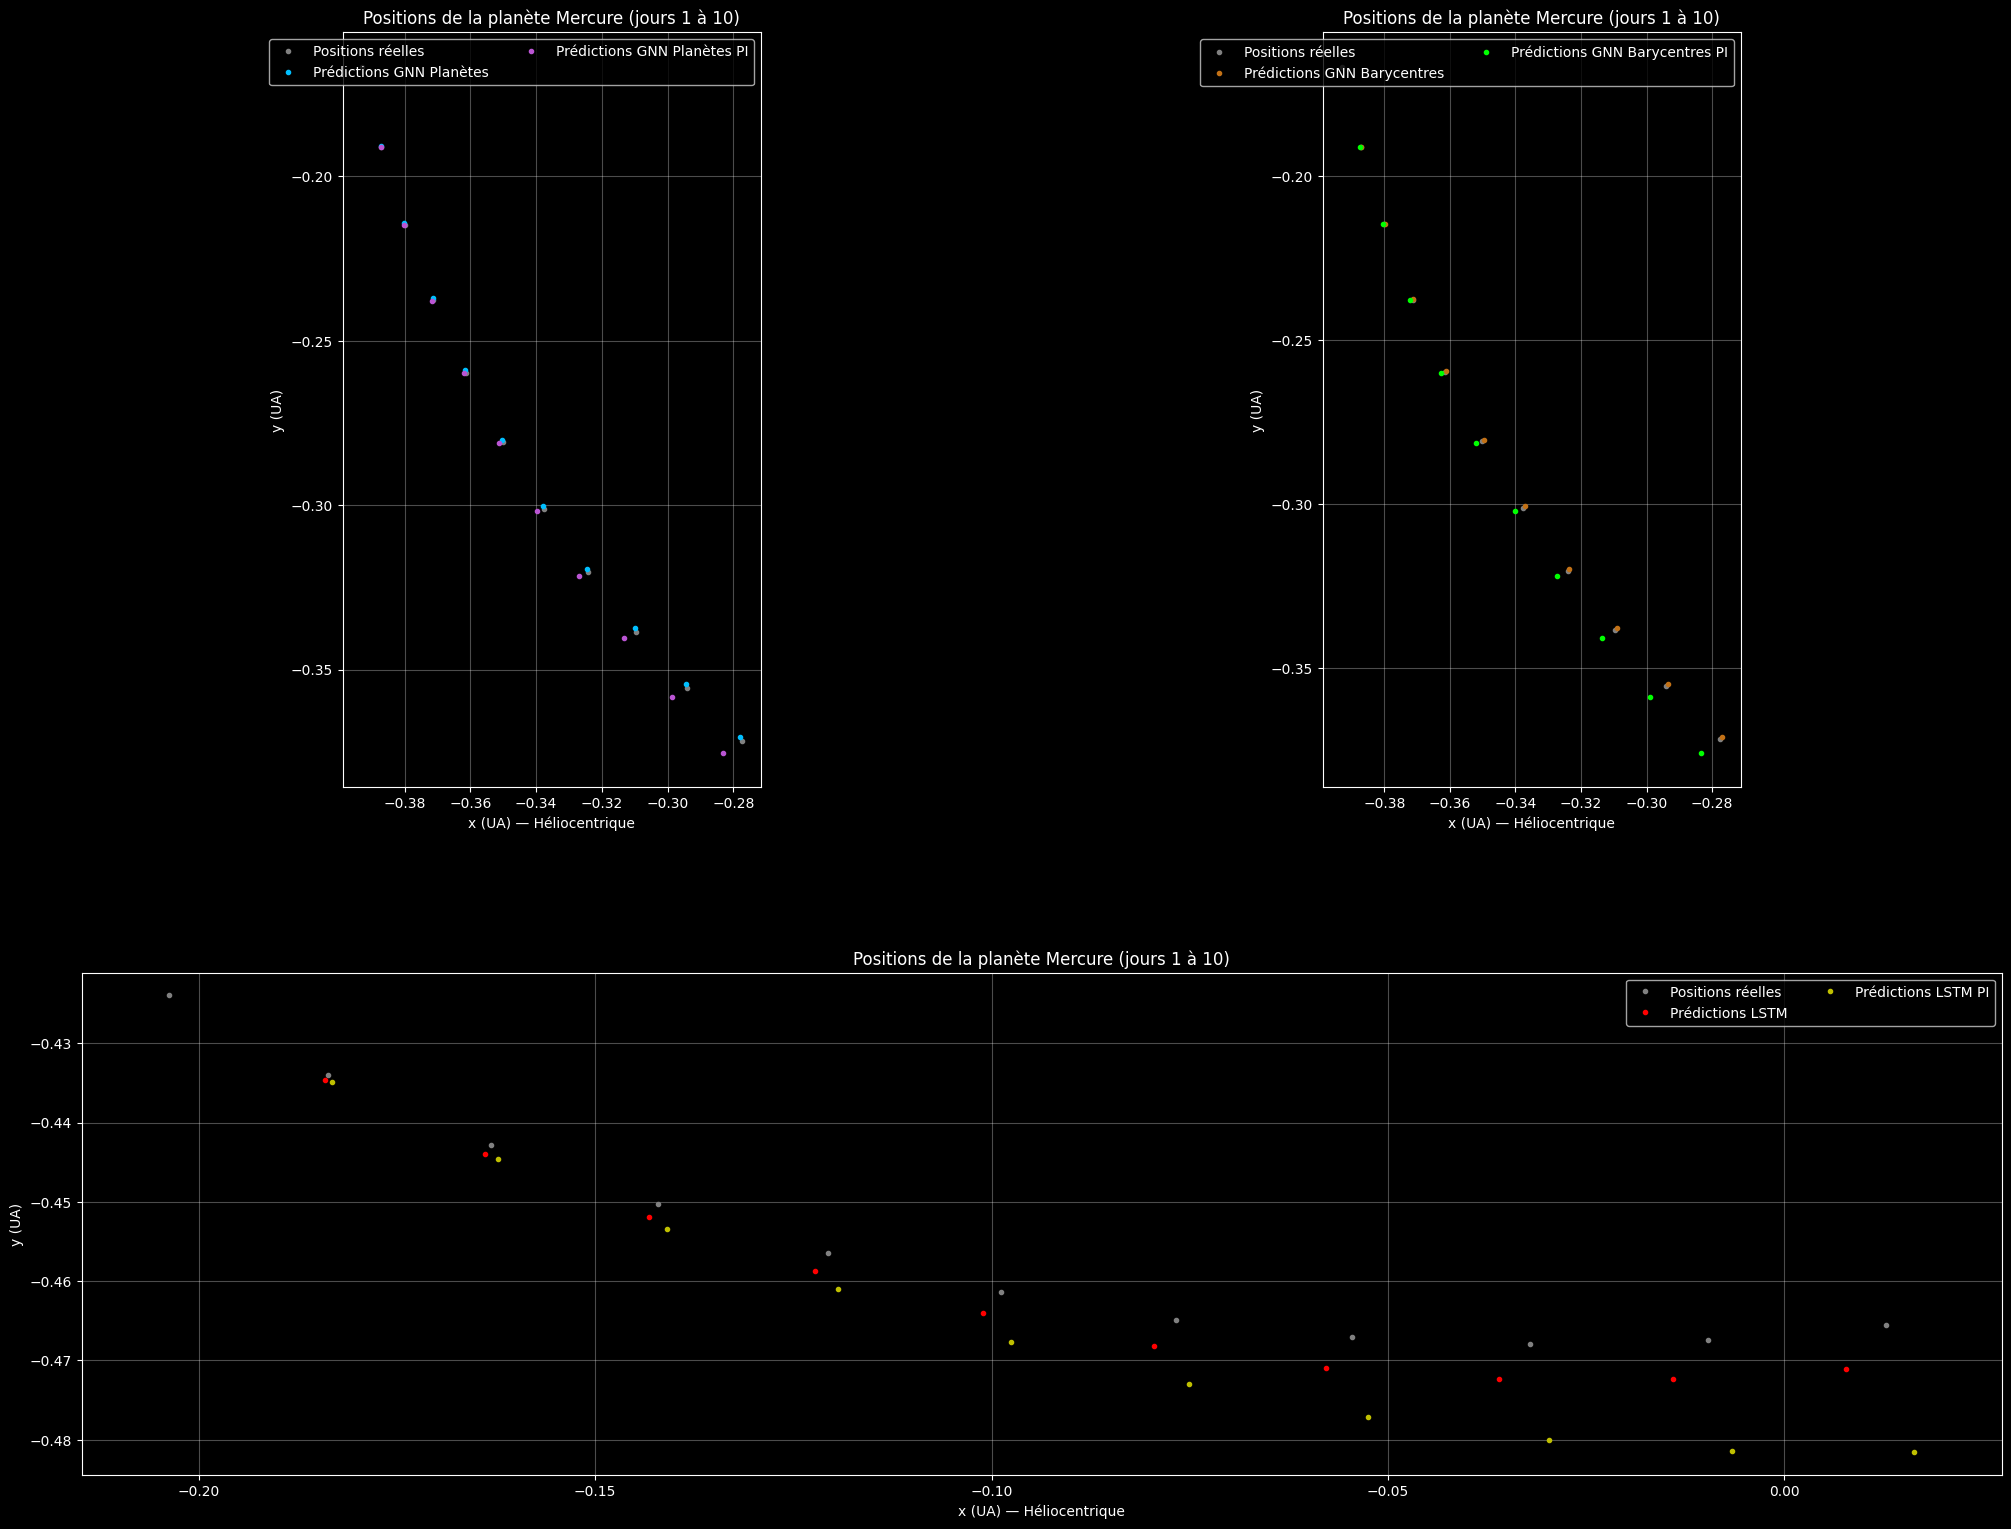

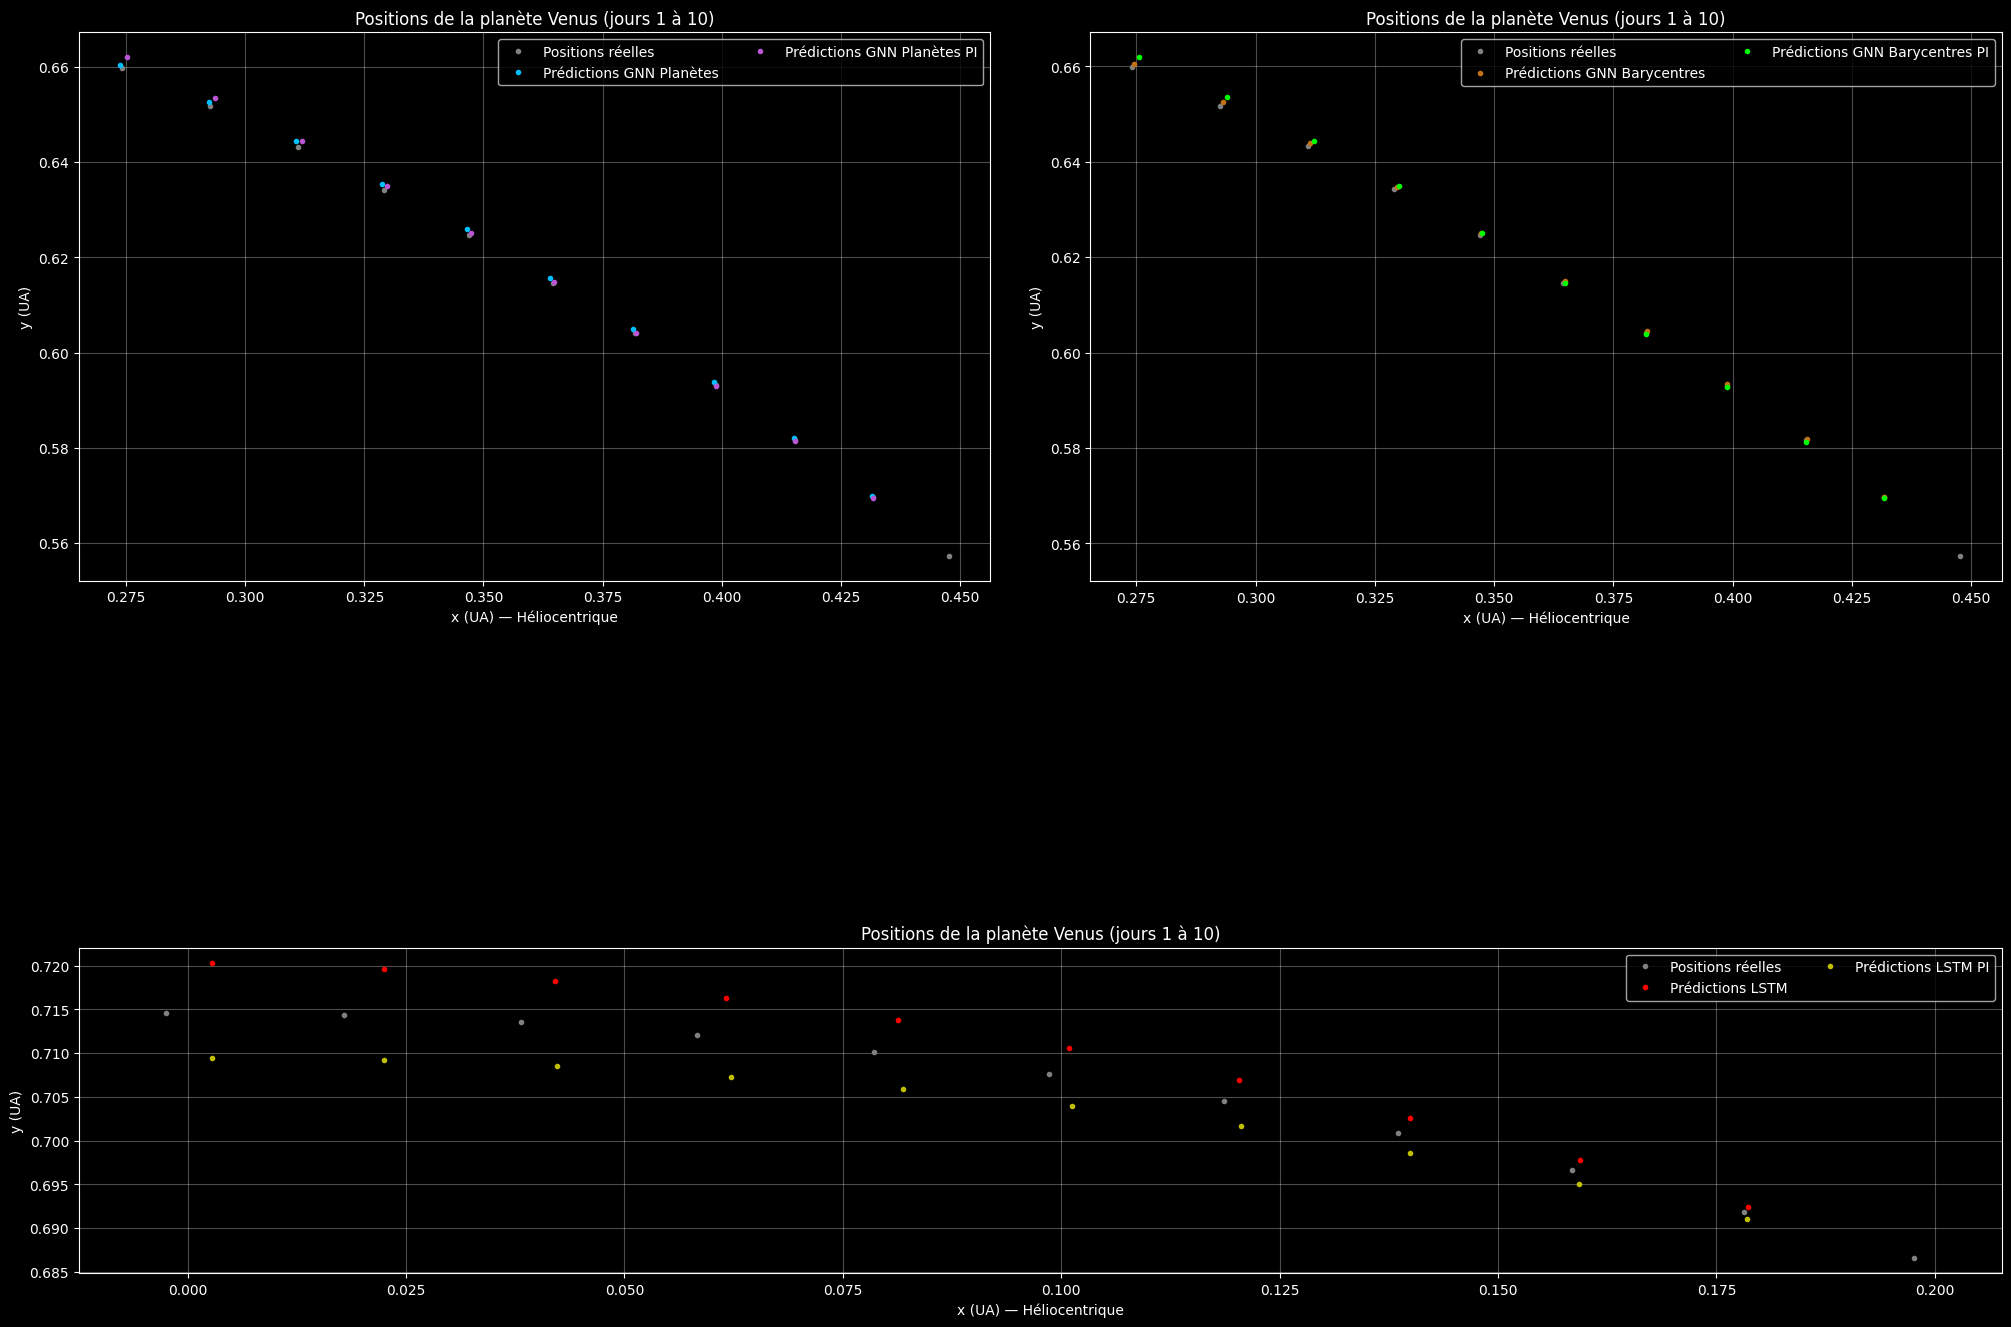

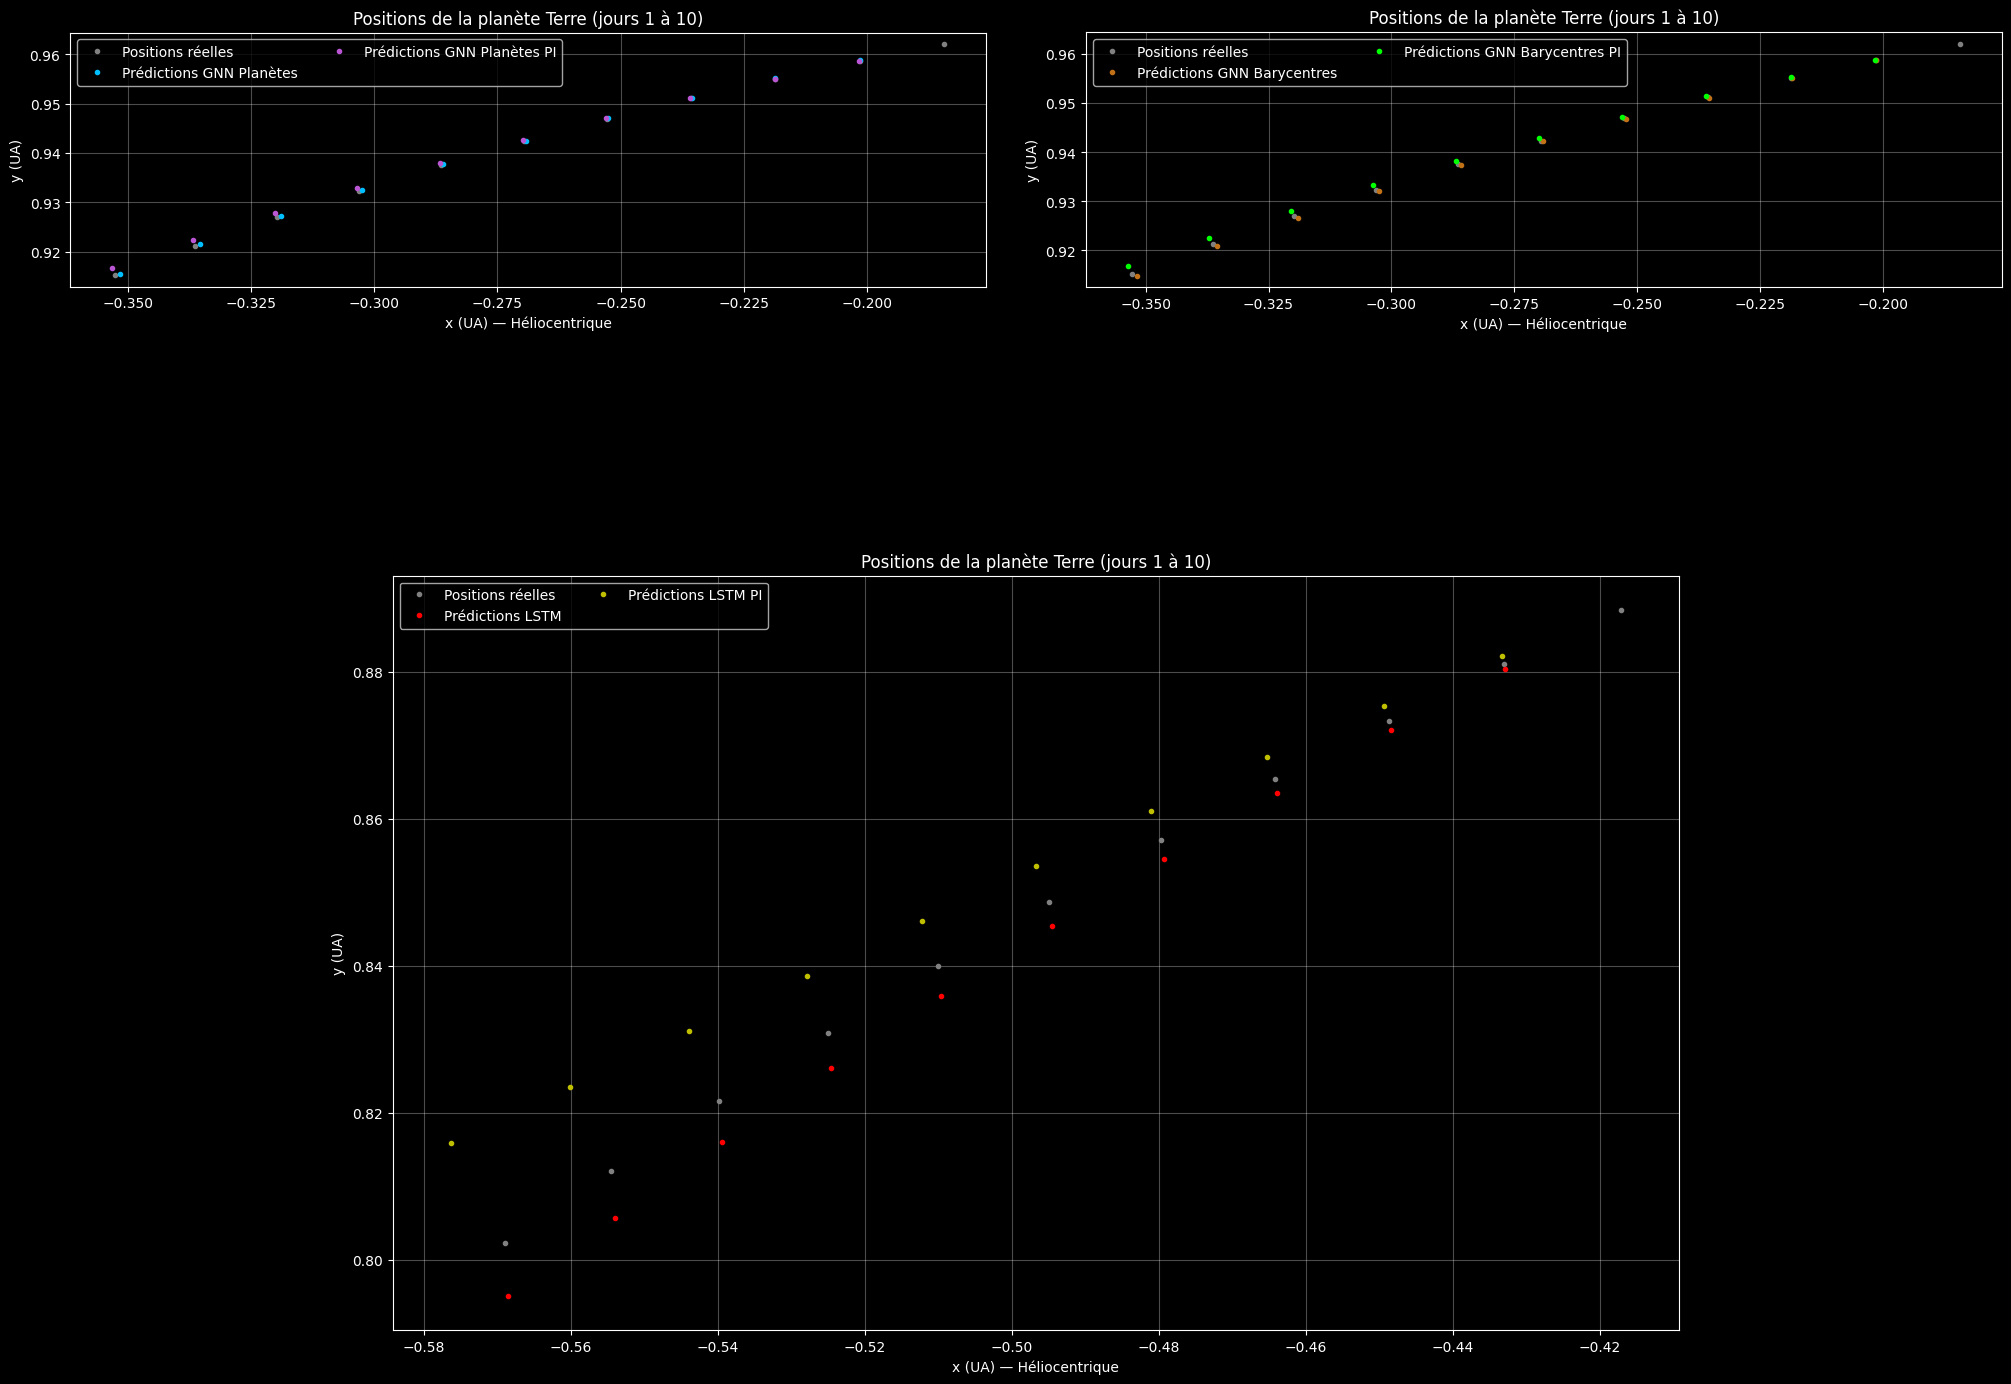

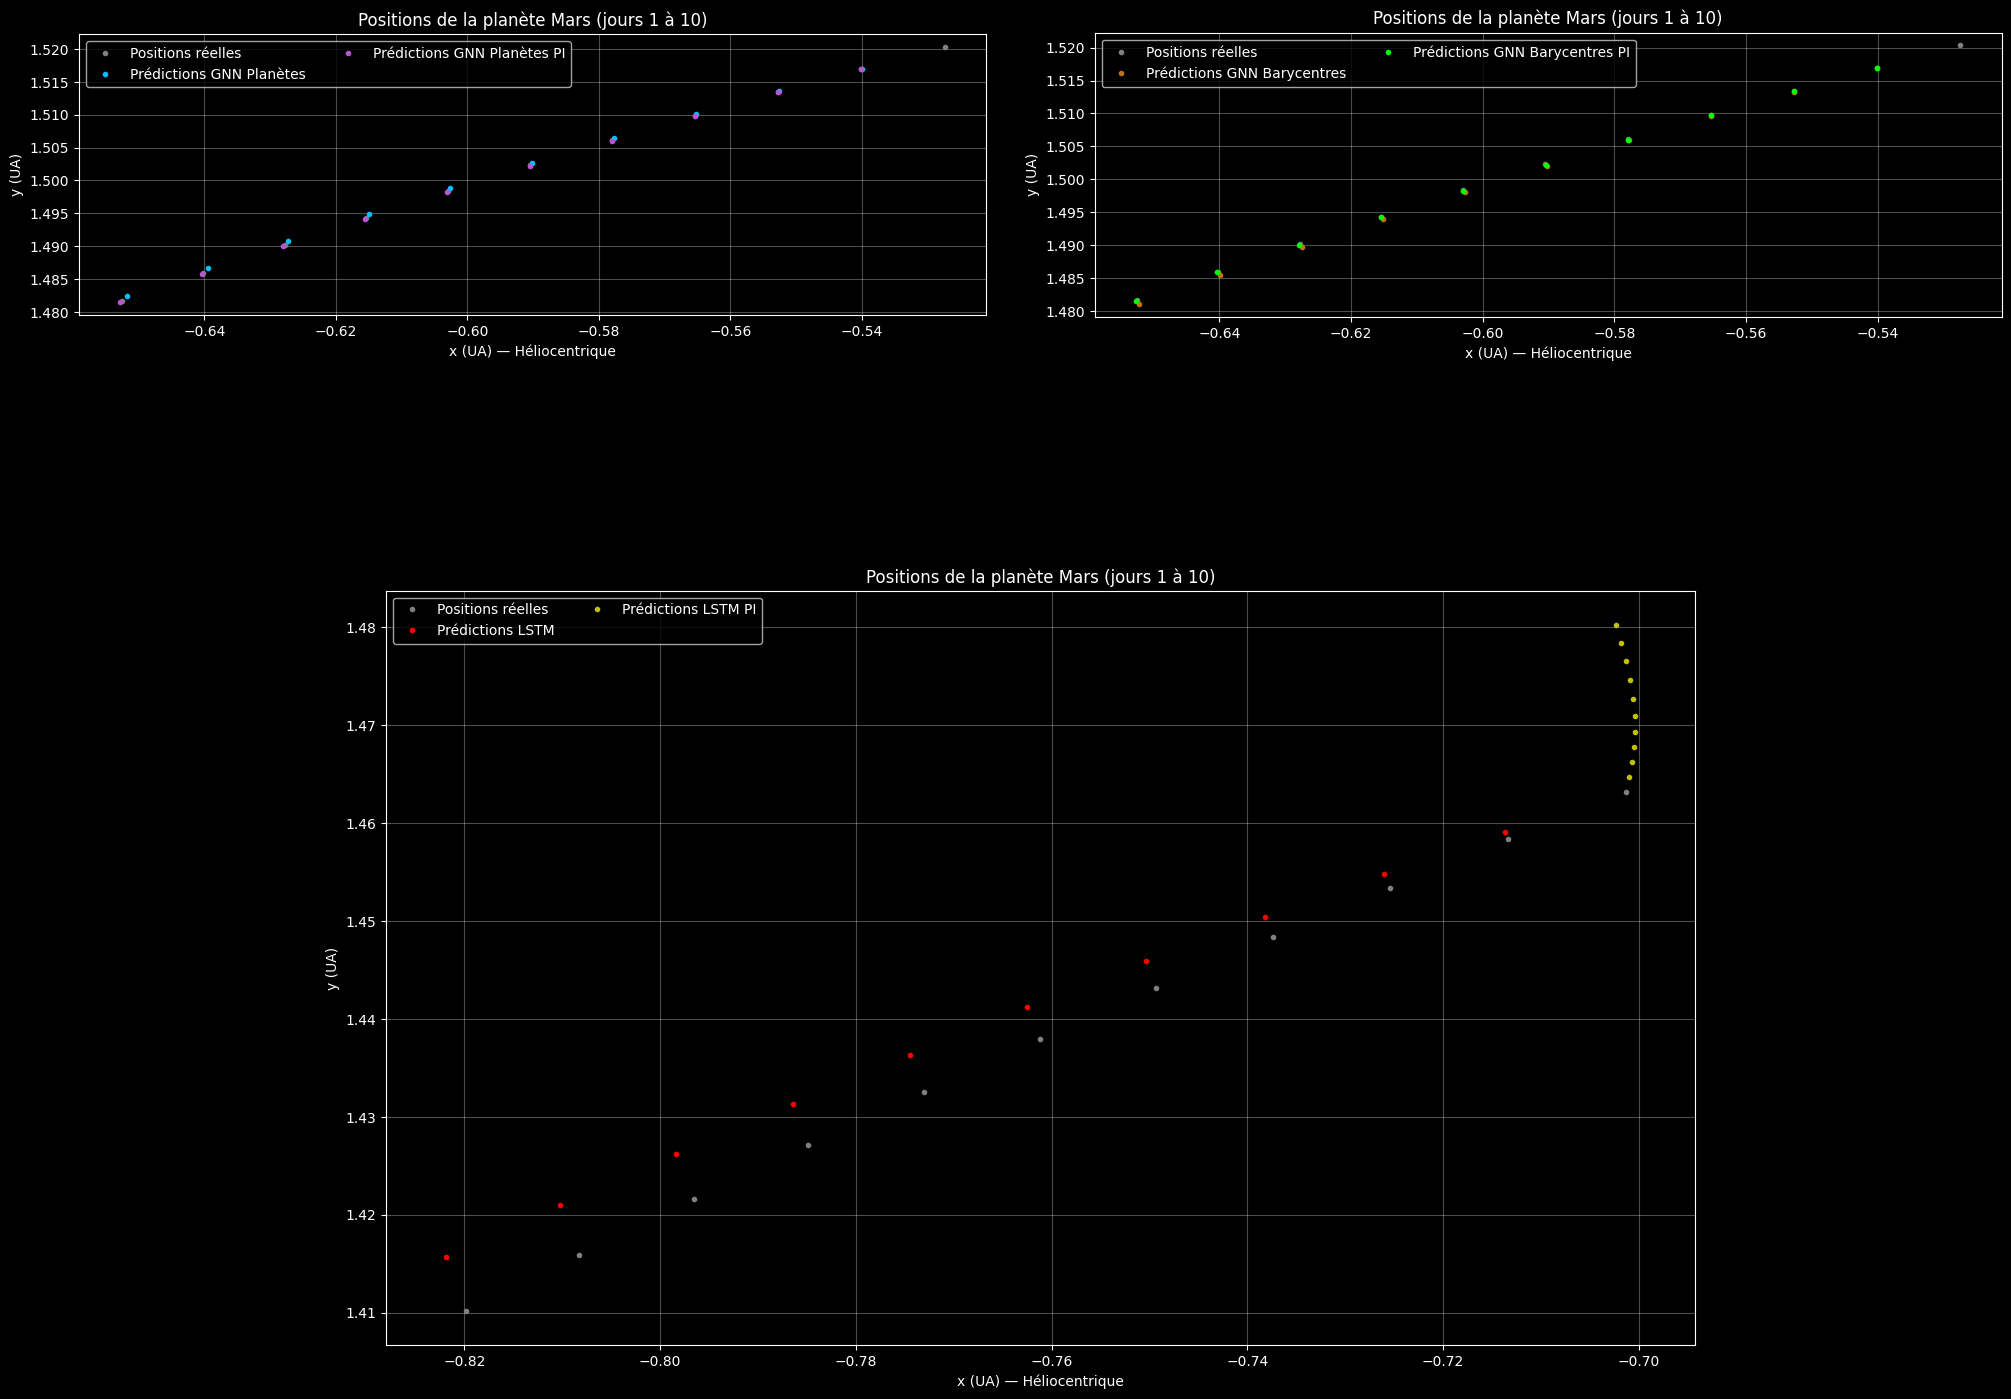

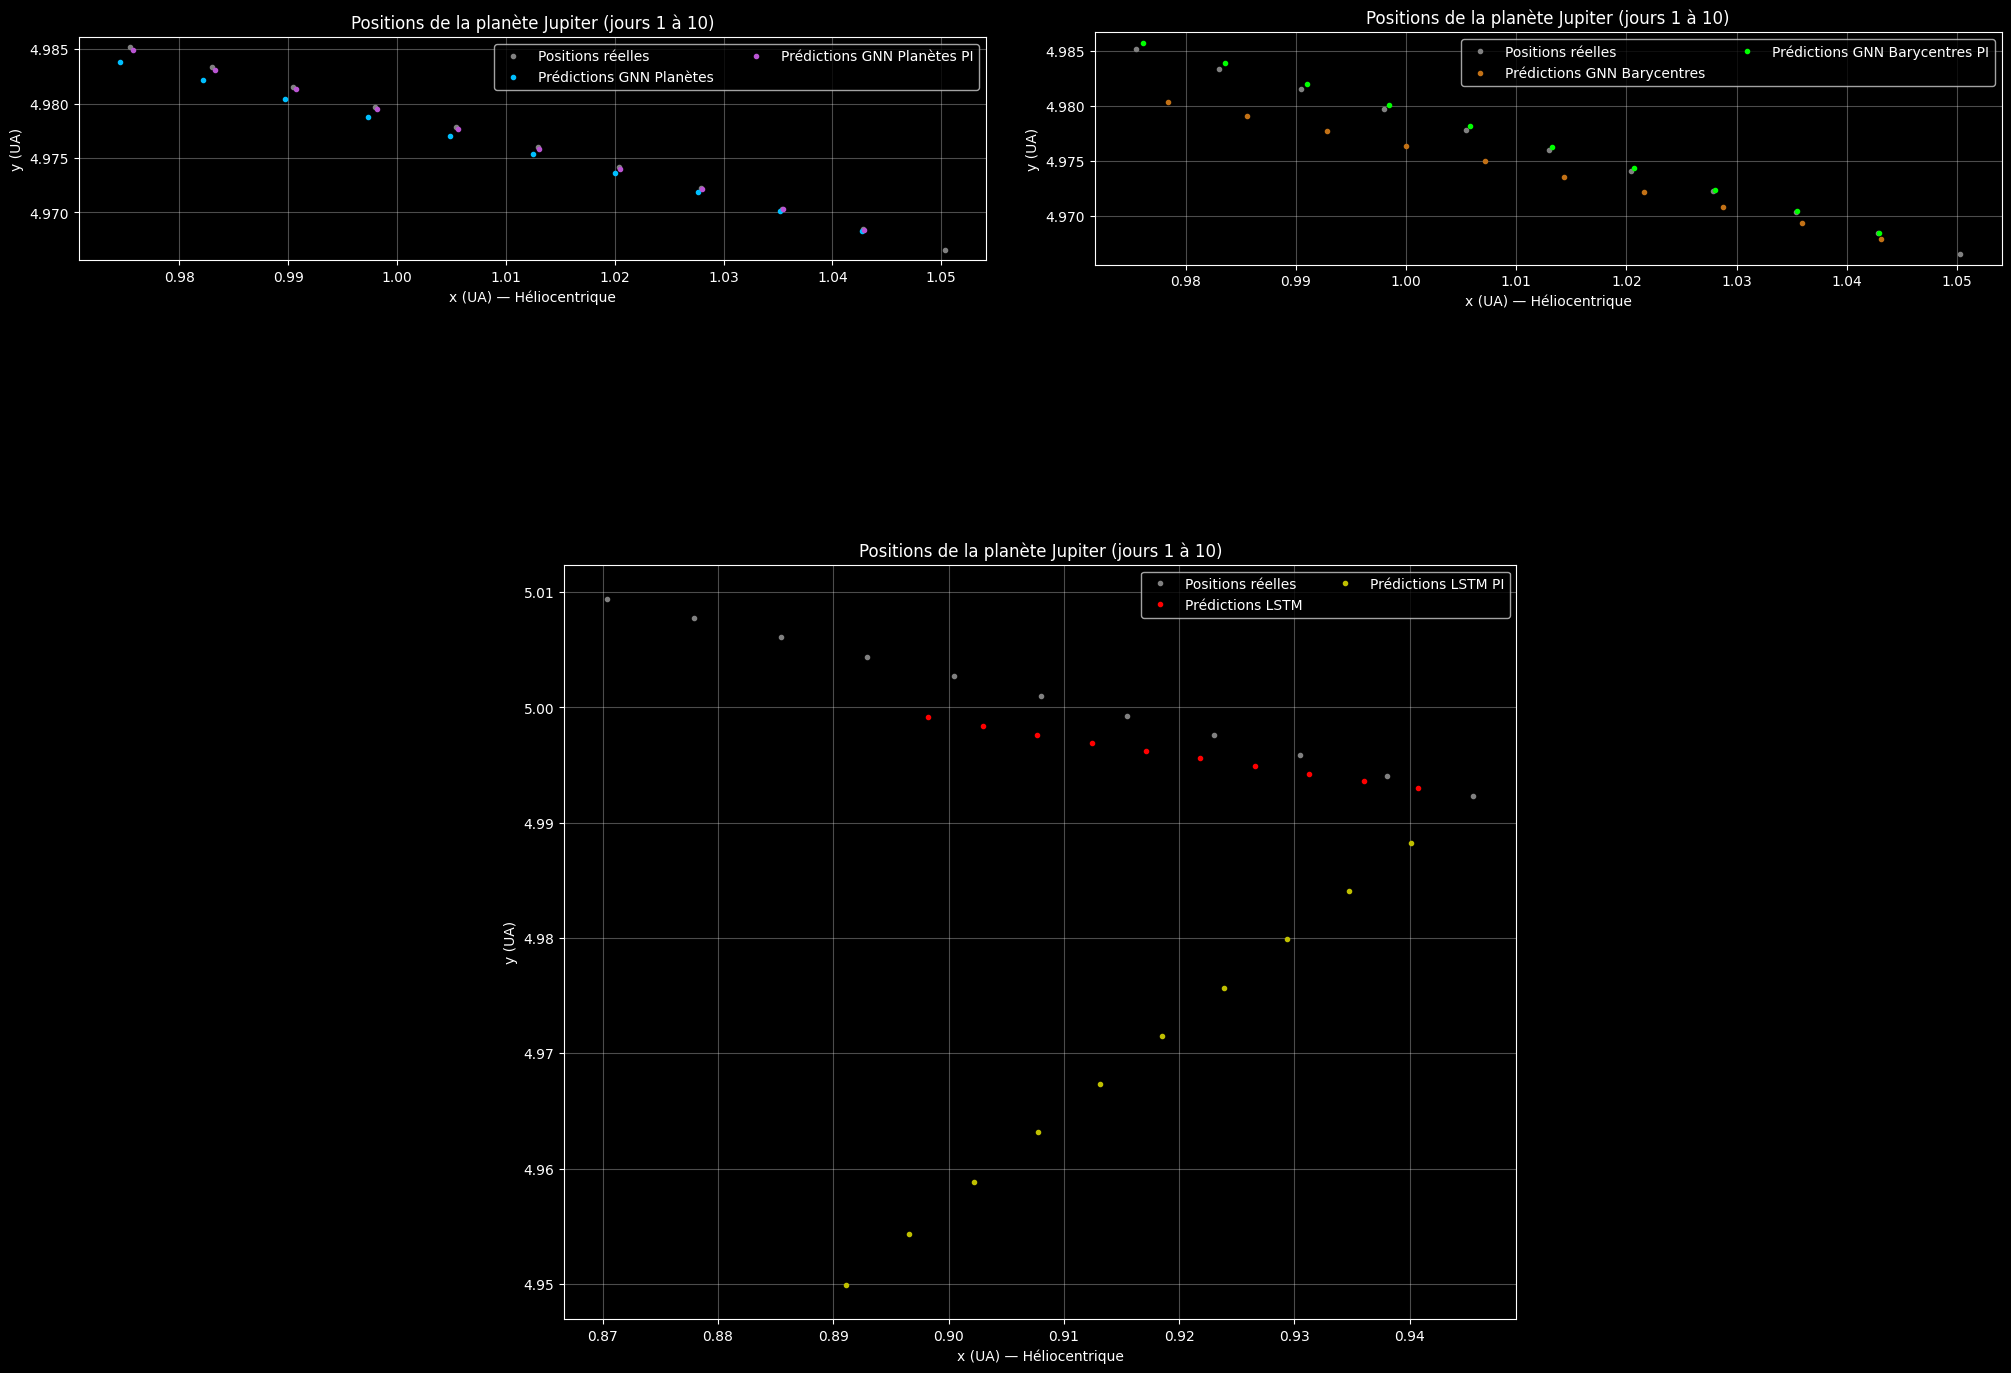

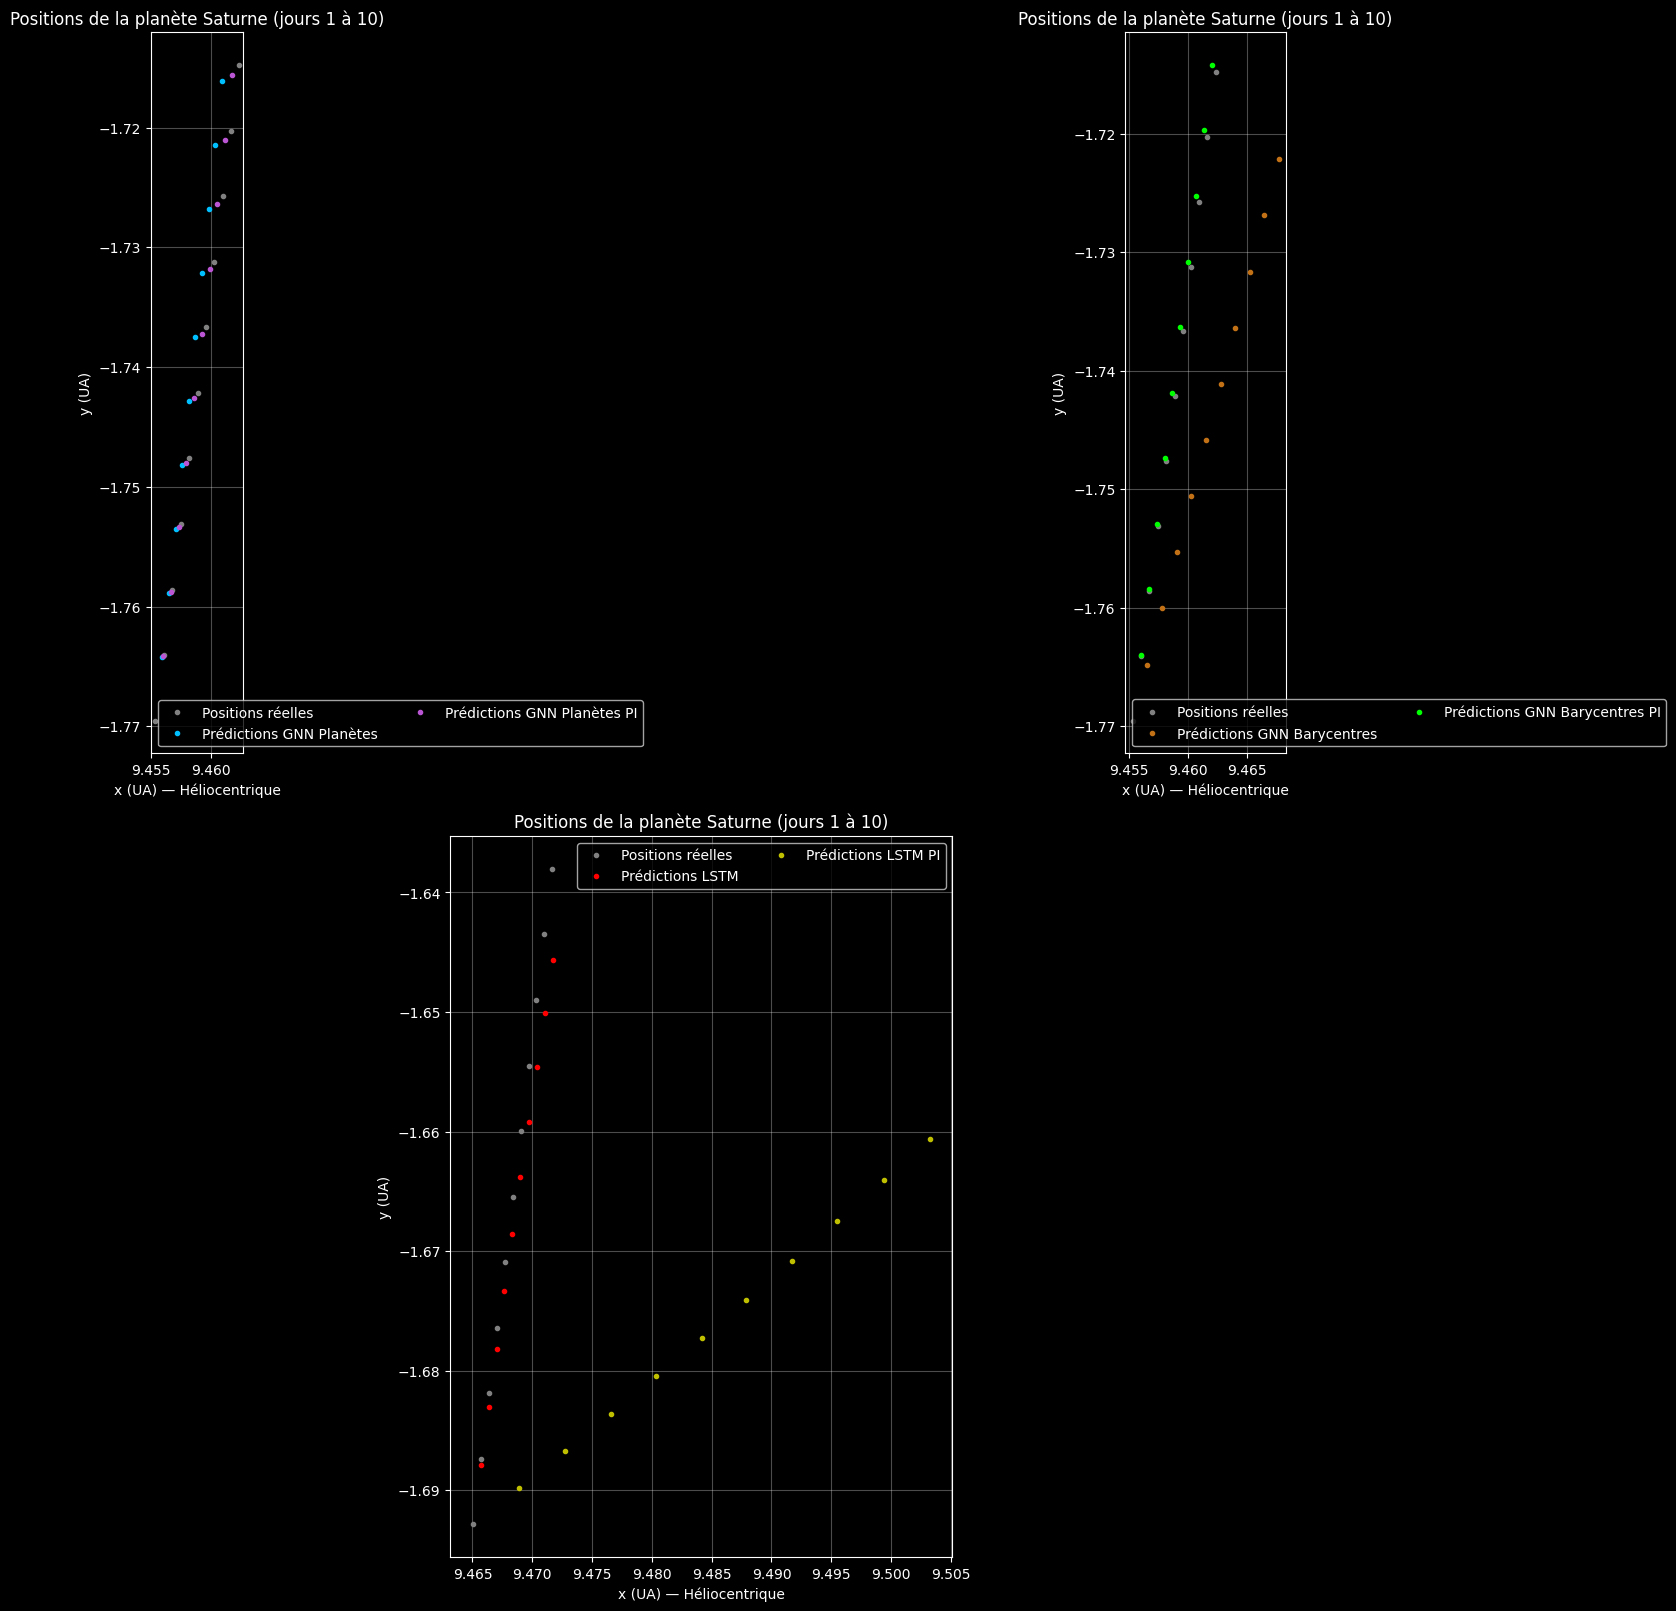

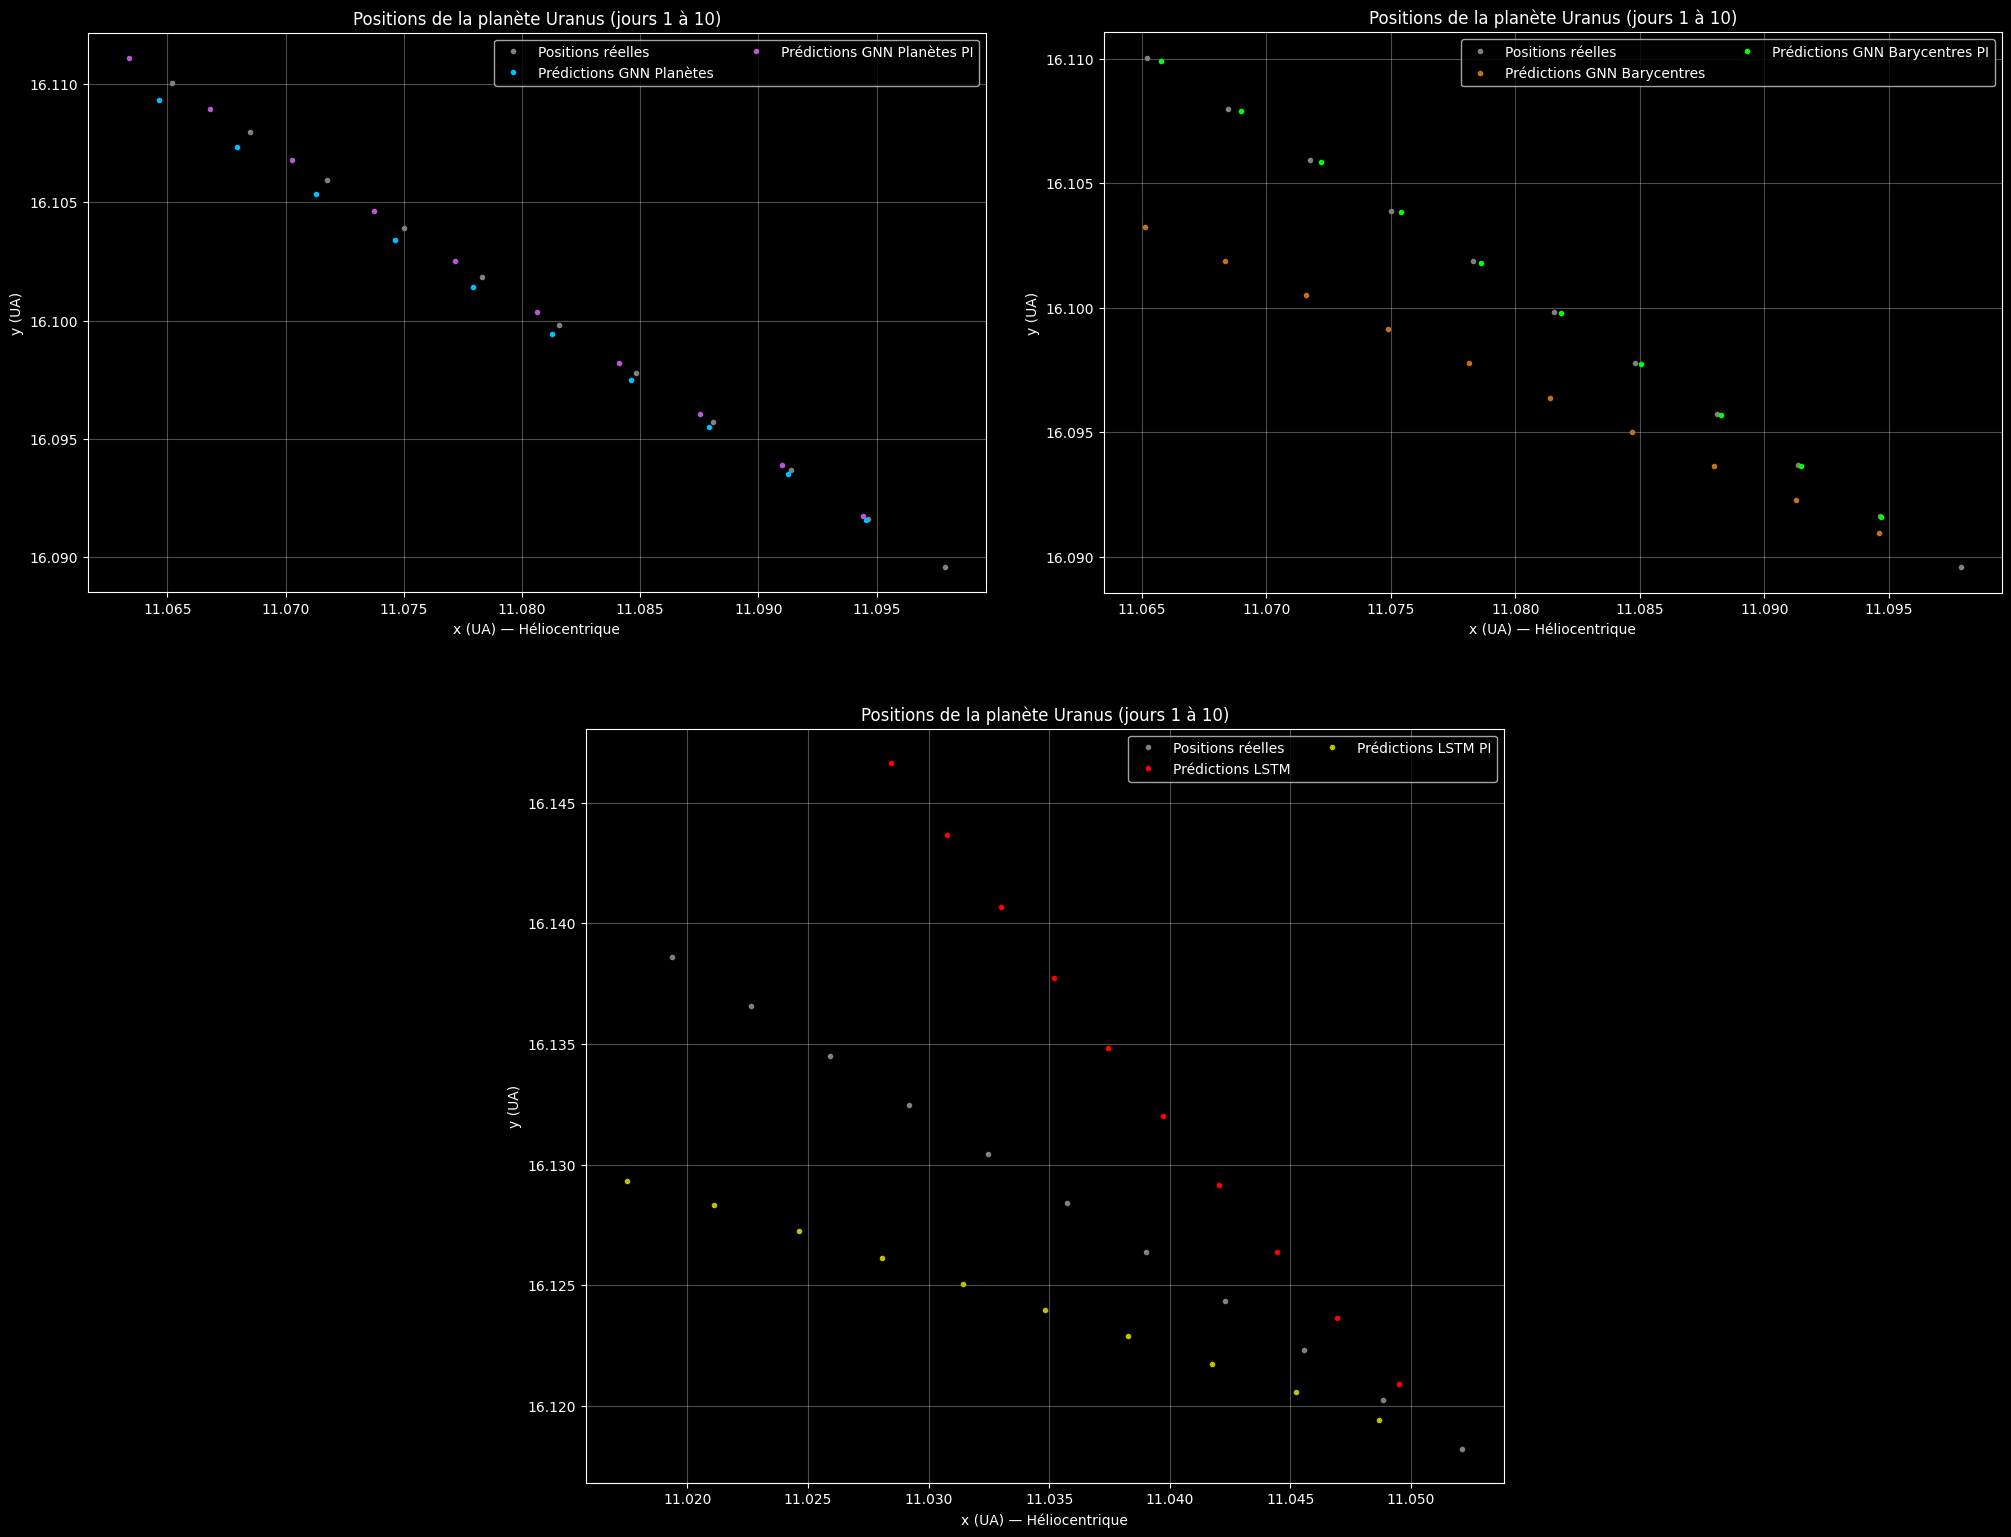

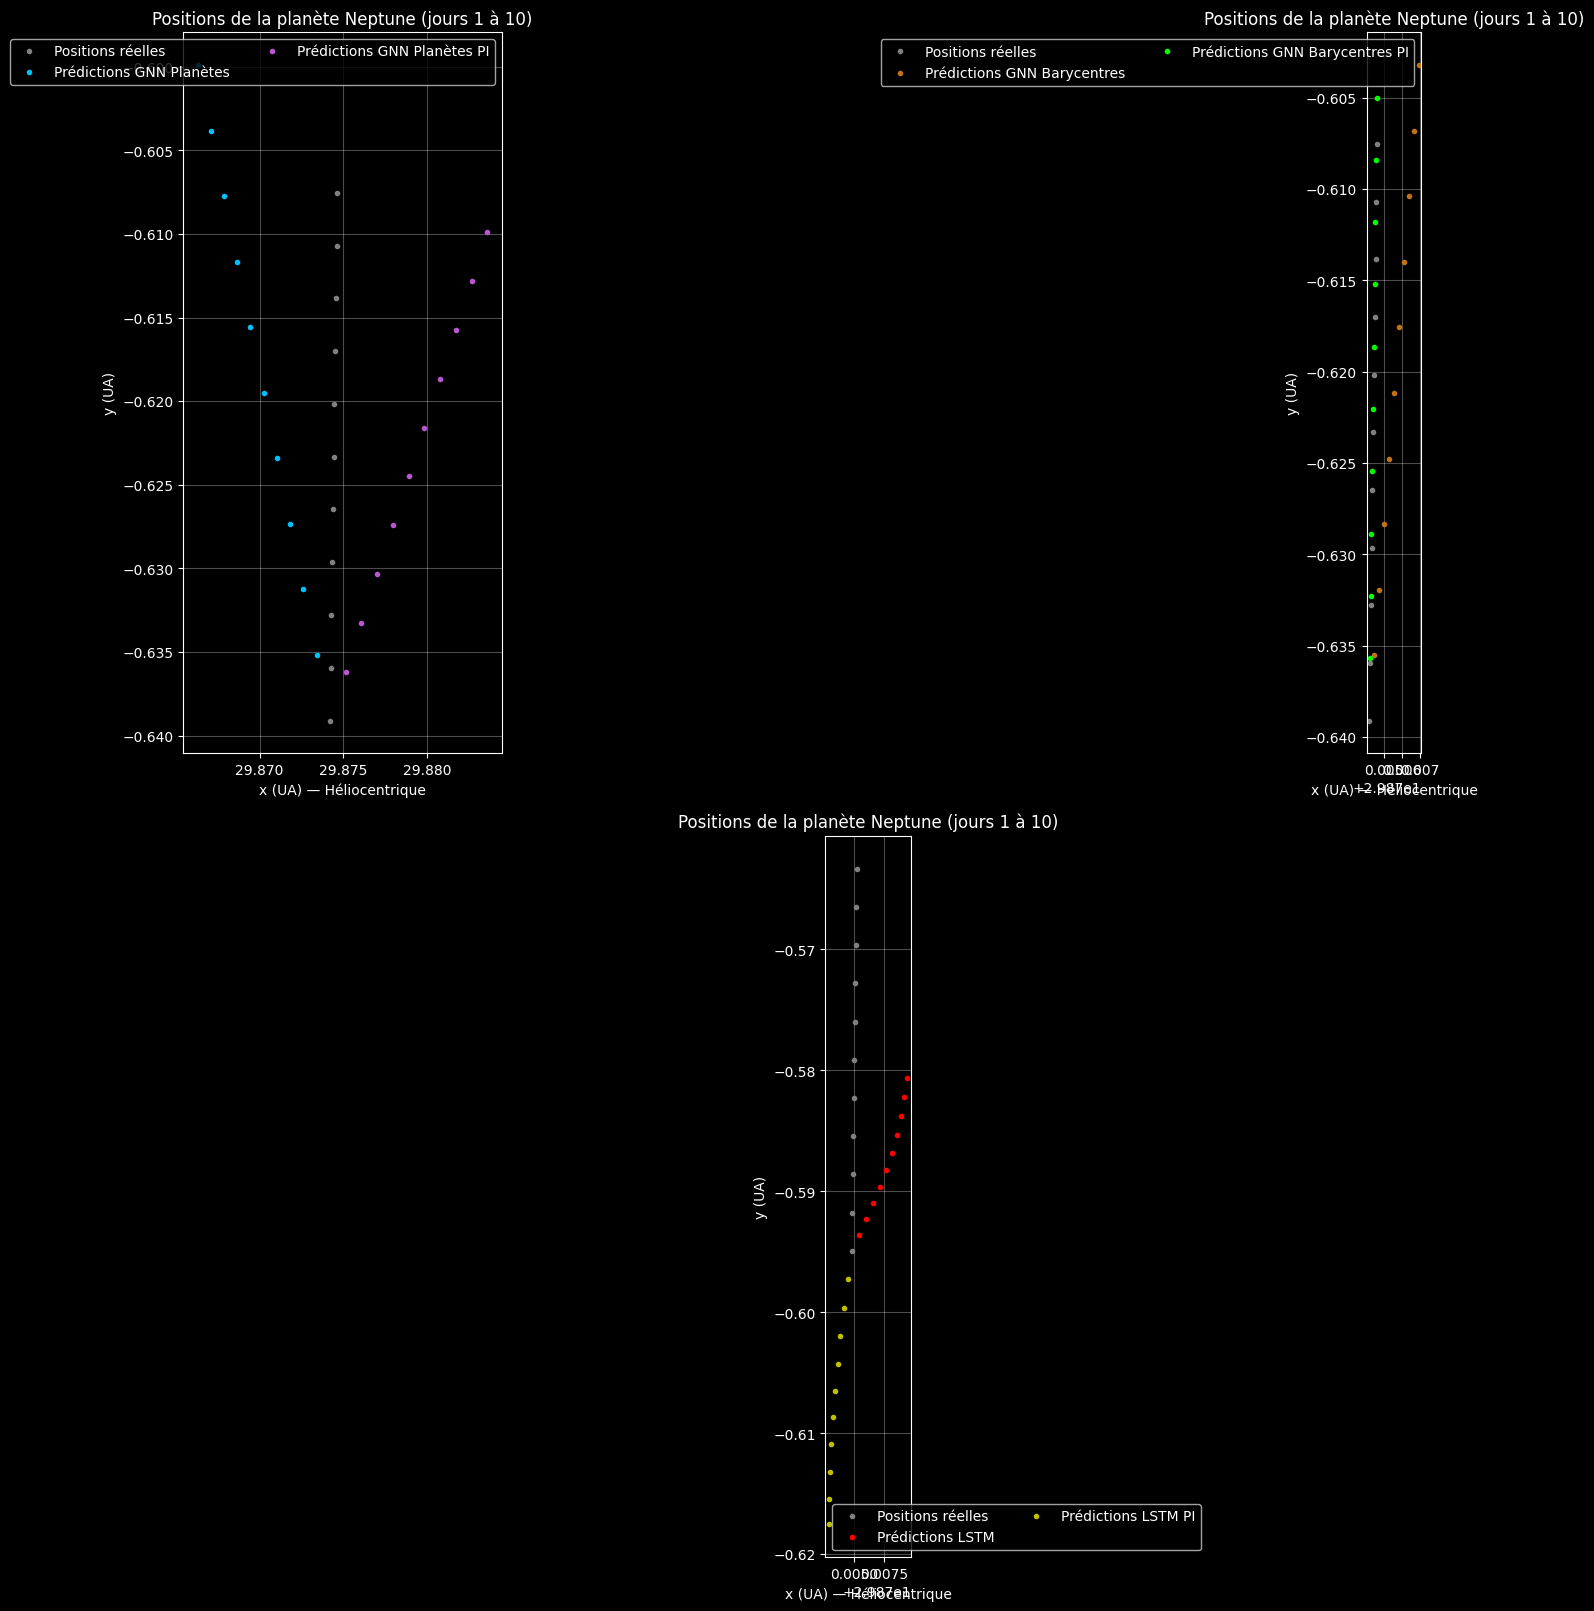

In [42]:
plot_planet_coordinates(num_days=10, show_sun=False)

### 3.2. Trajectoires sur 25 jours

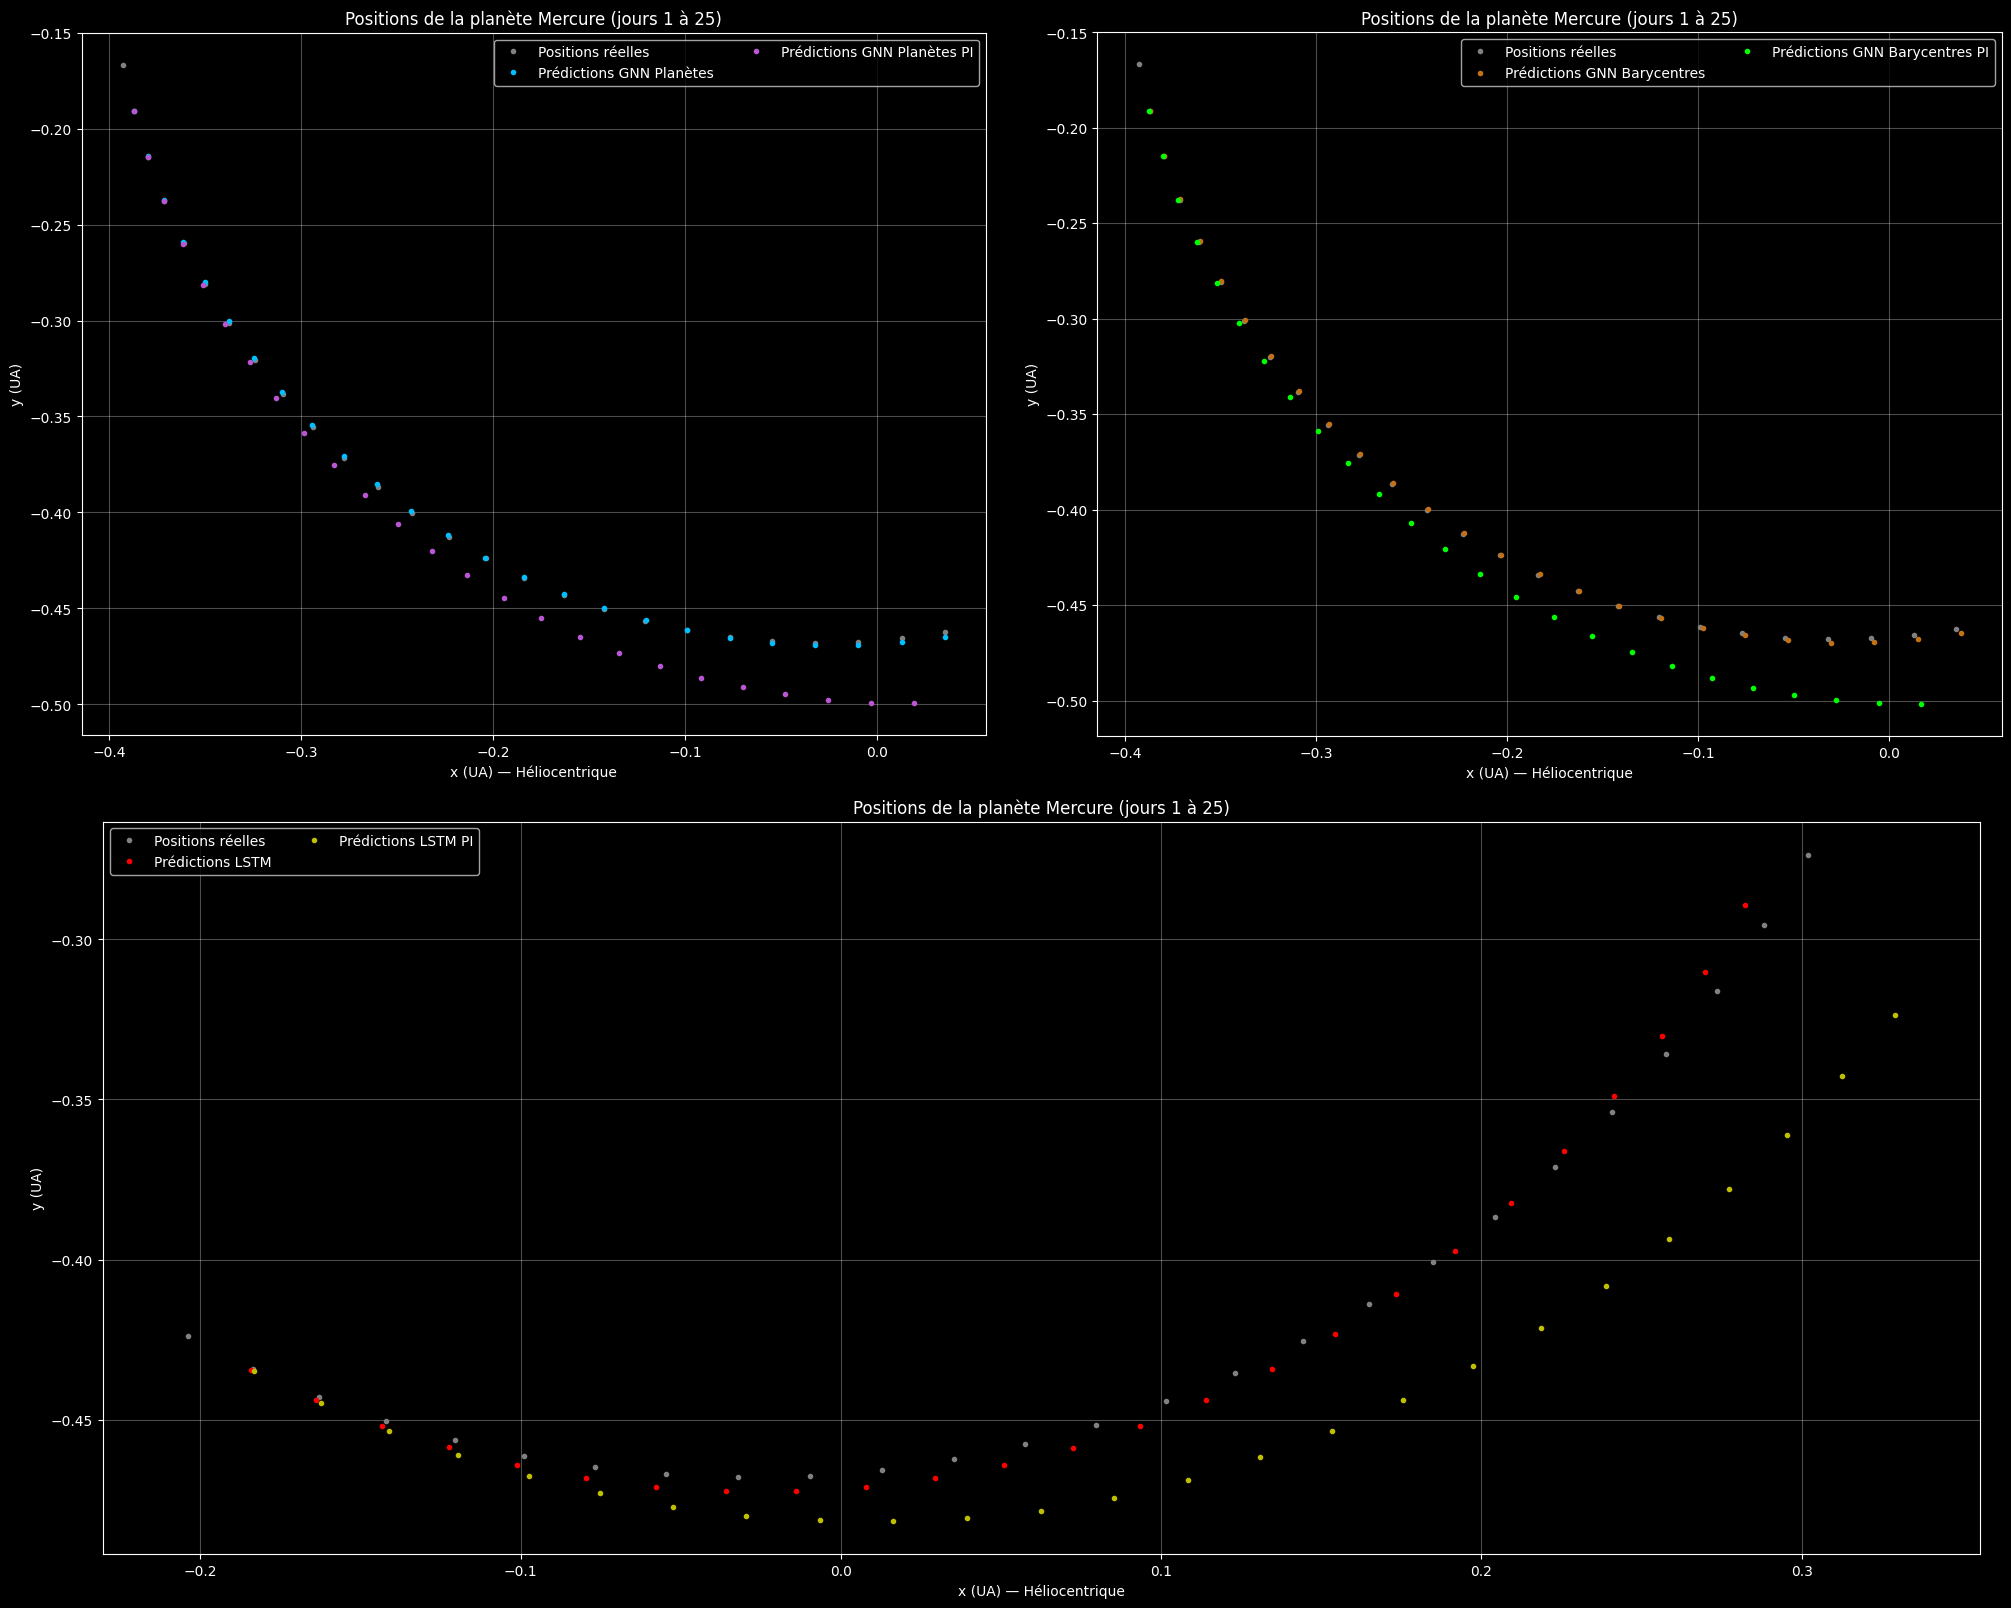

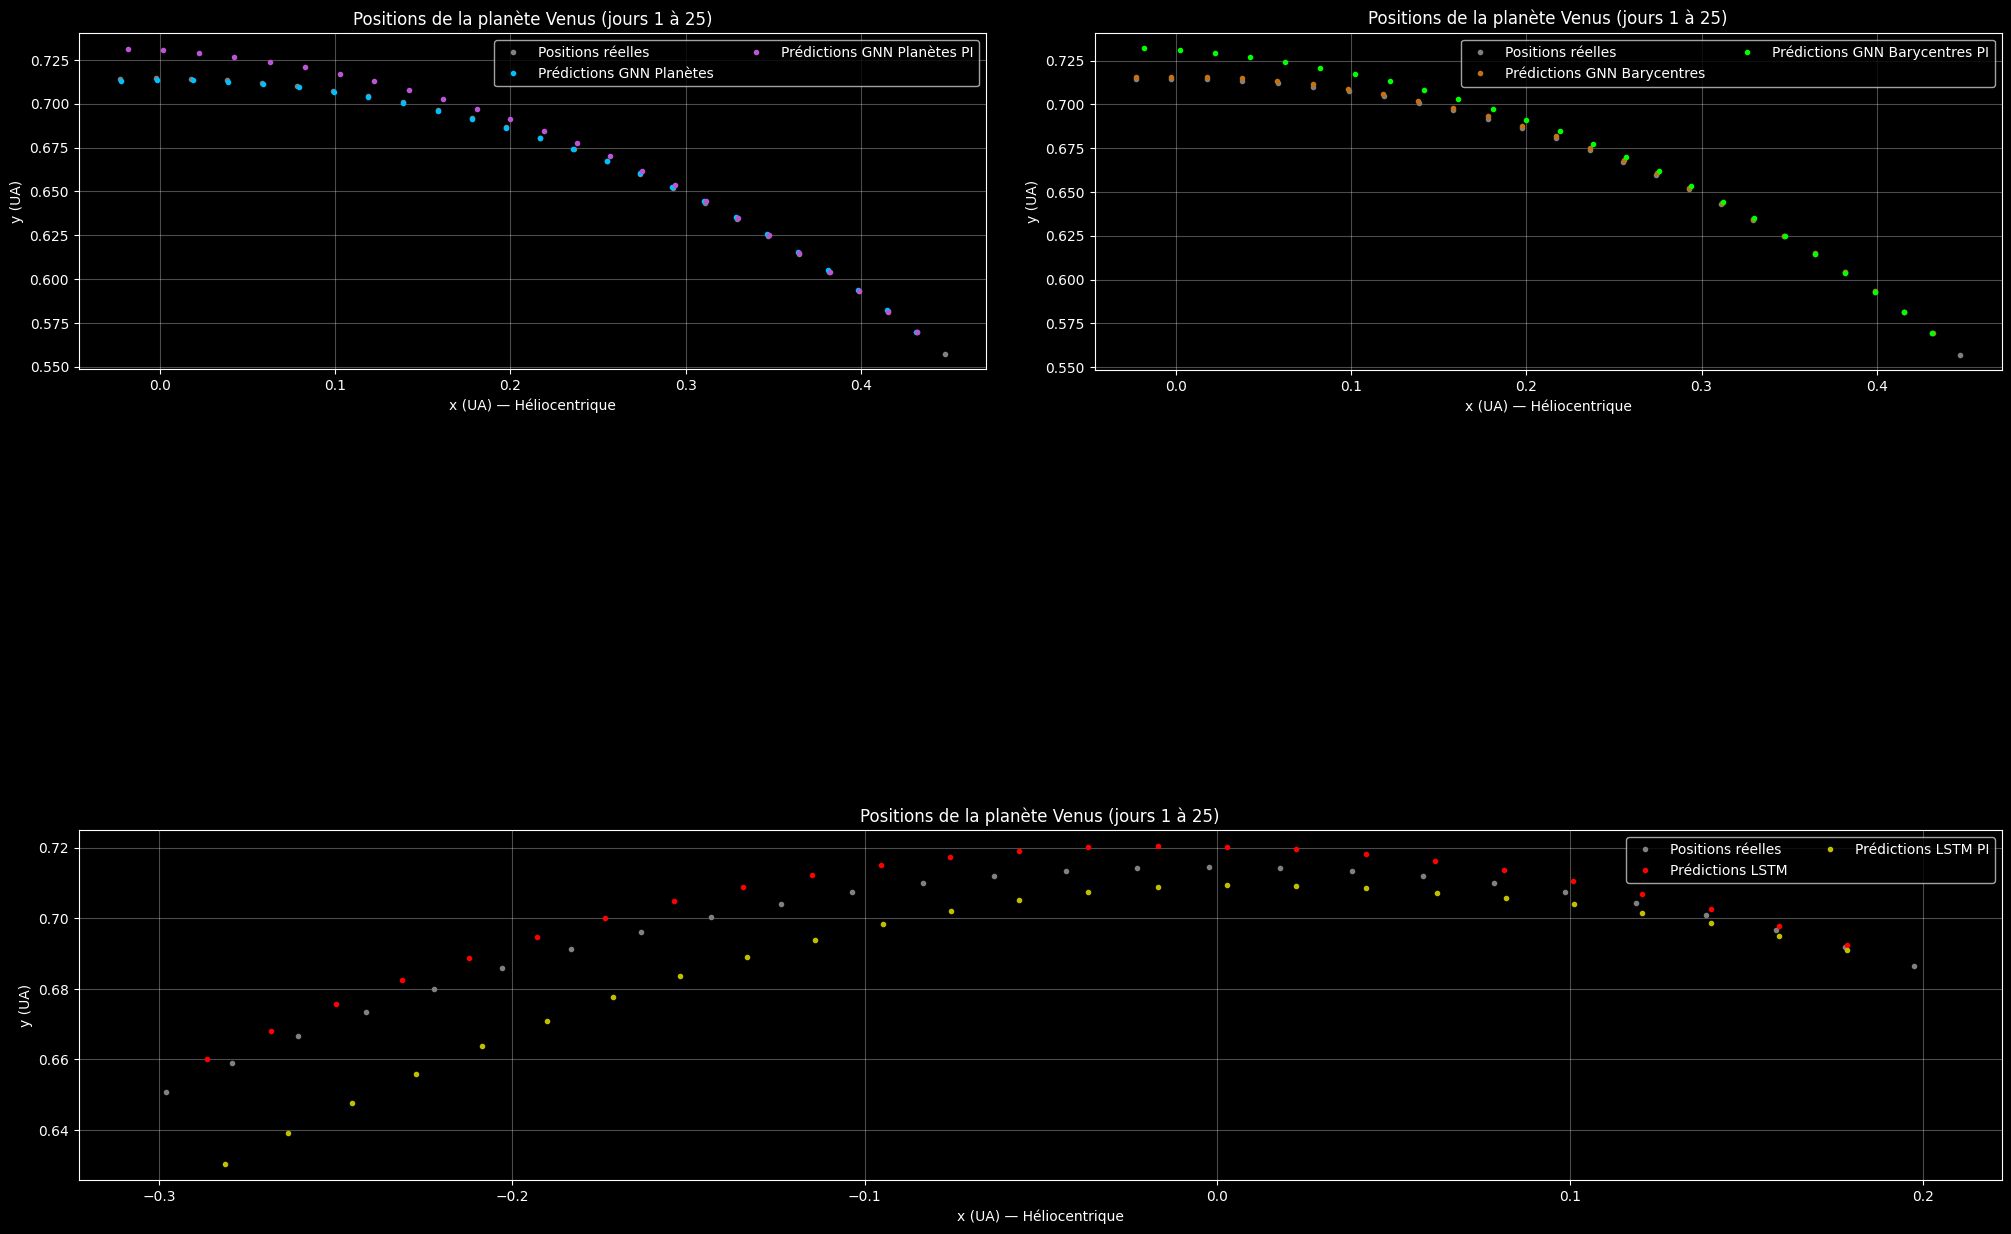

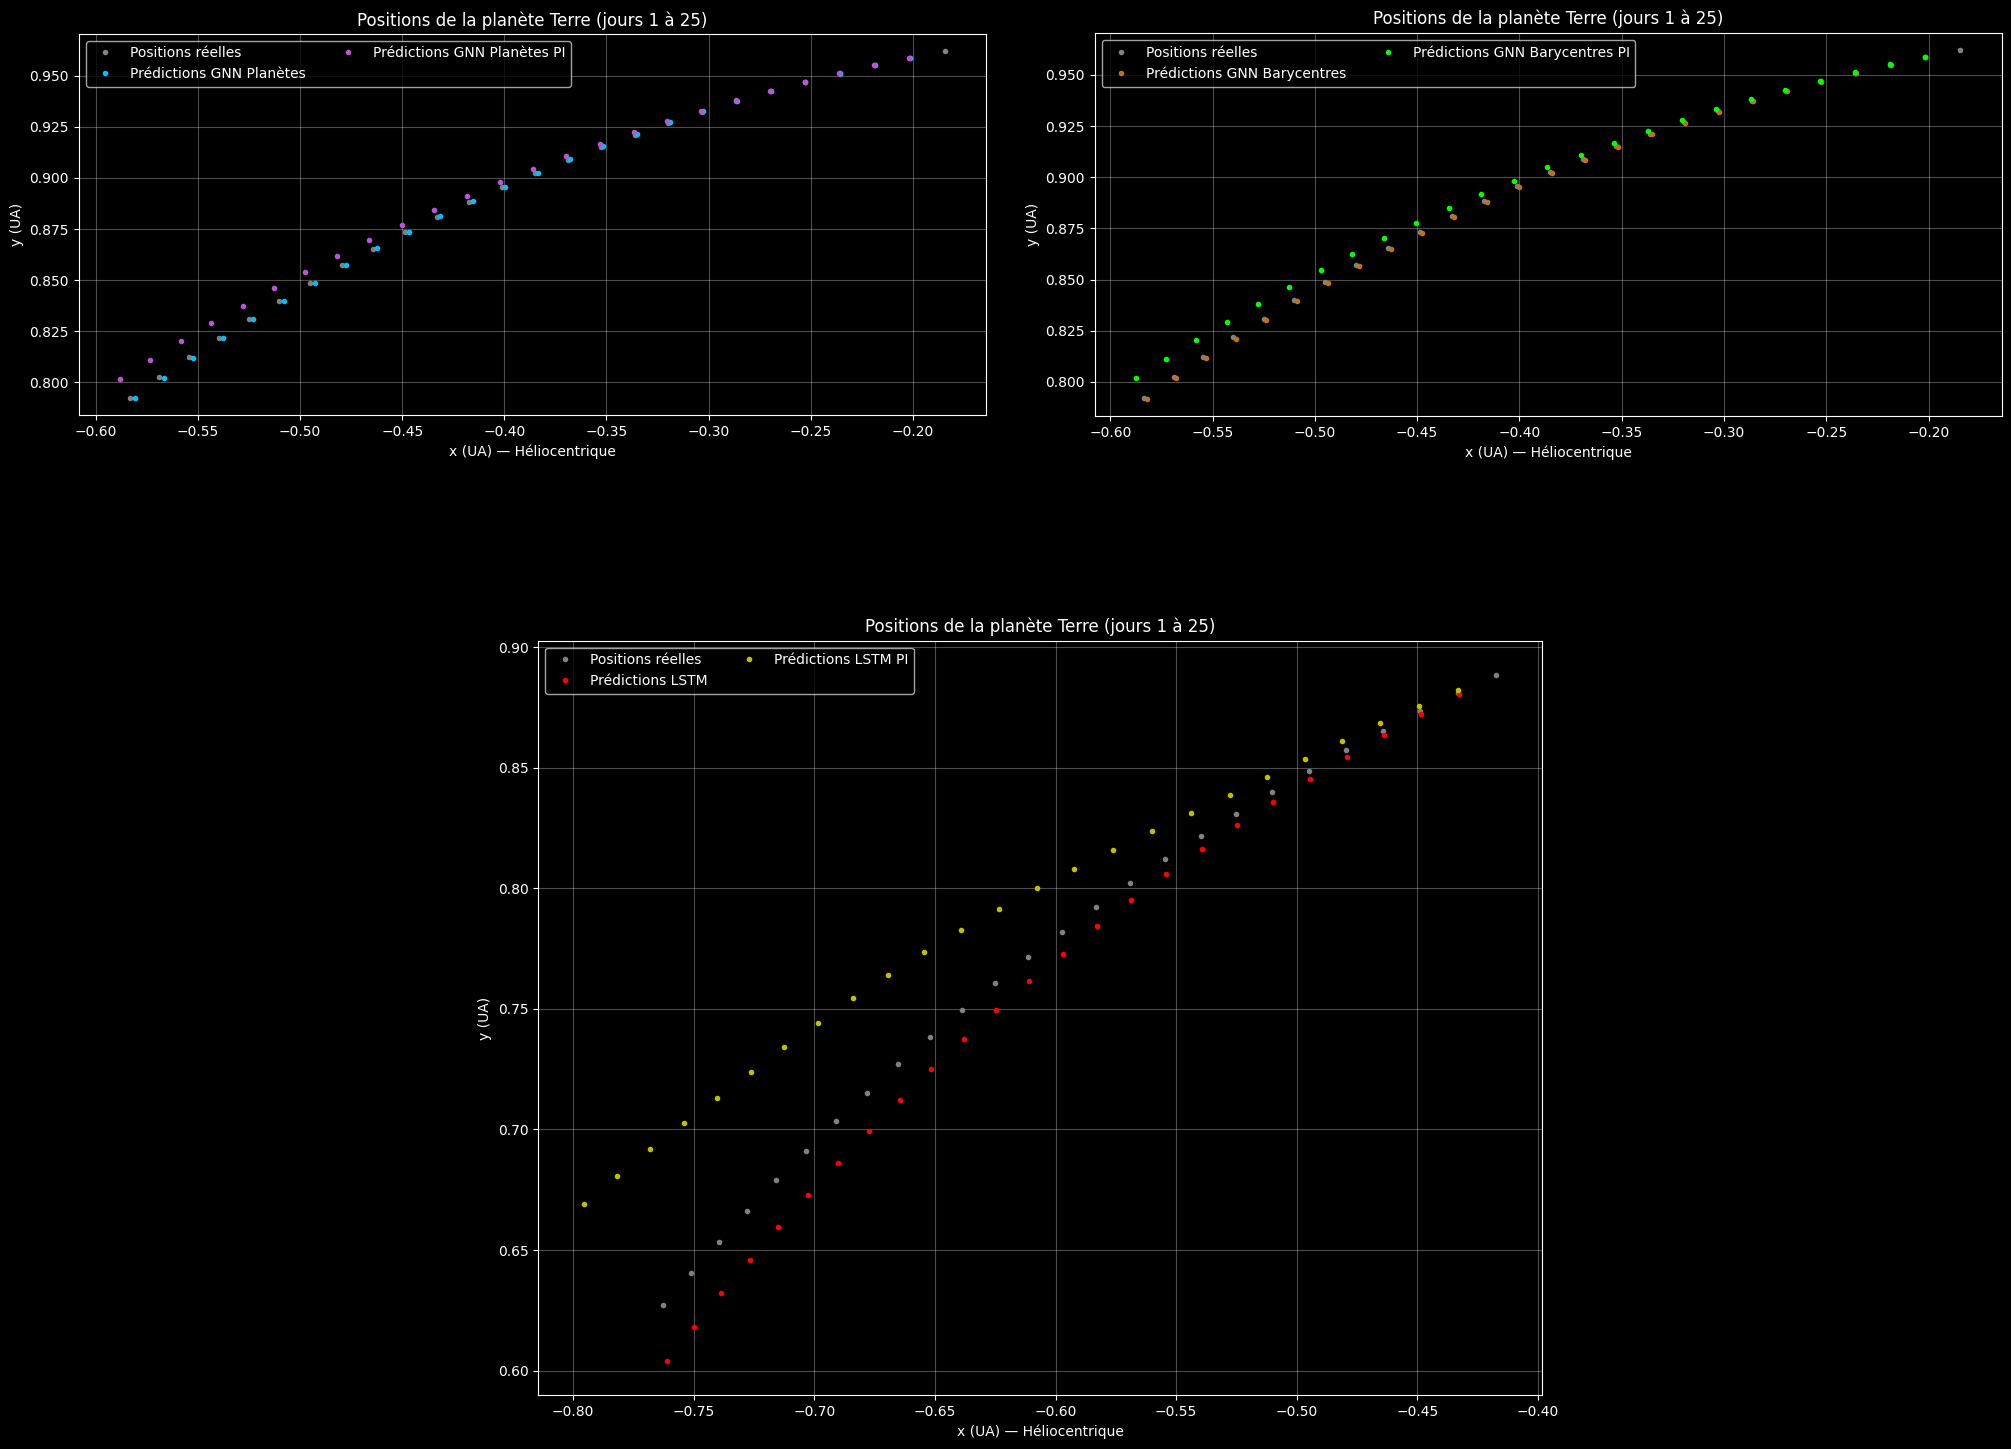

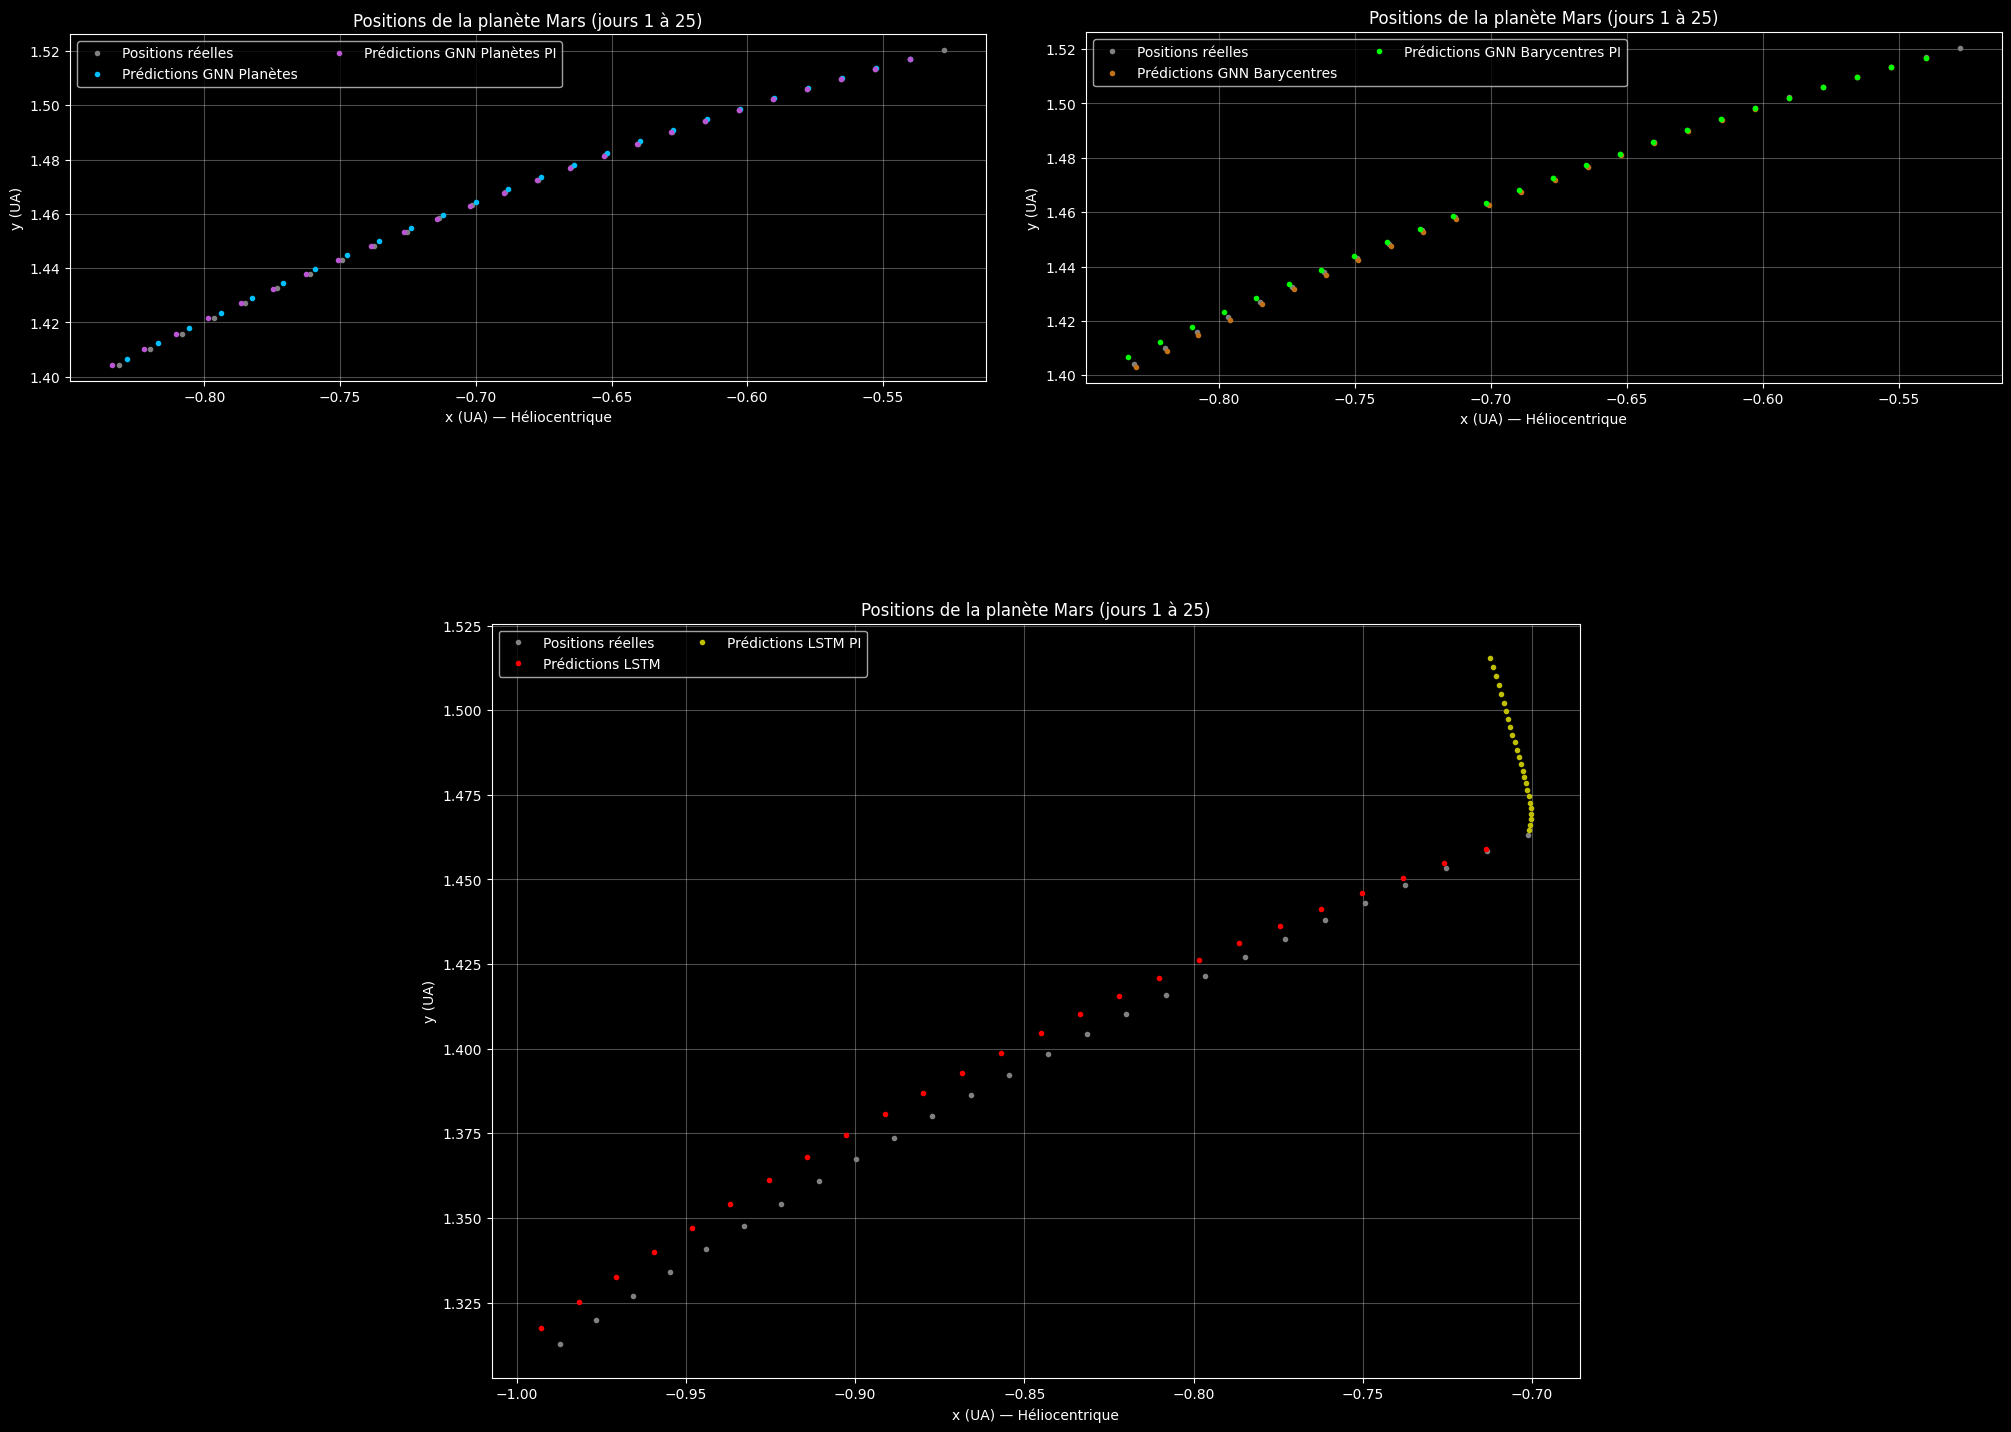

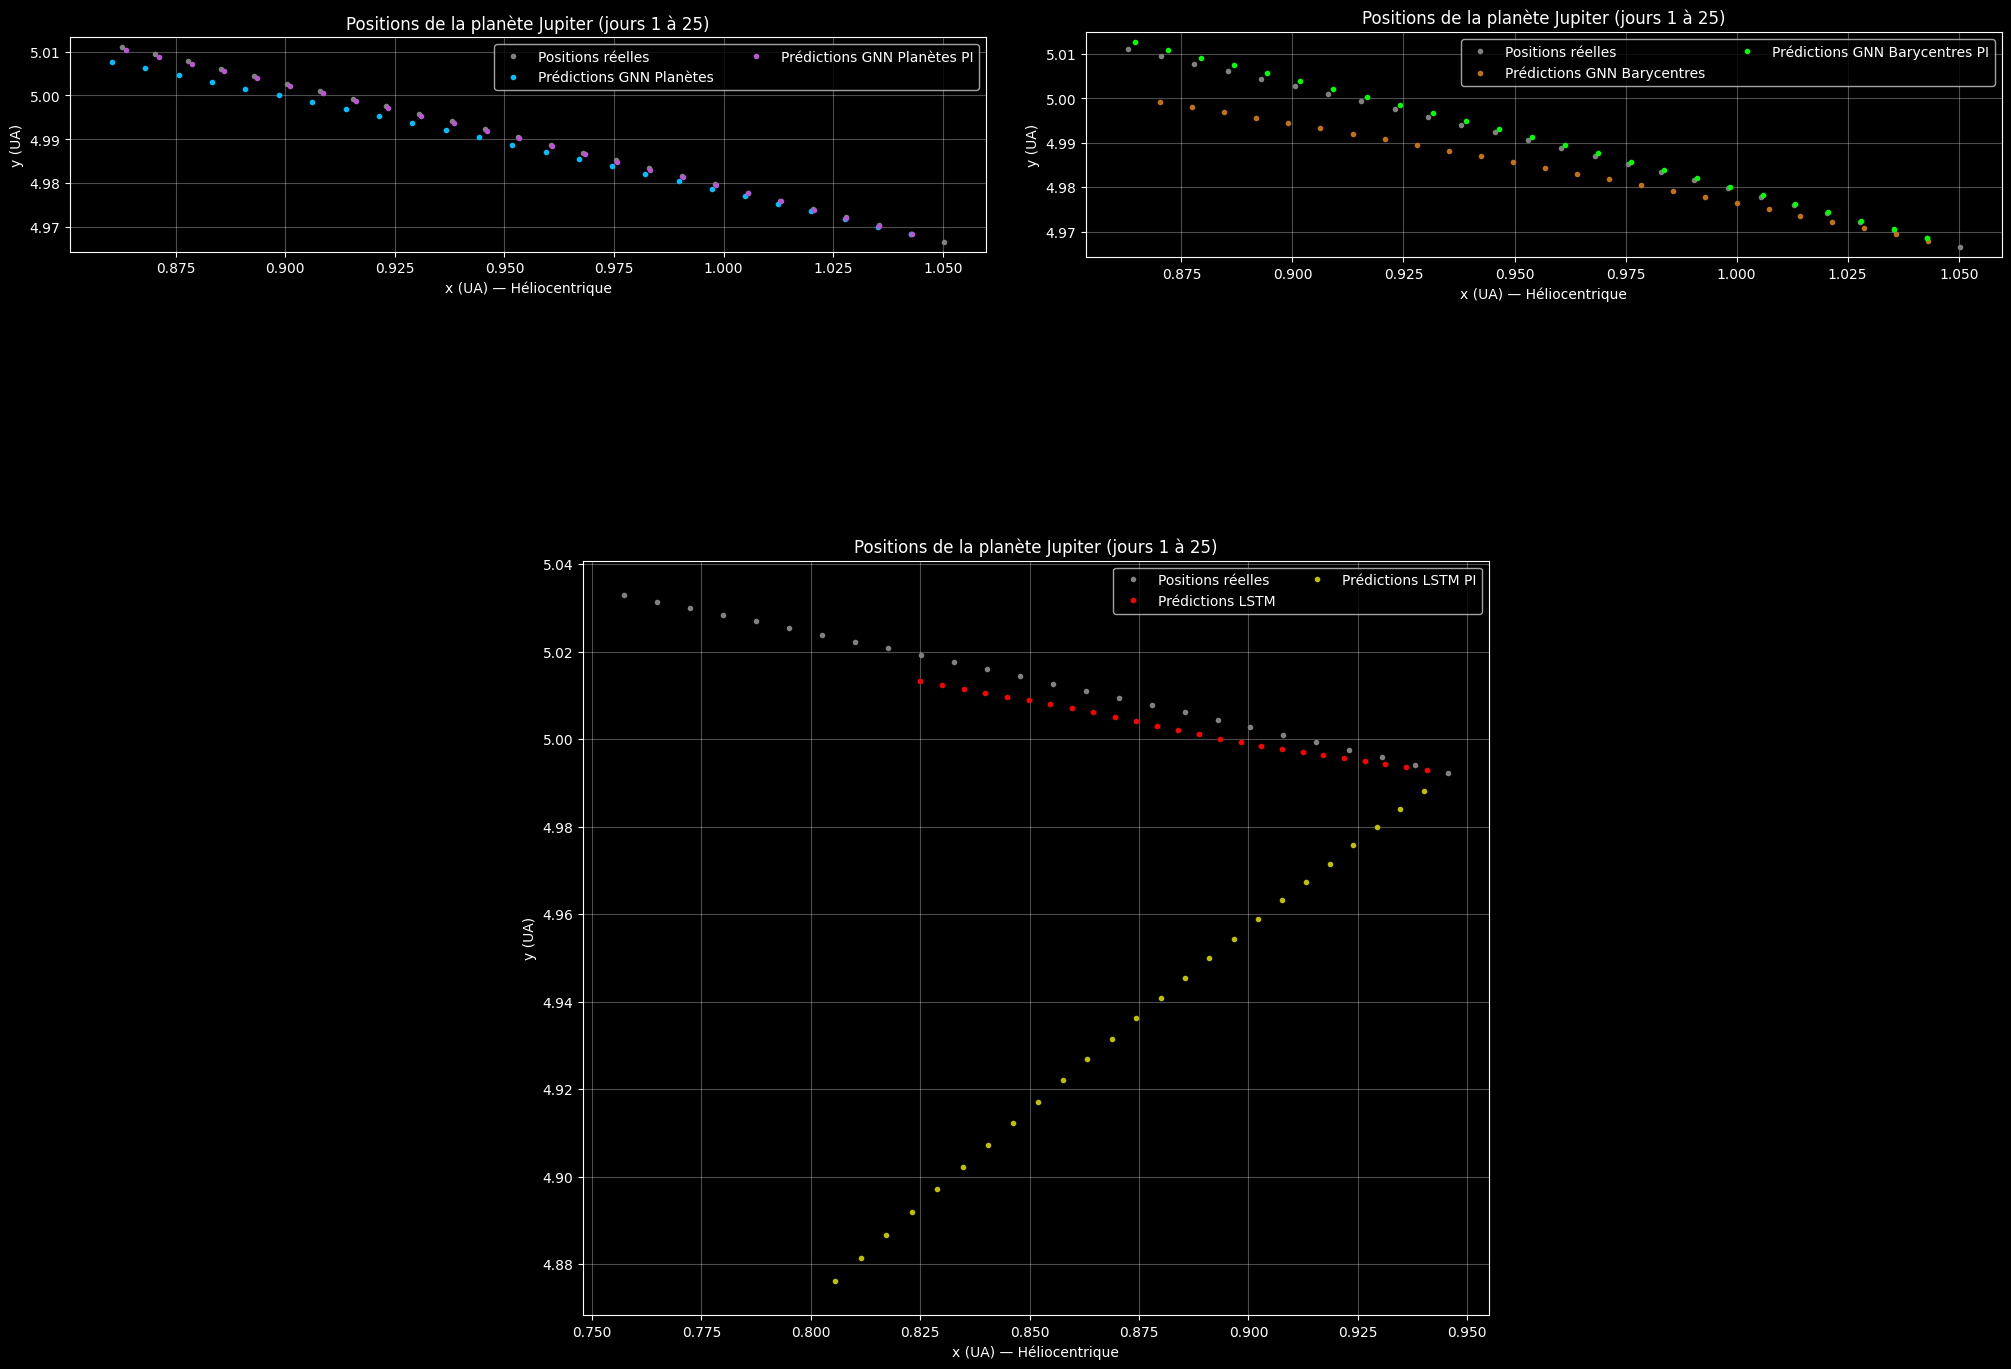

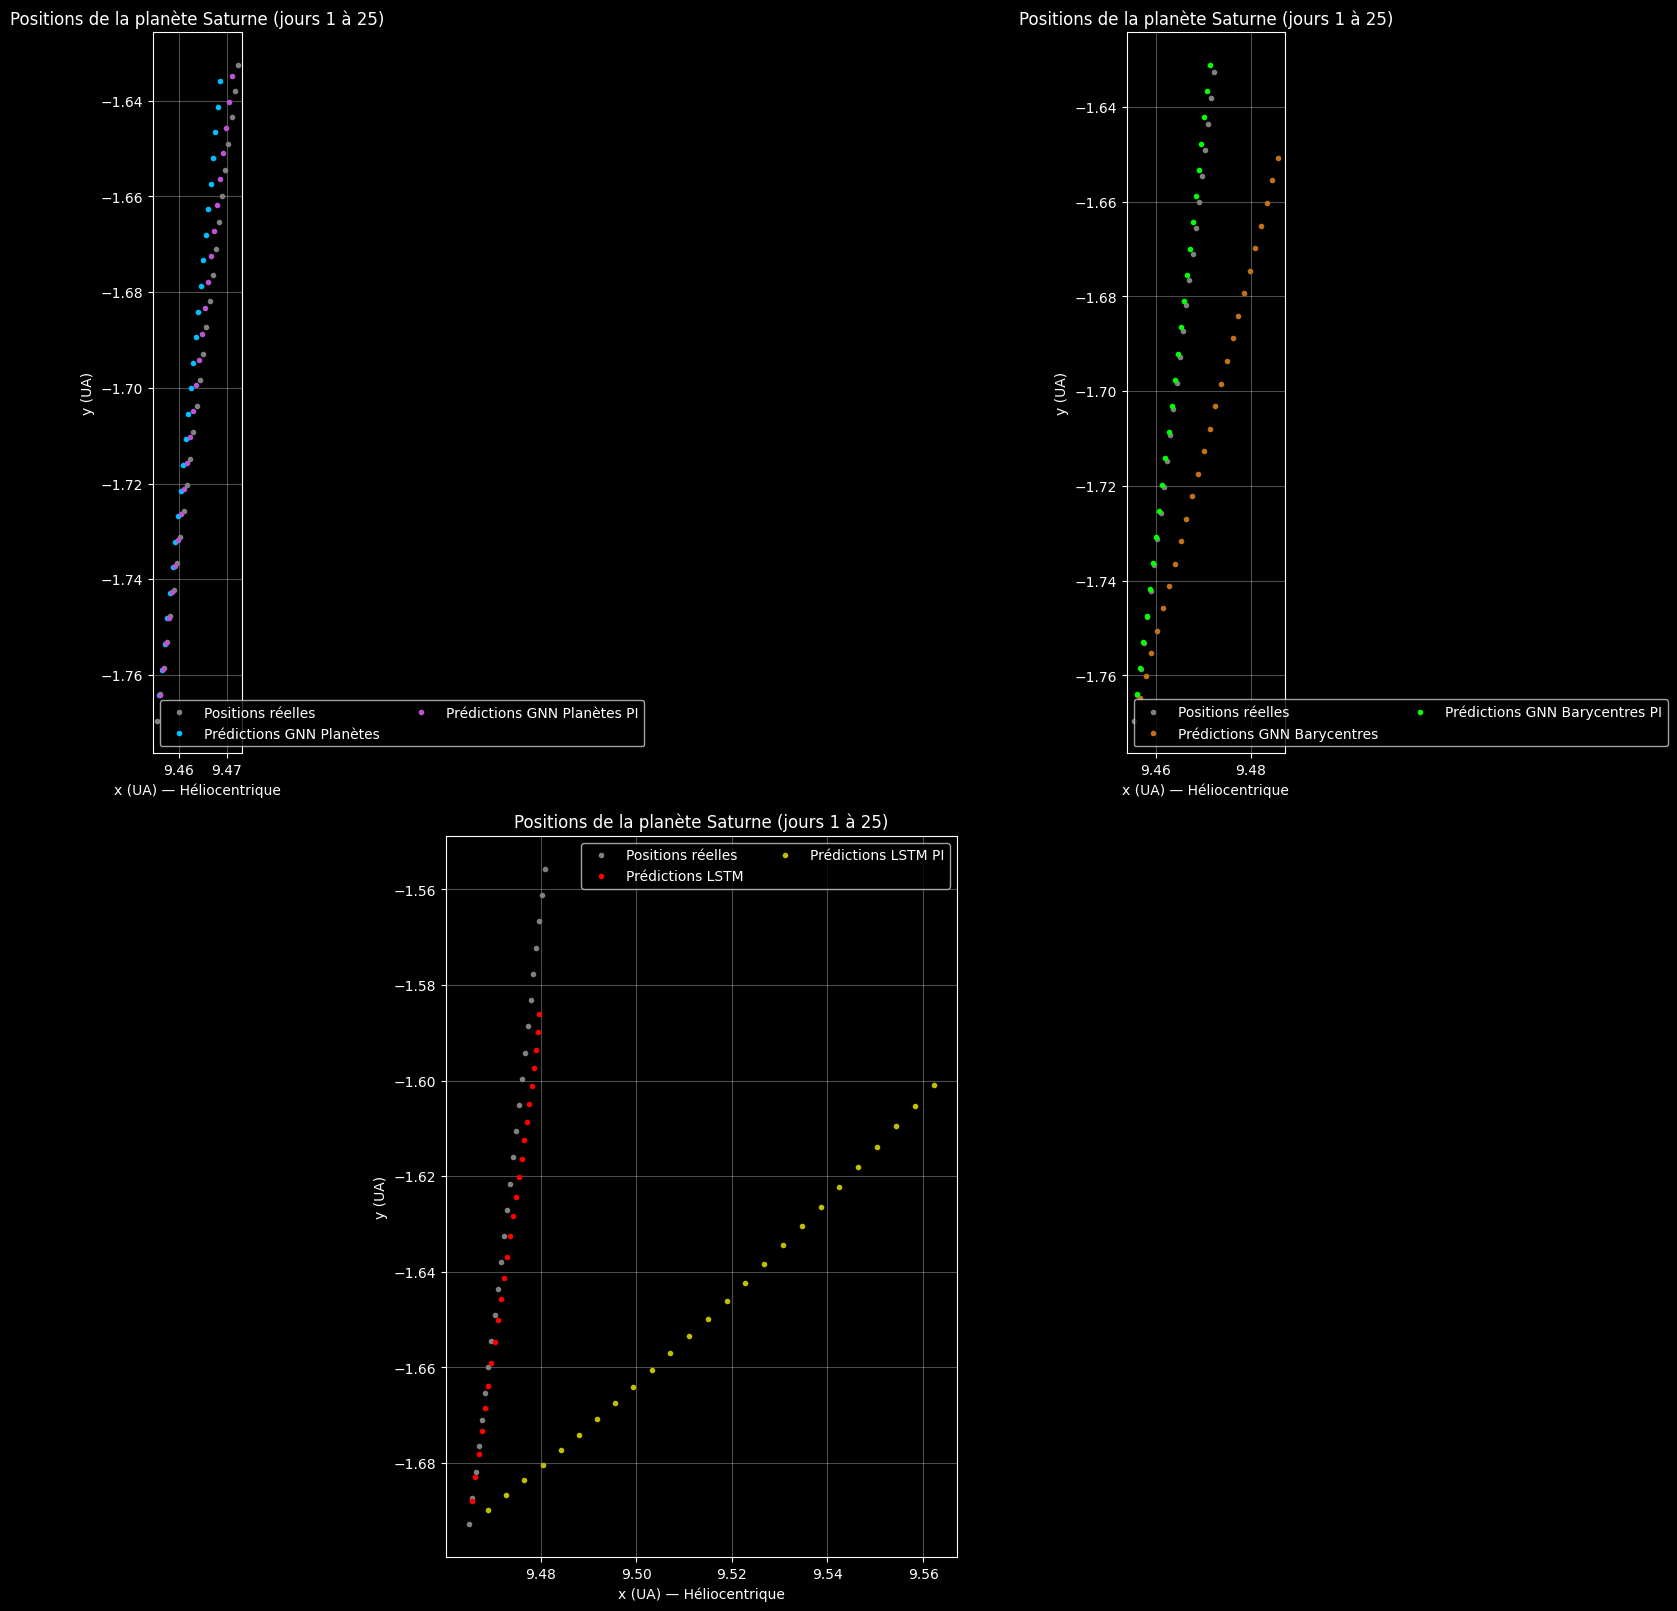

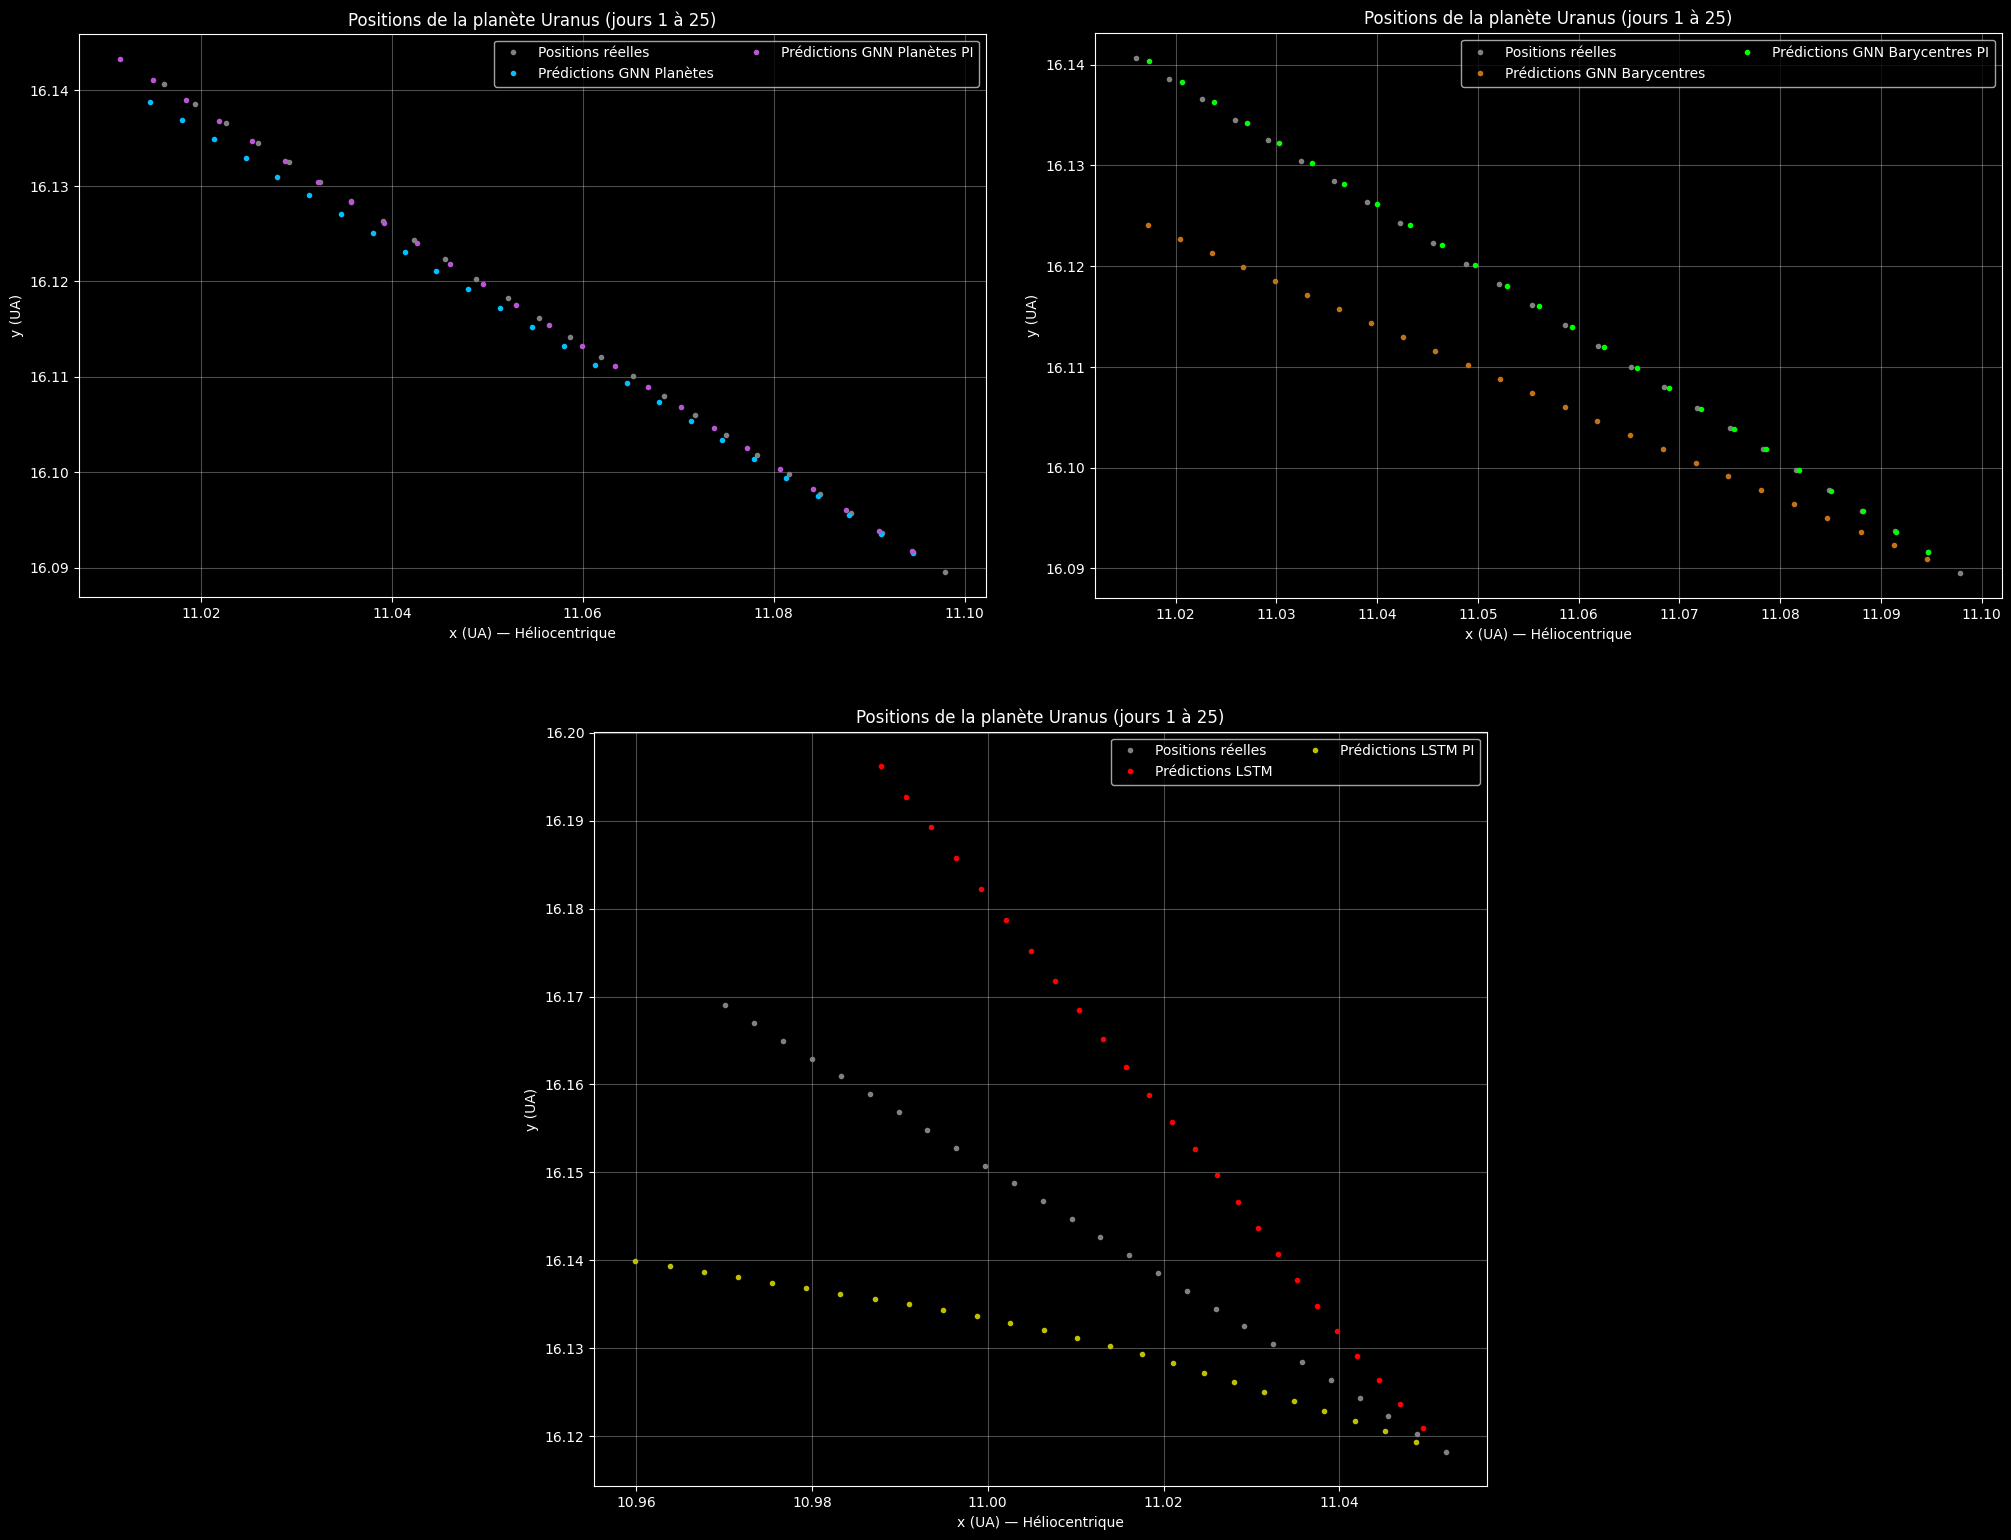

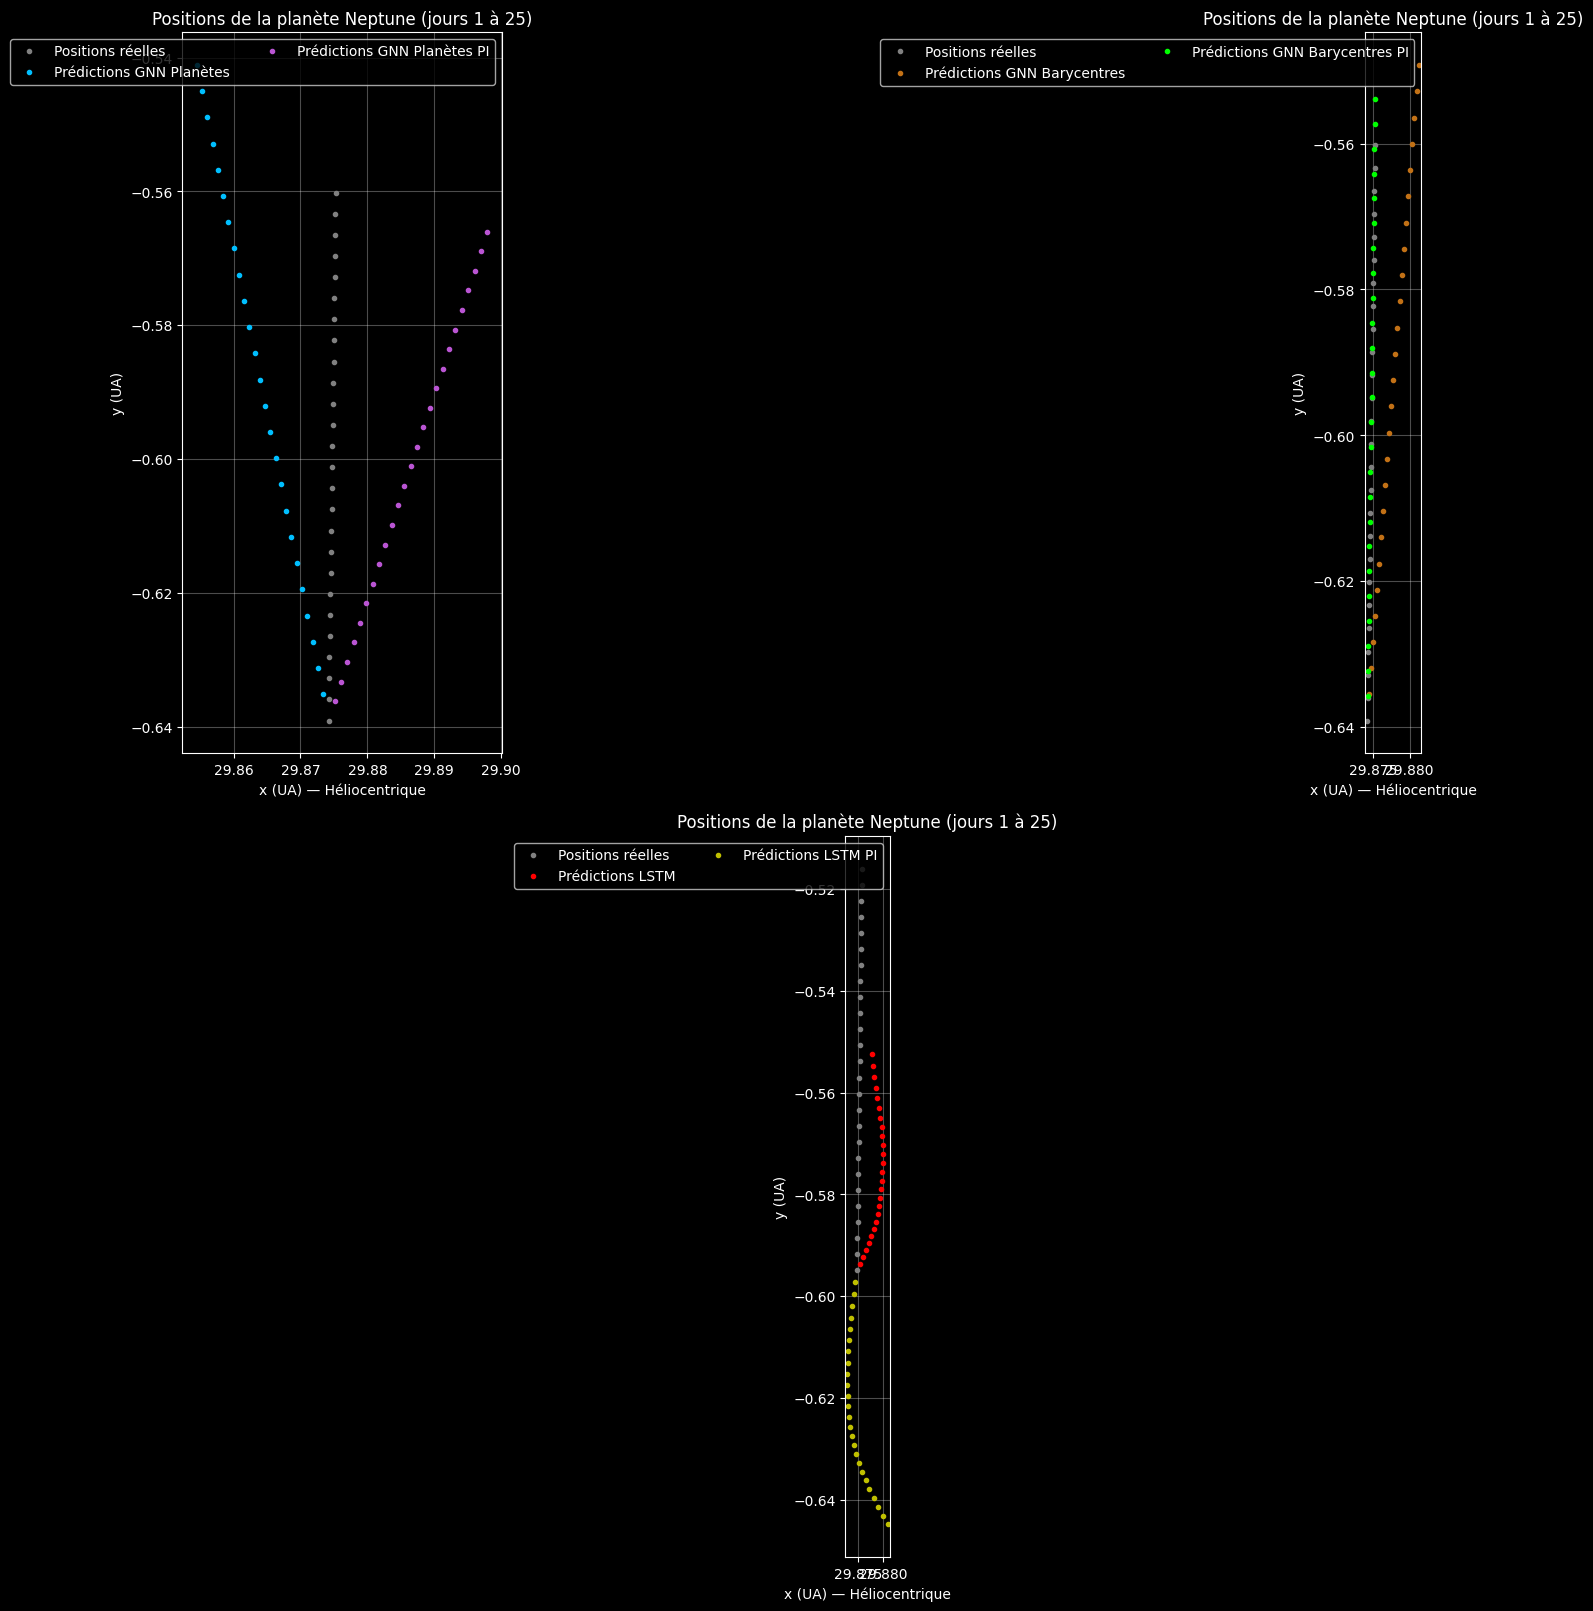

In [43]:
plot_planet_coordinates(num_days=25, show_sun=False)

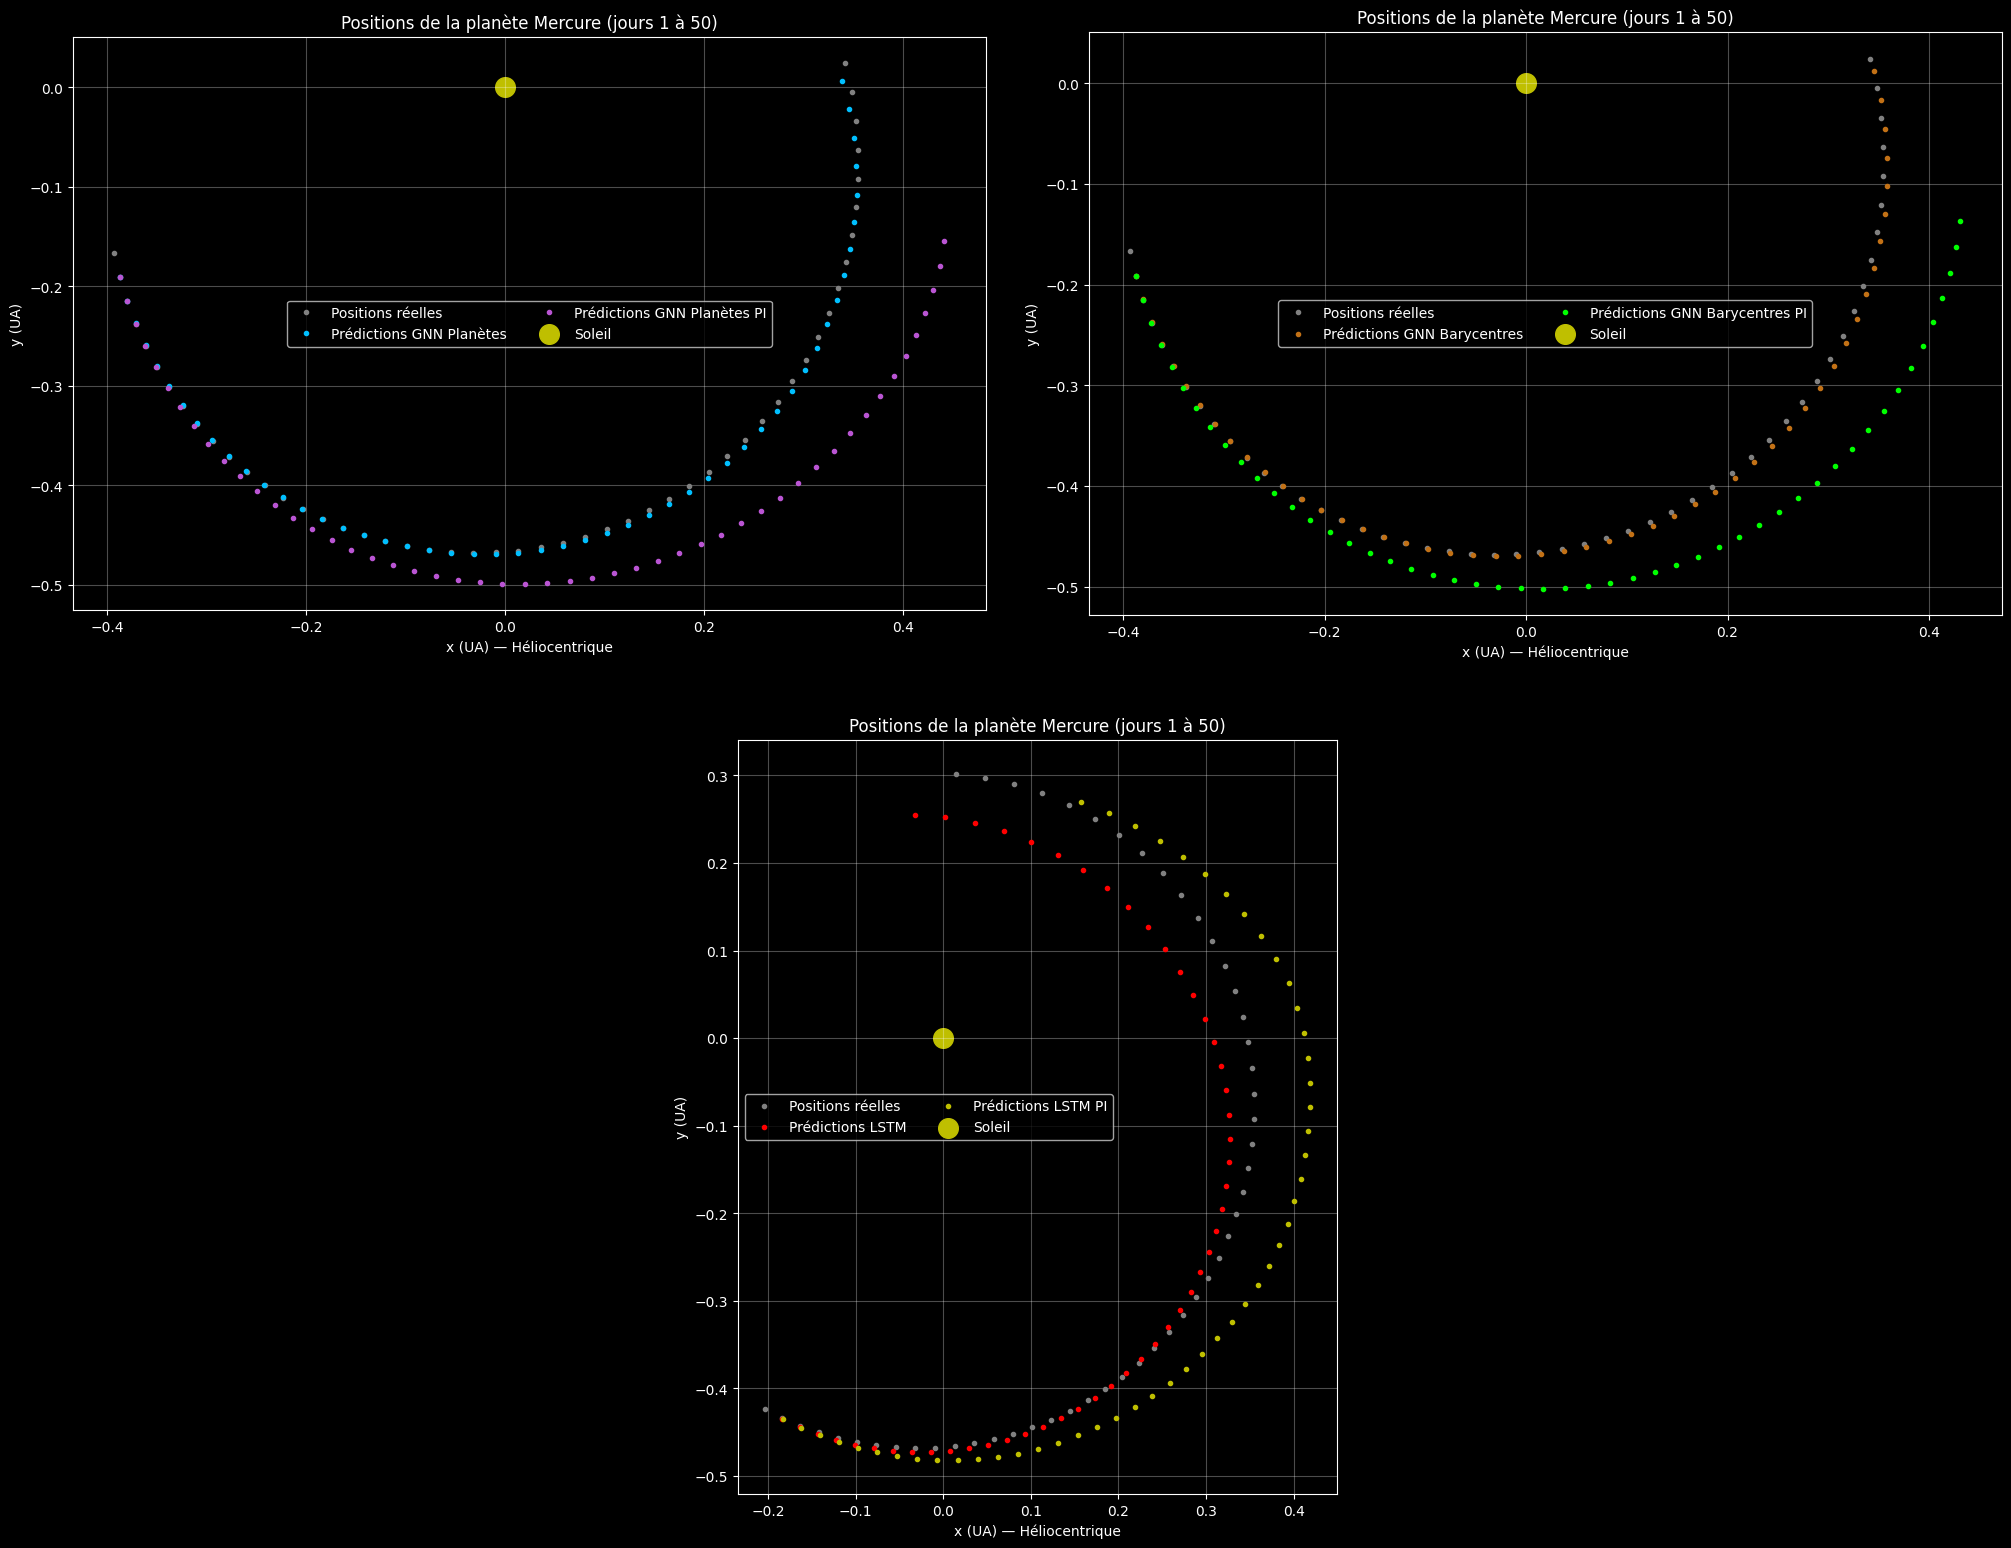

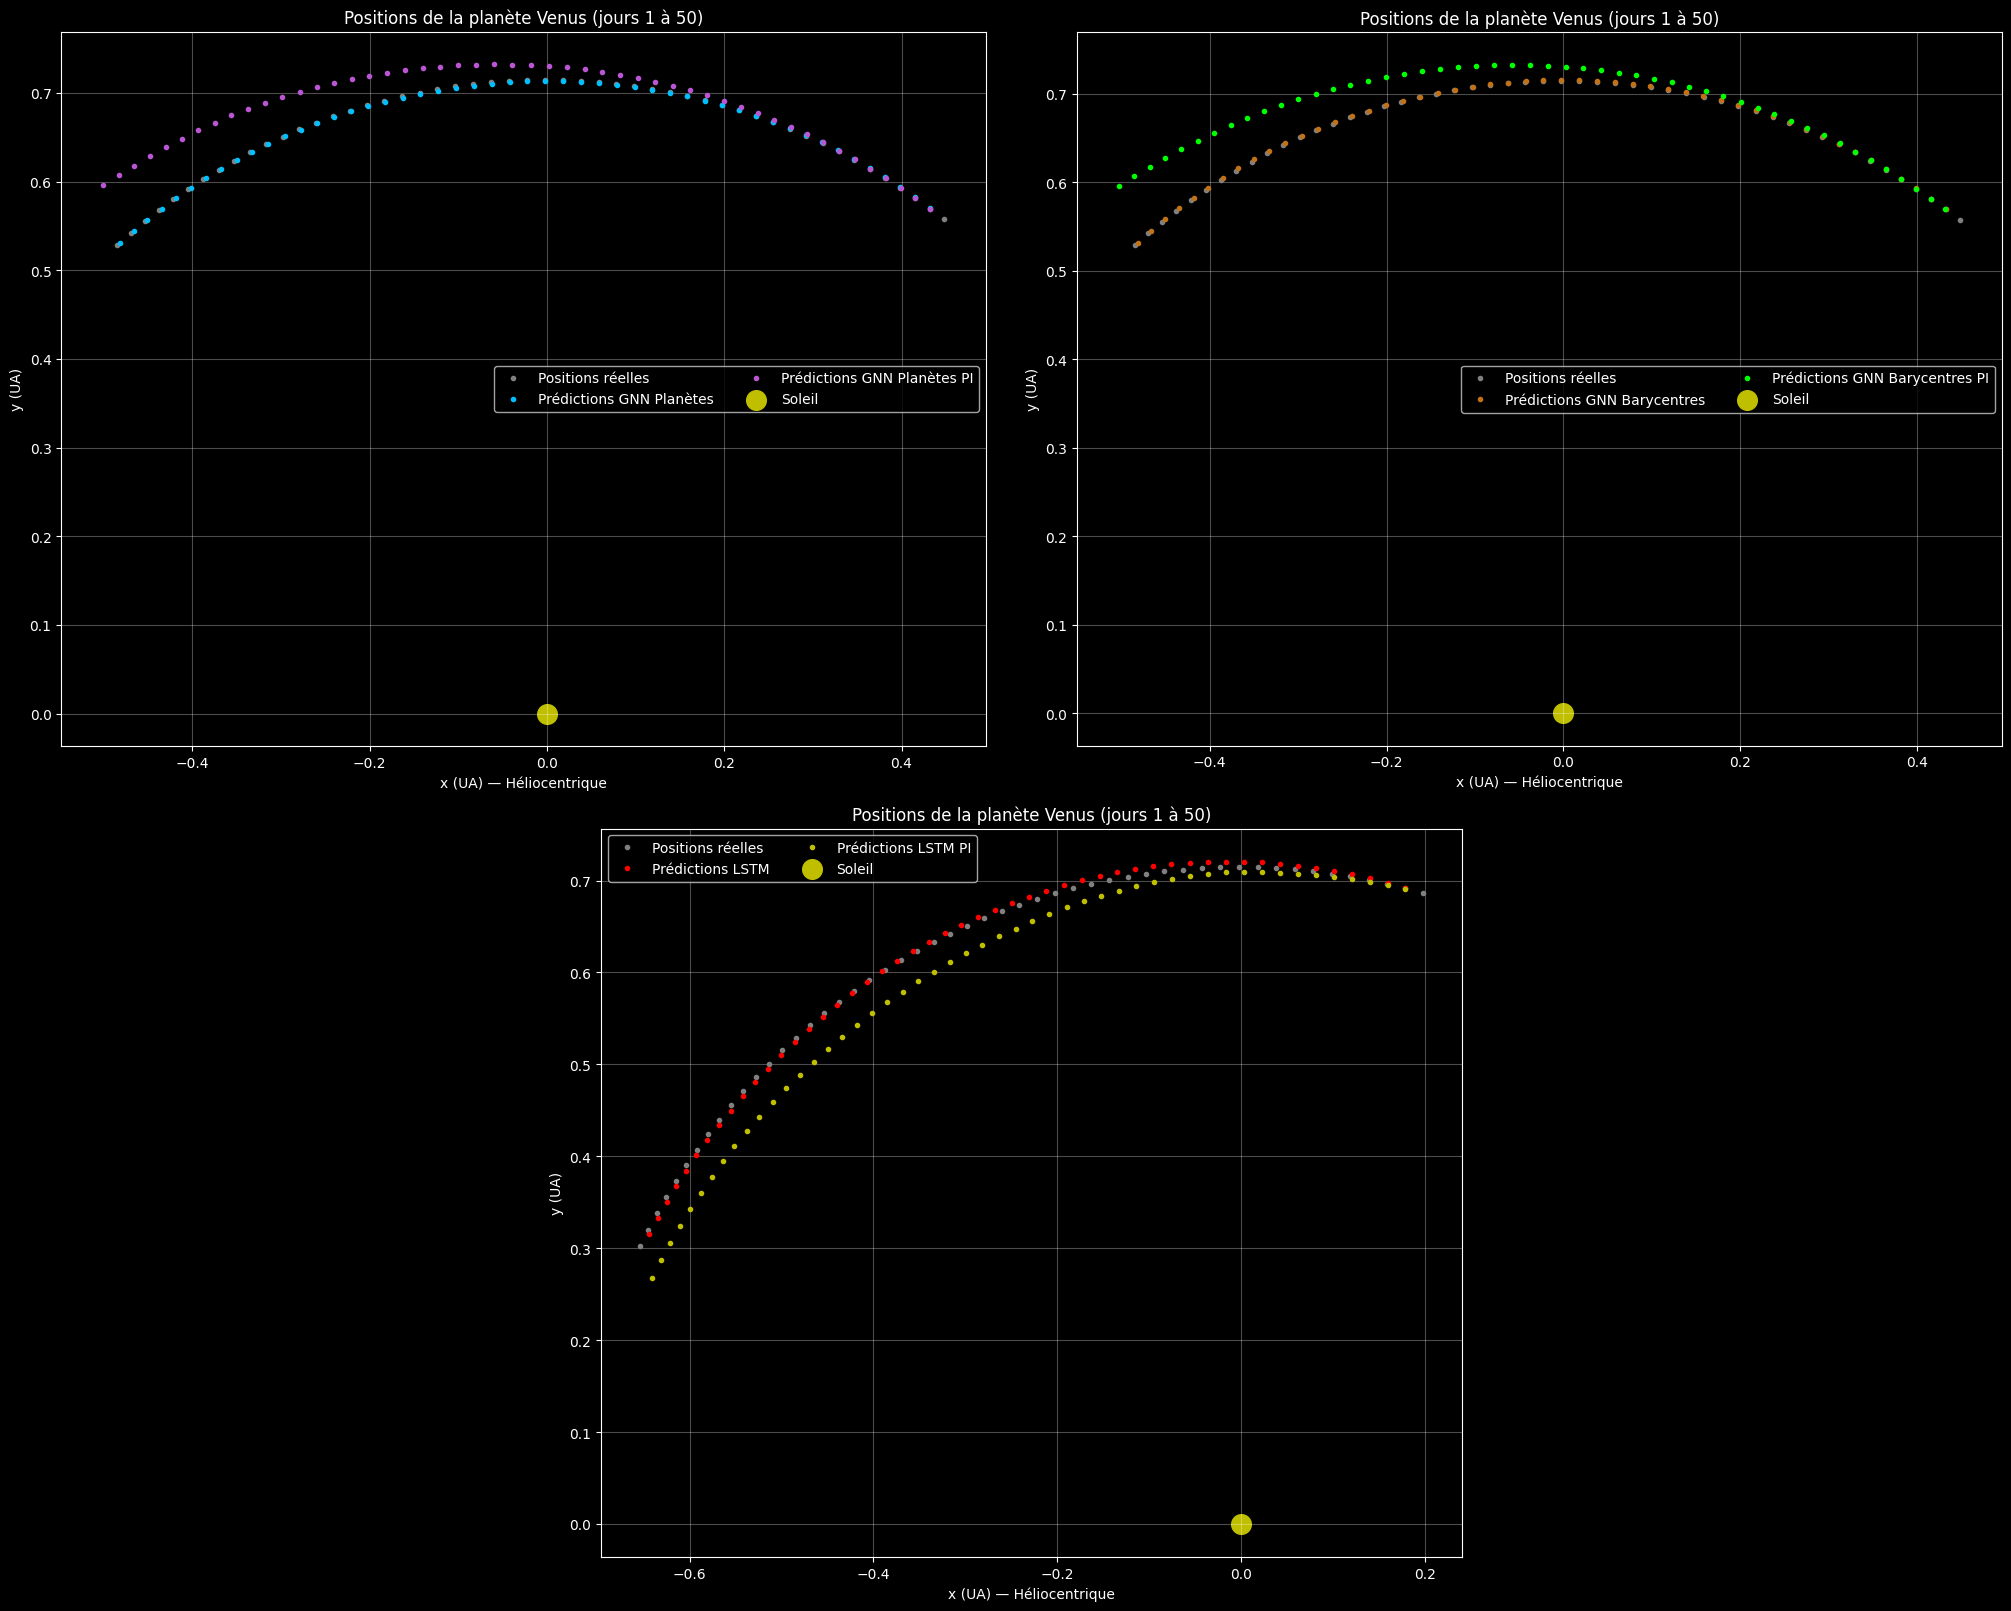

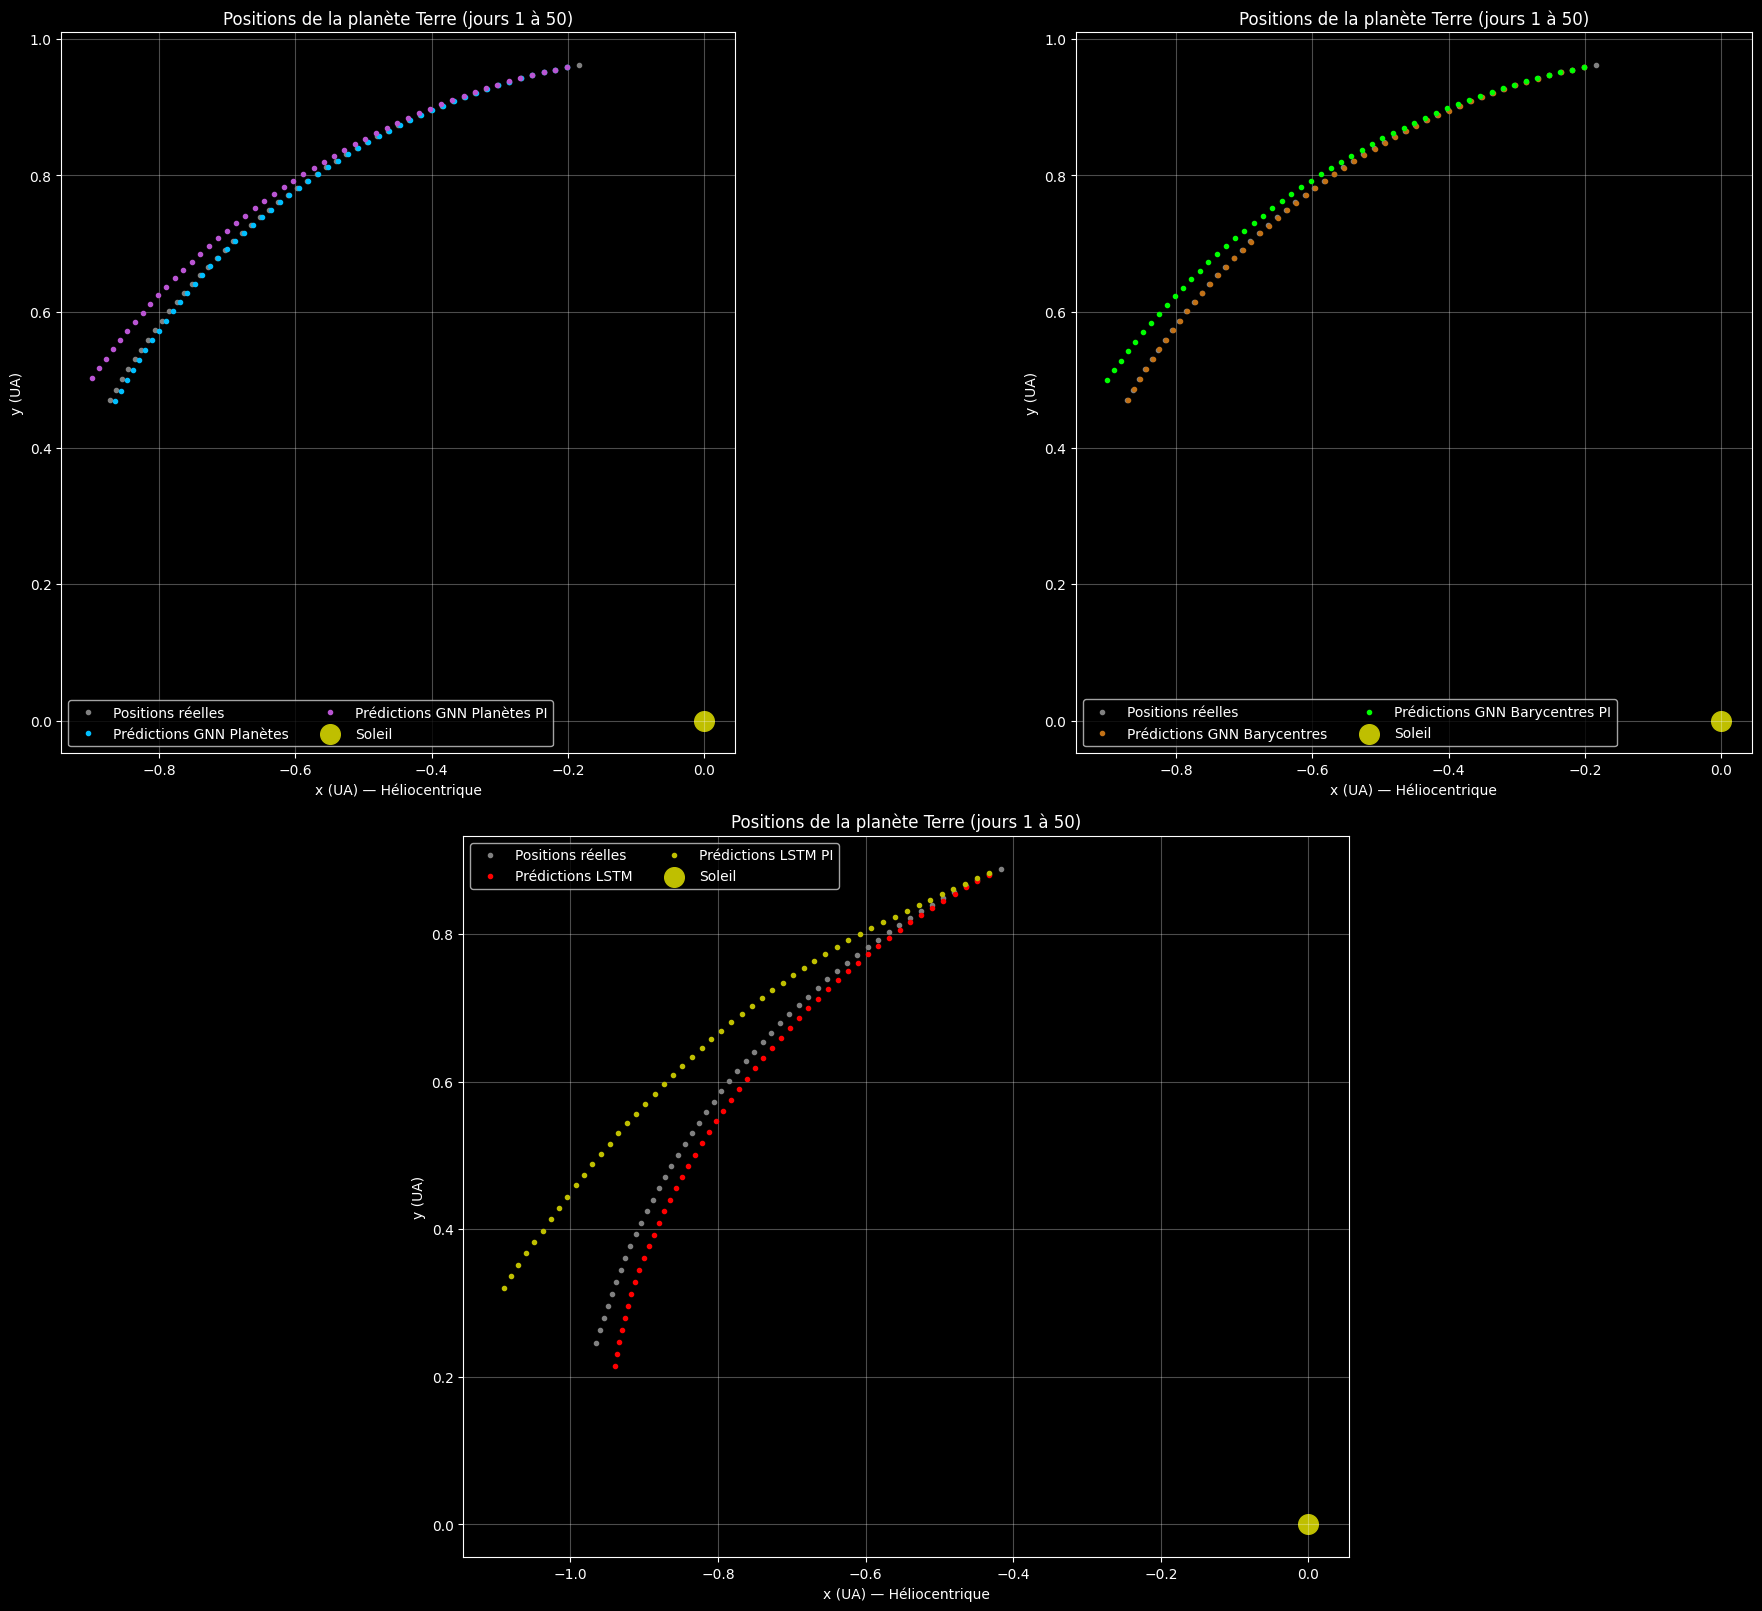

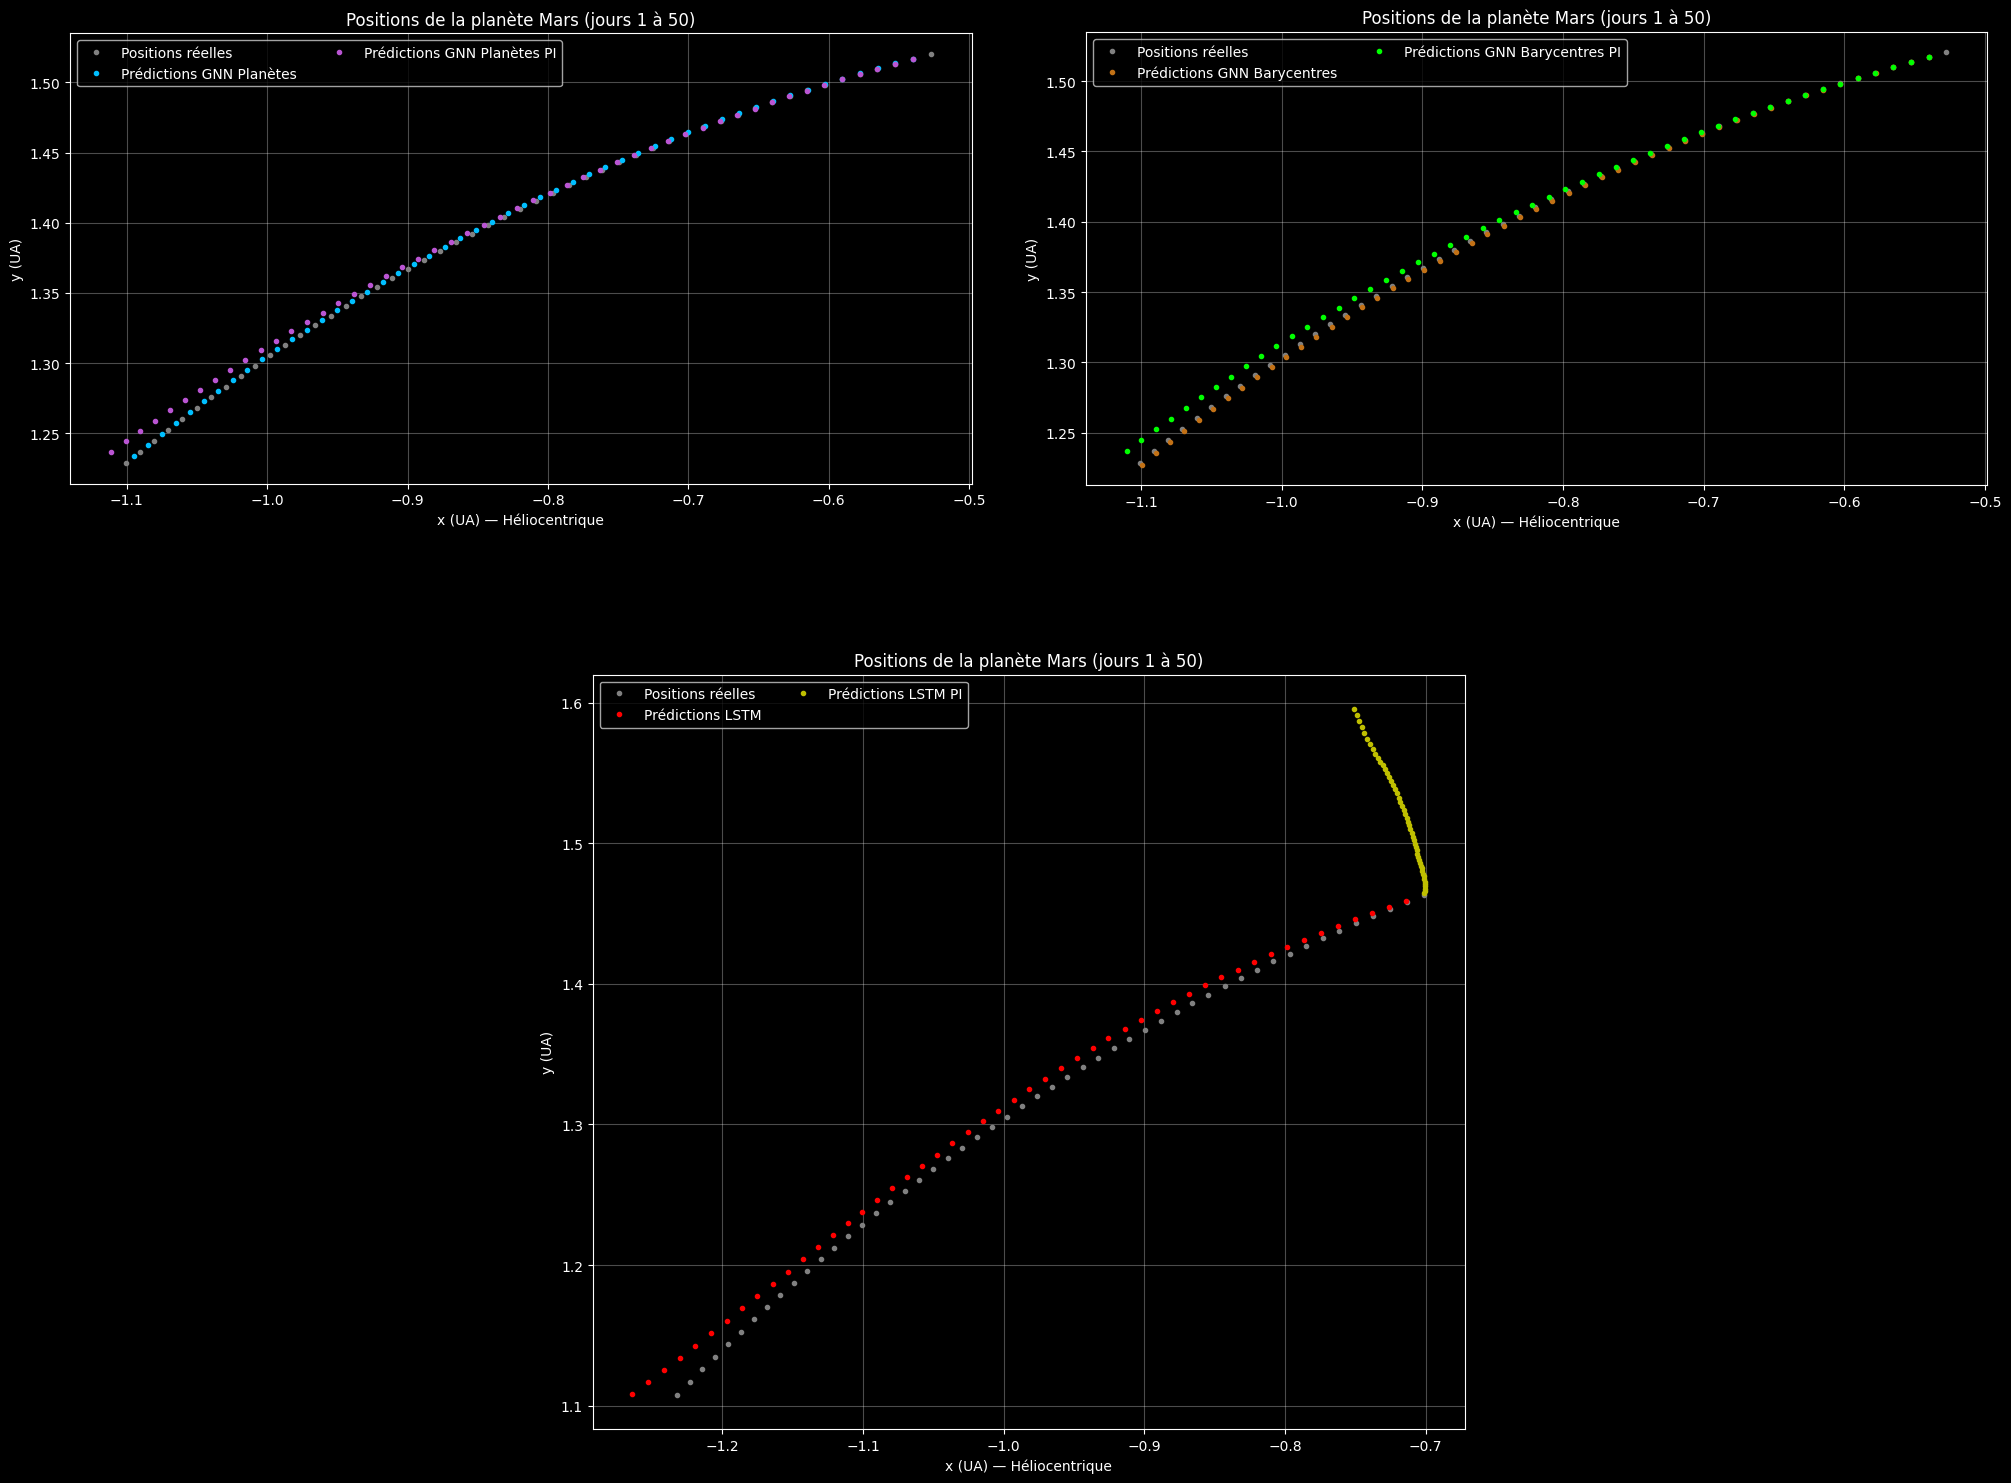

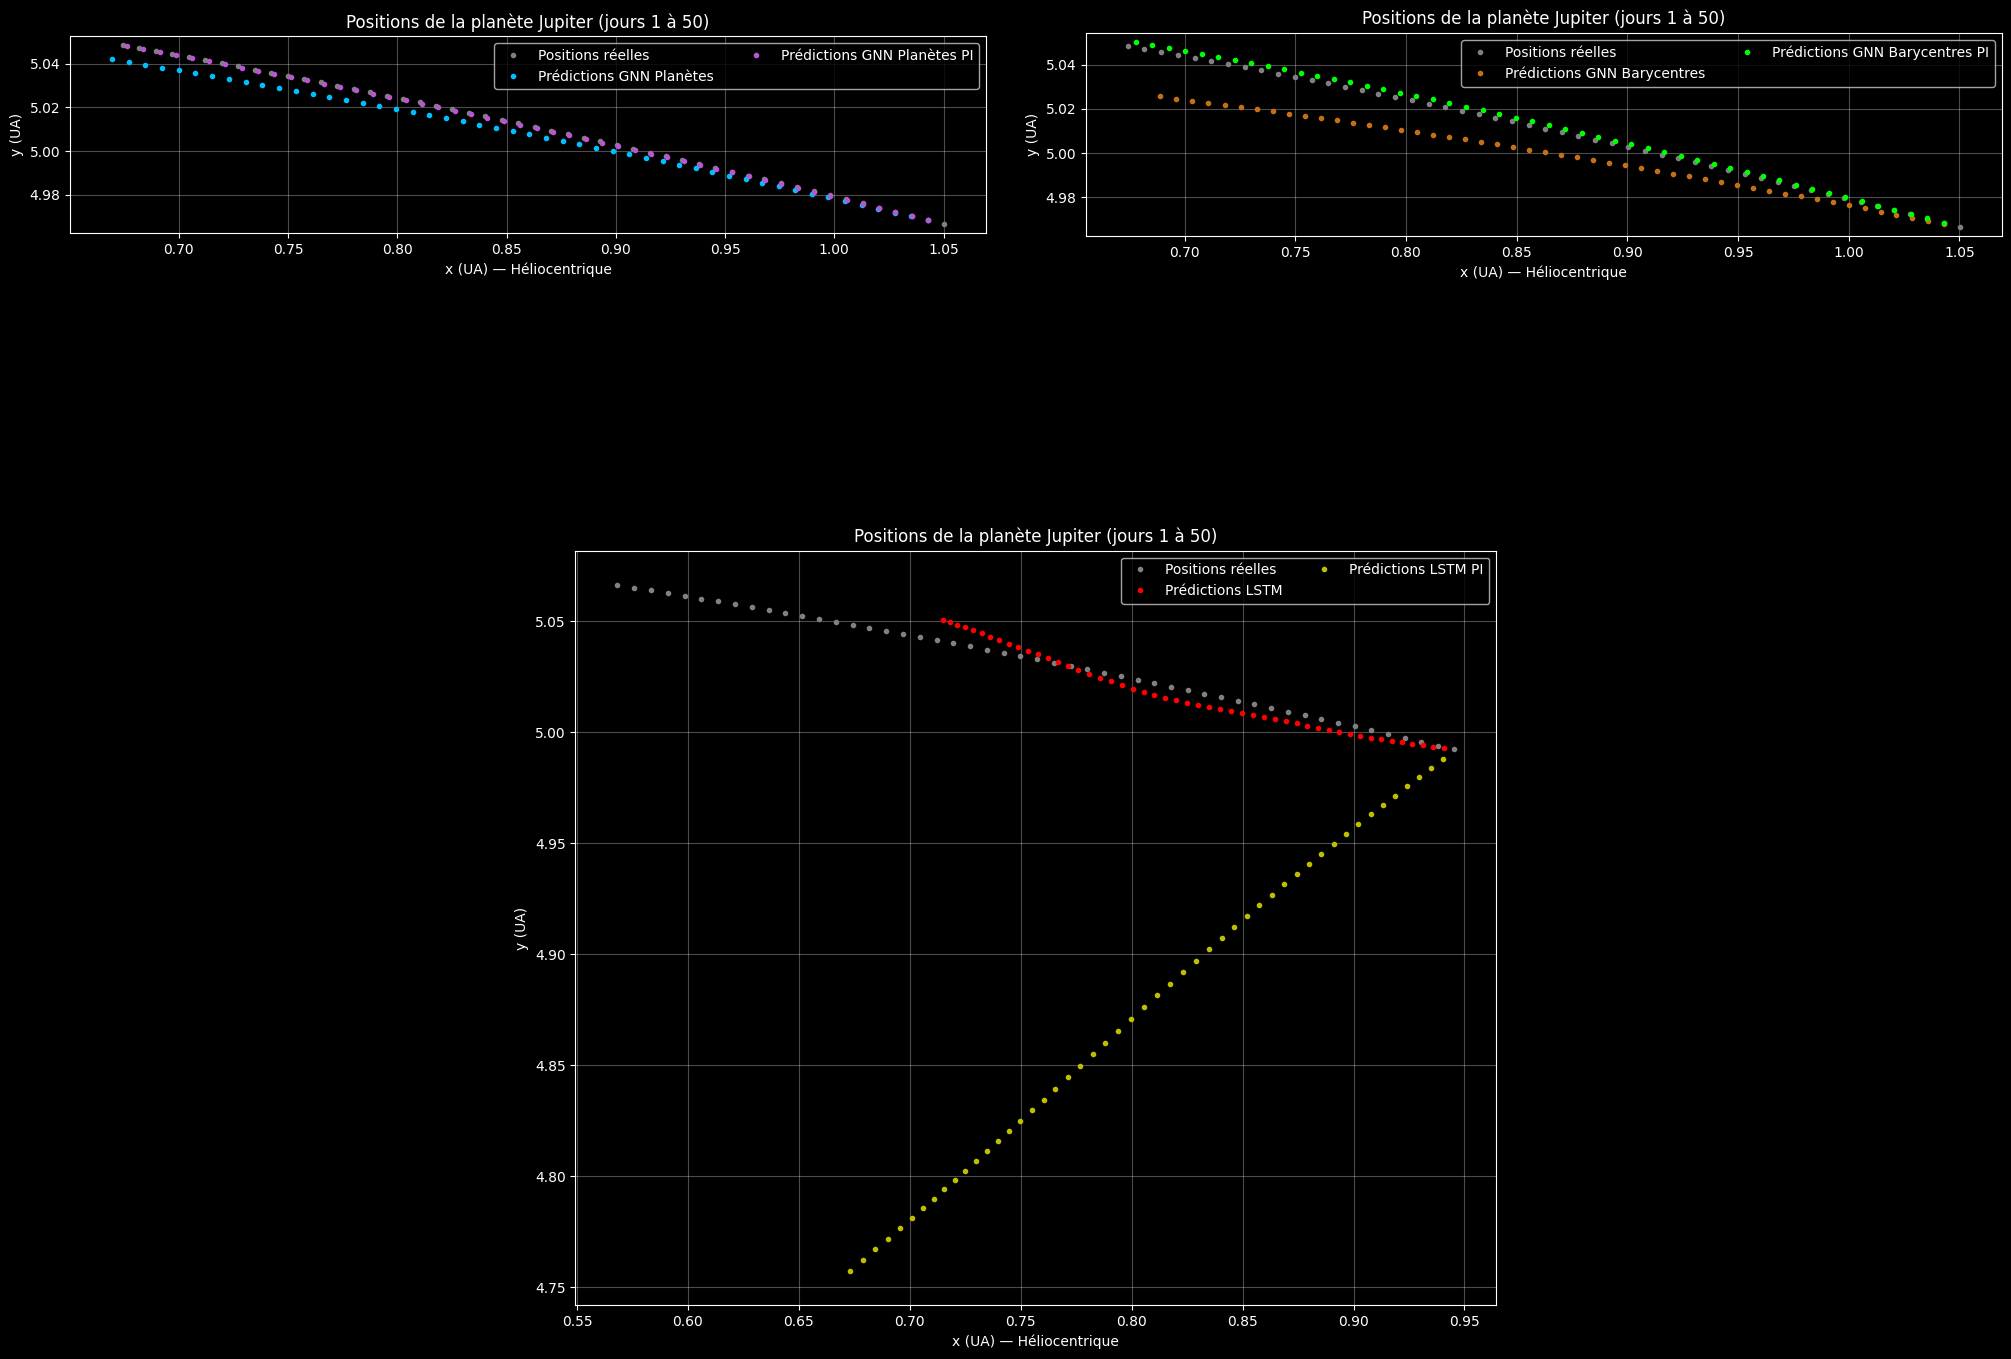

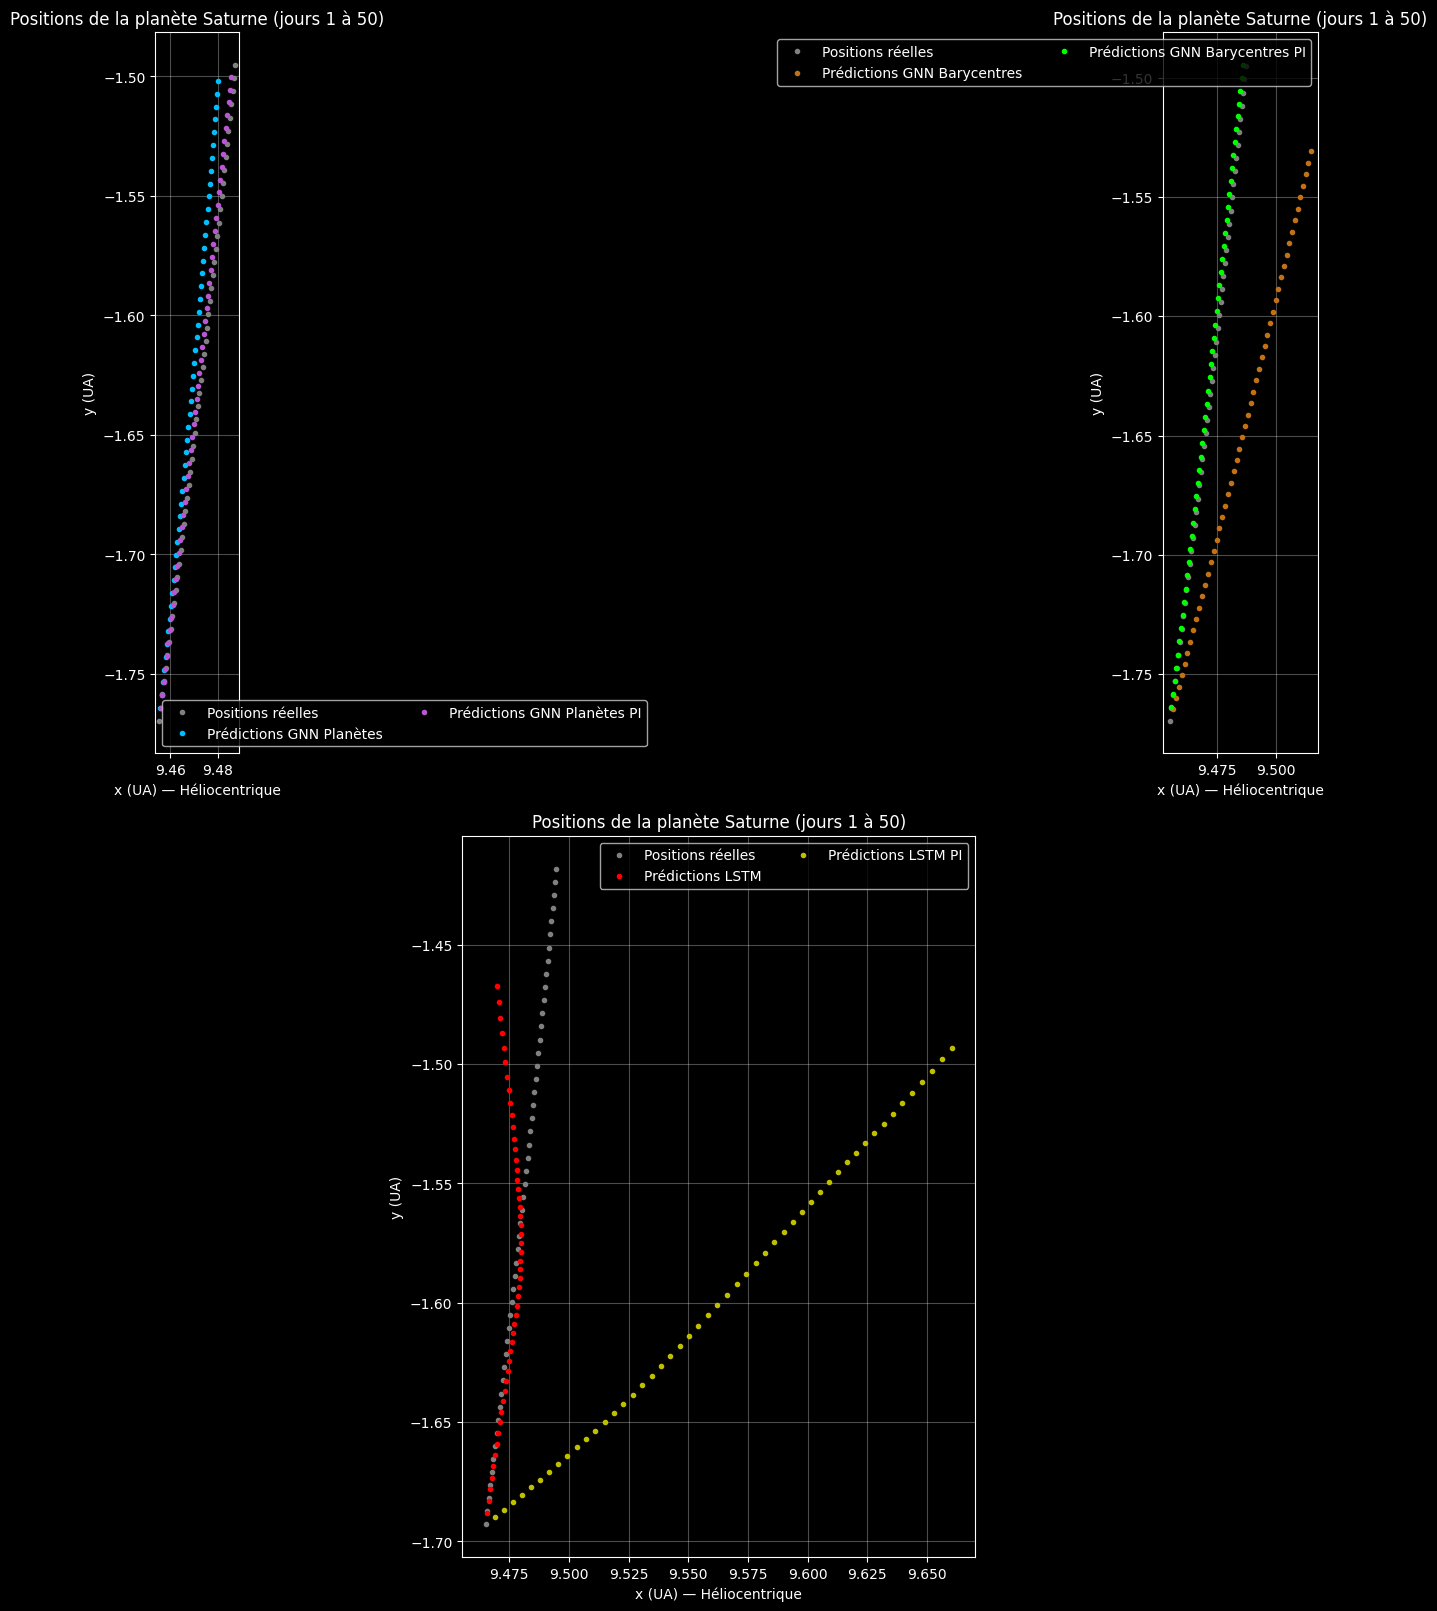

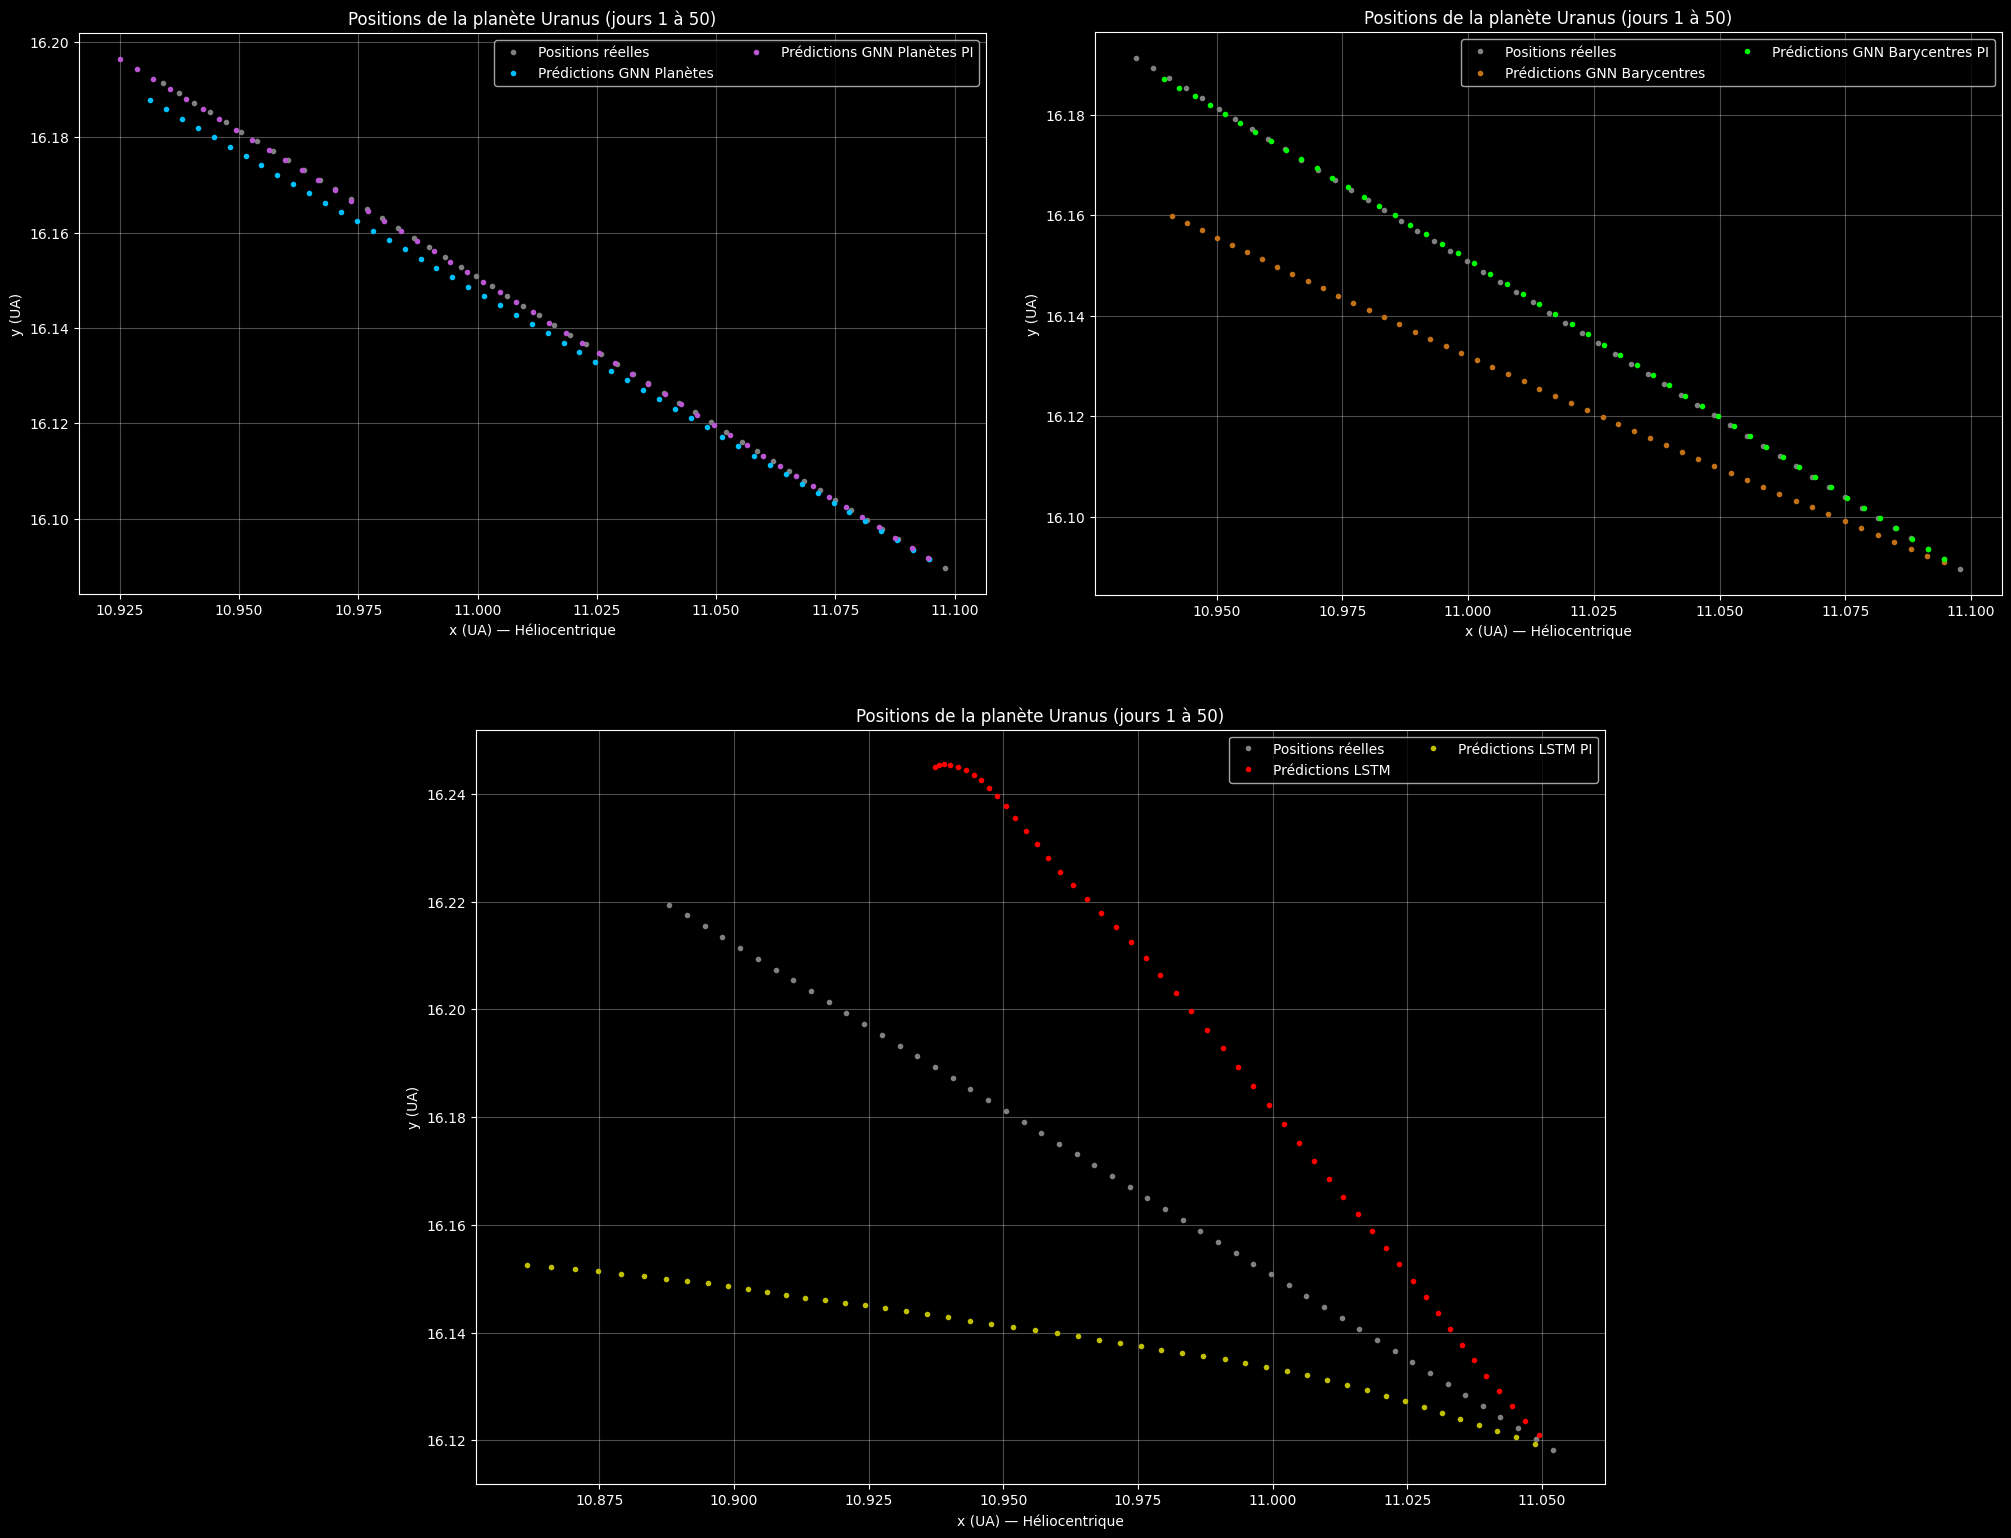

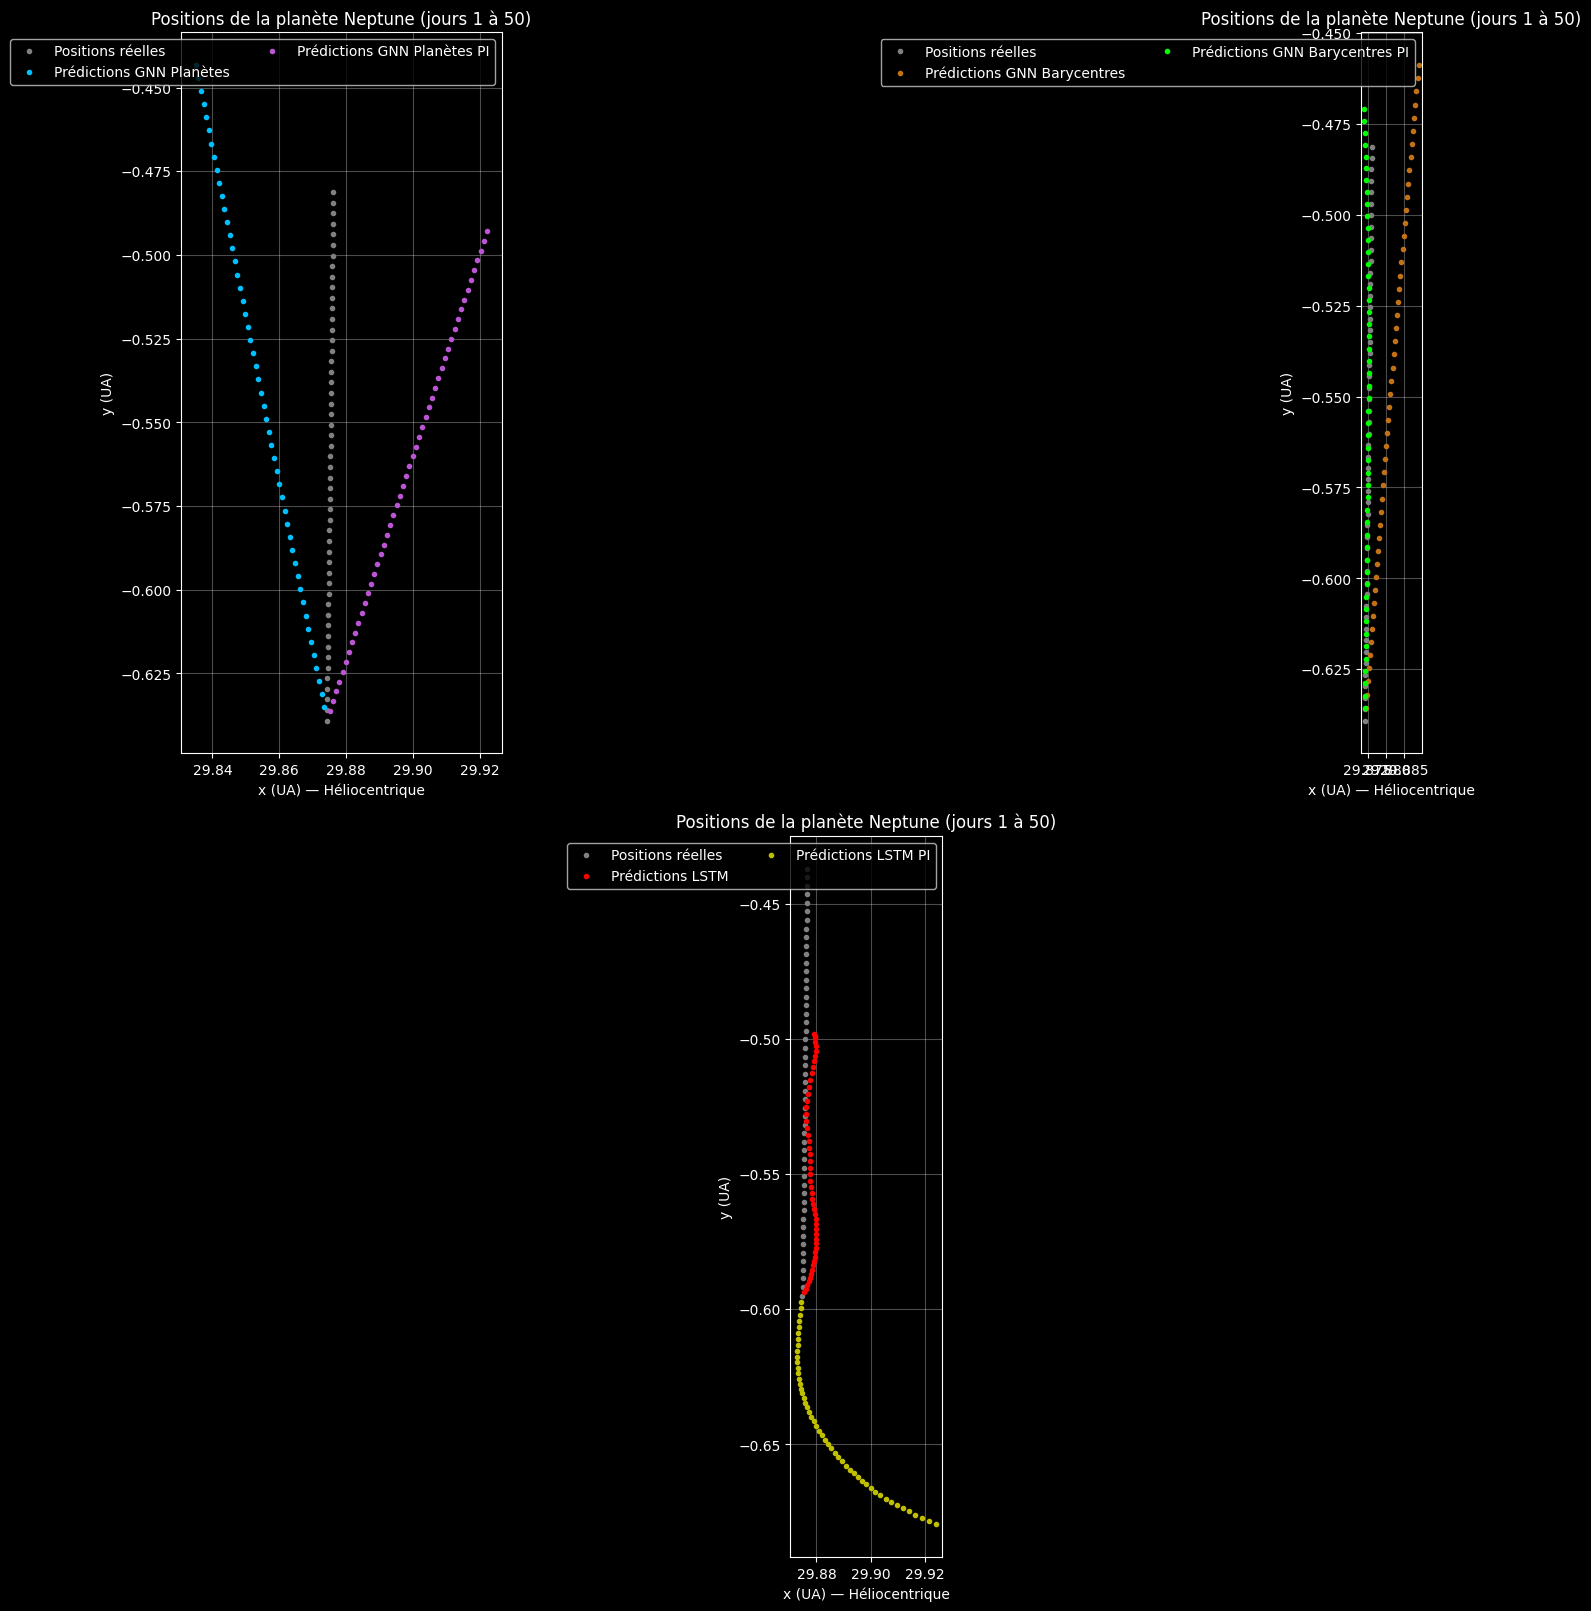

In [44]:
plot_planet_coordinates(num_days=50)

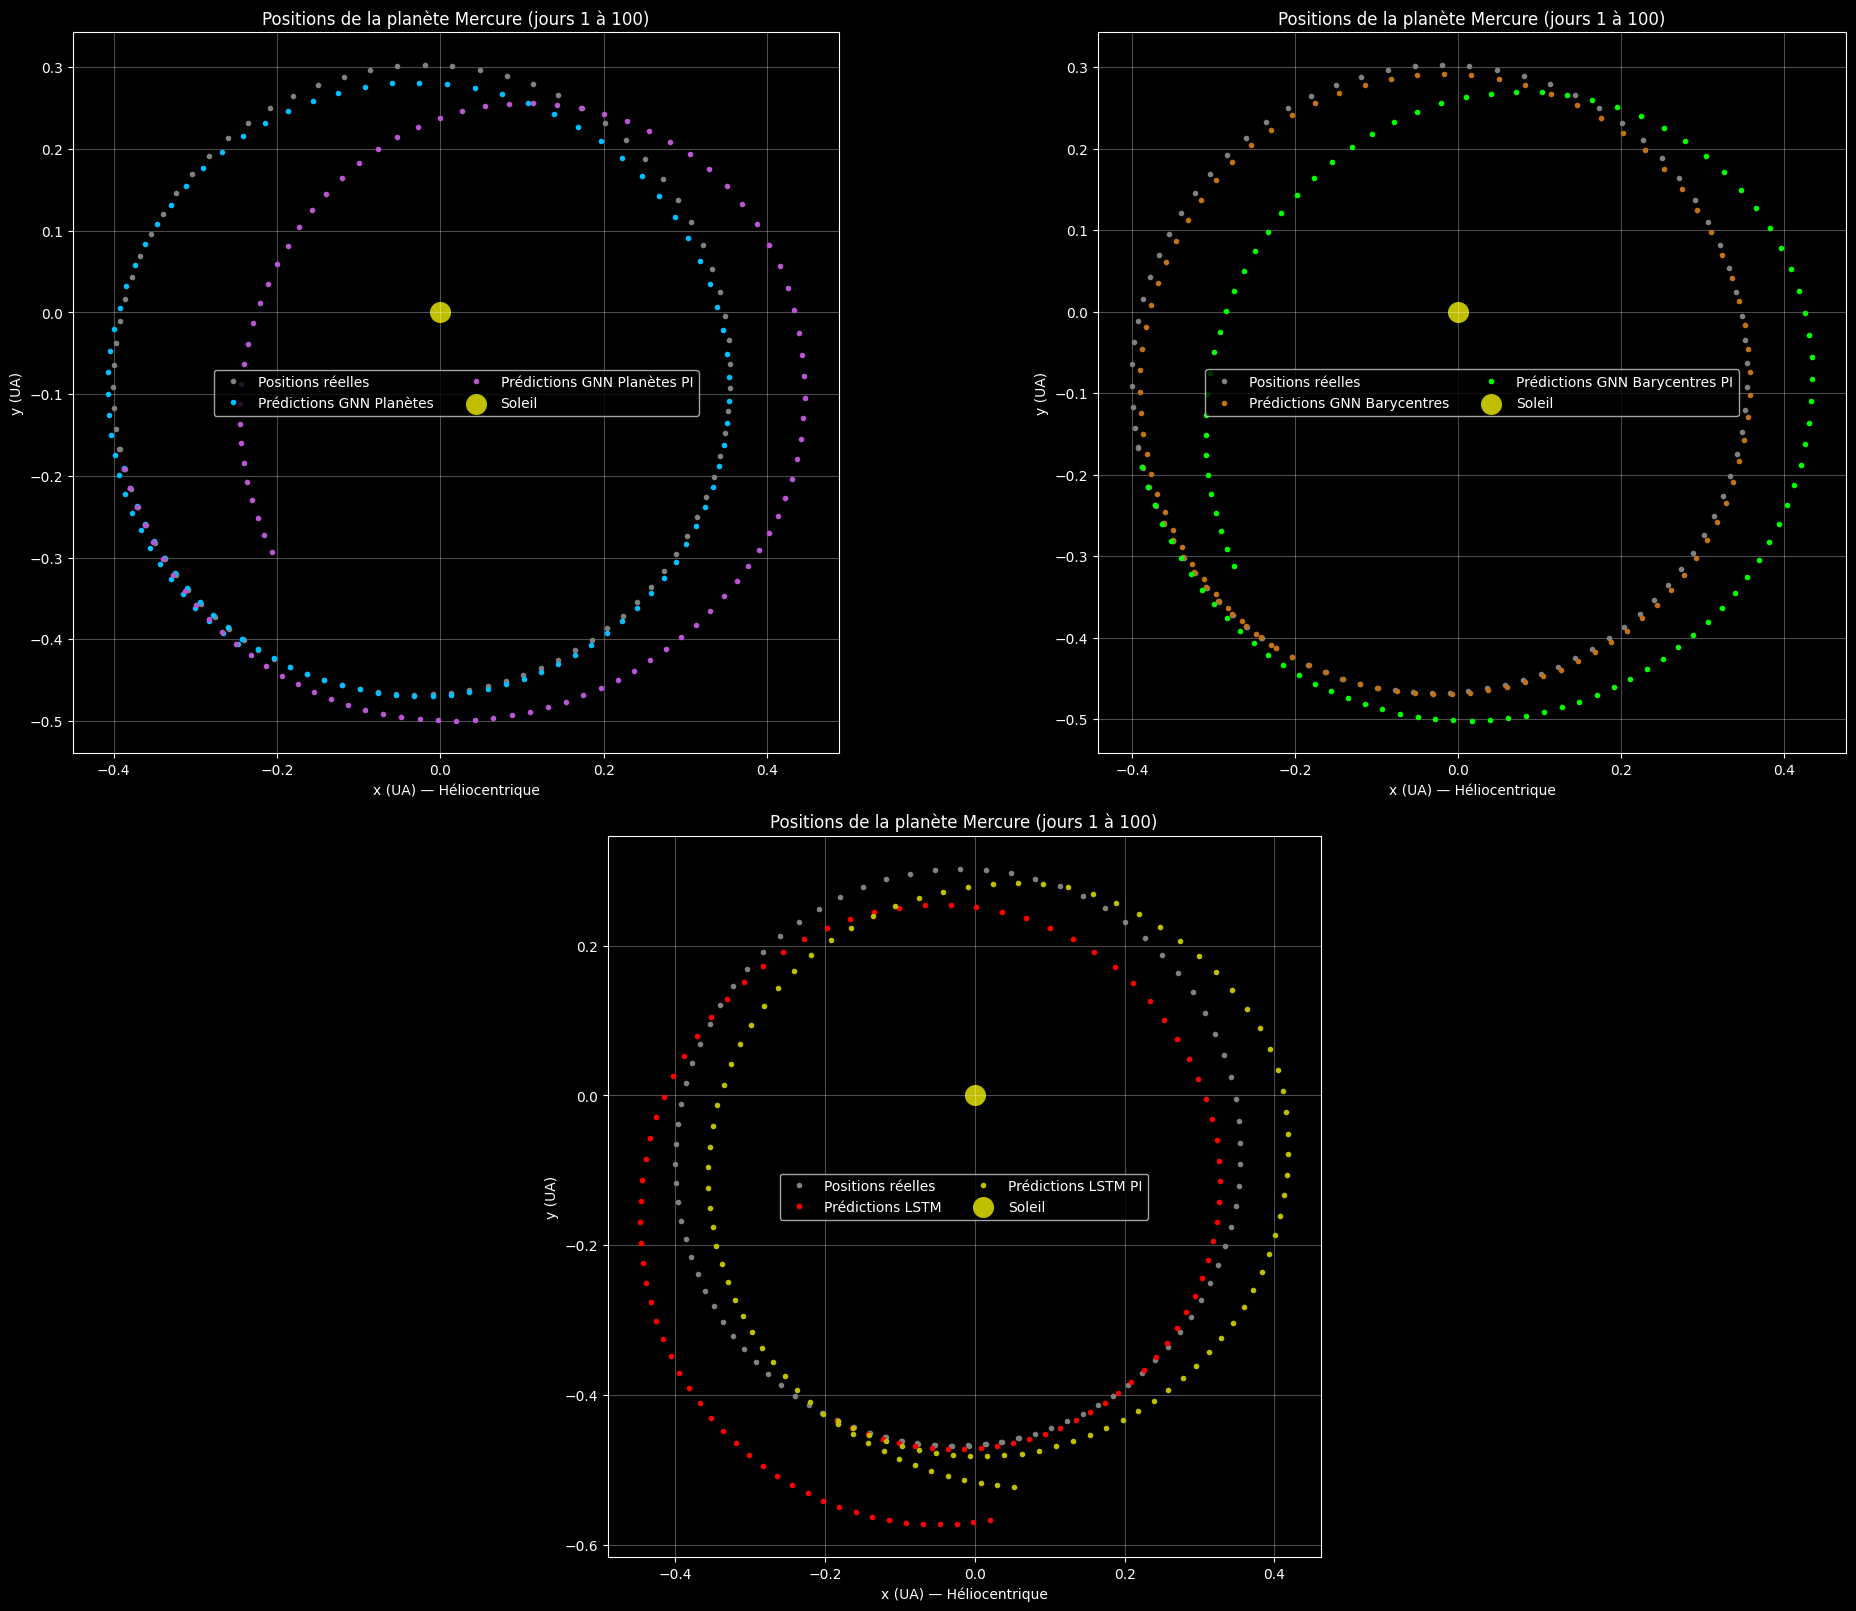

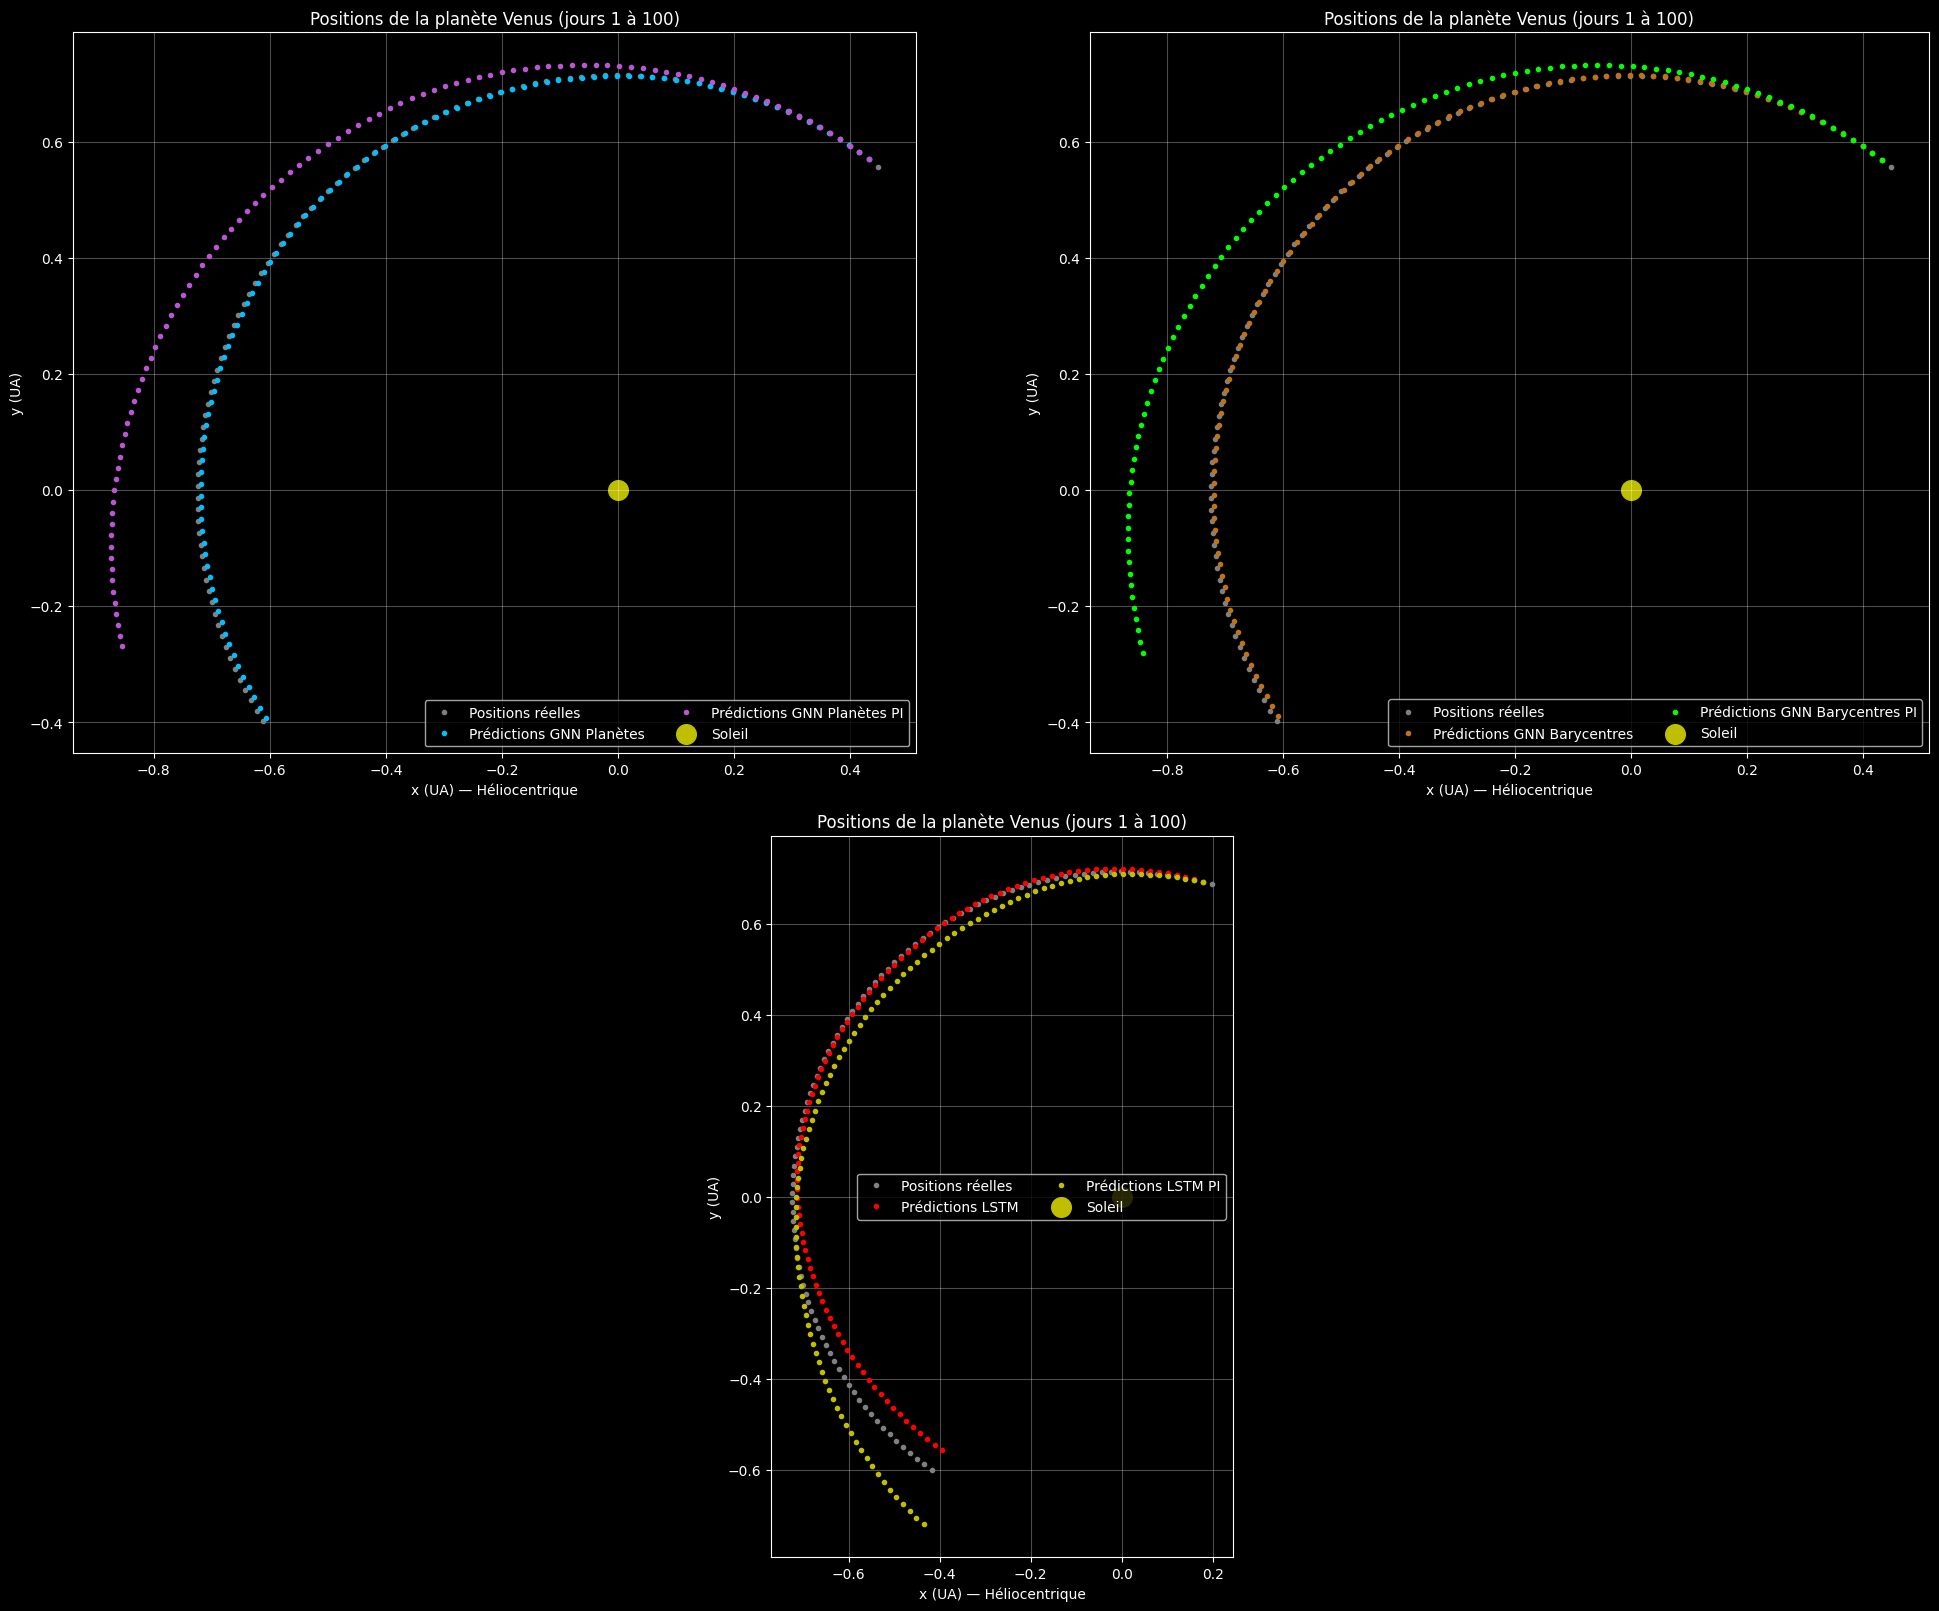

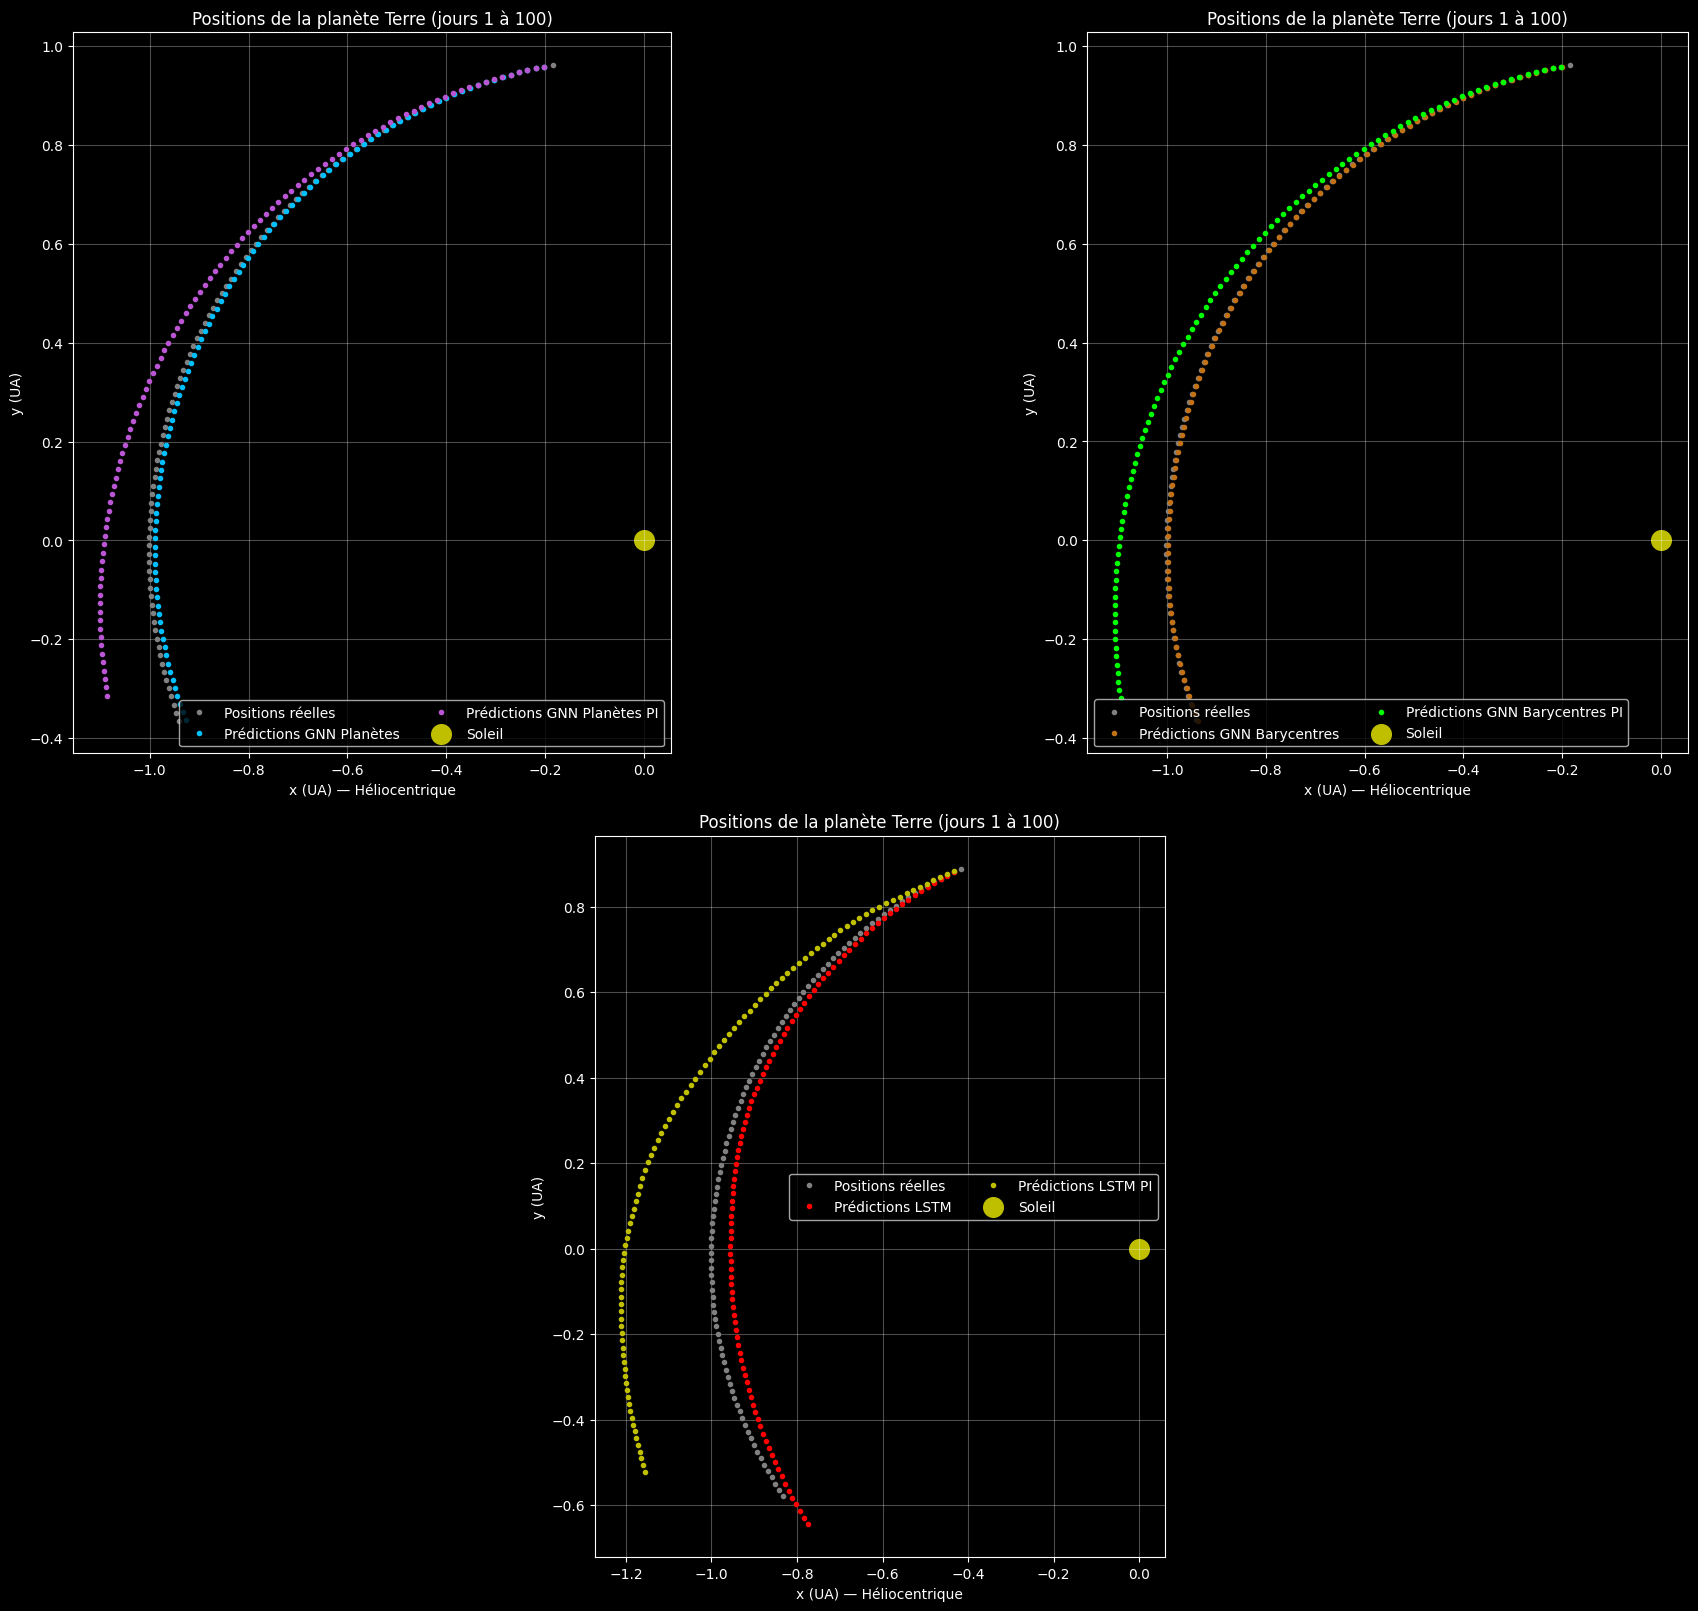

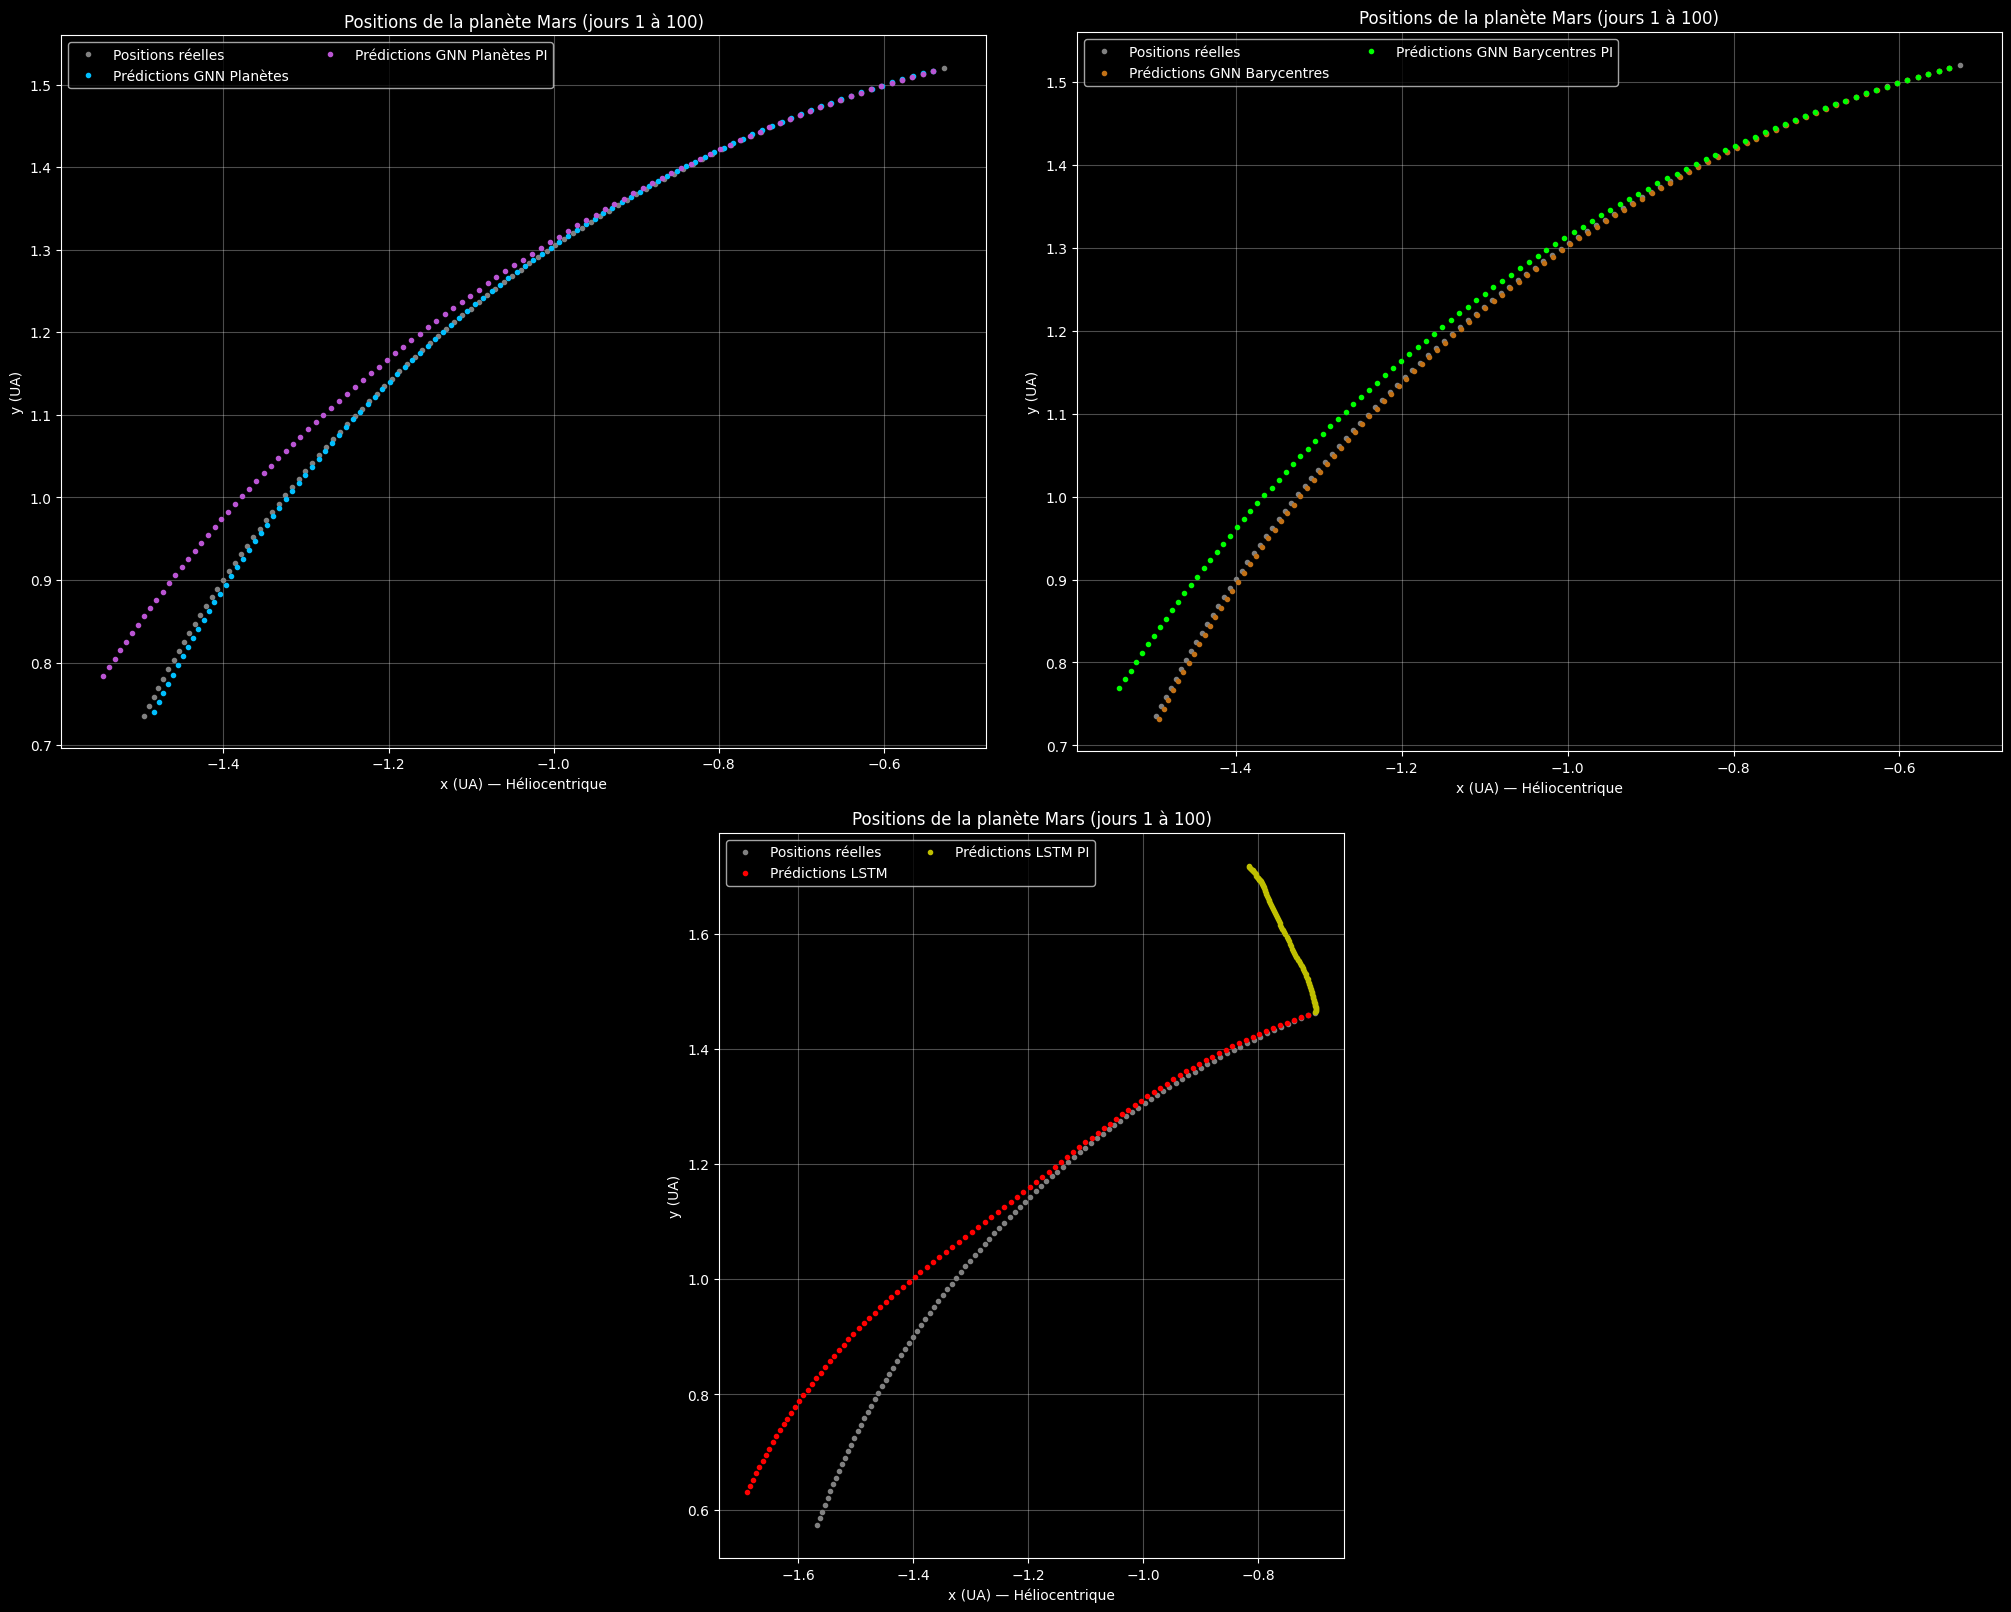

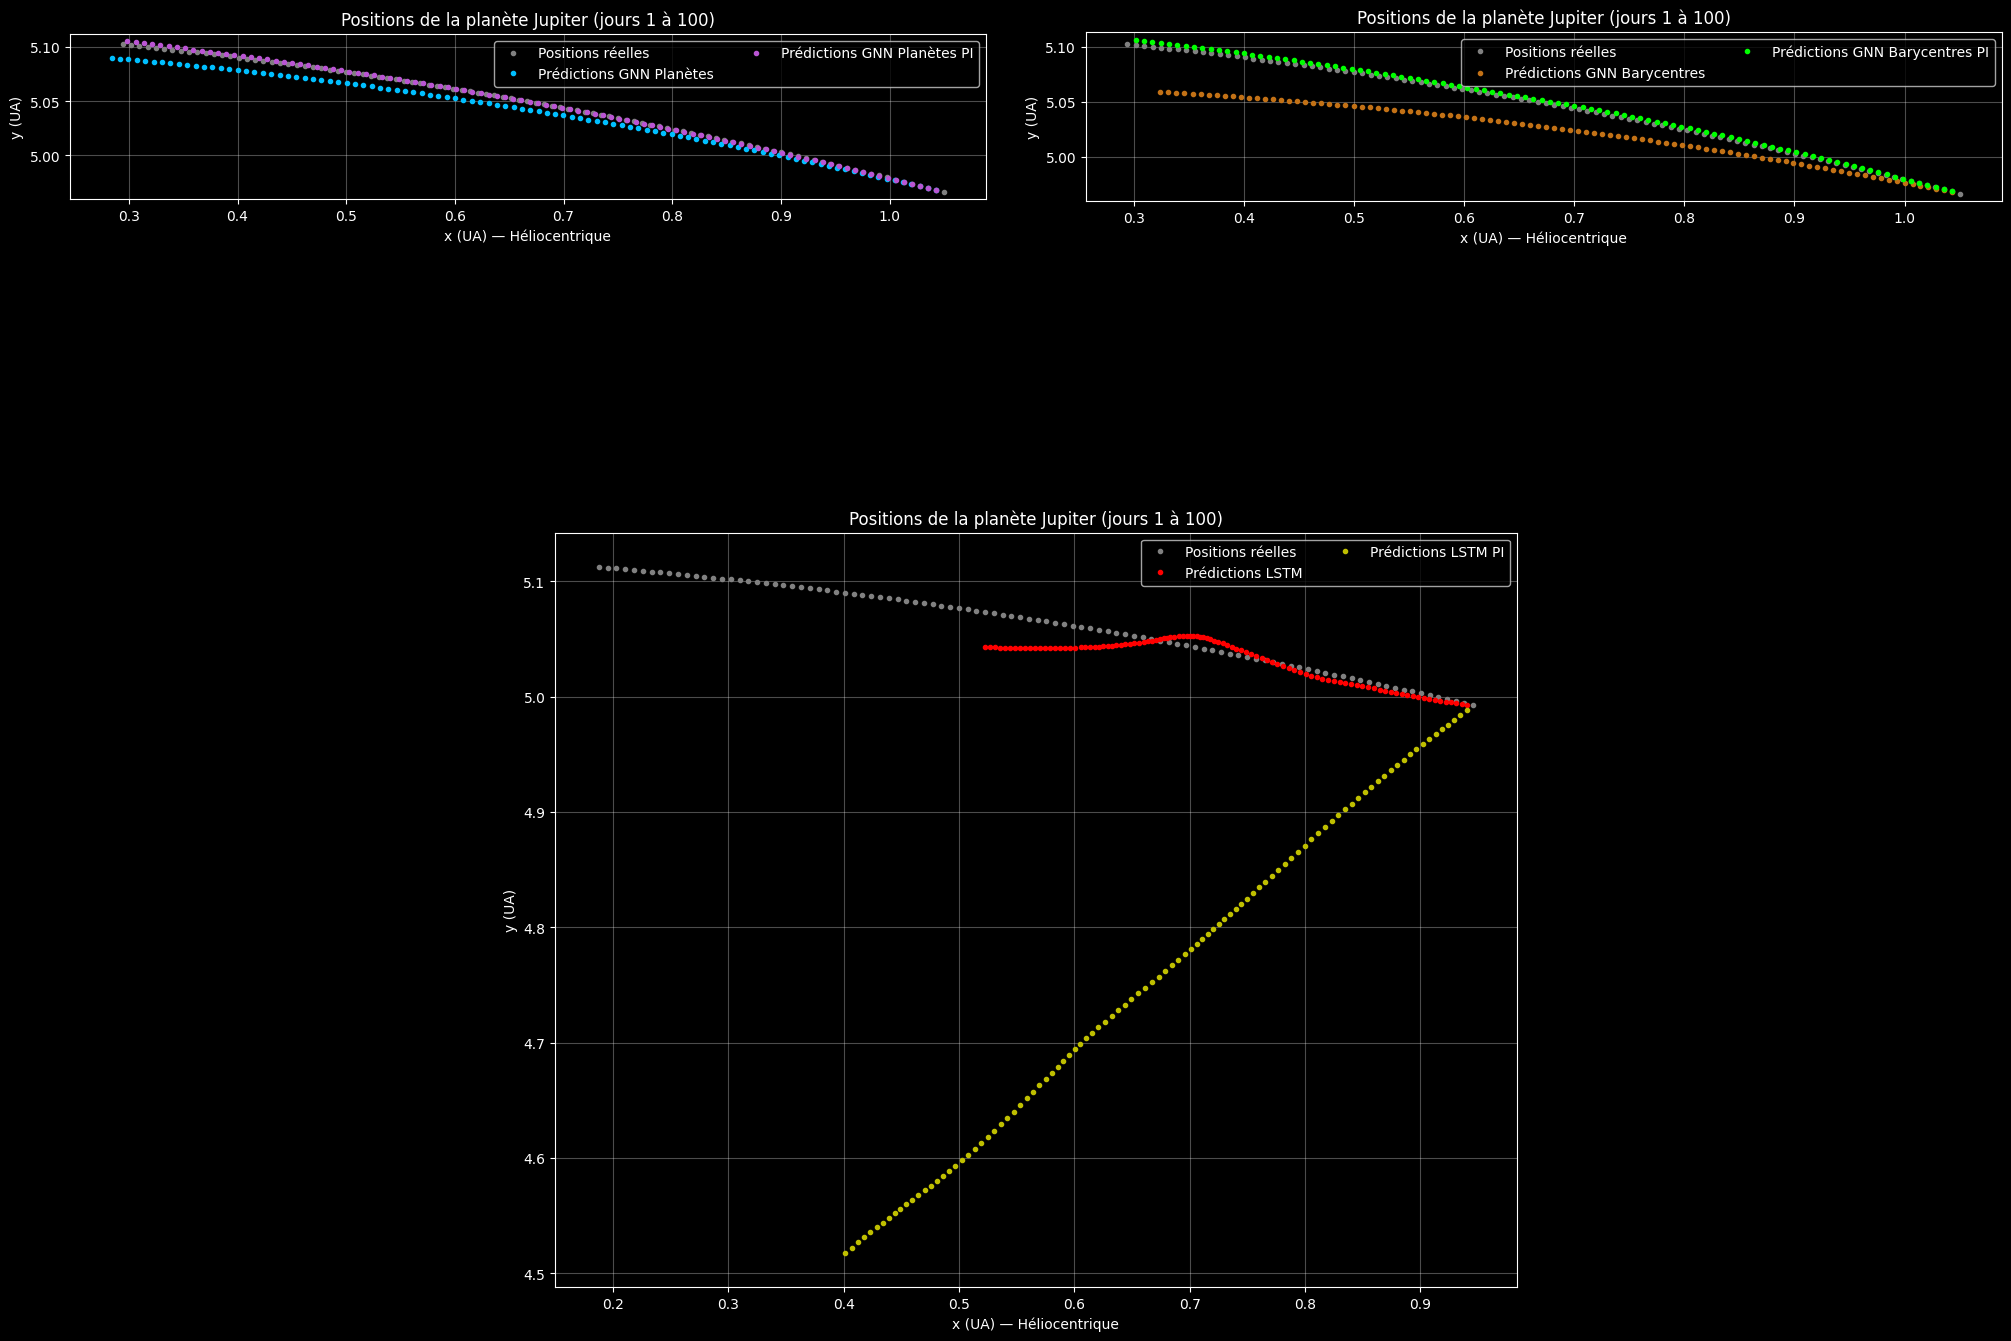

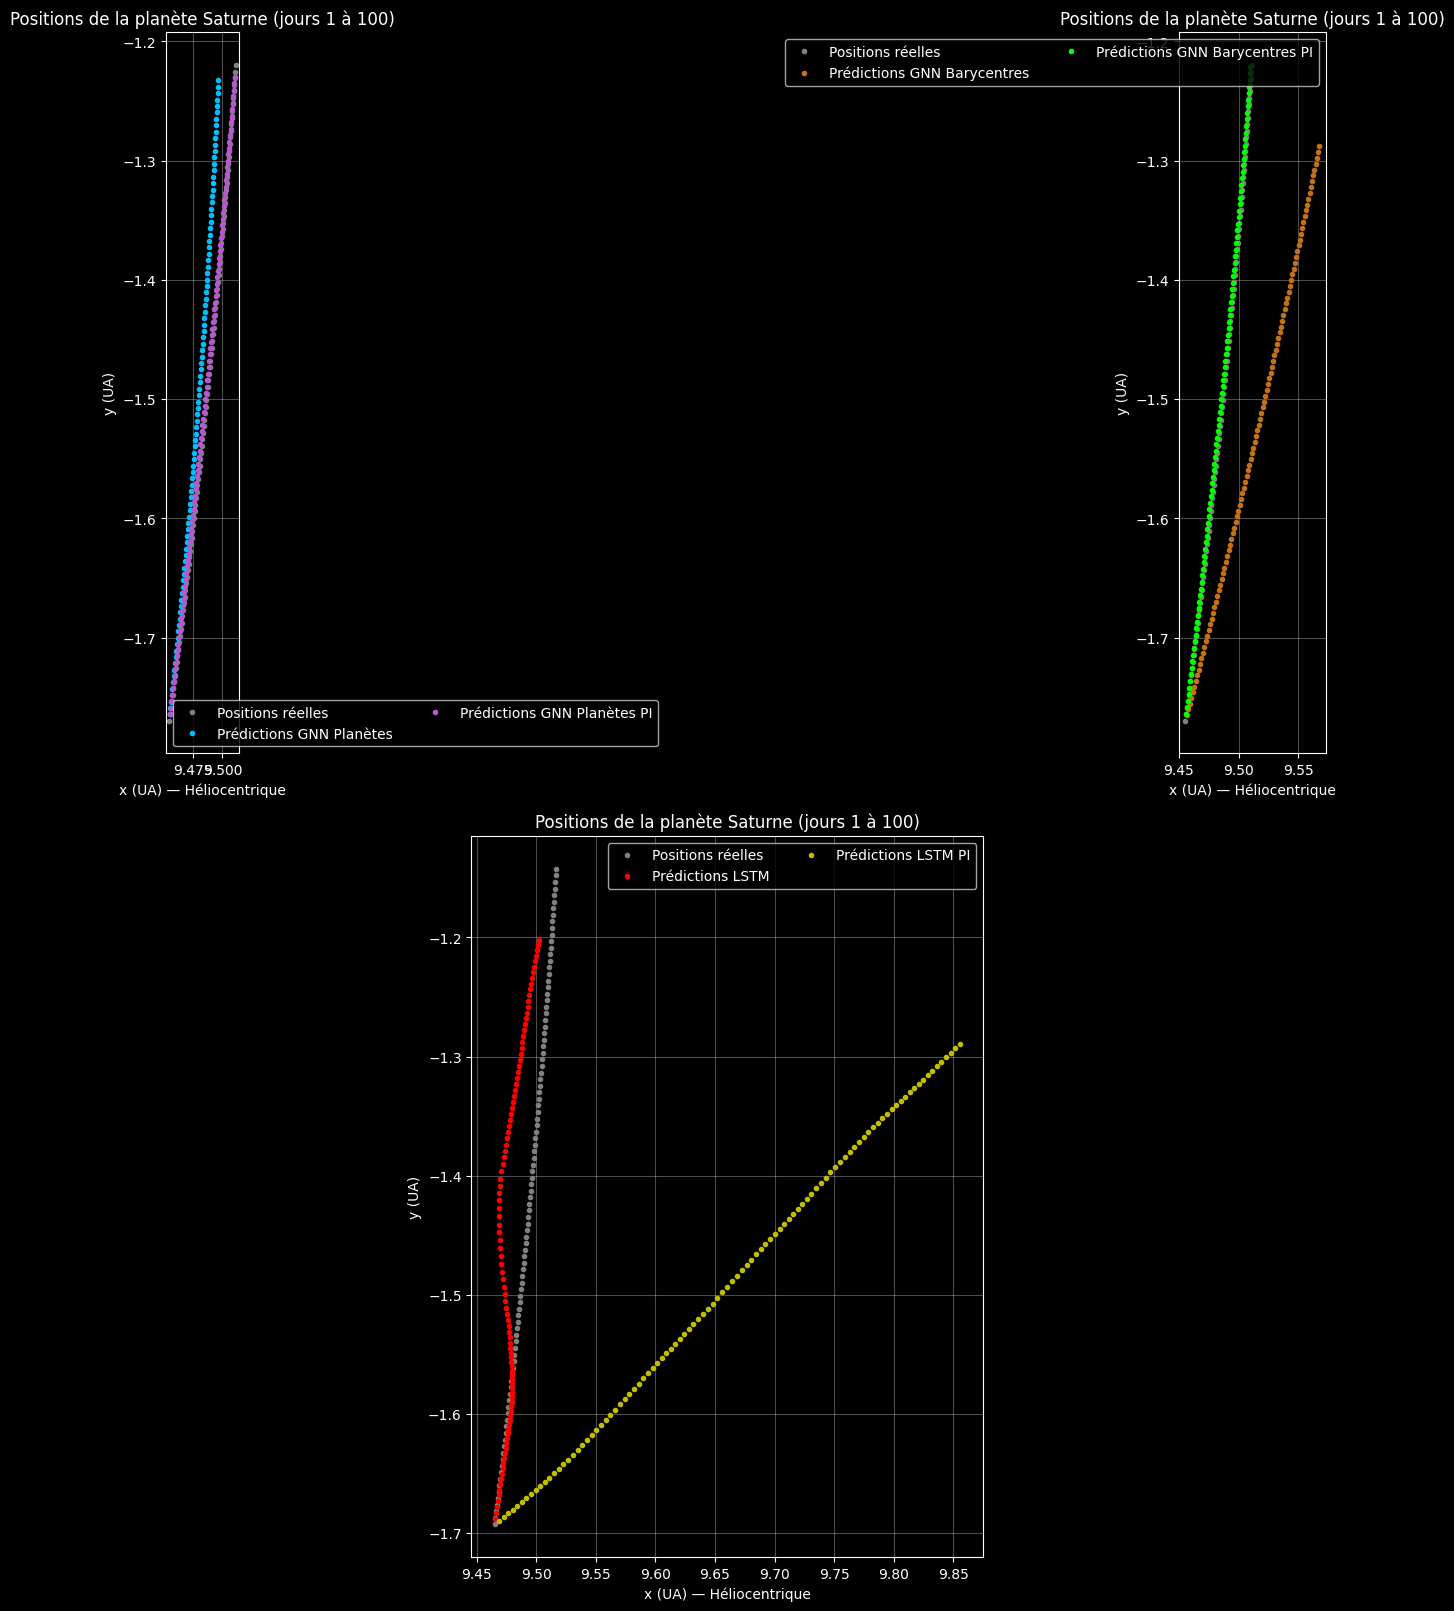

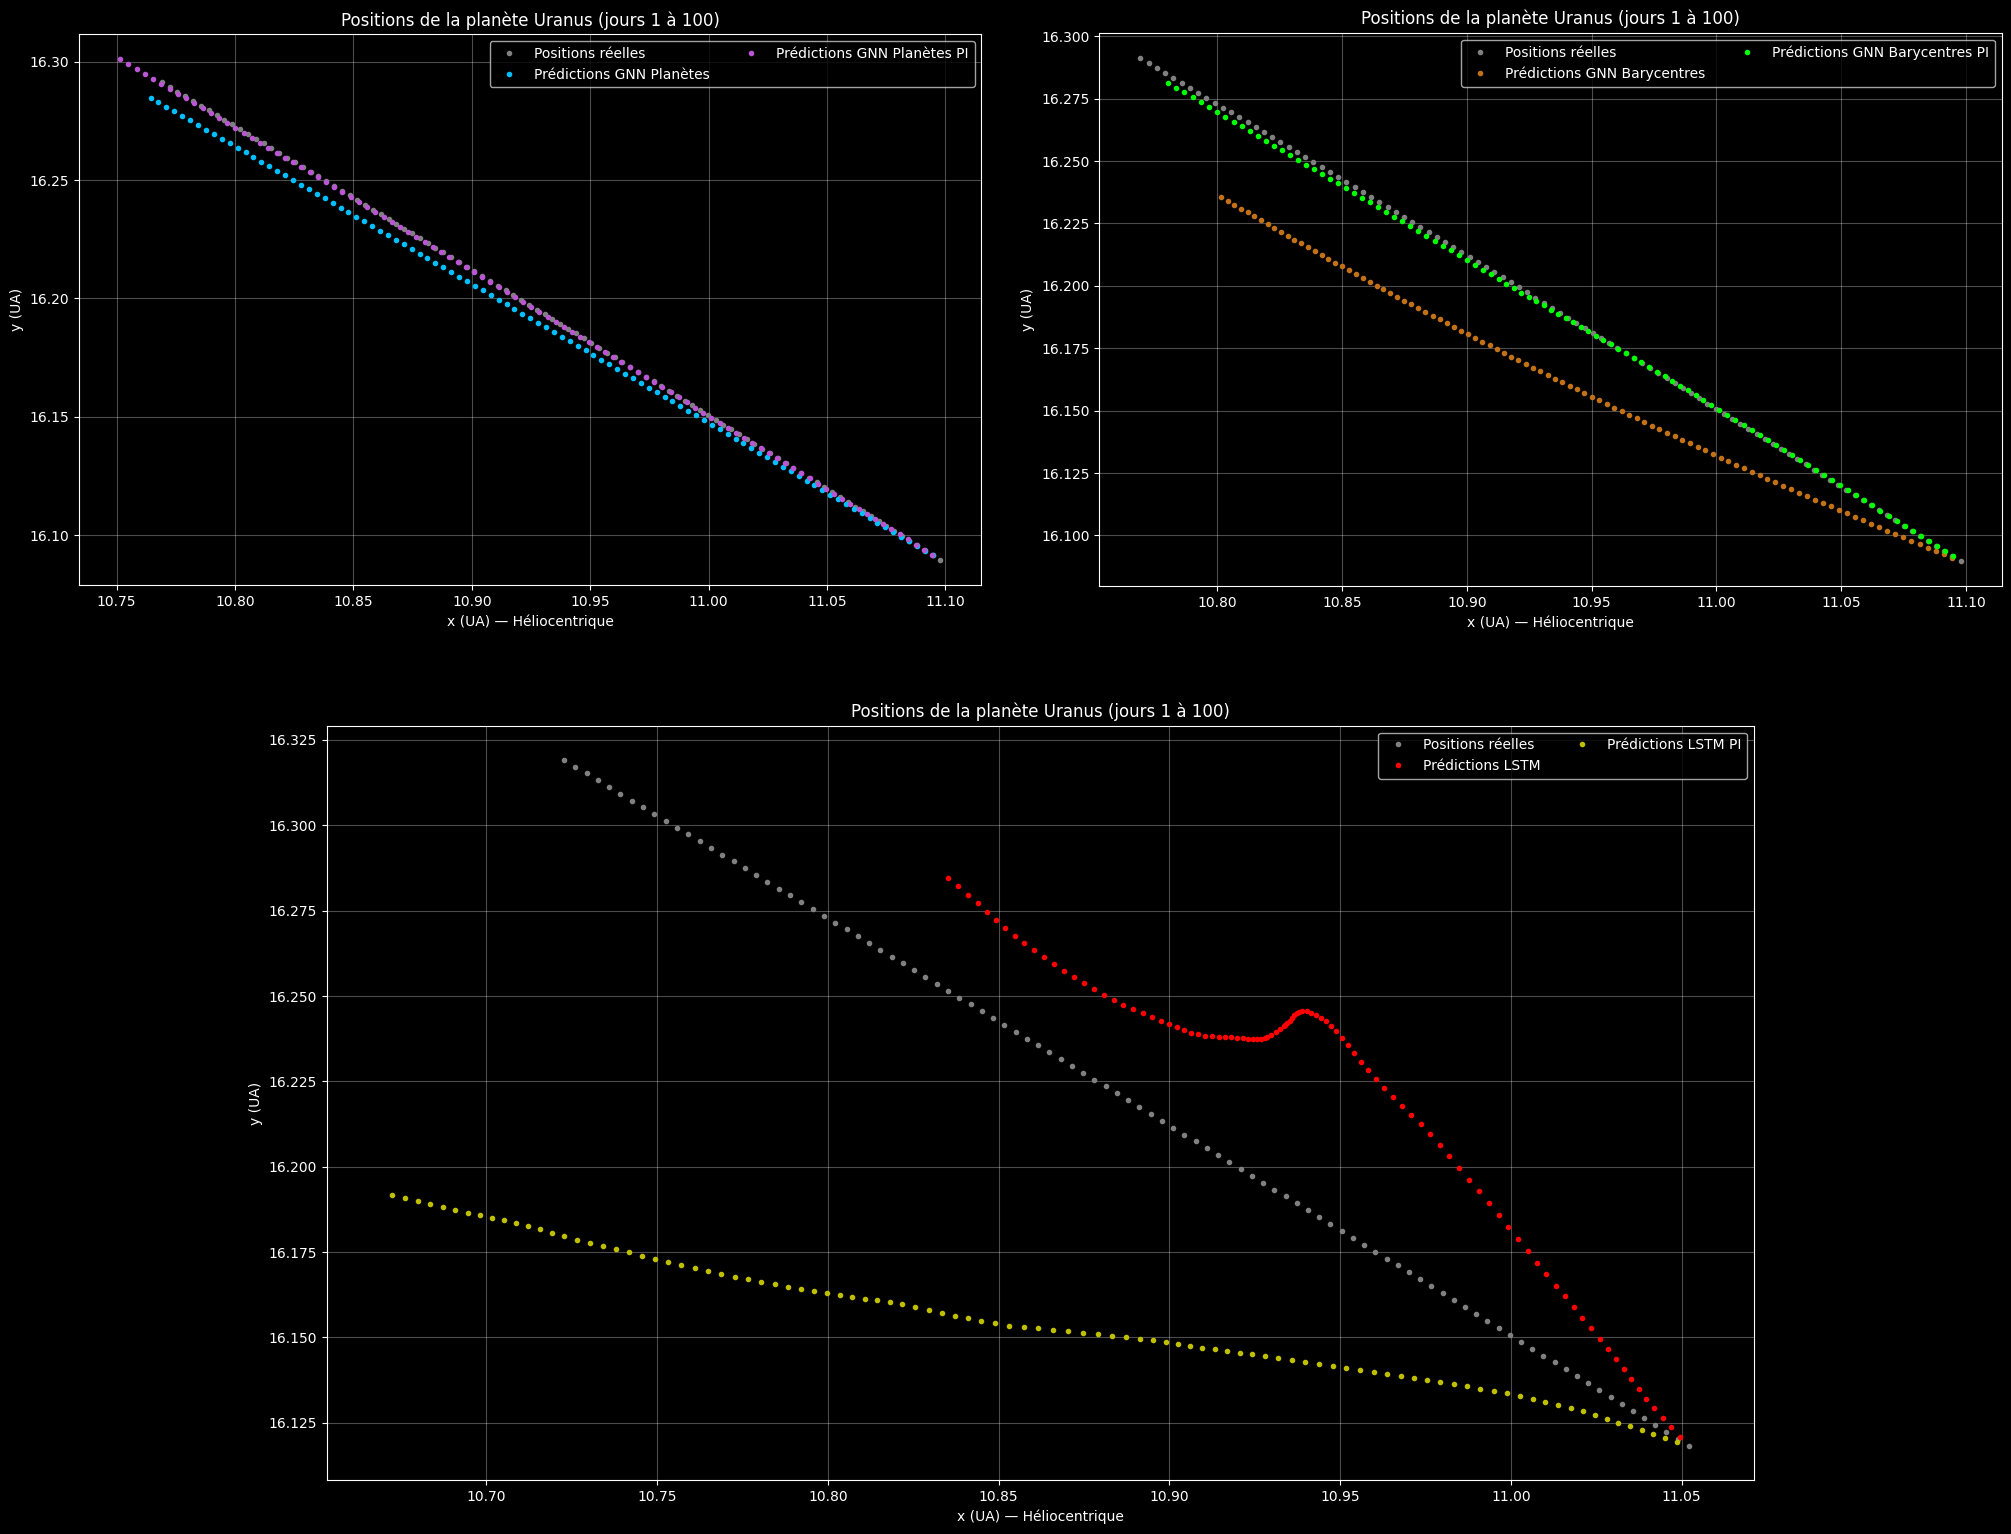

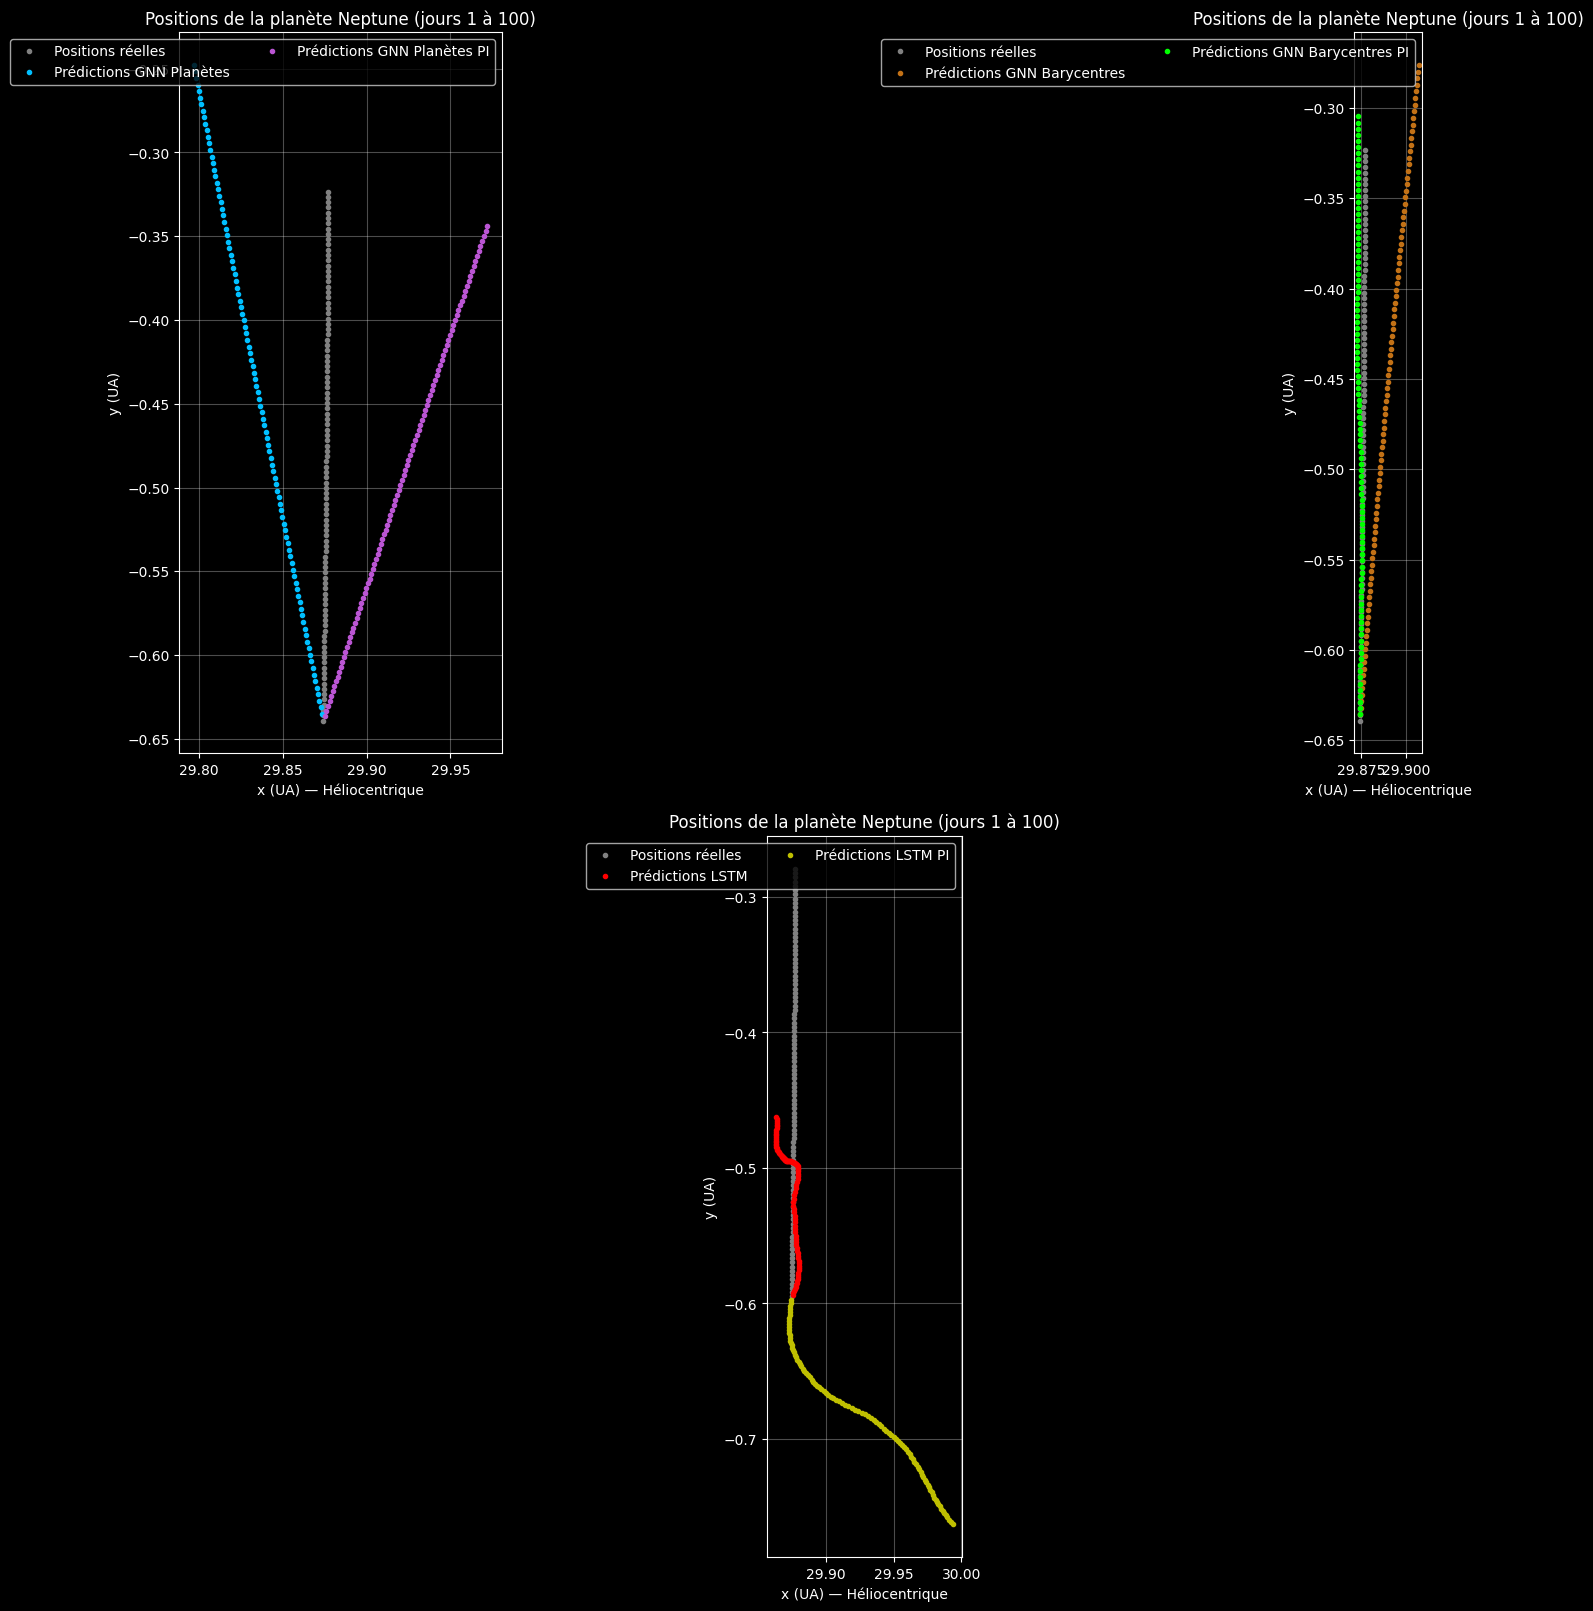

In [45]:
plot_planet_coordinates(num_days=100)

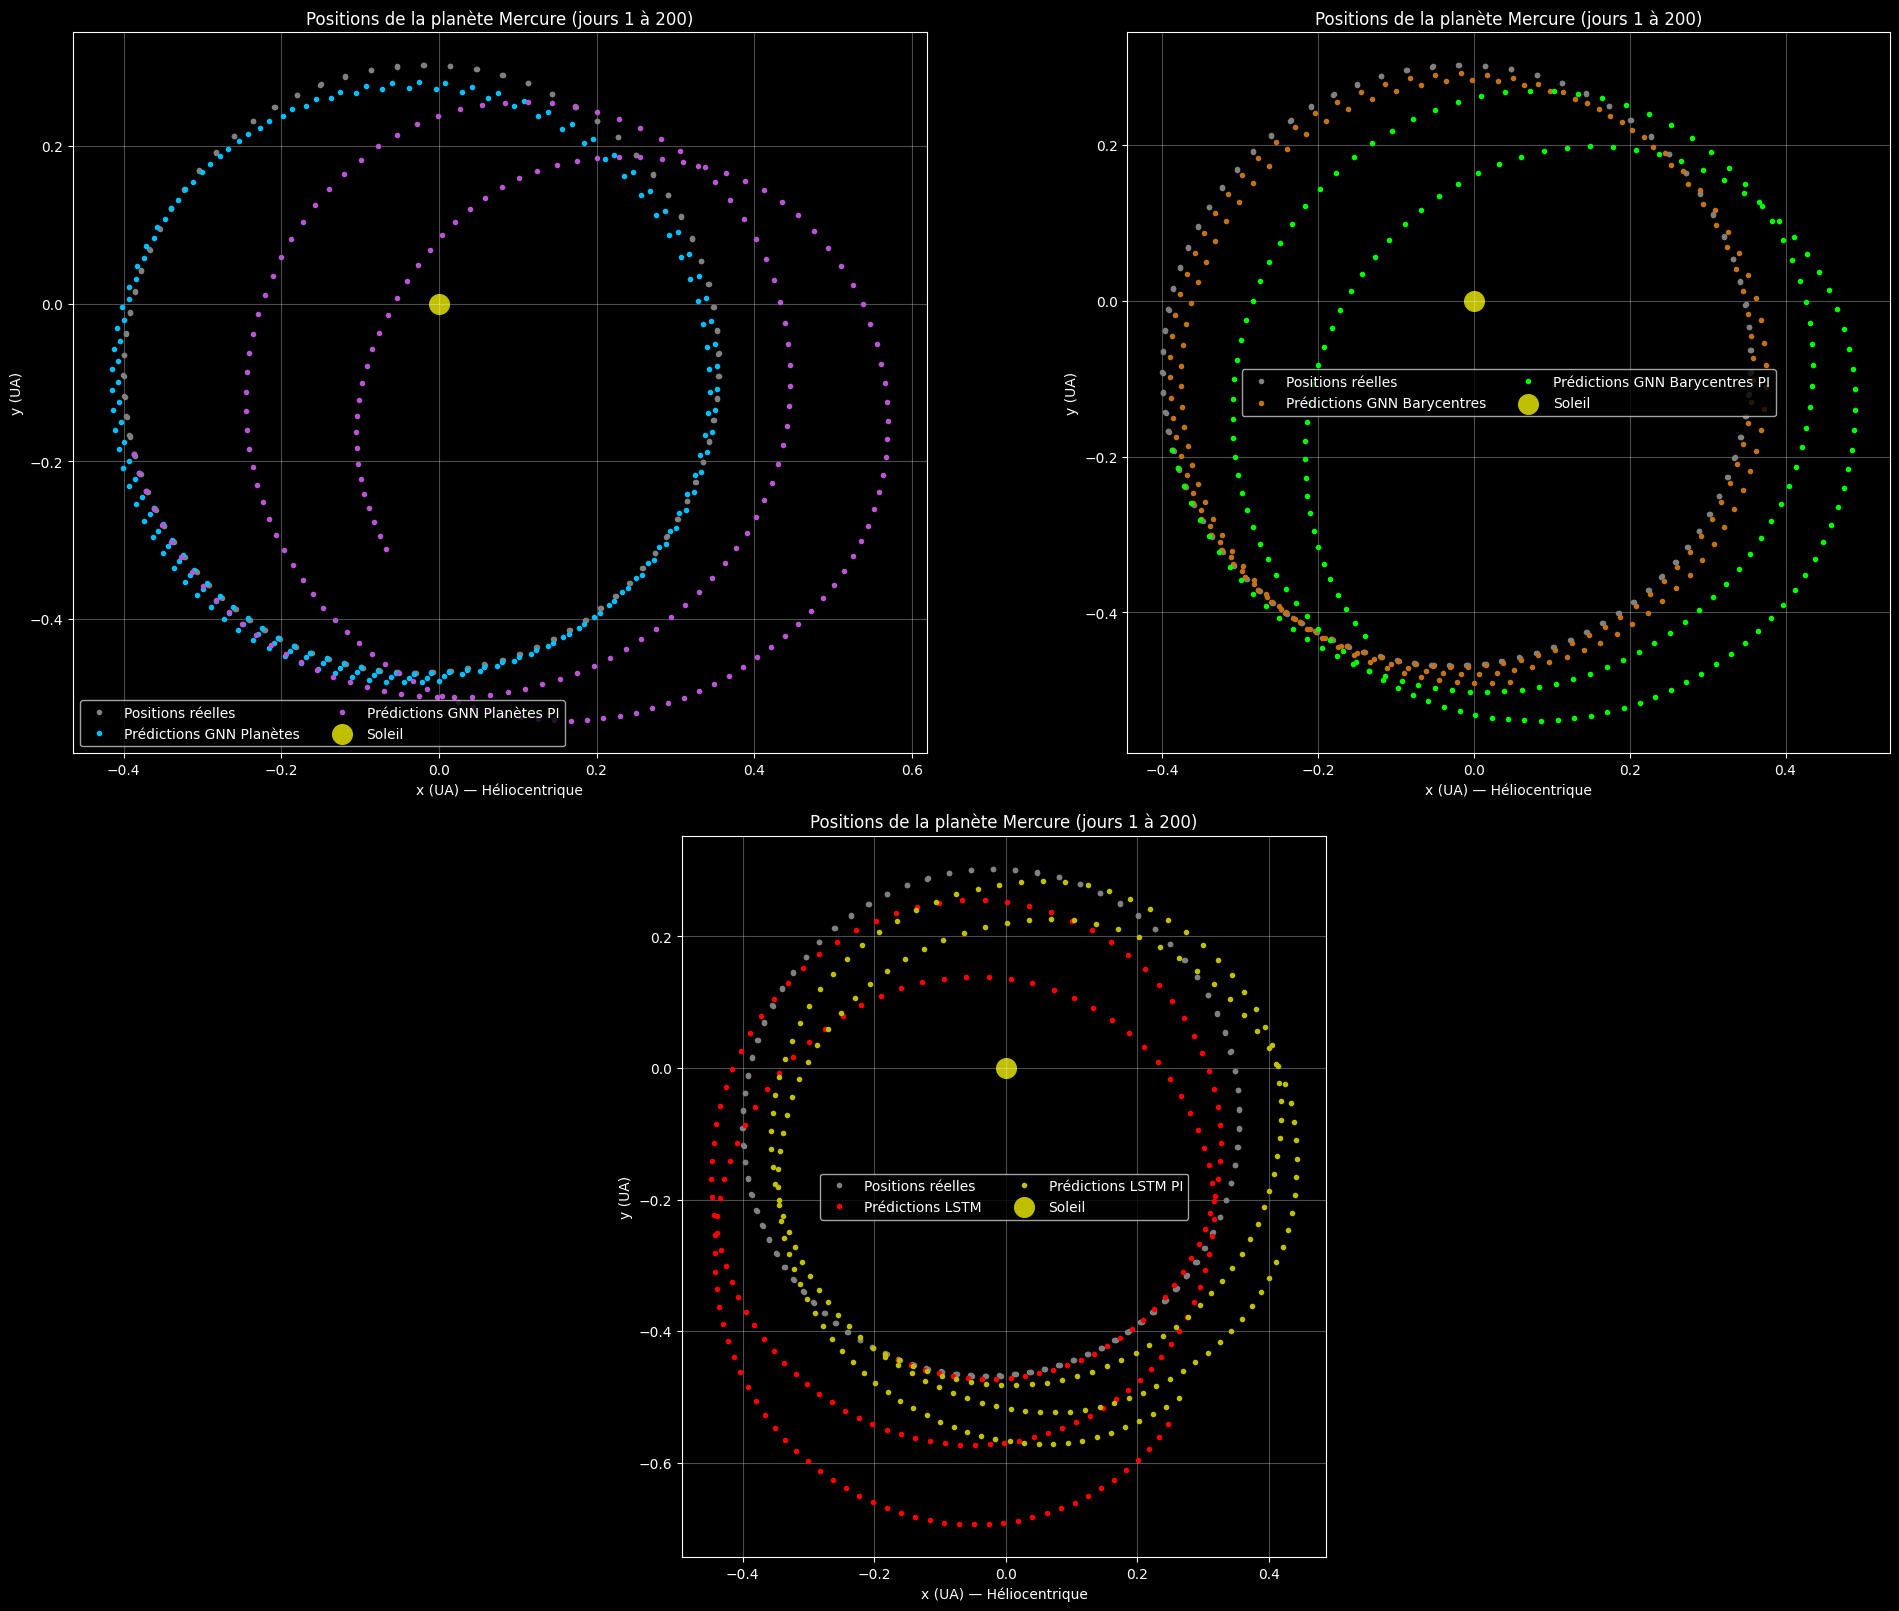

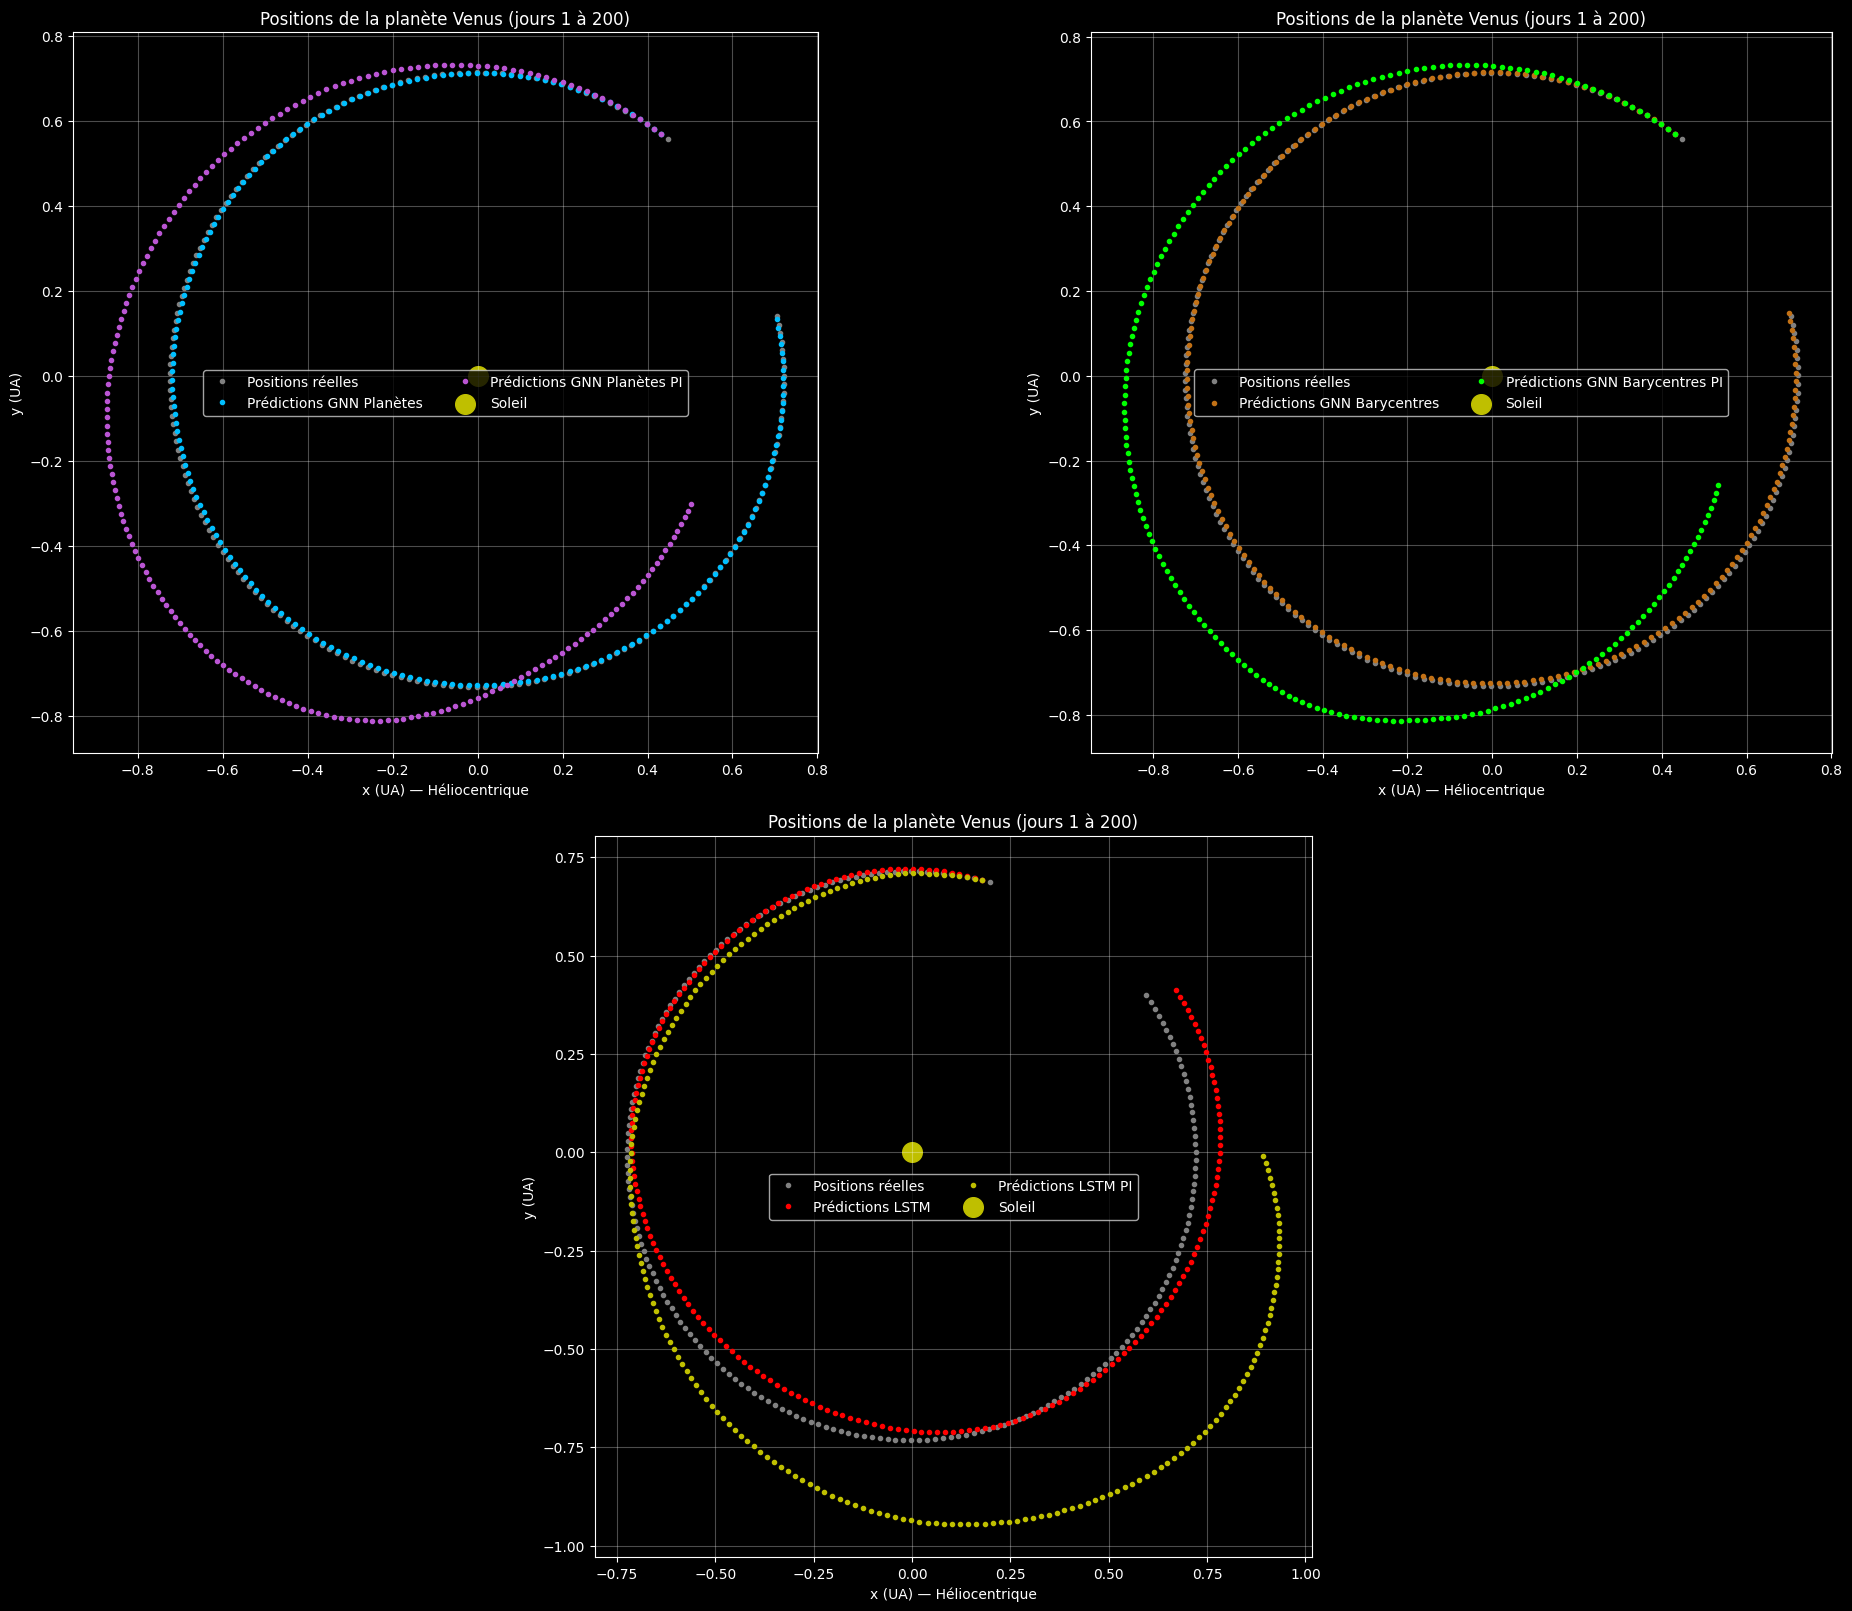

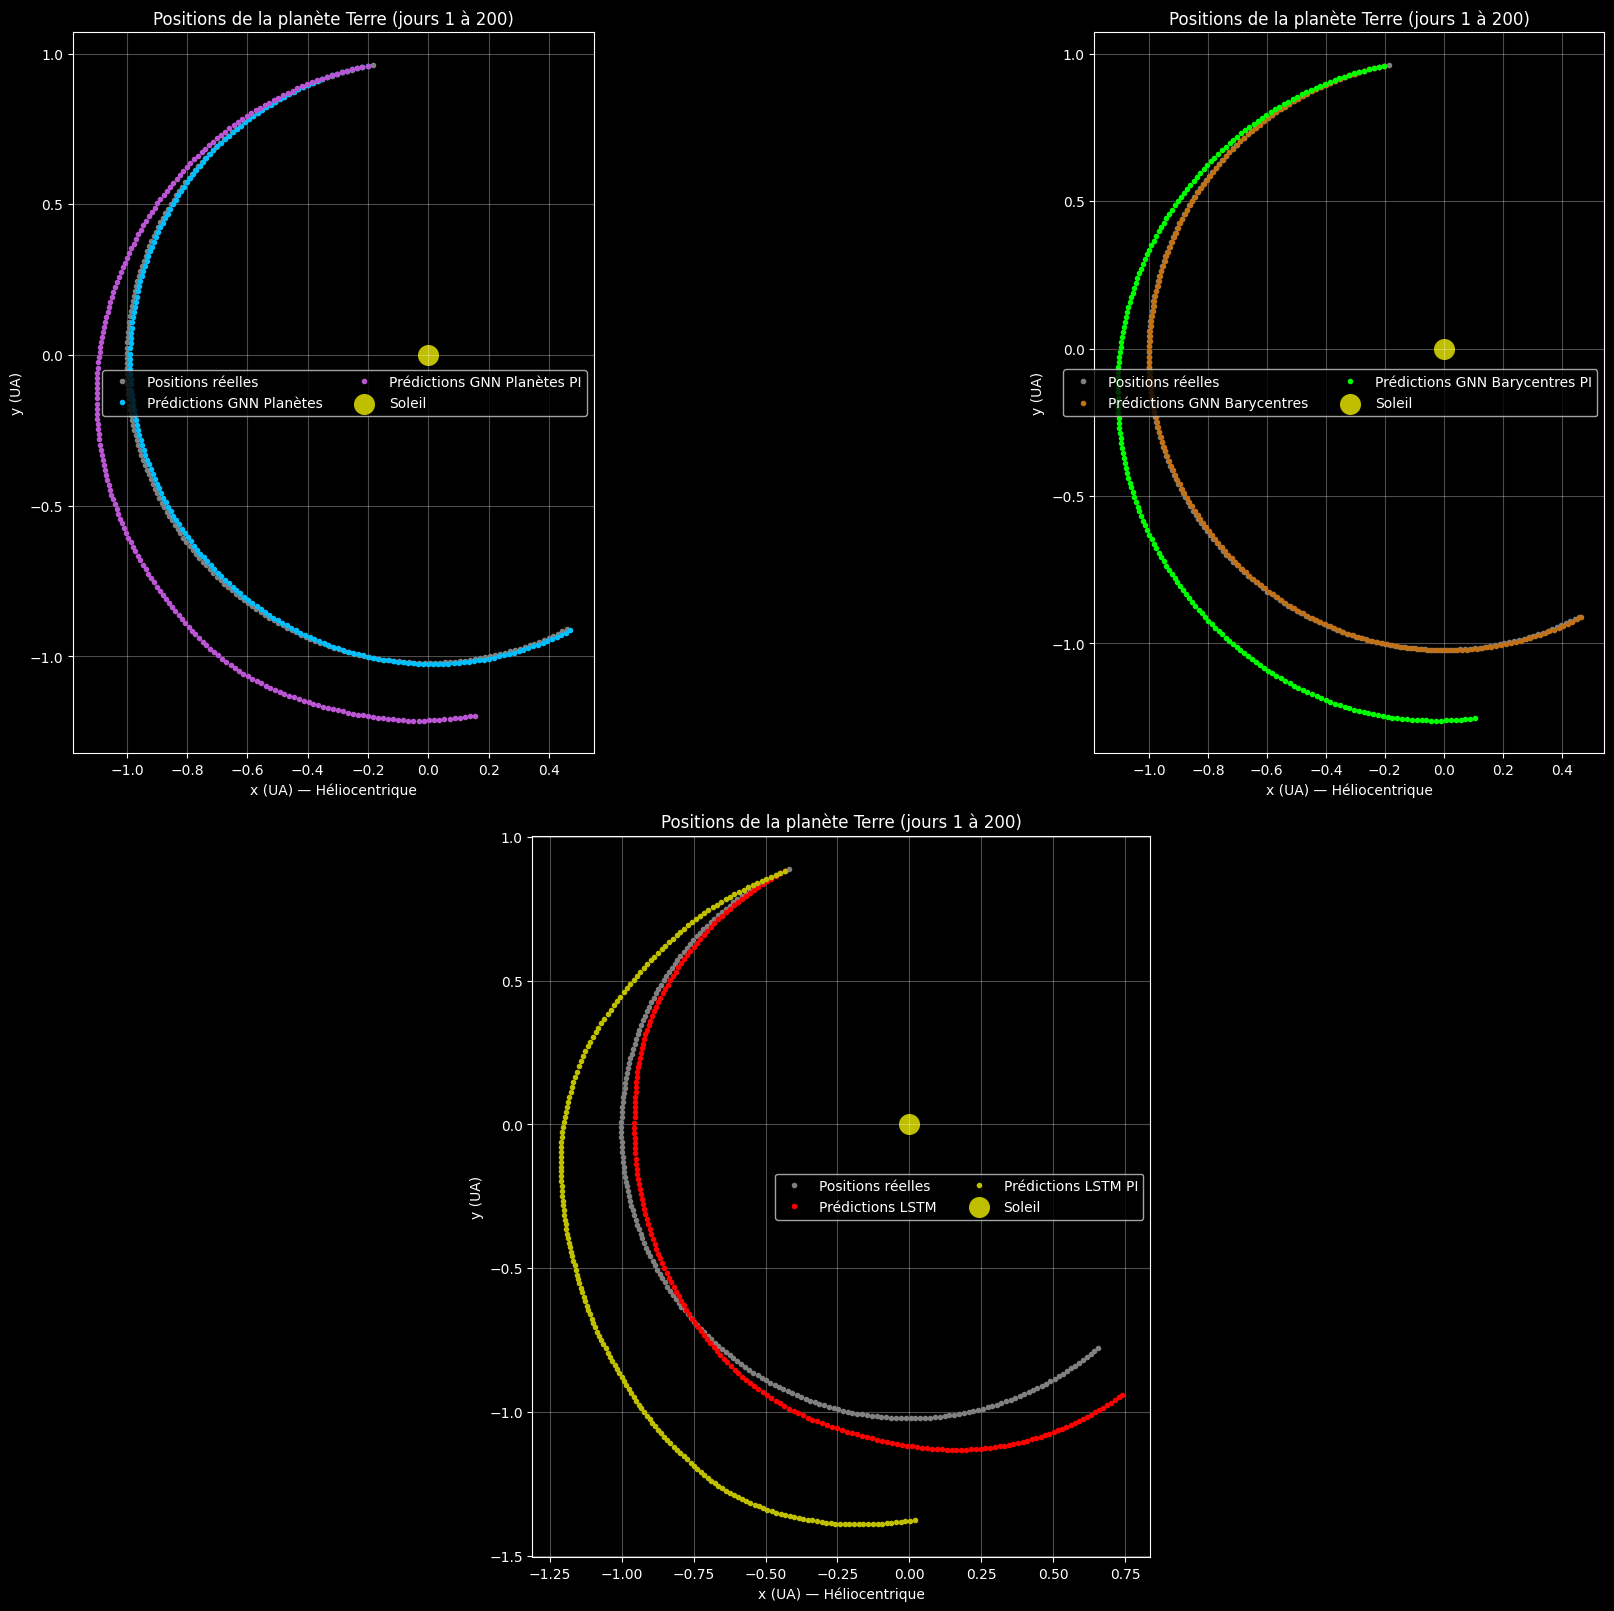

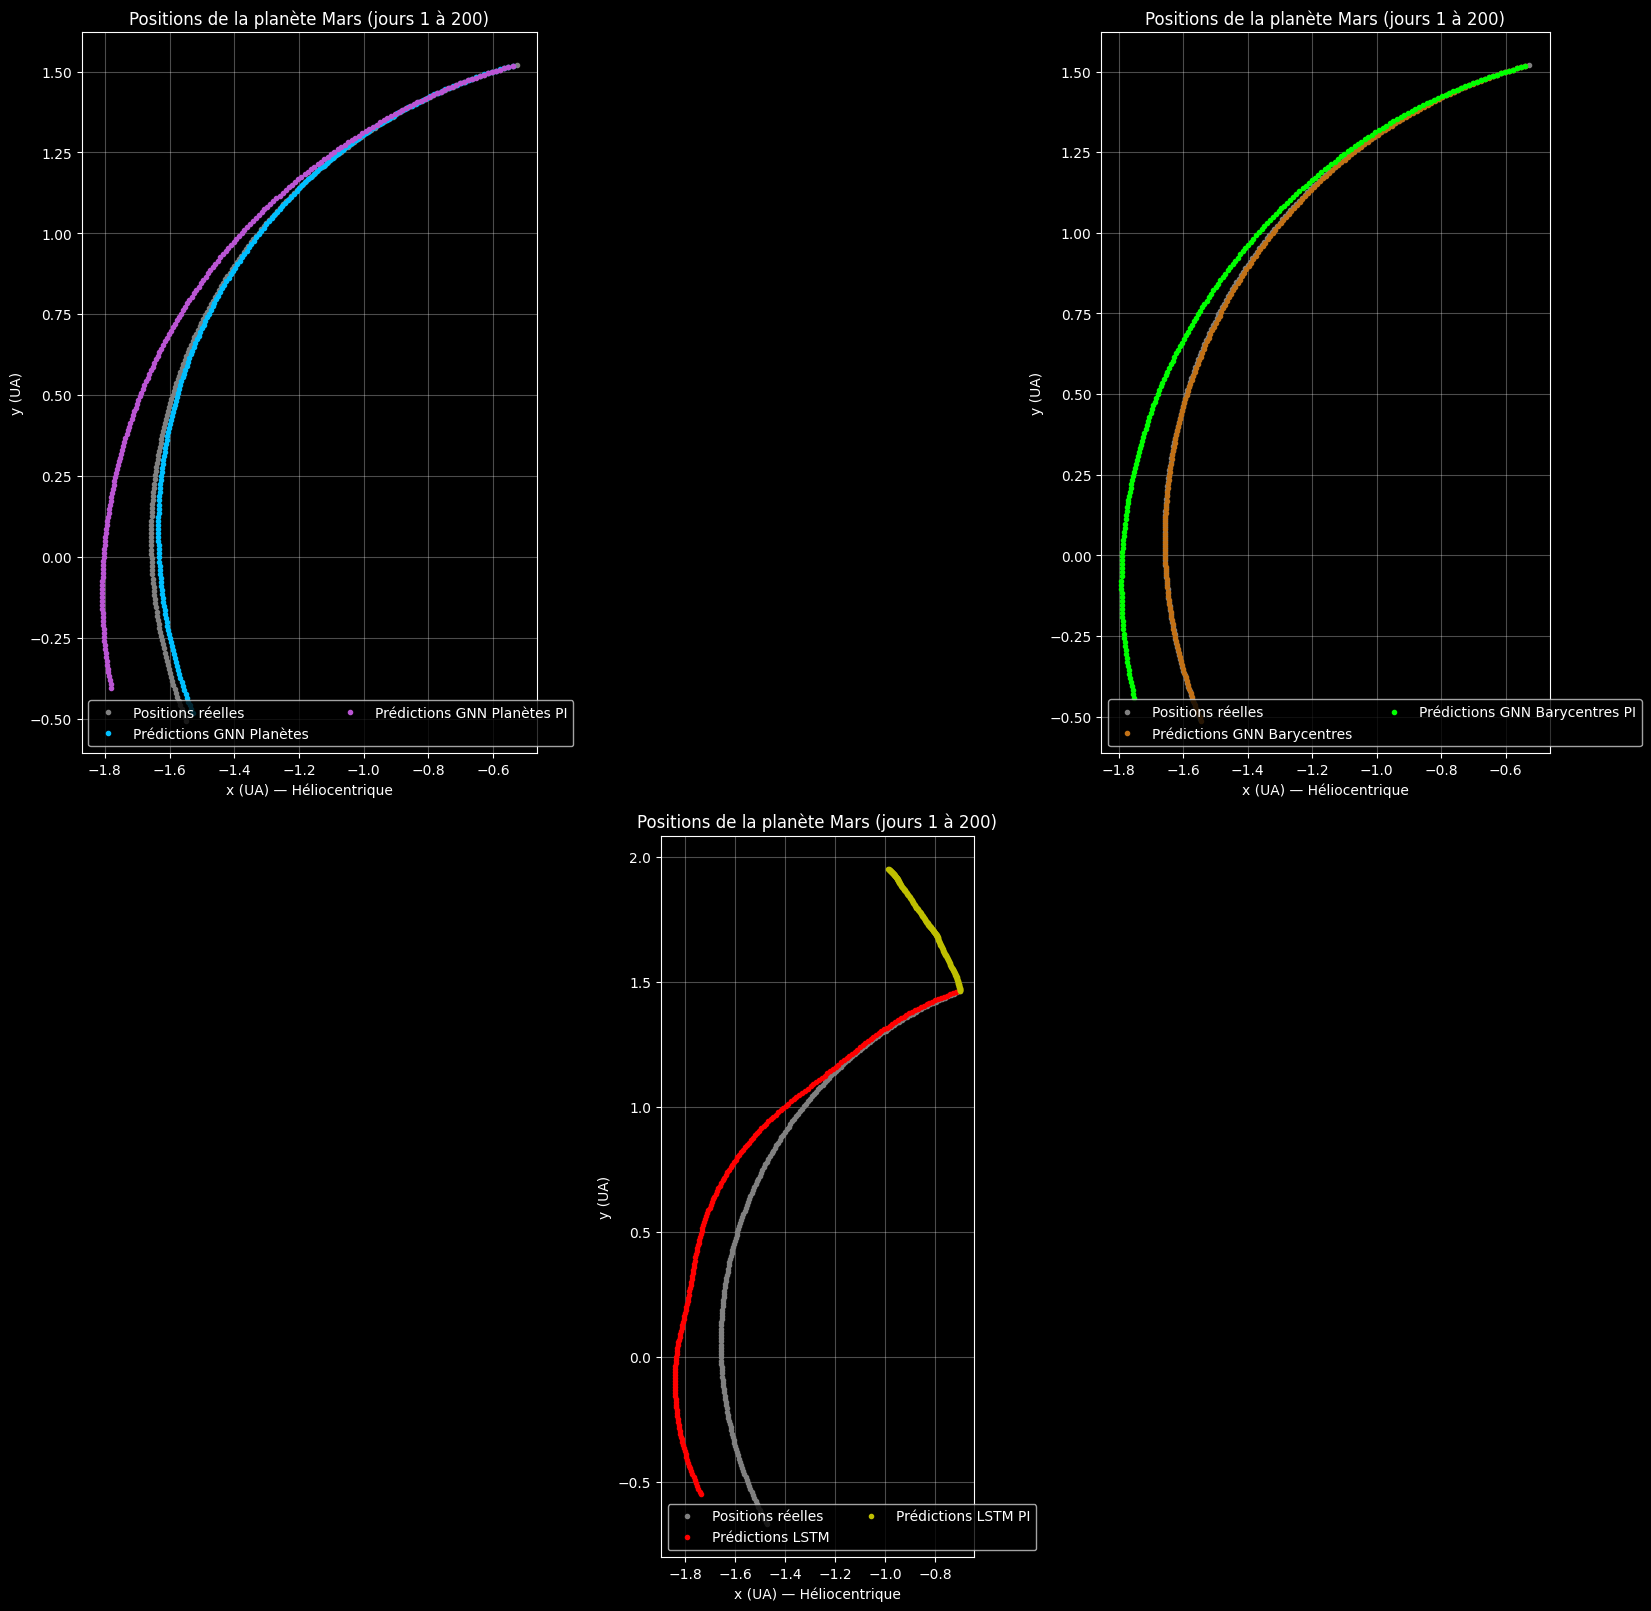

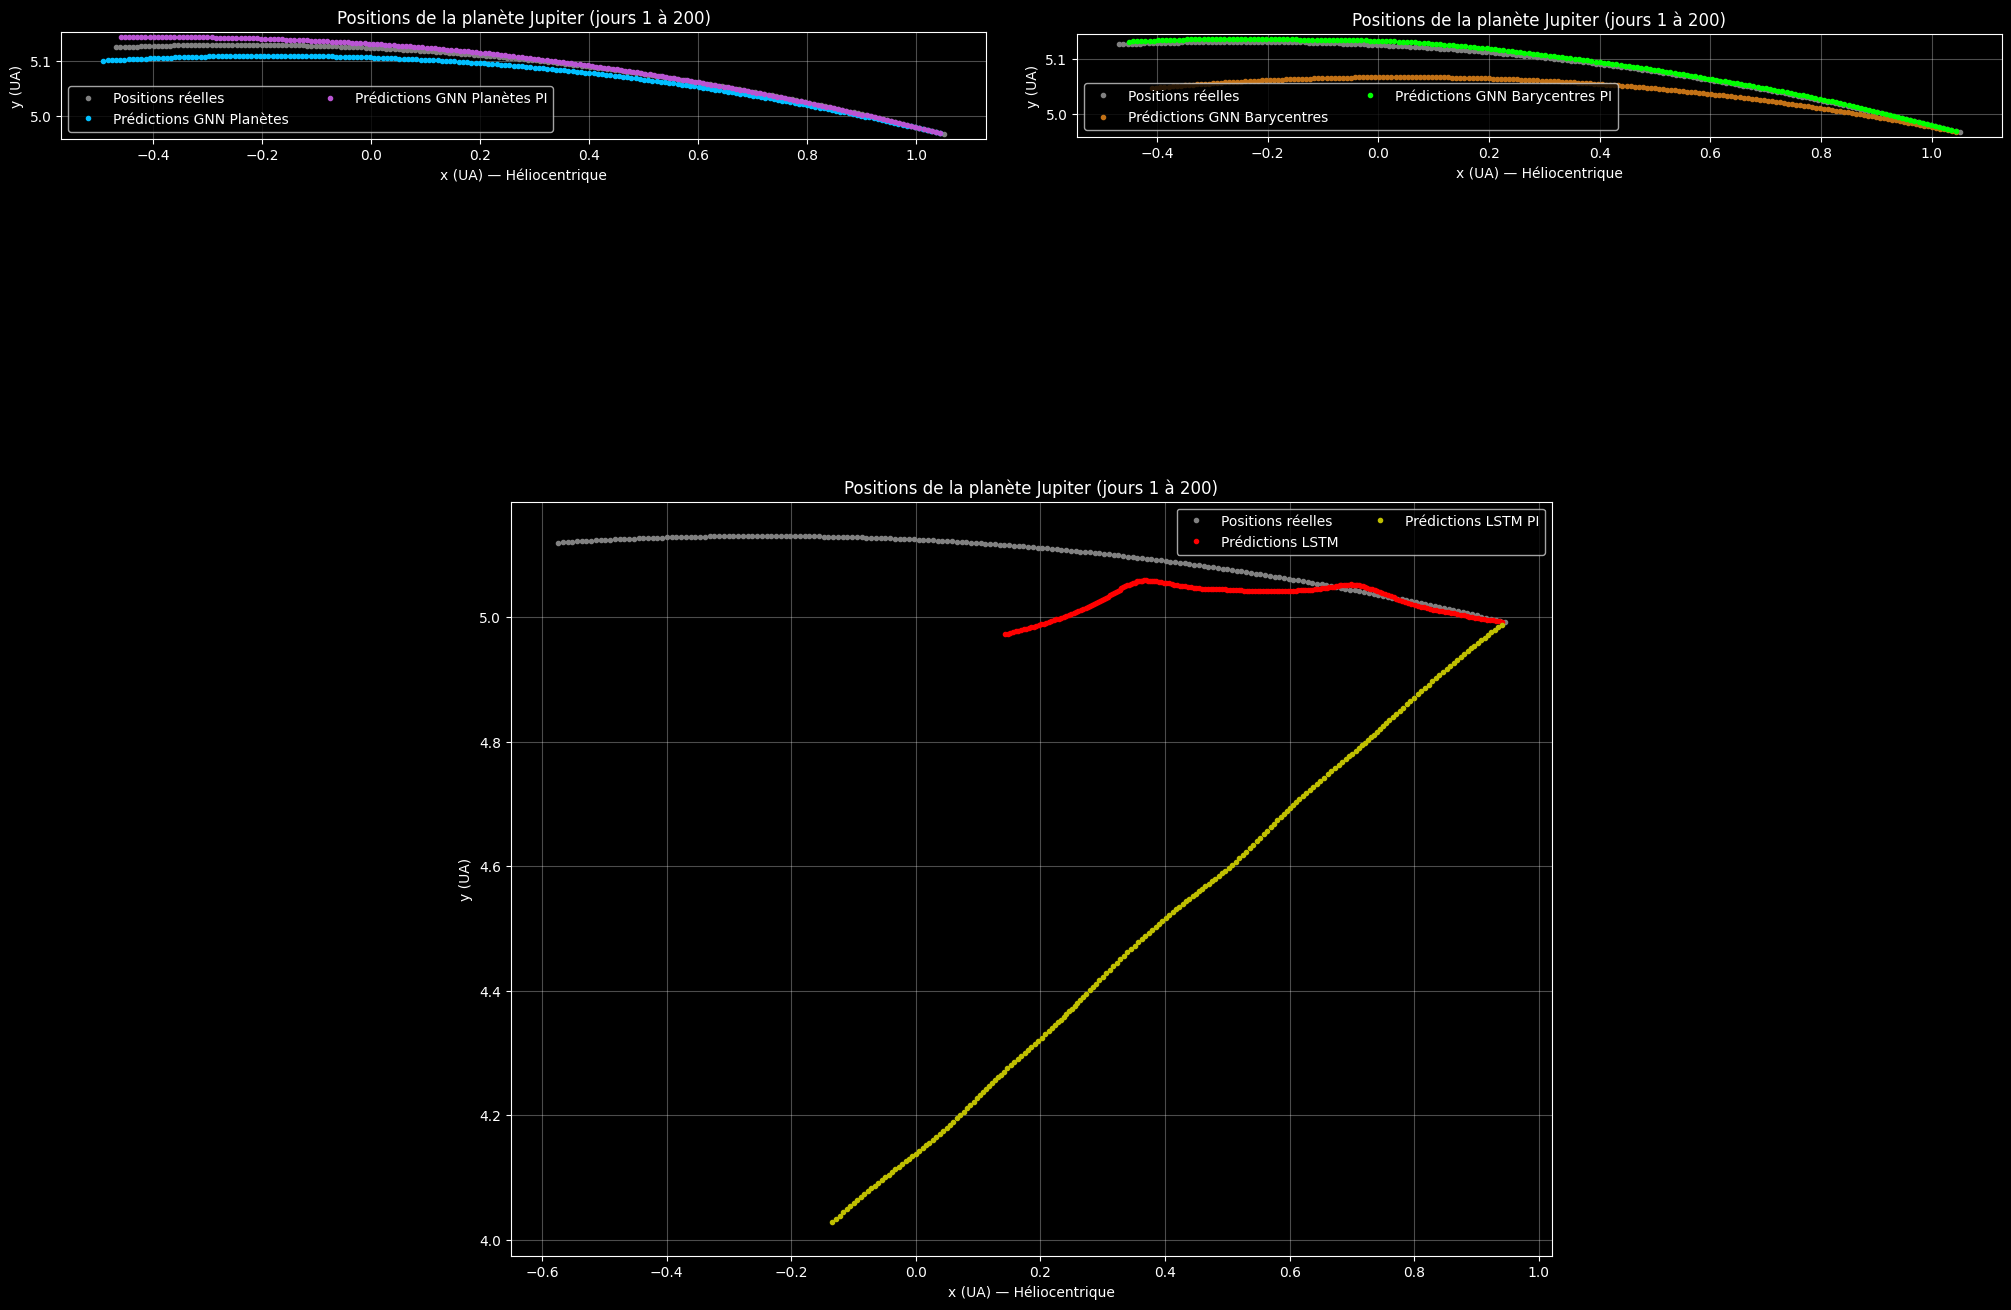

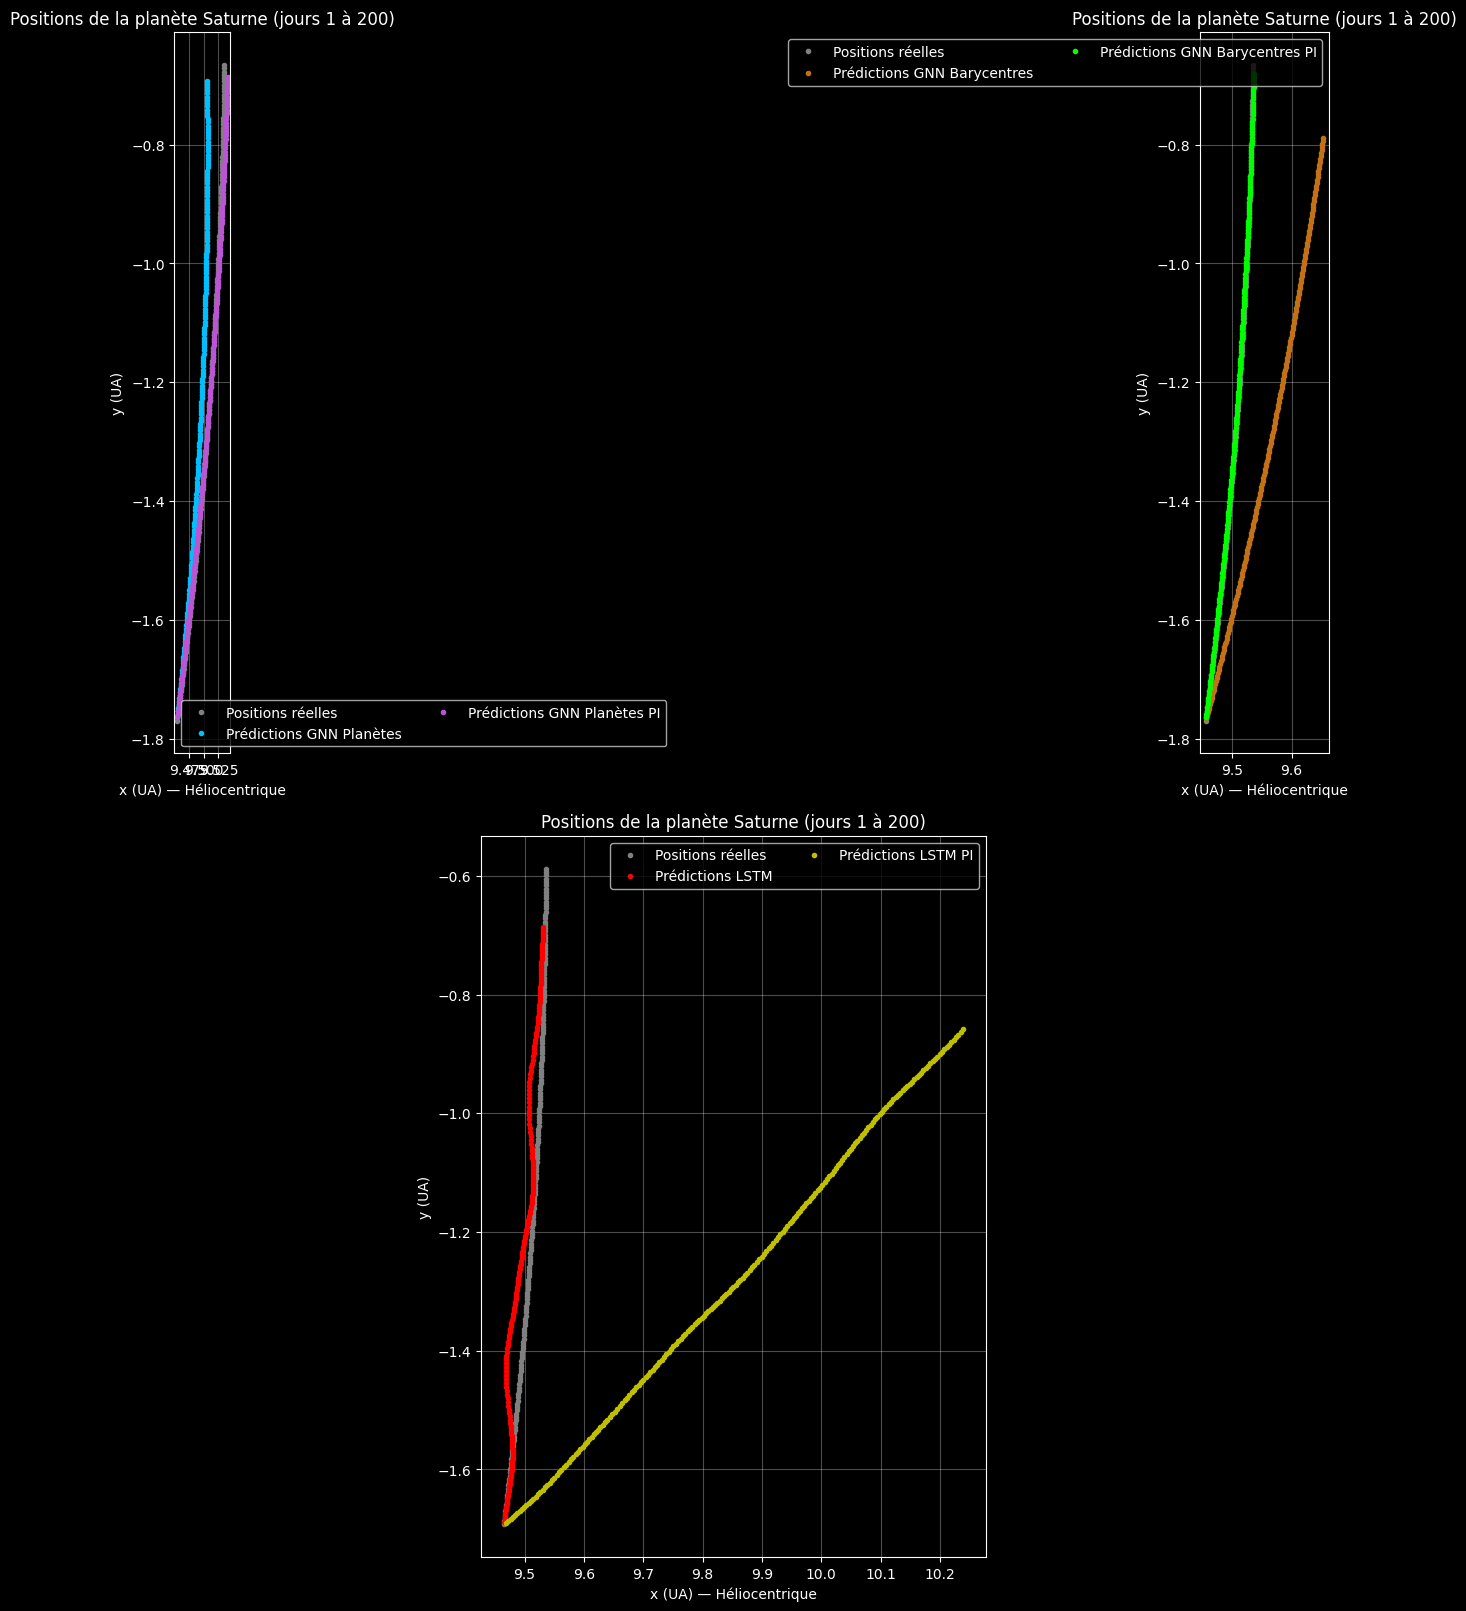

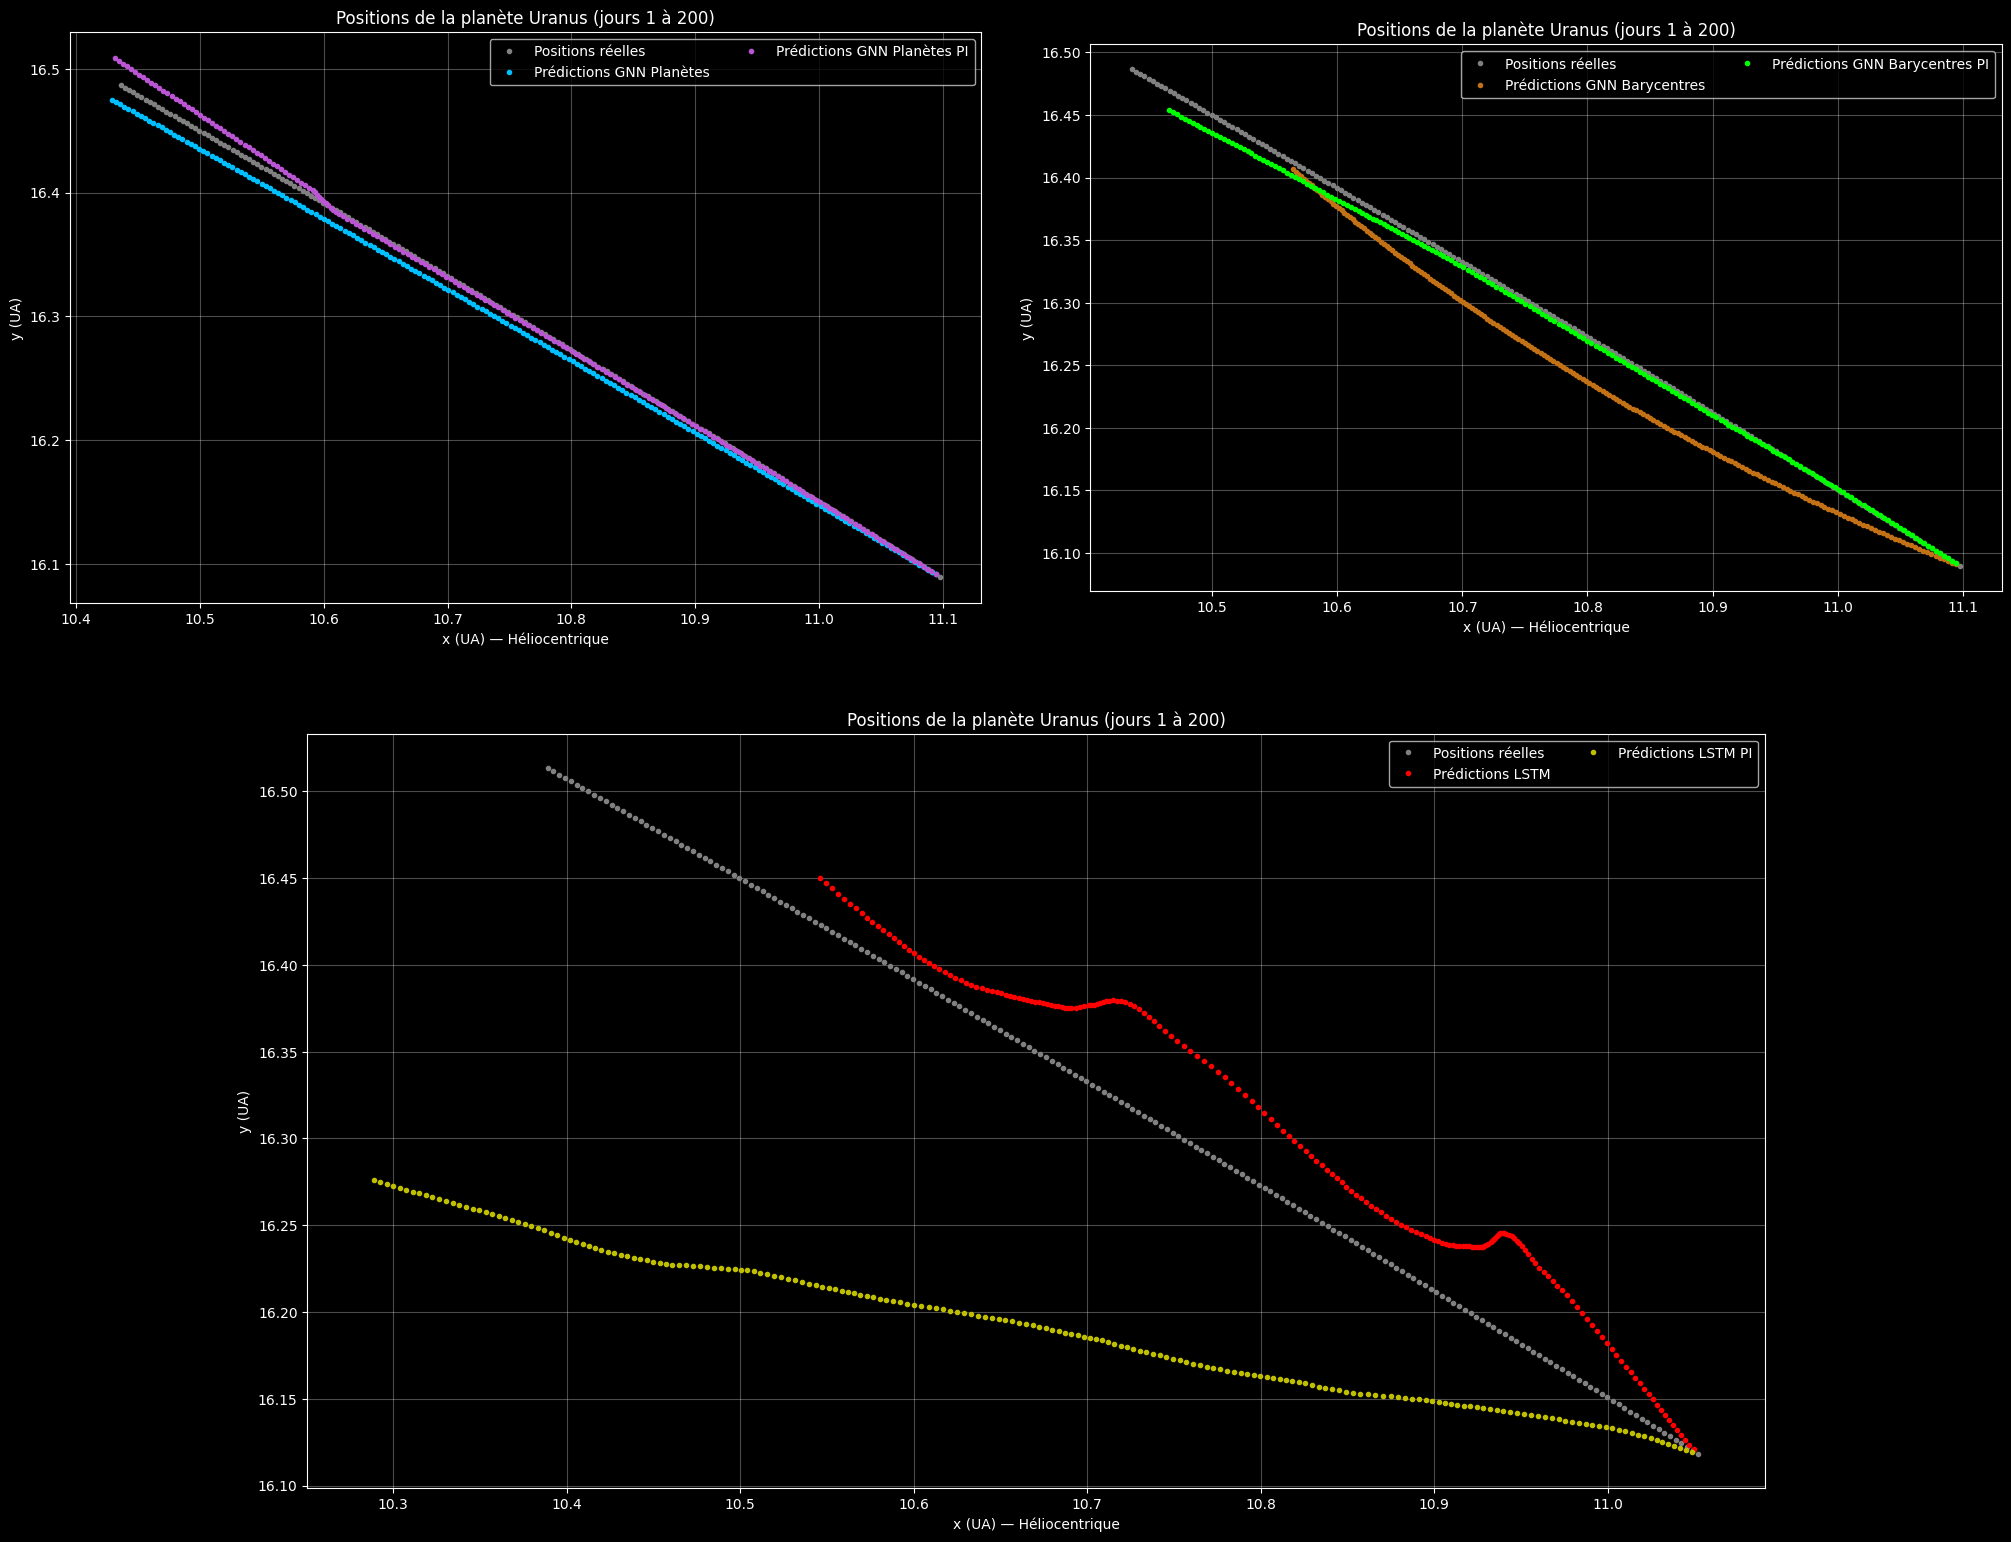

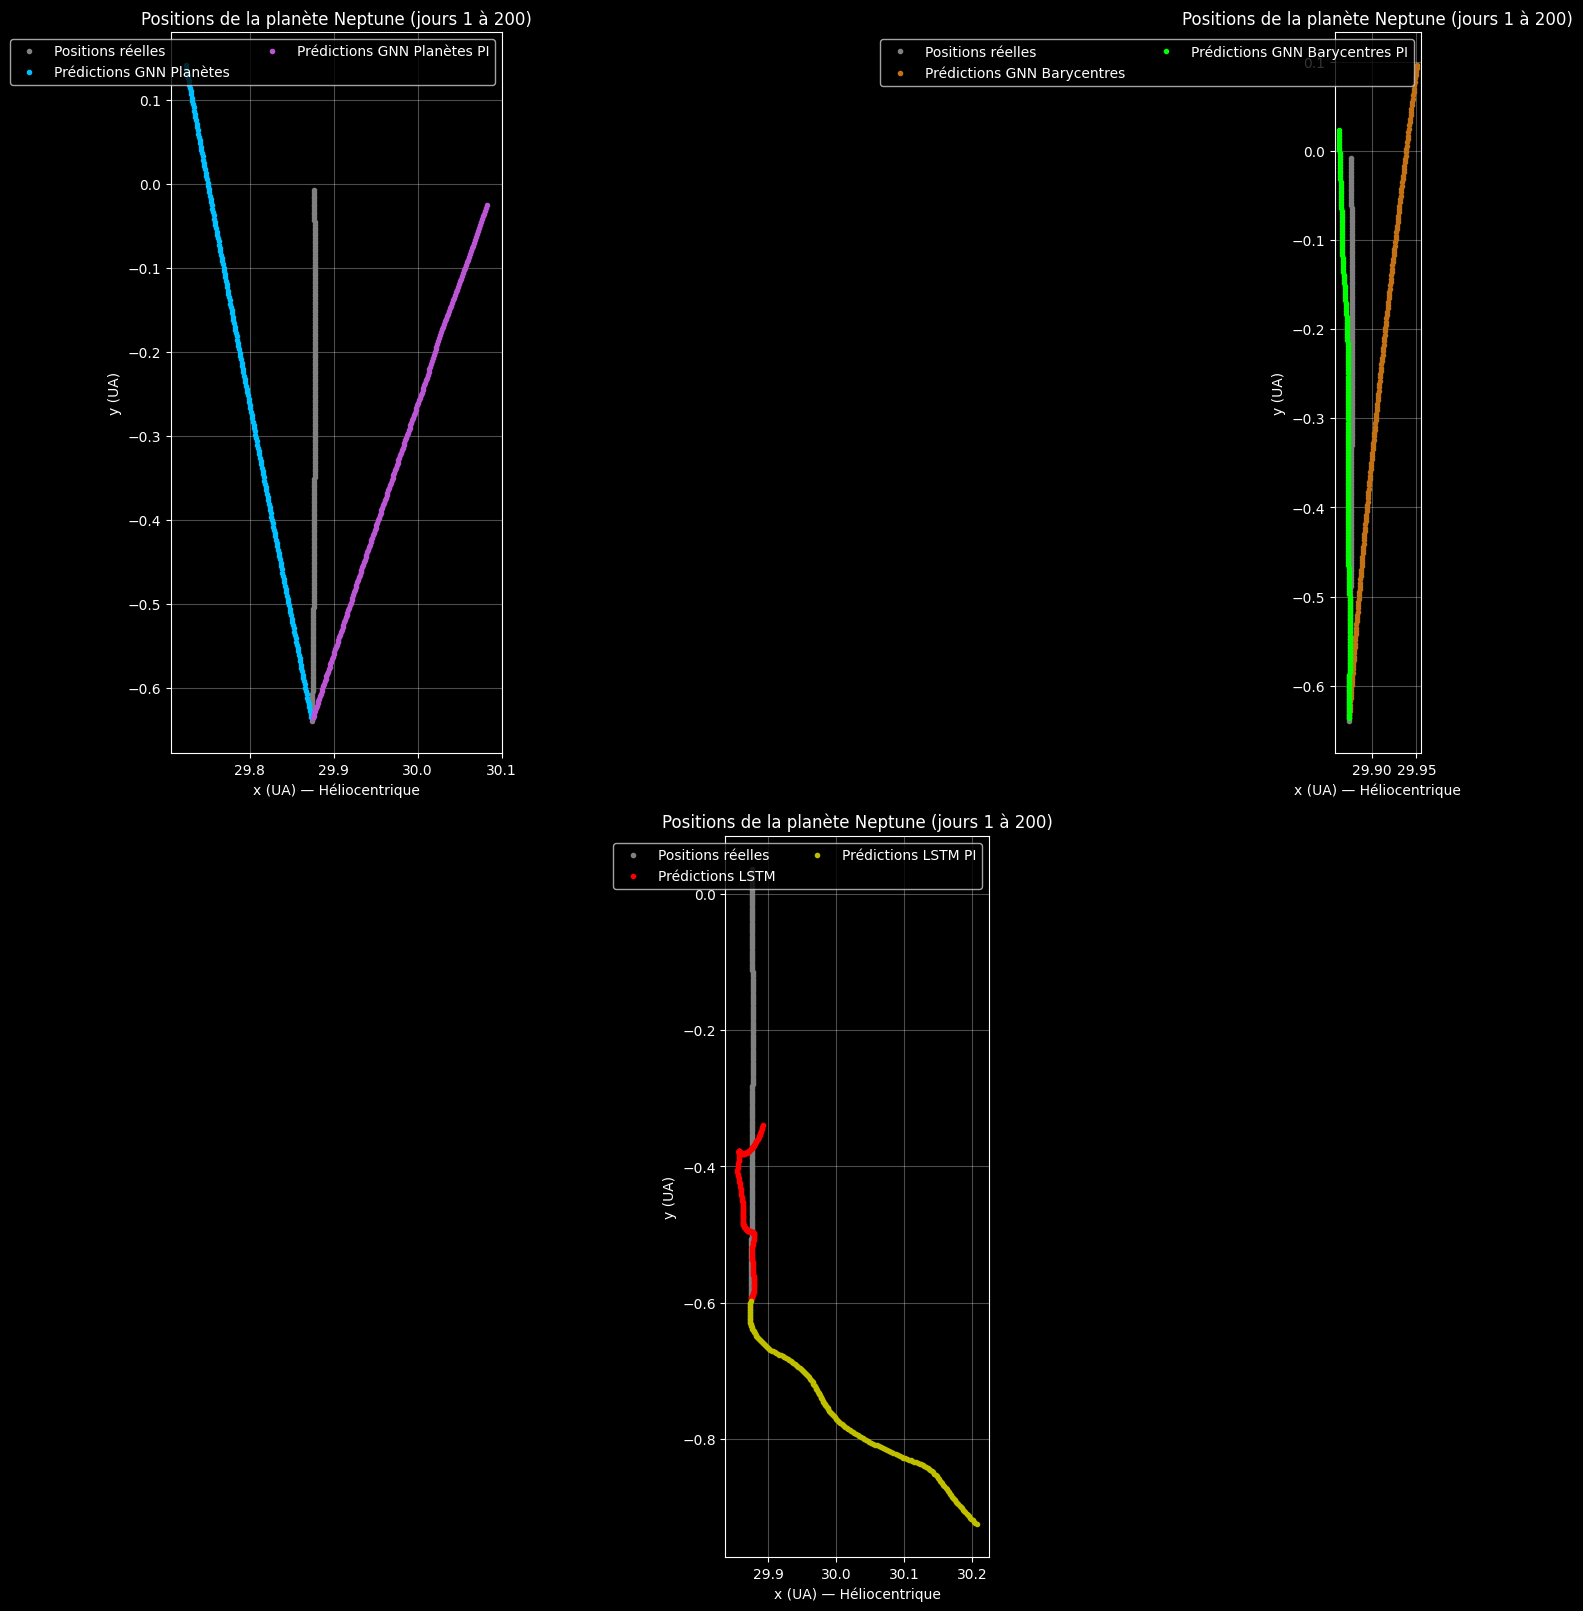

In [46]:
plot_planet_coordinates(num_days=200)

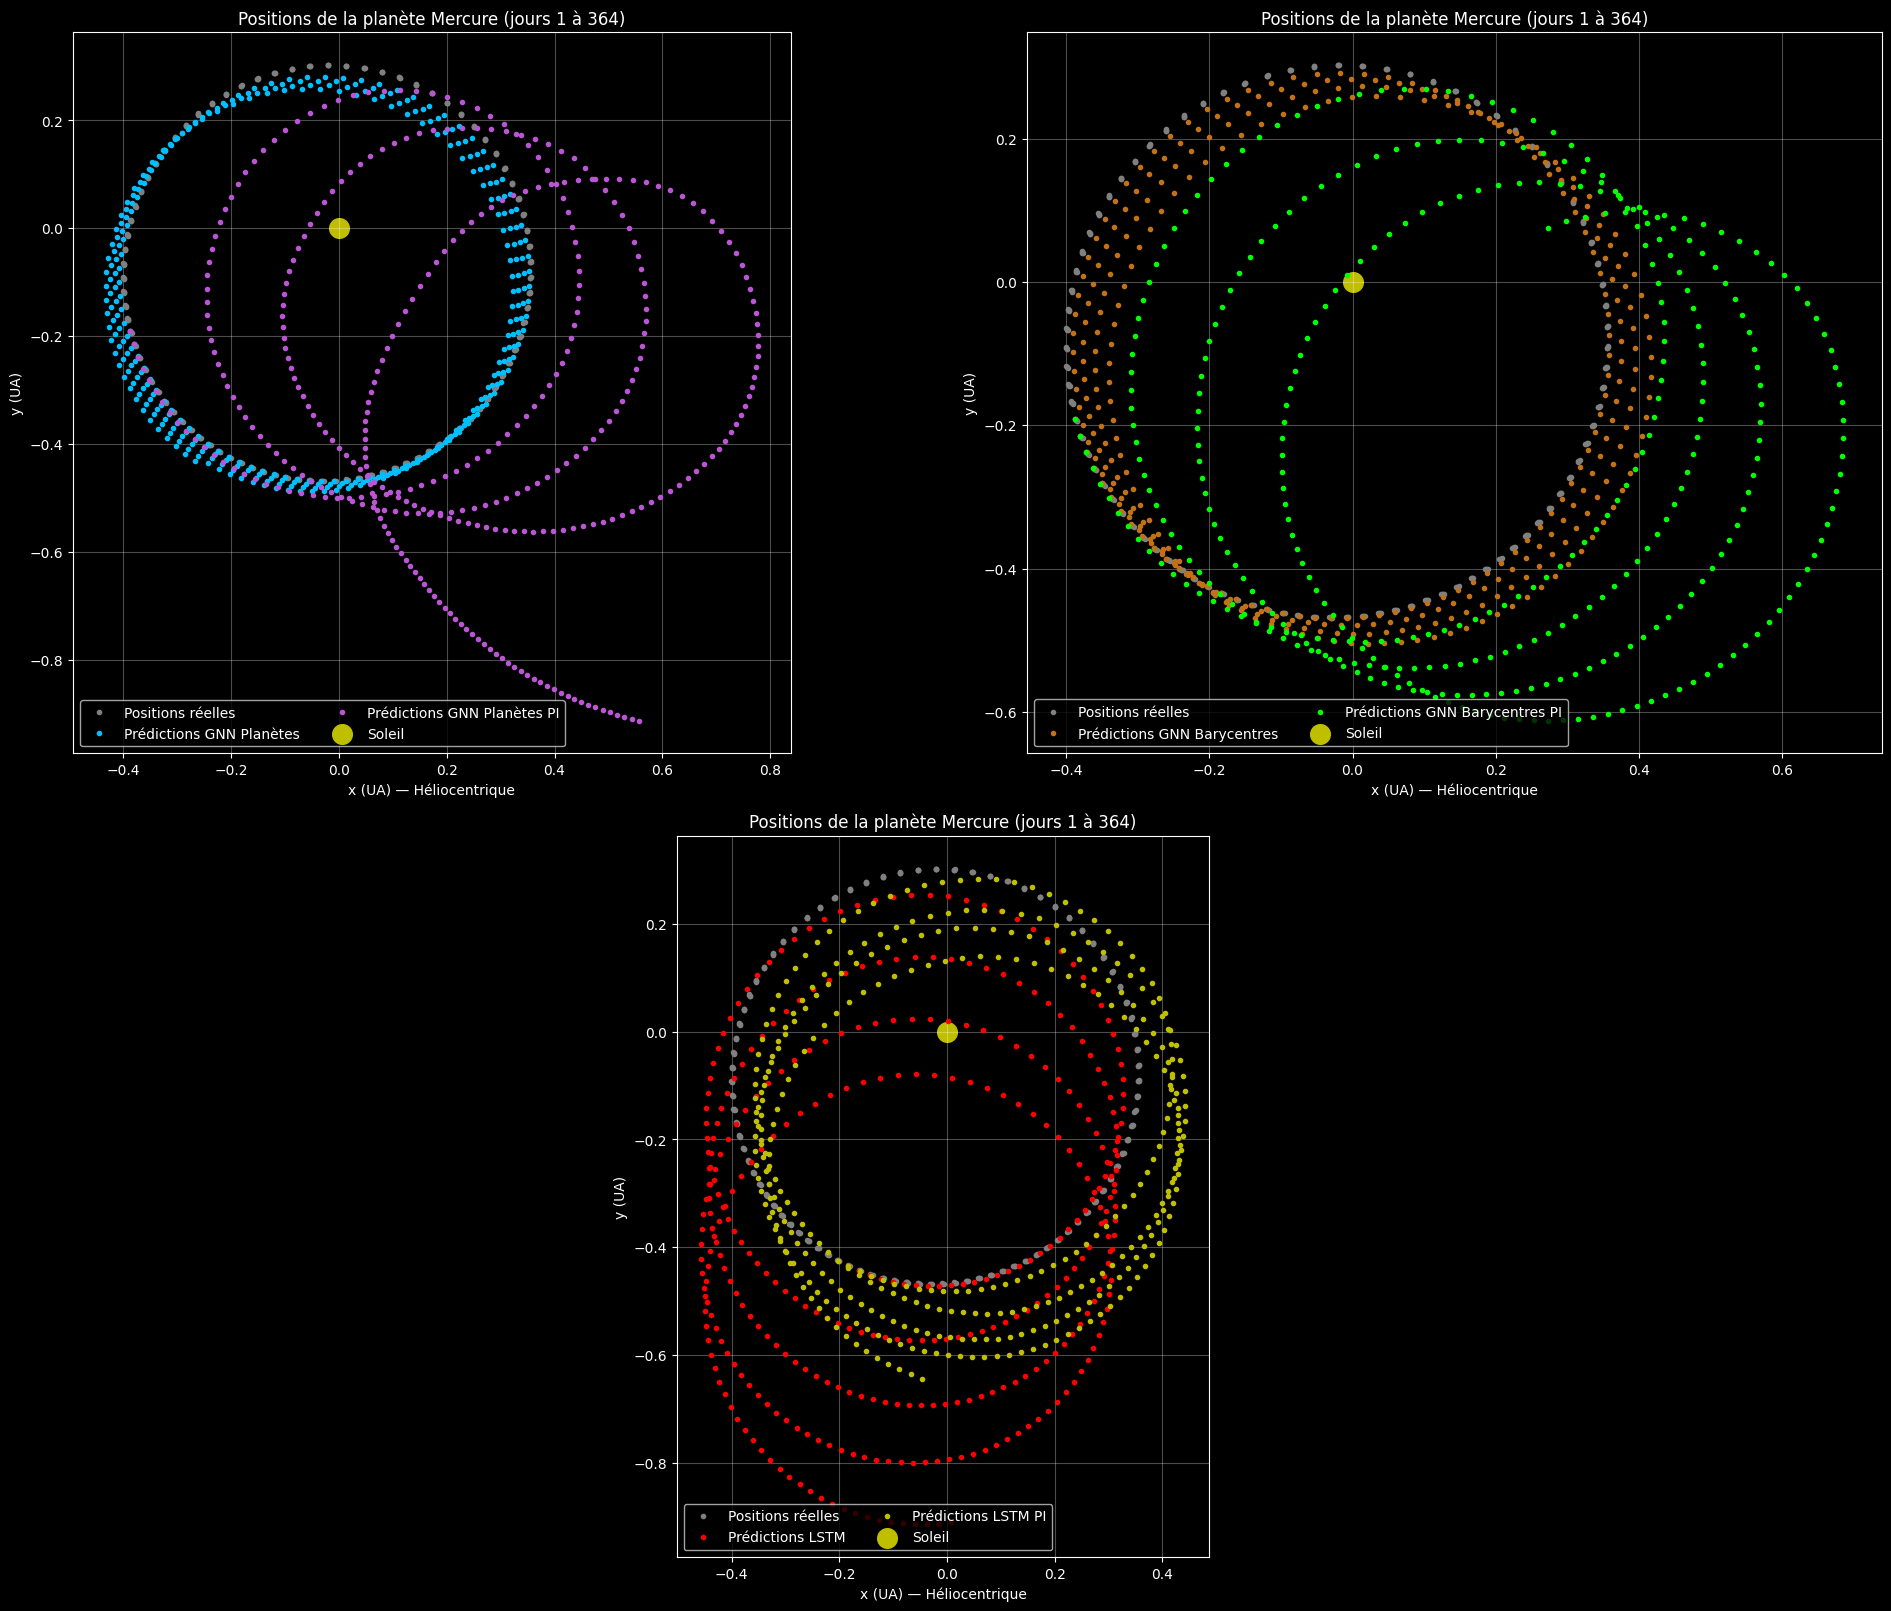

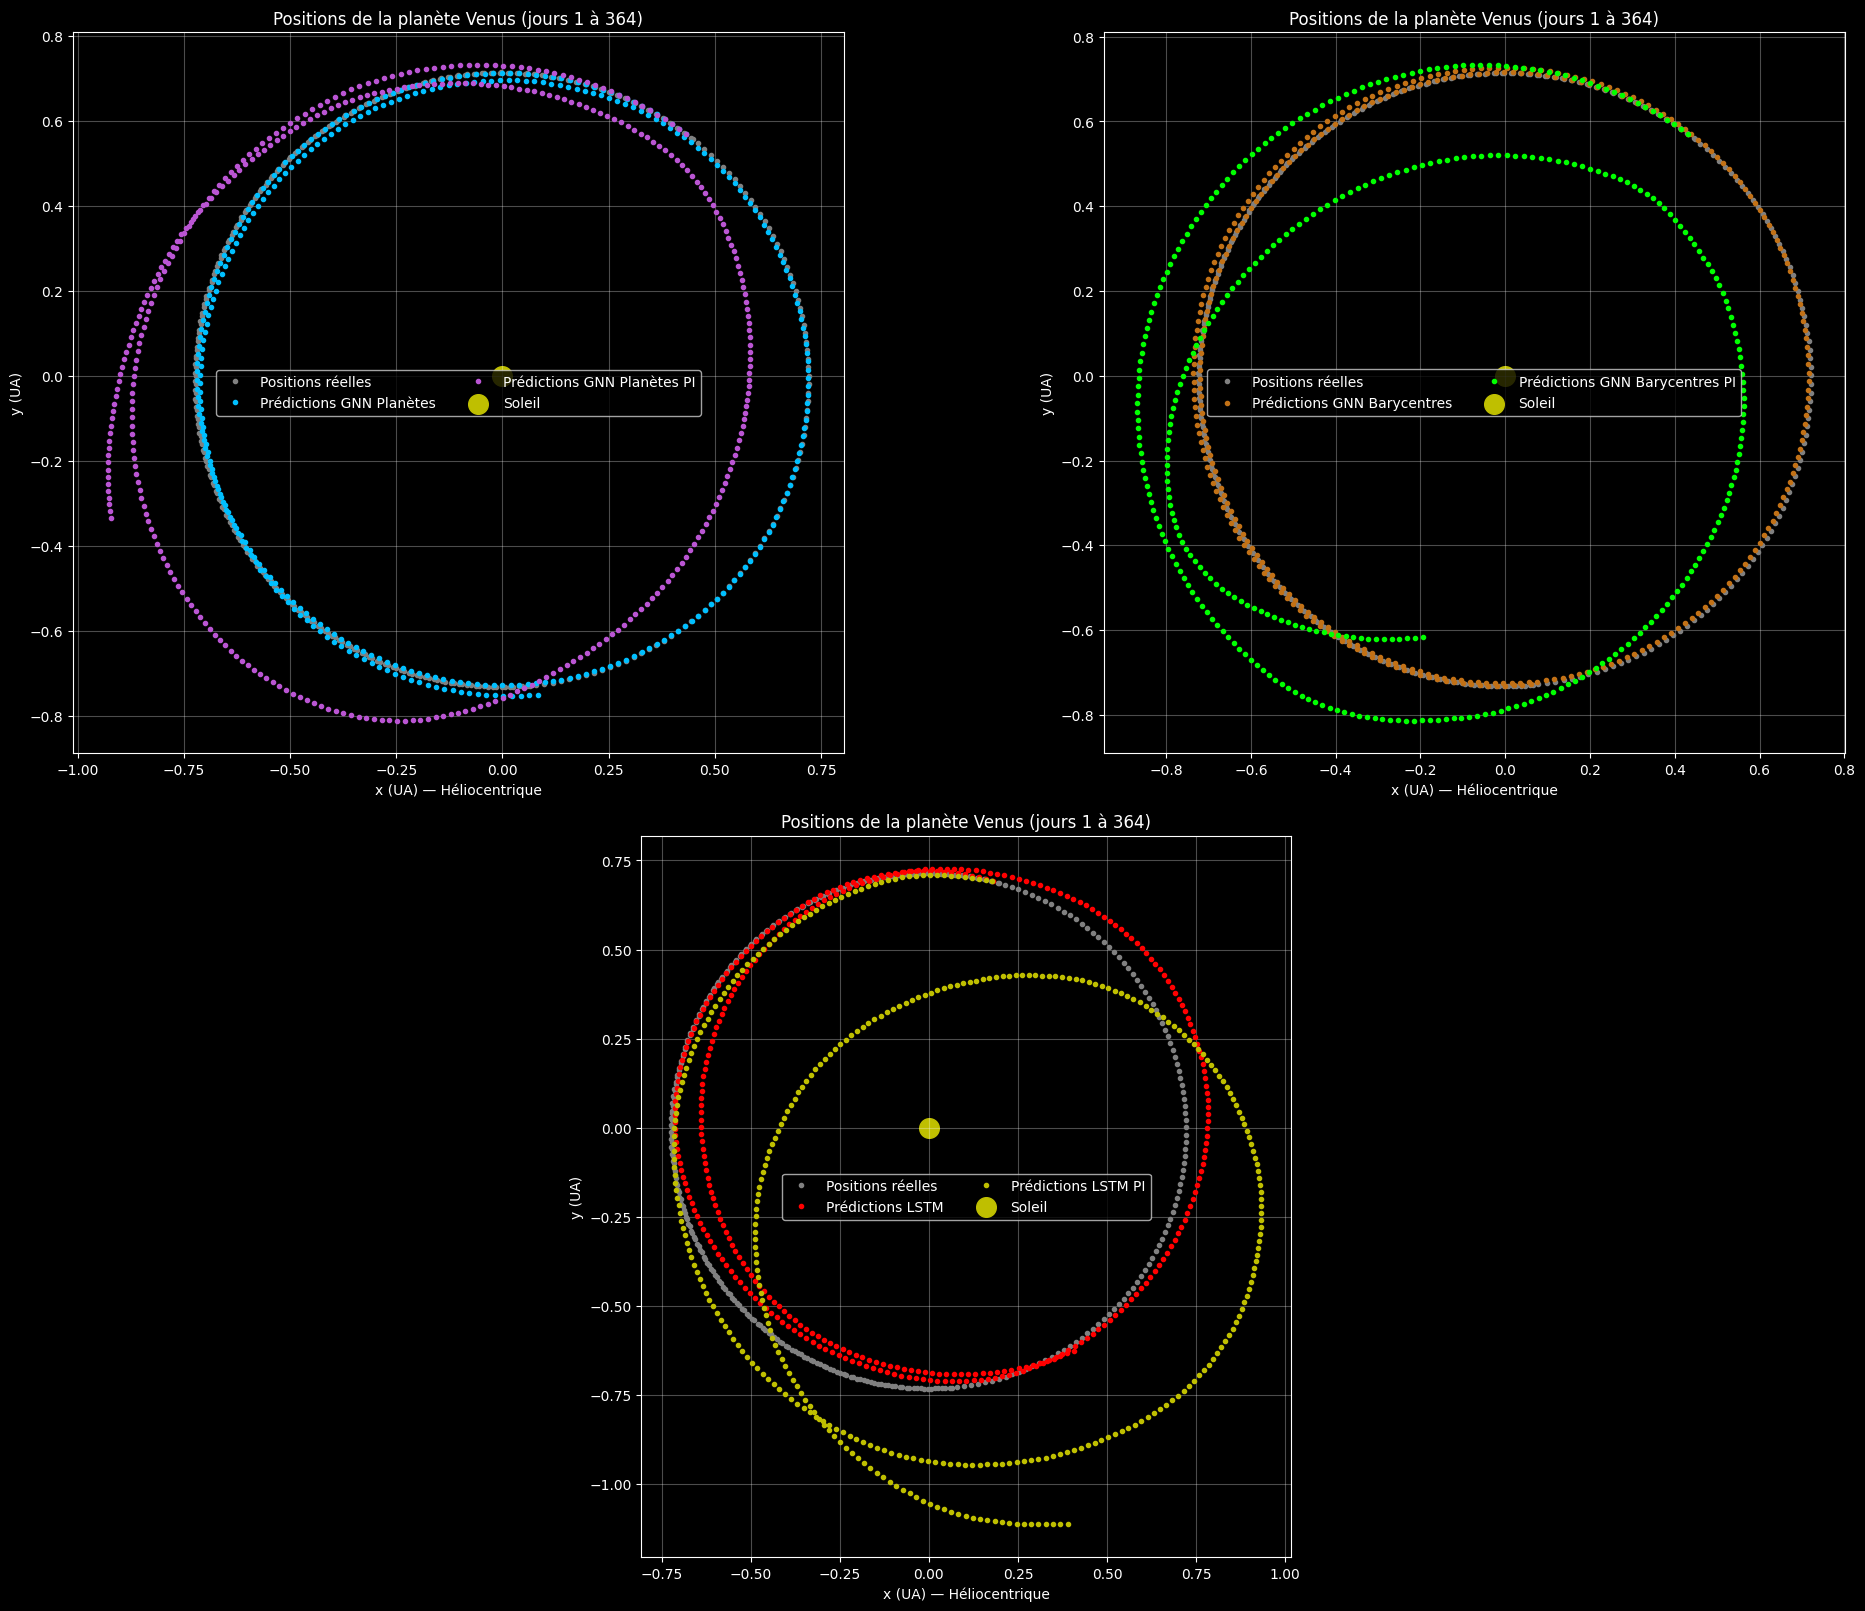

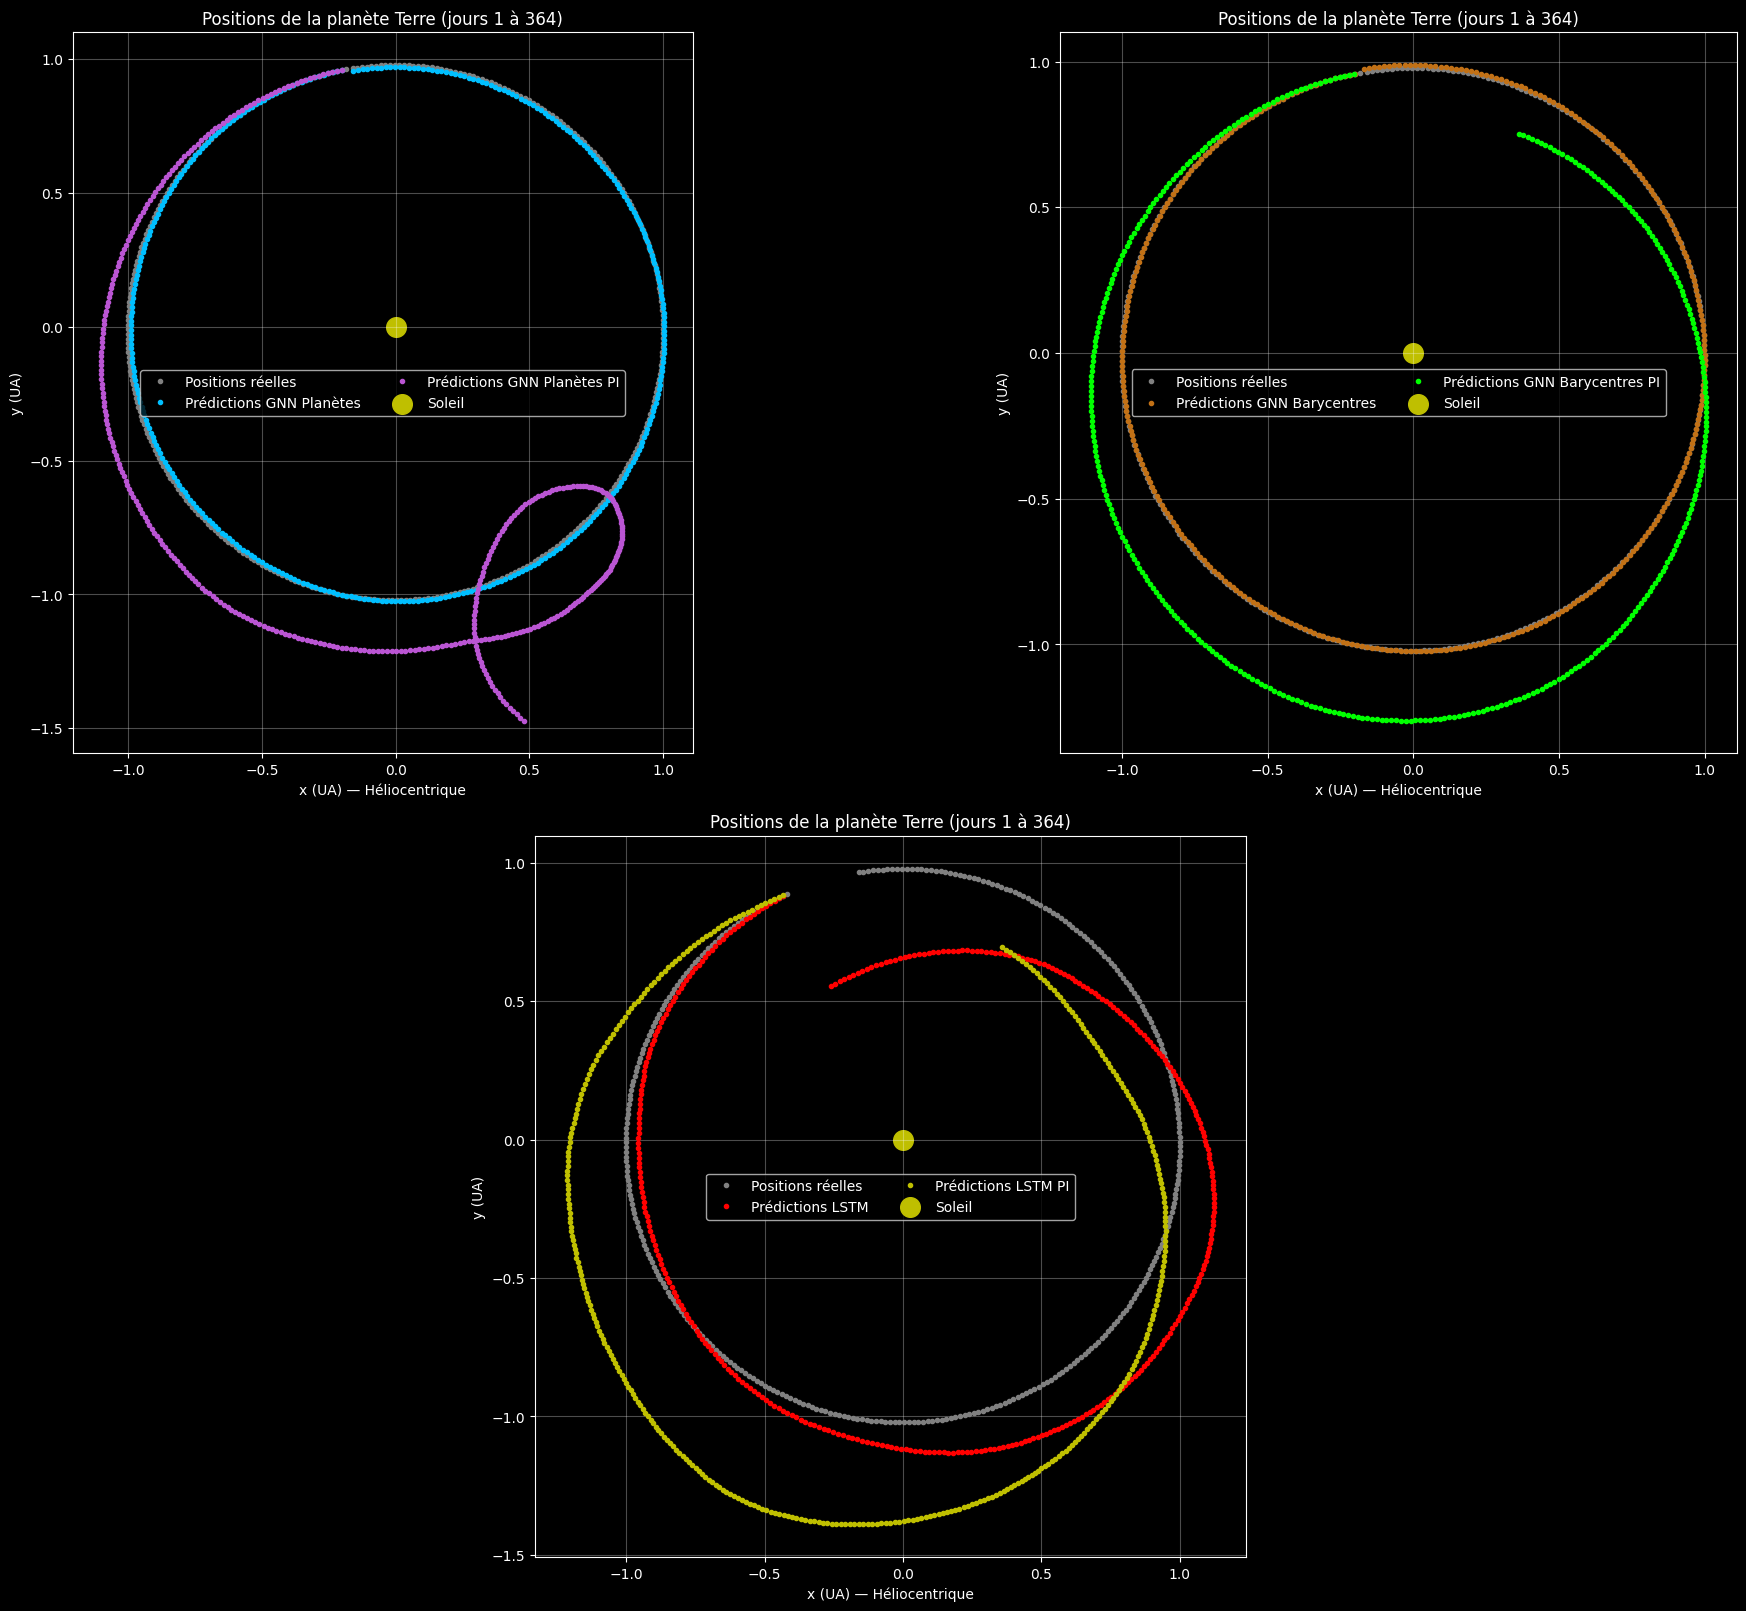

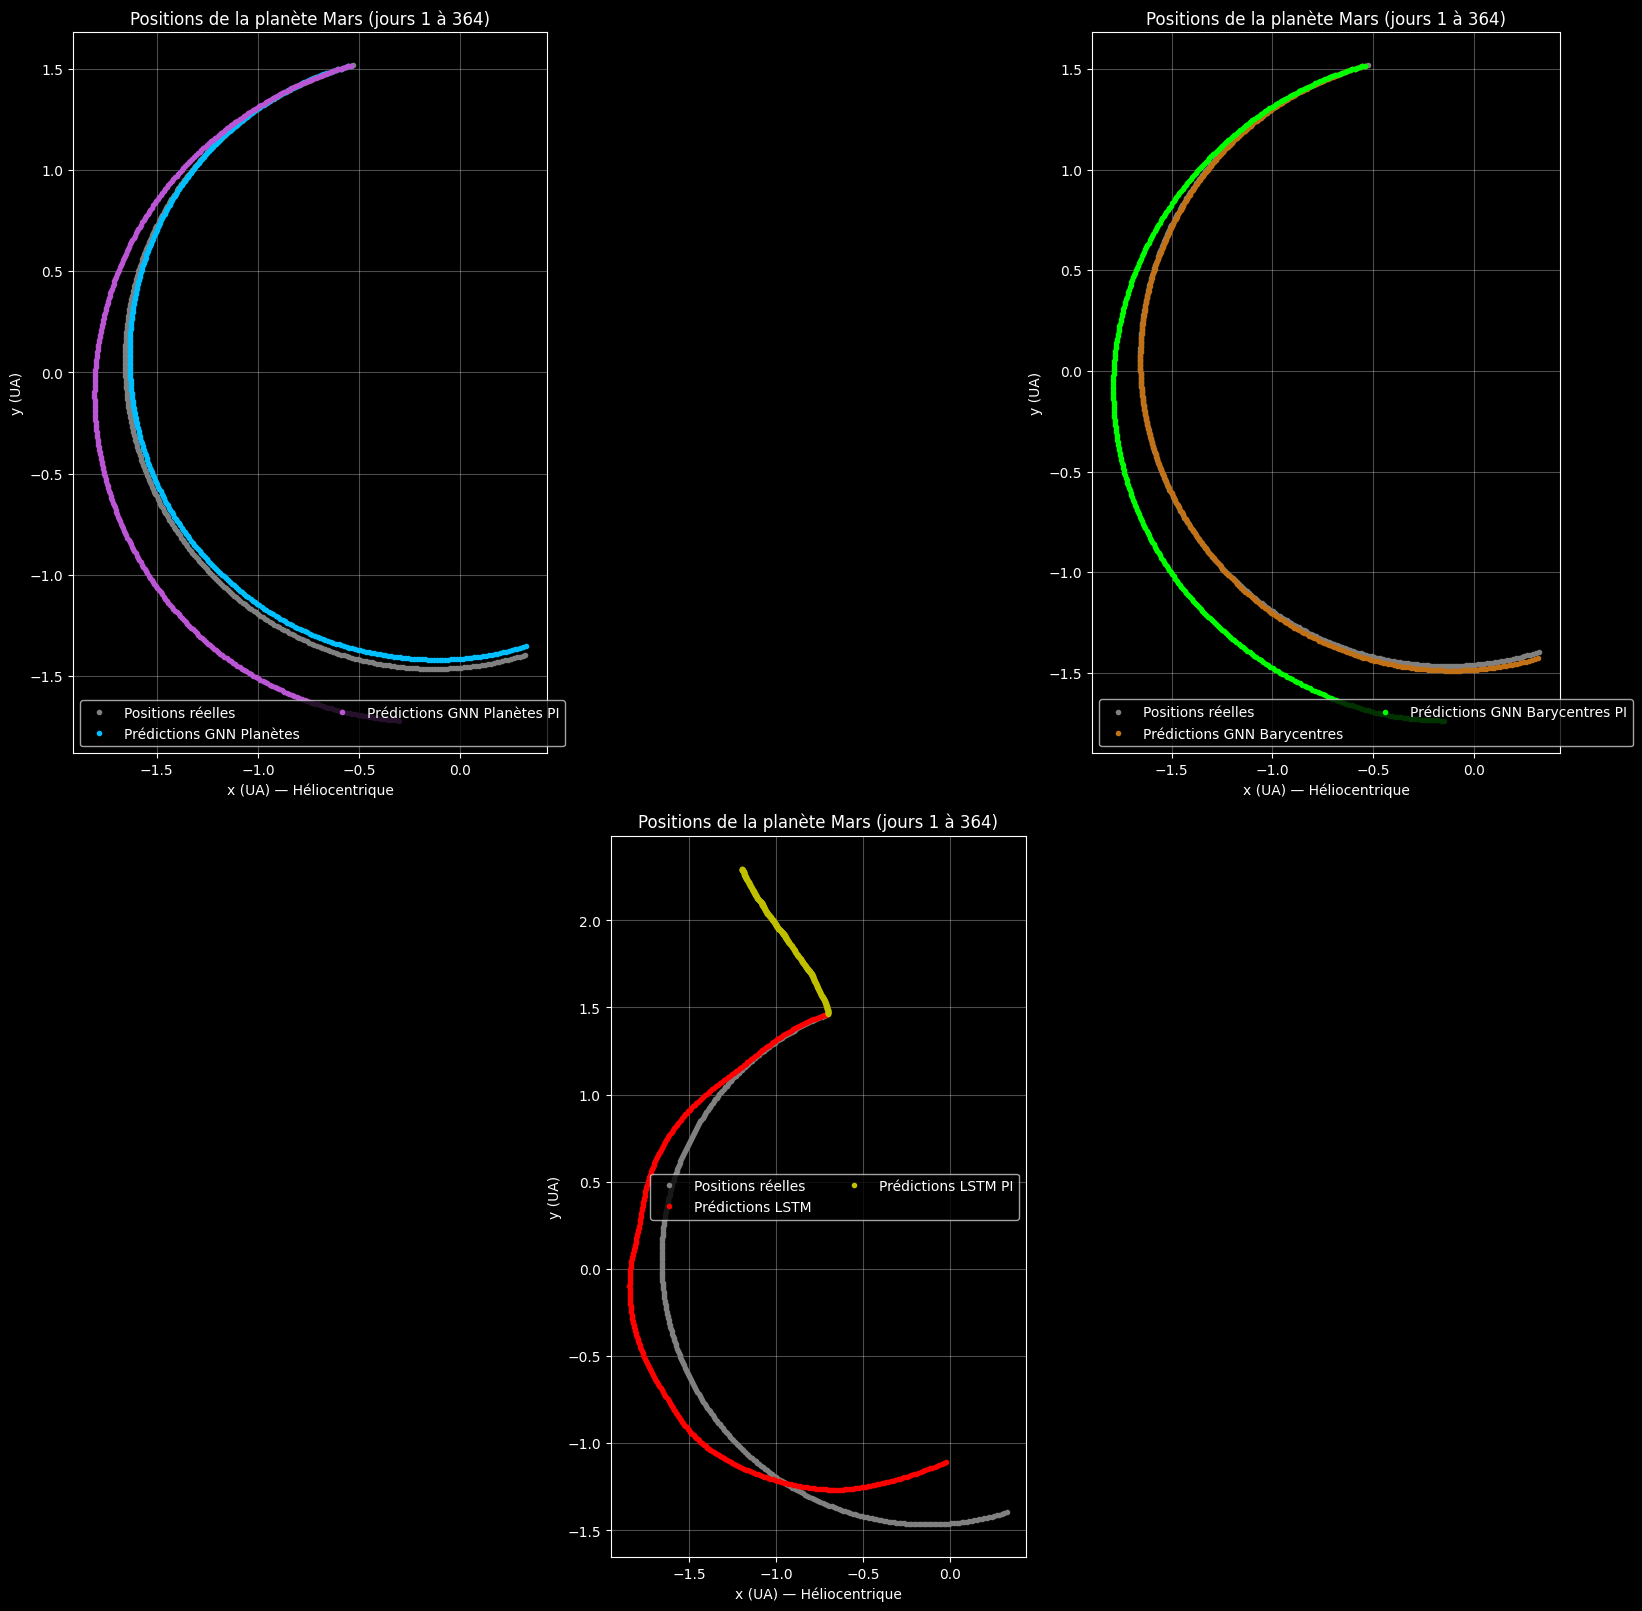

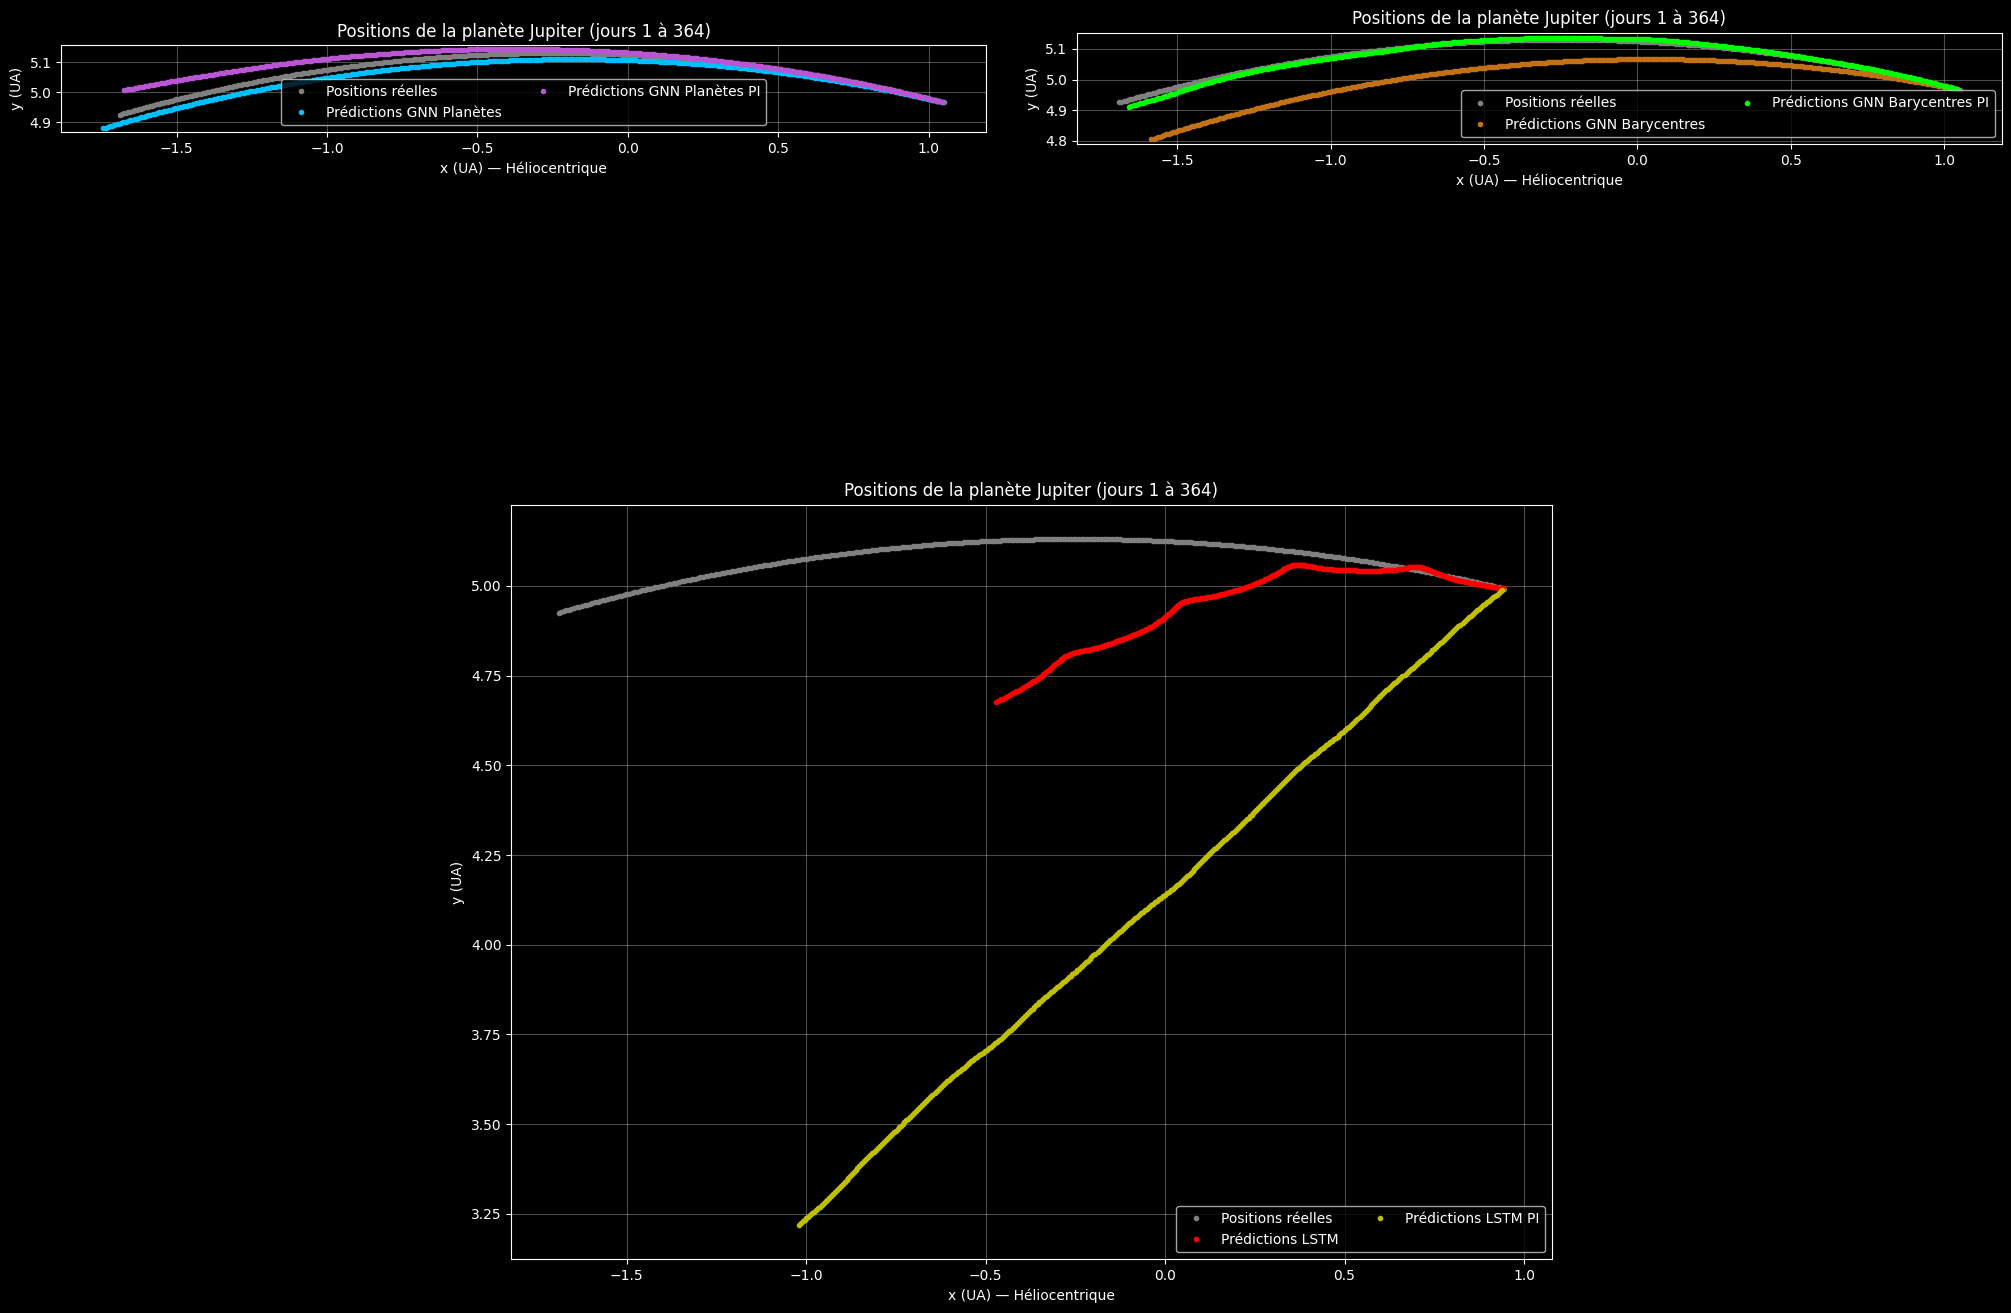

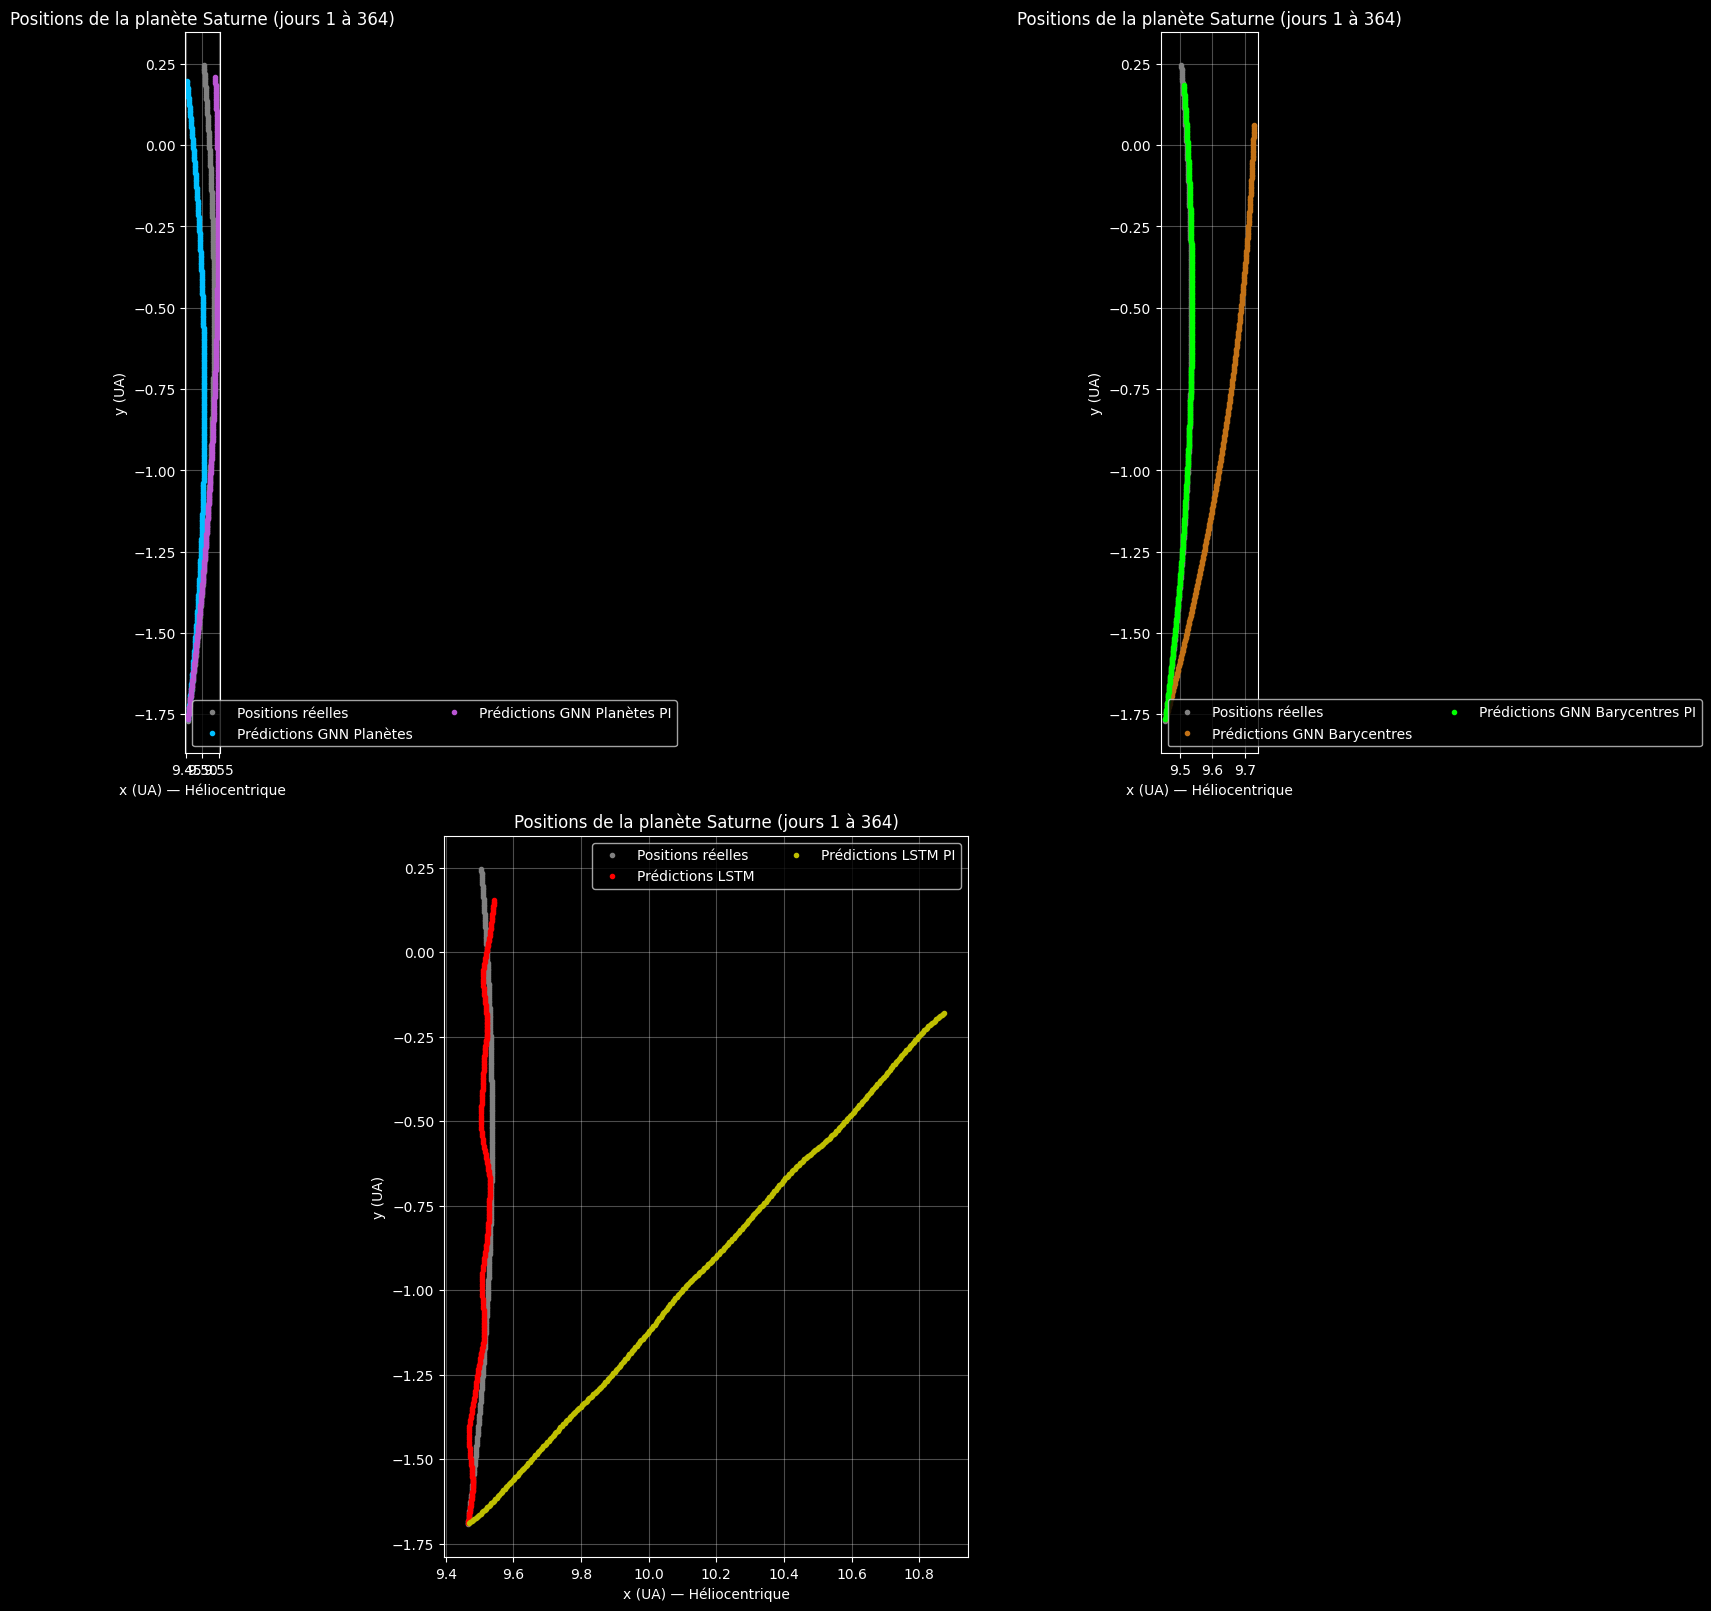

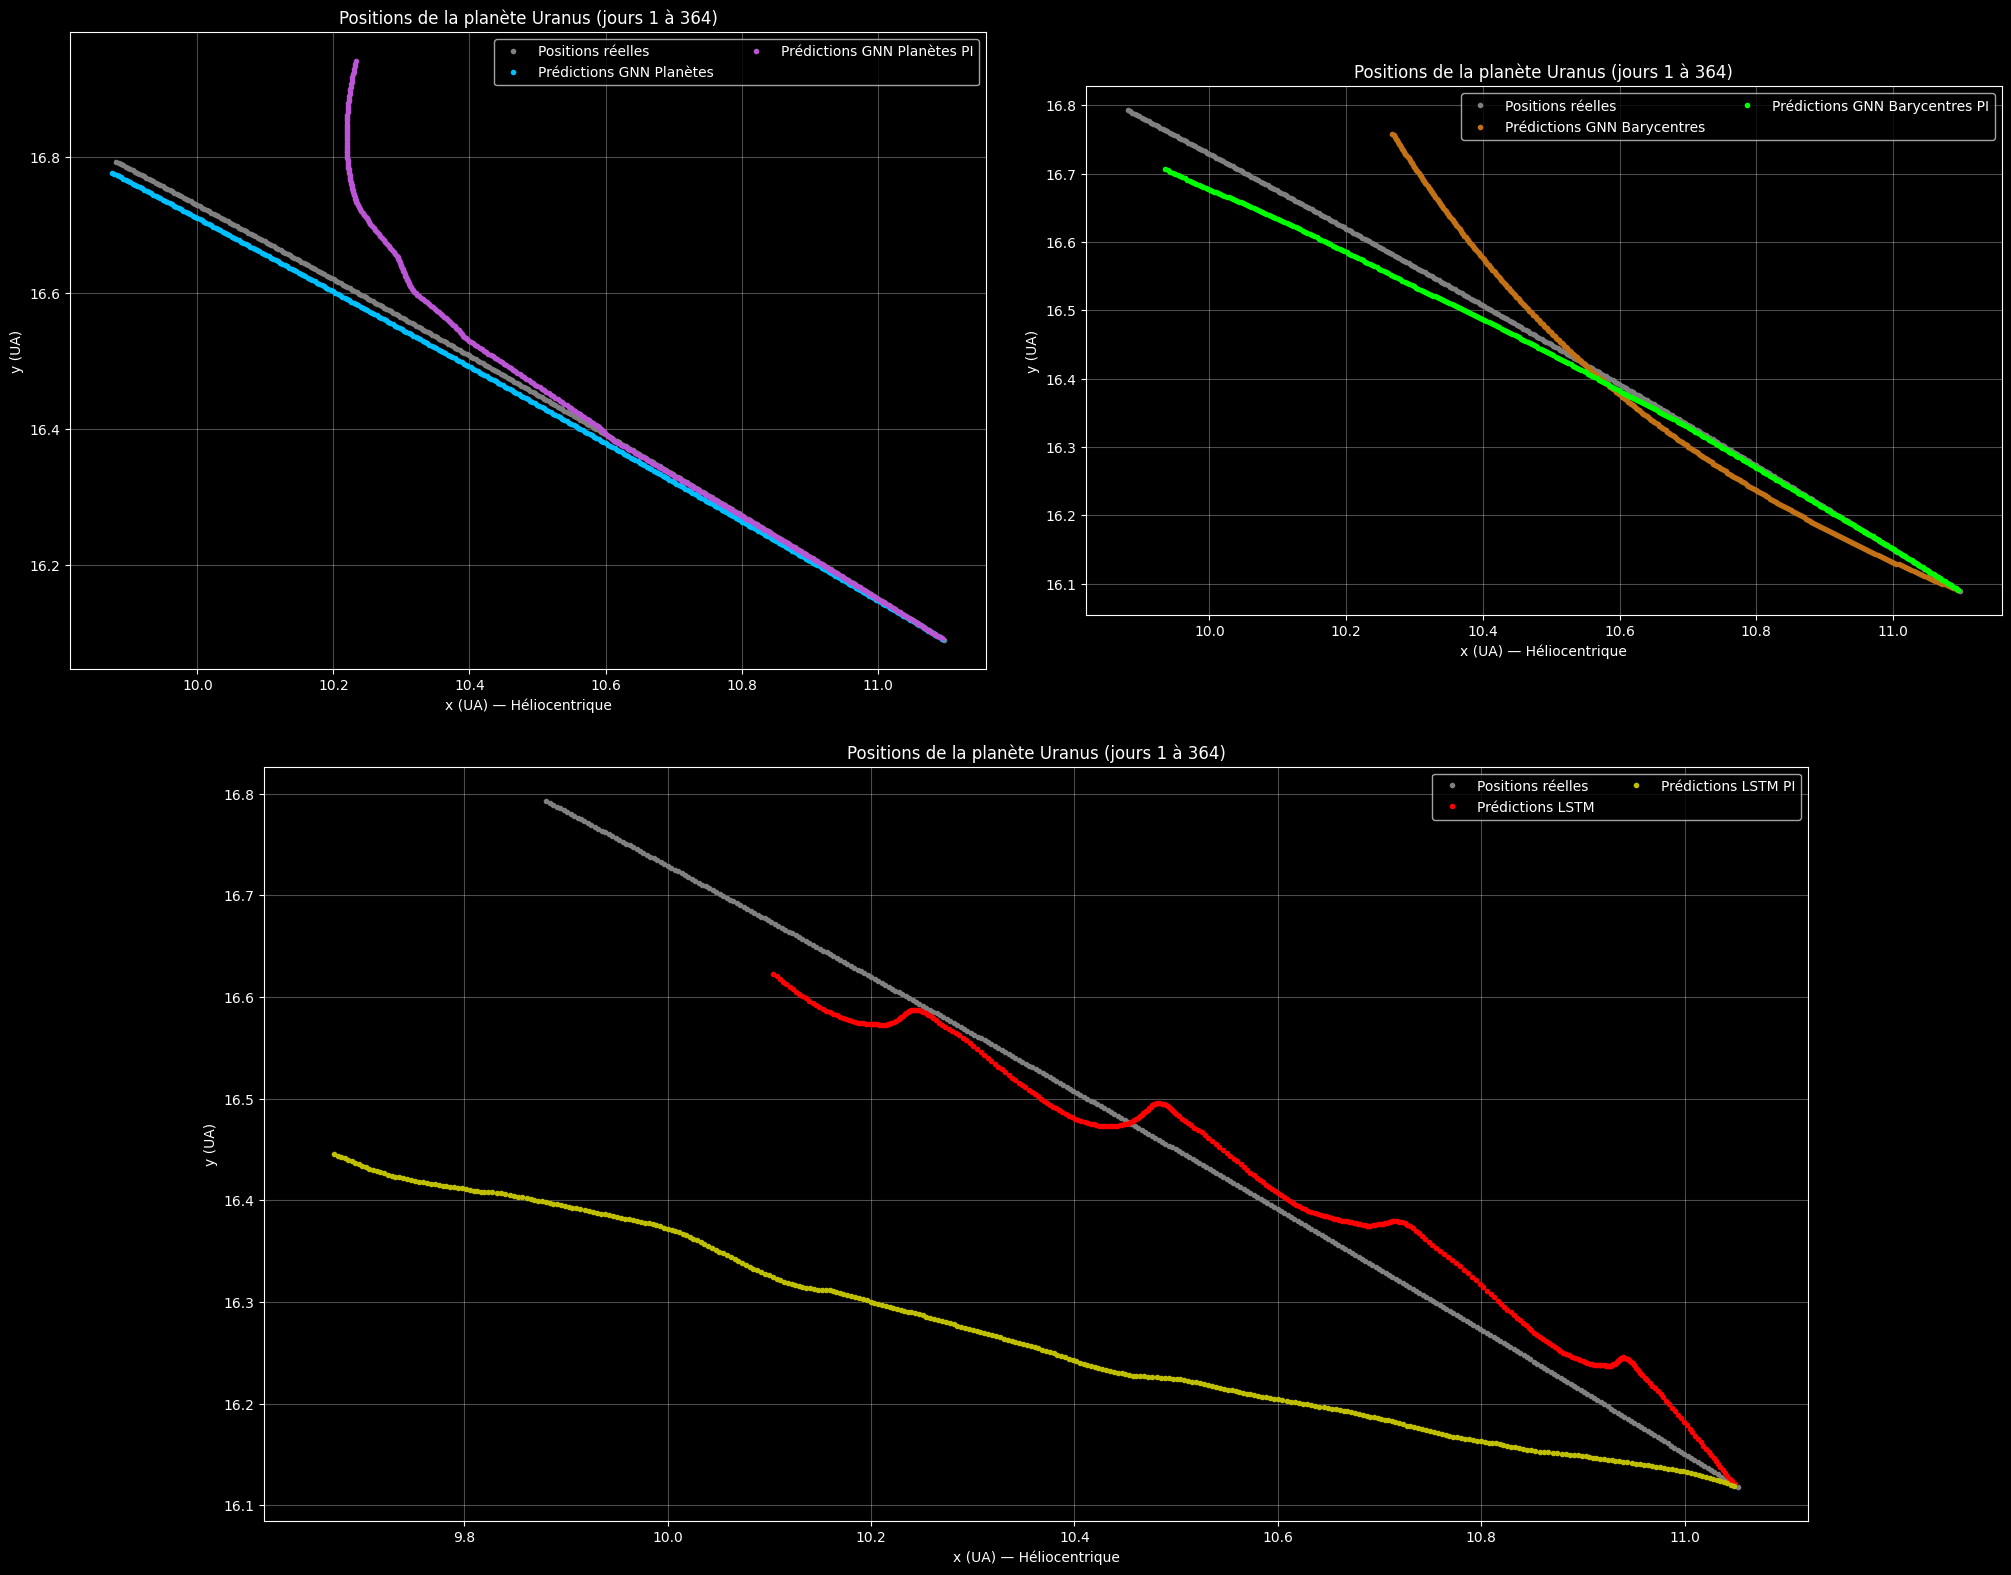

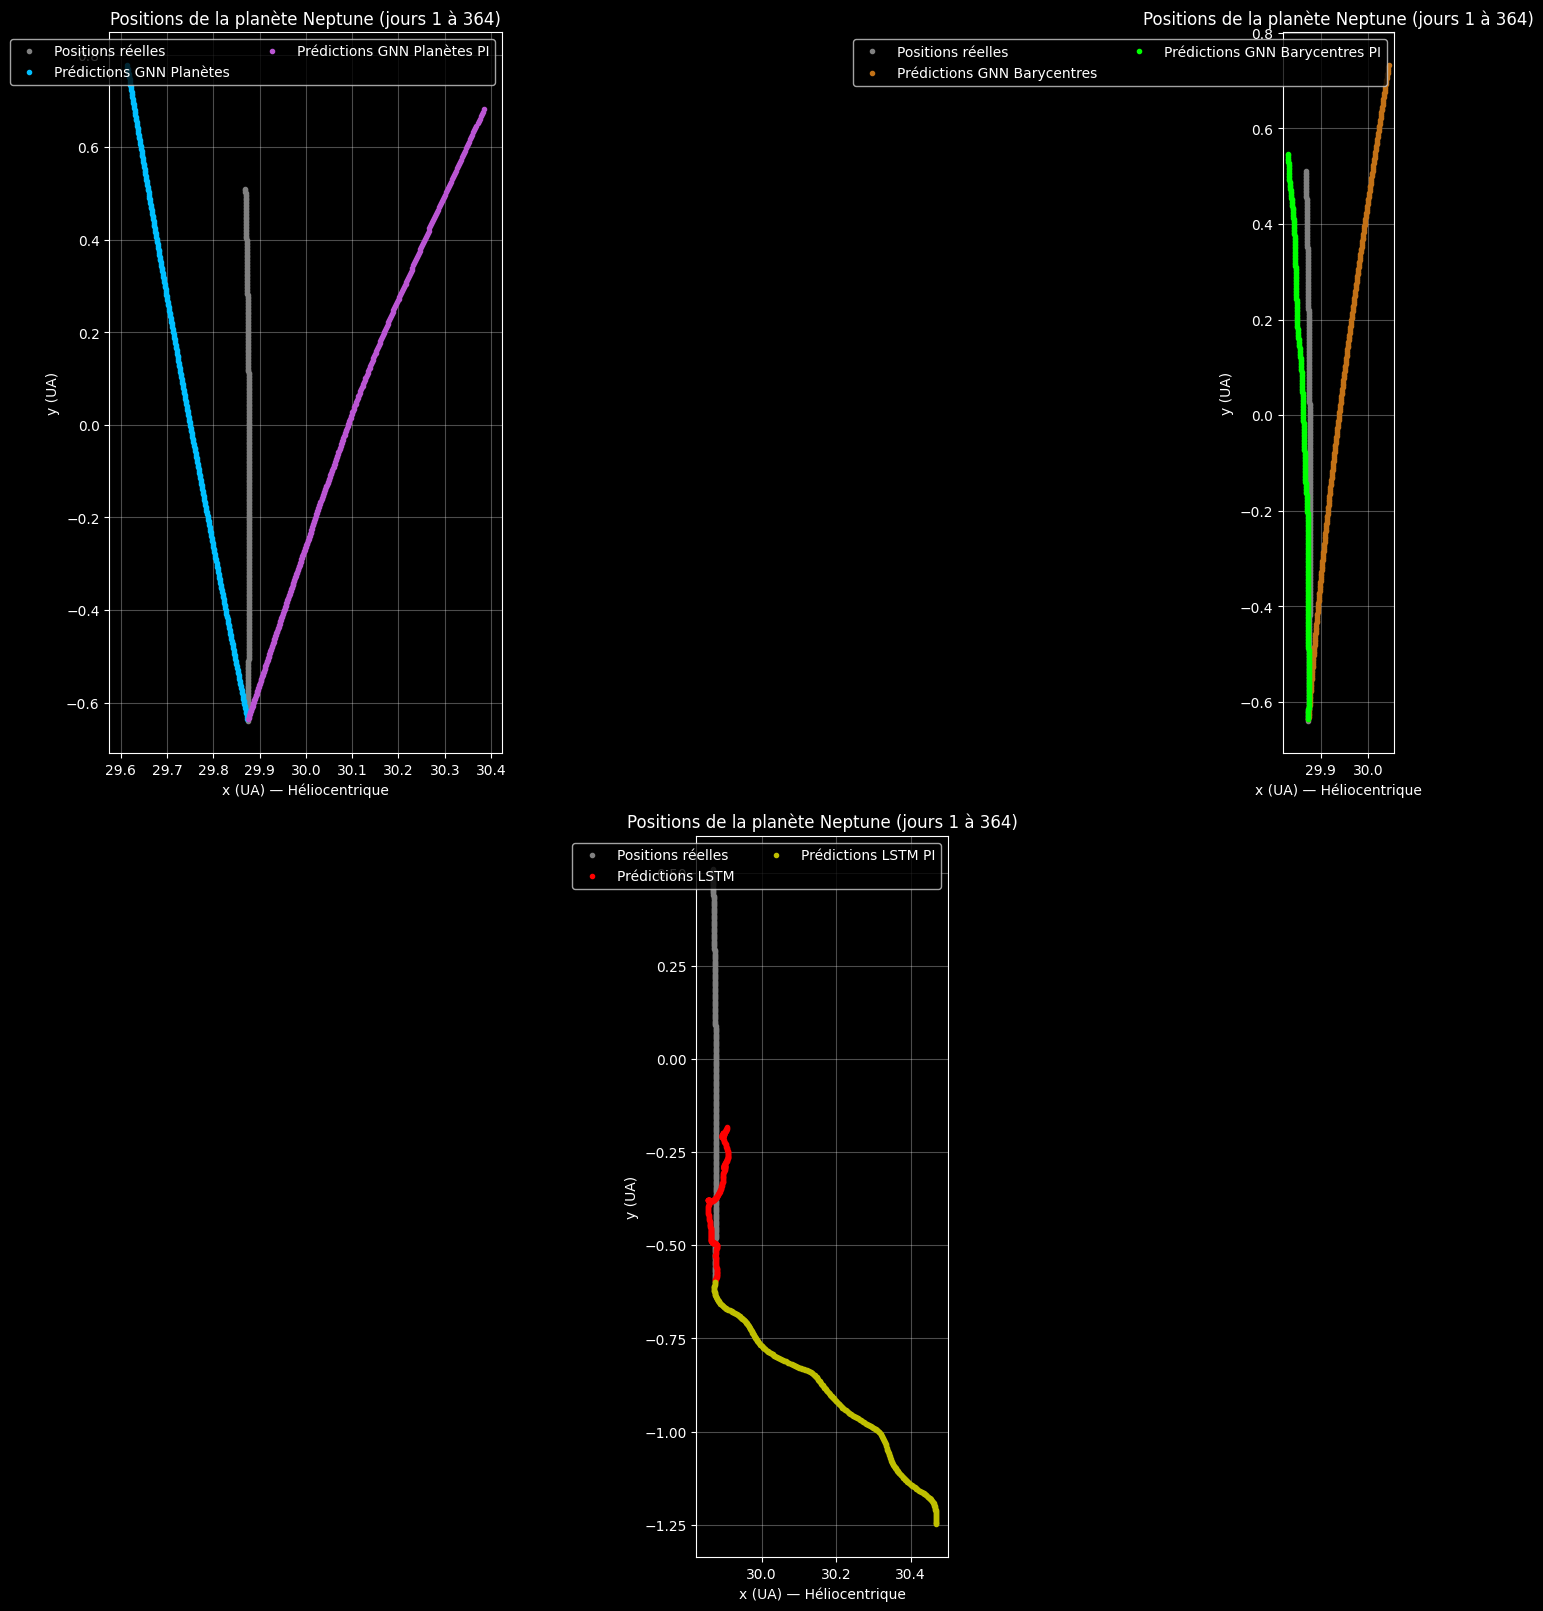

In [47]:
plot_planet_coordinates(num_days=364)

## 4. Analyse numérique des prédictions

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

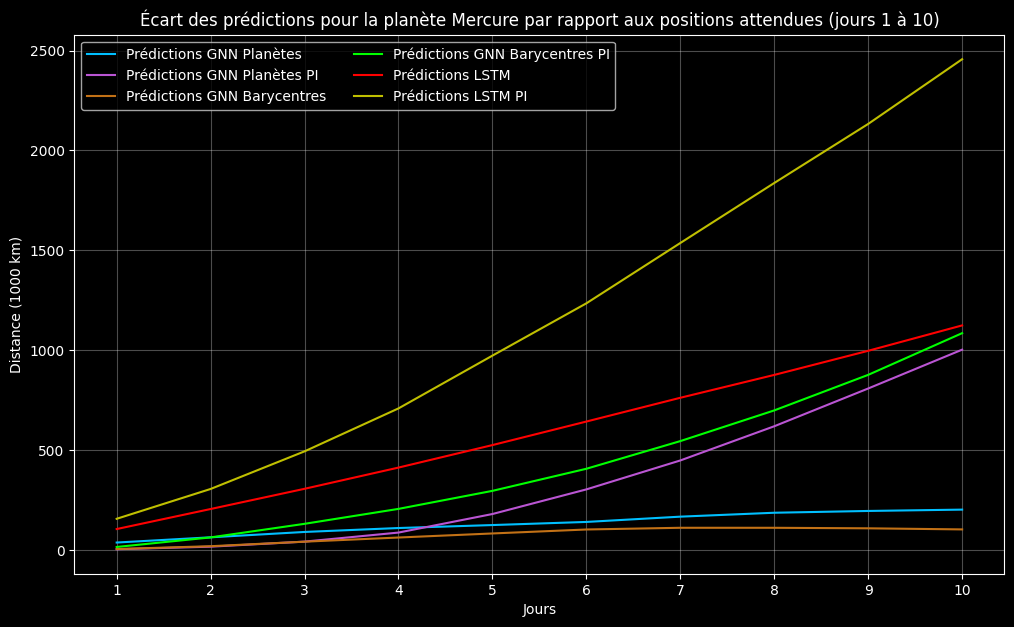

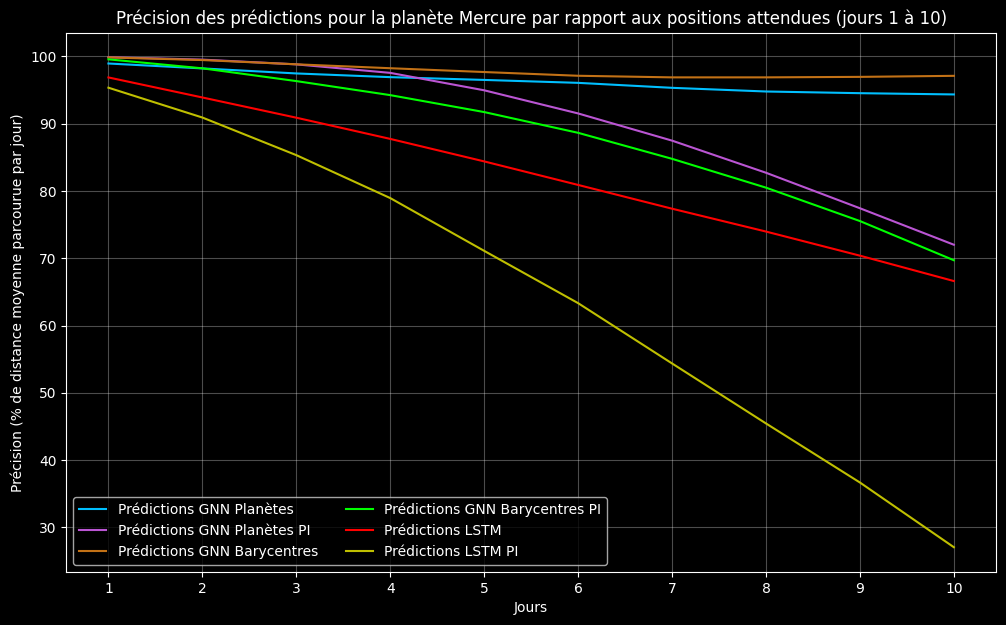

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

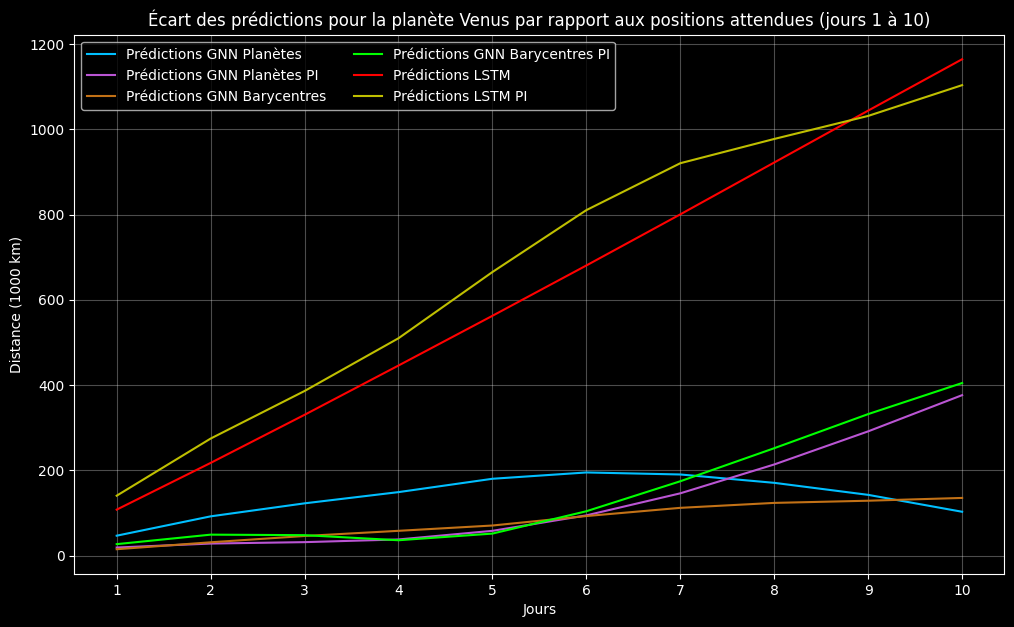

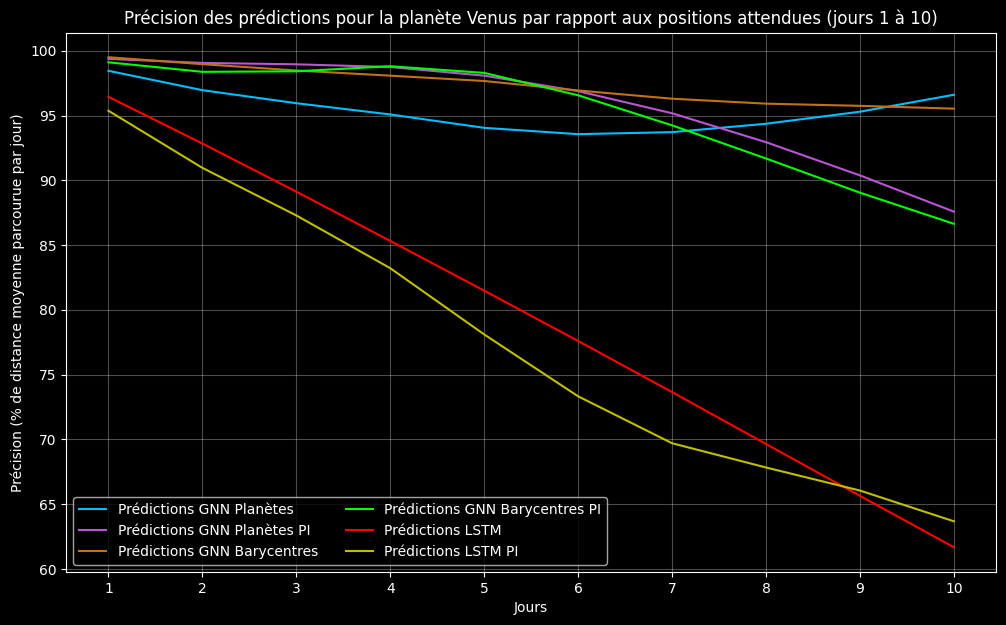

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

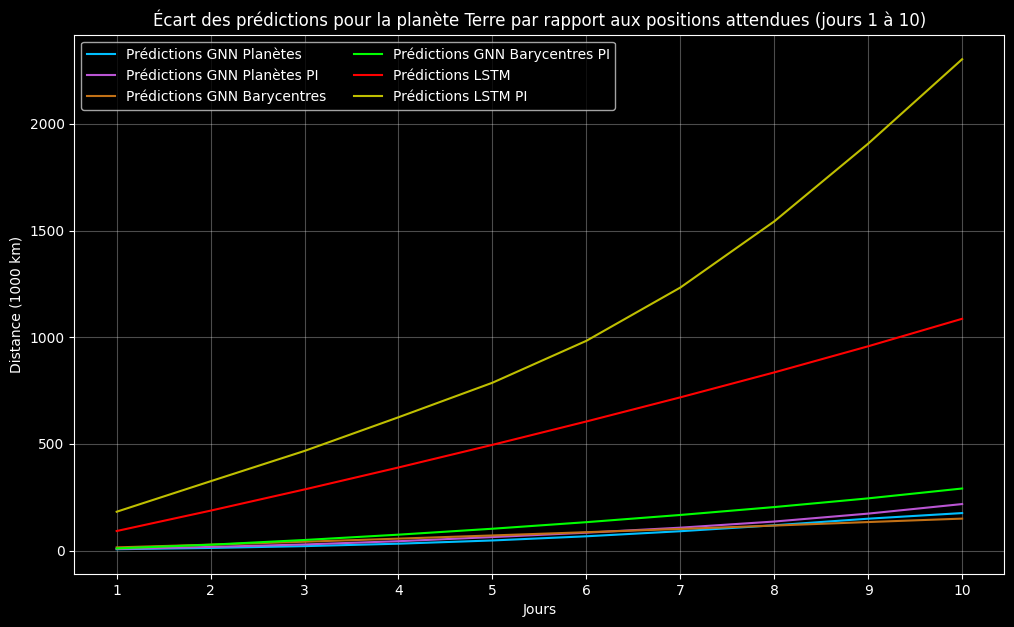

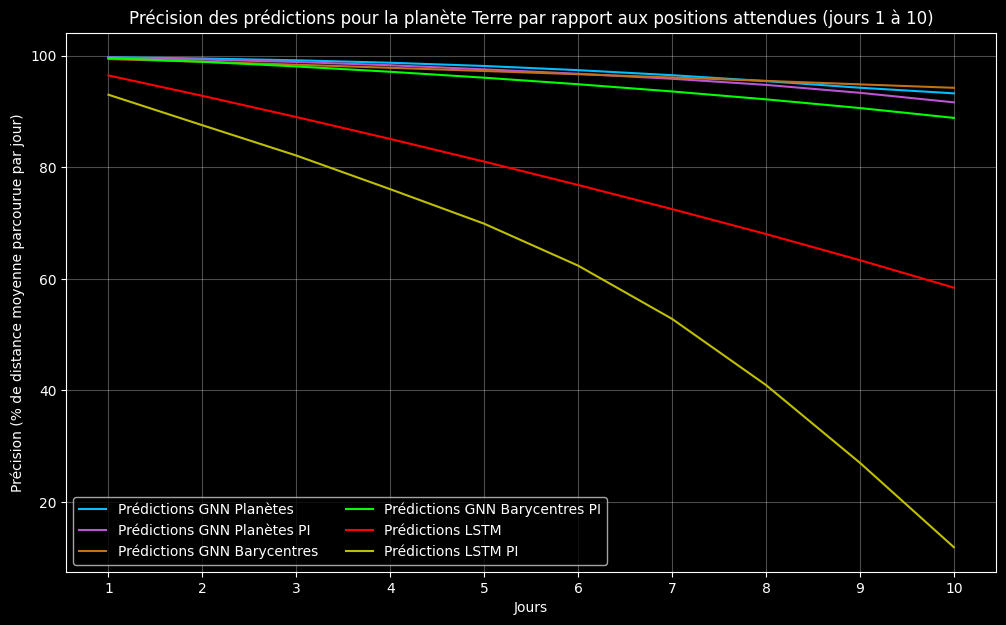

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

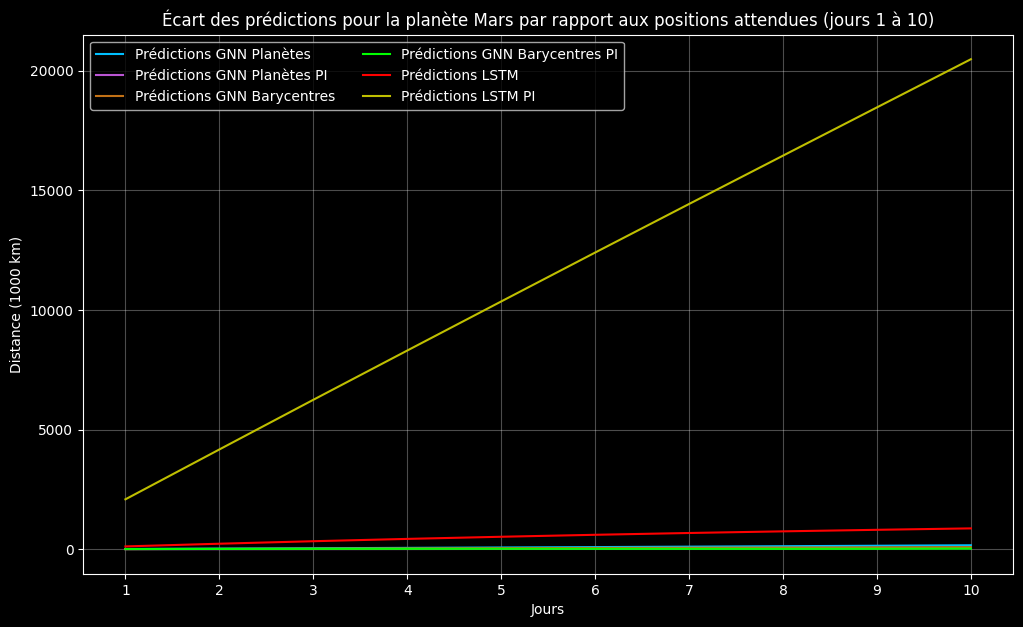

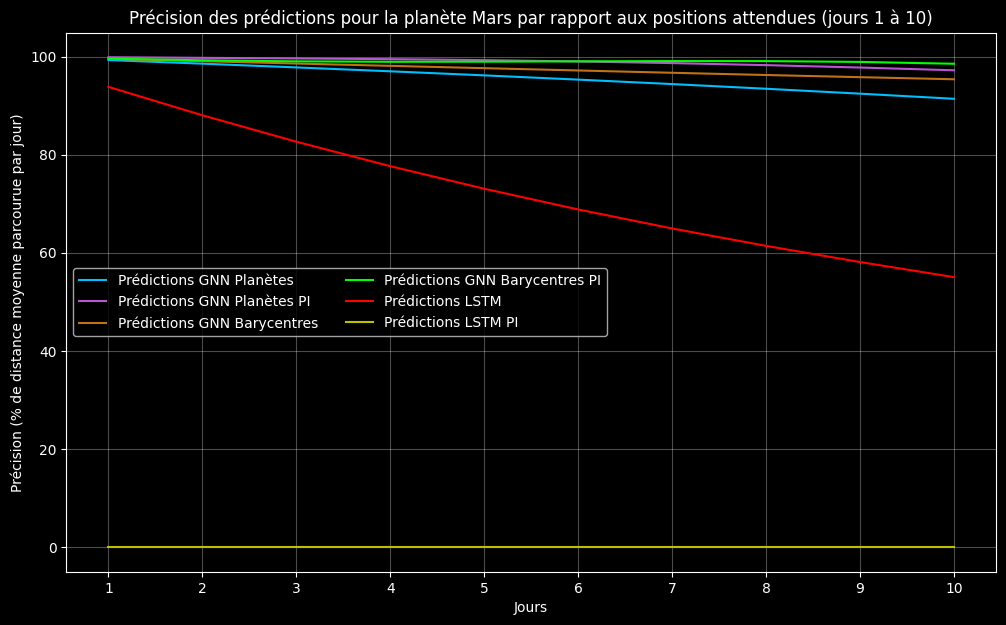

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

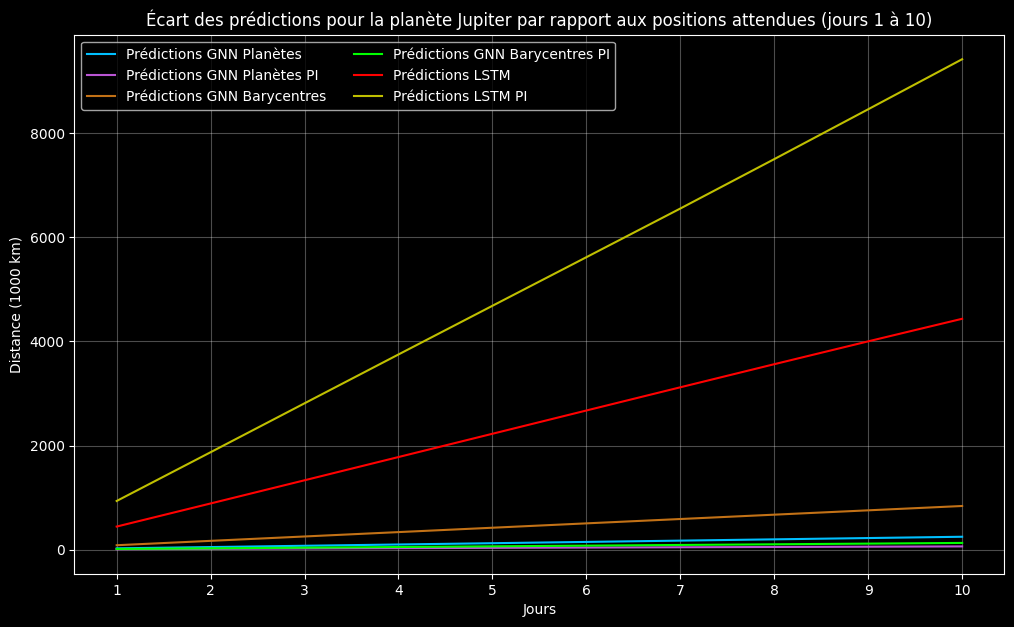

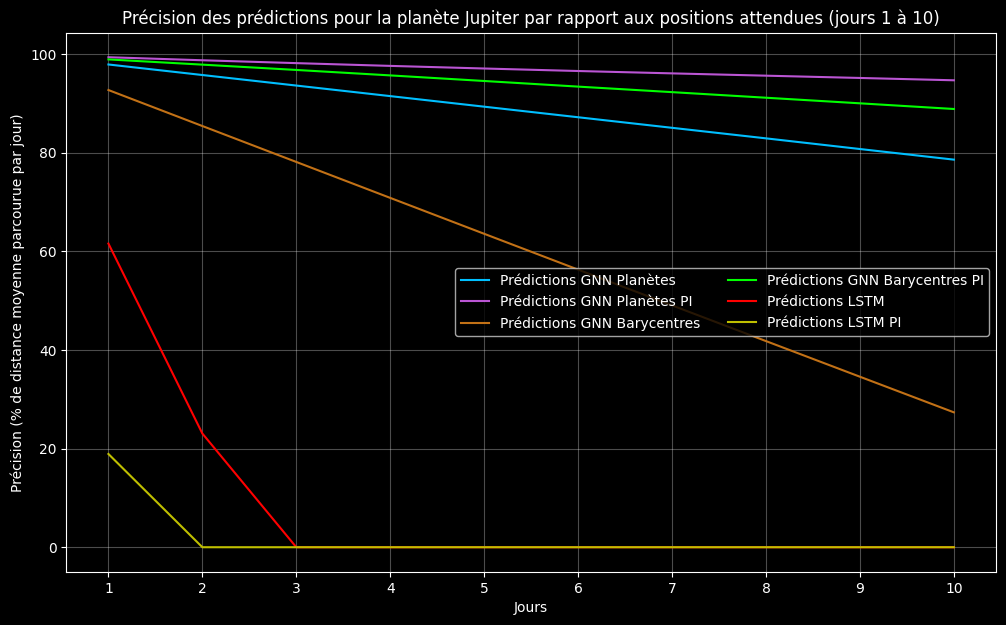

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

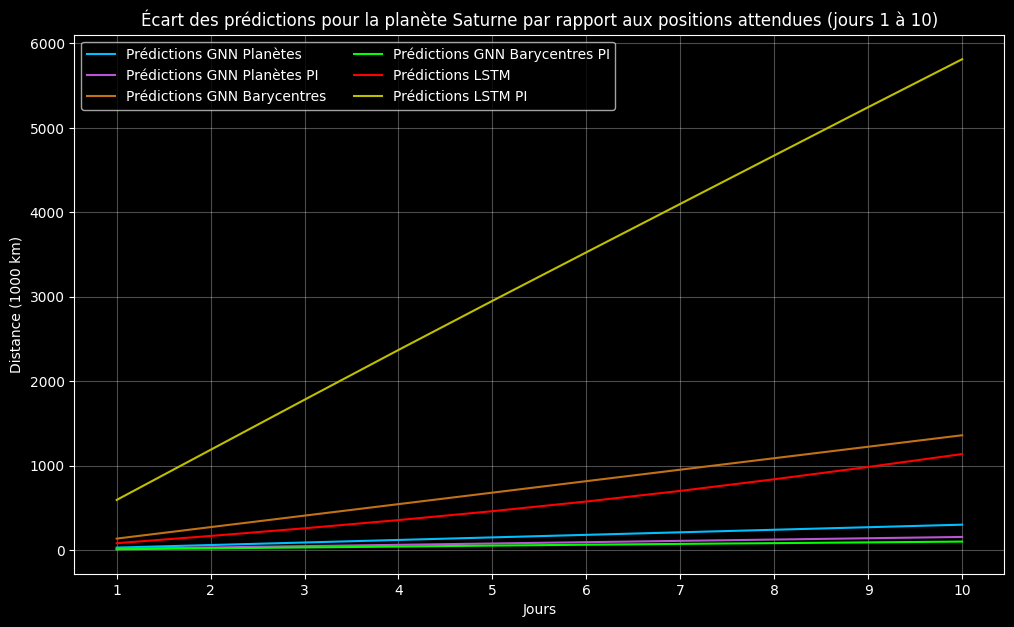

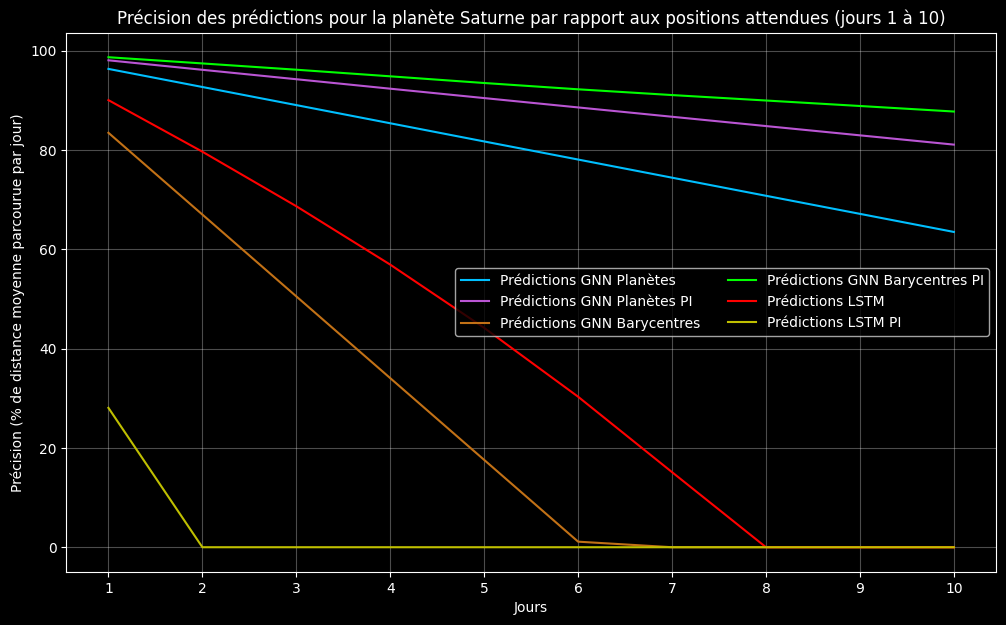

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

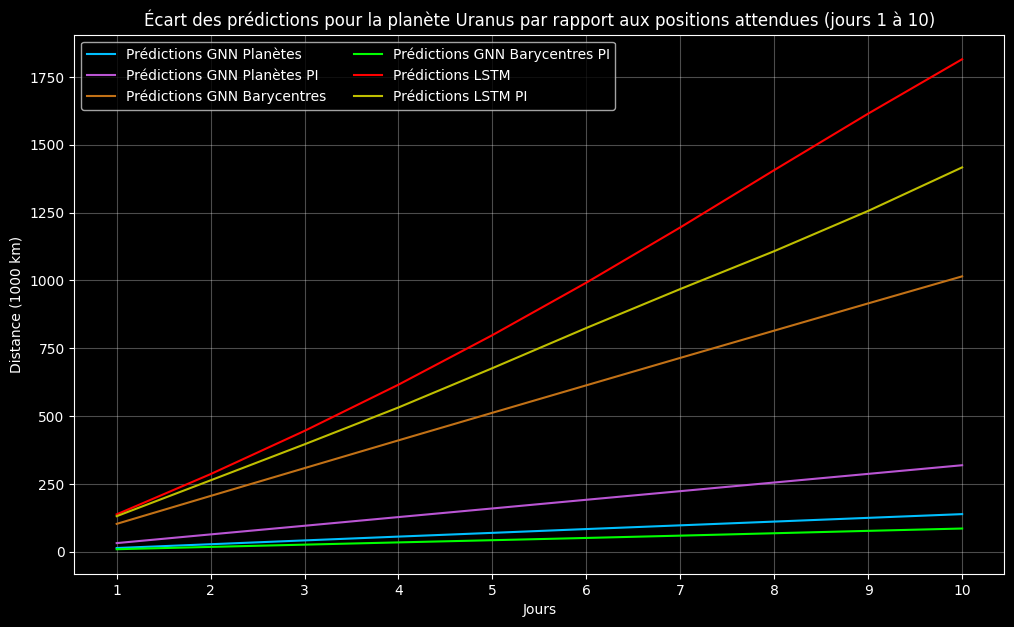

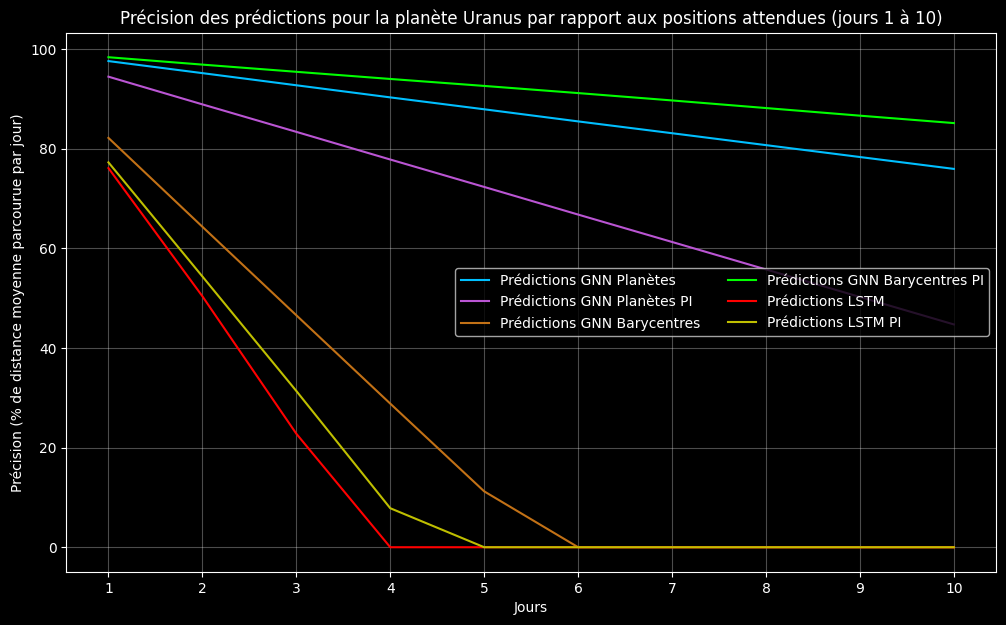

C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
C:\Users\alpha\AppData\Local\Temp\ipykernel_3944\3862109717.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure yo

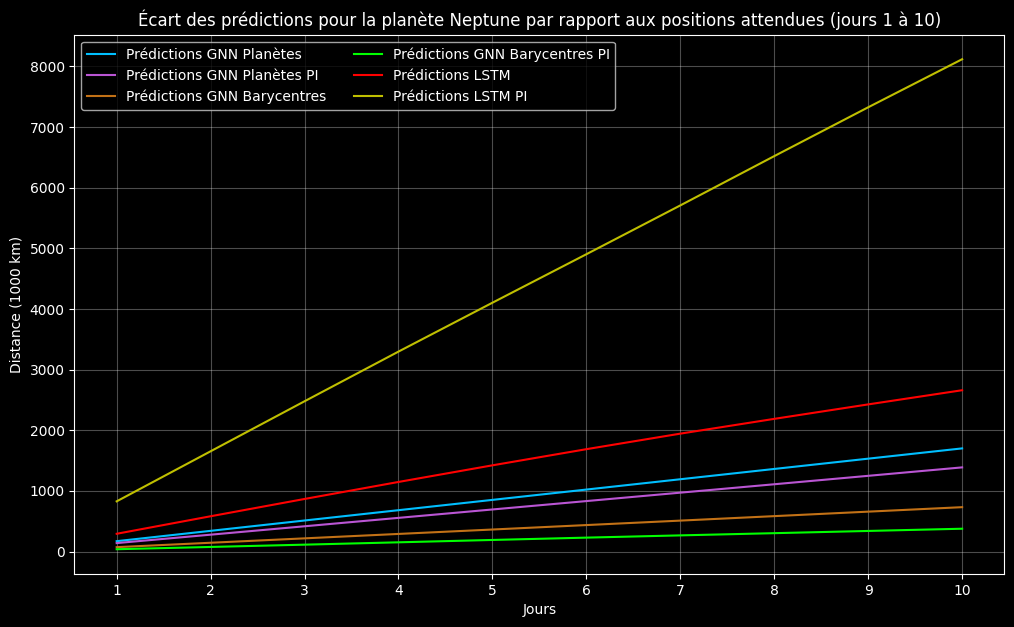

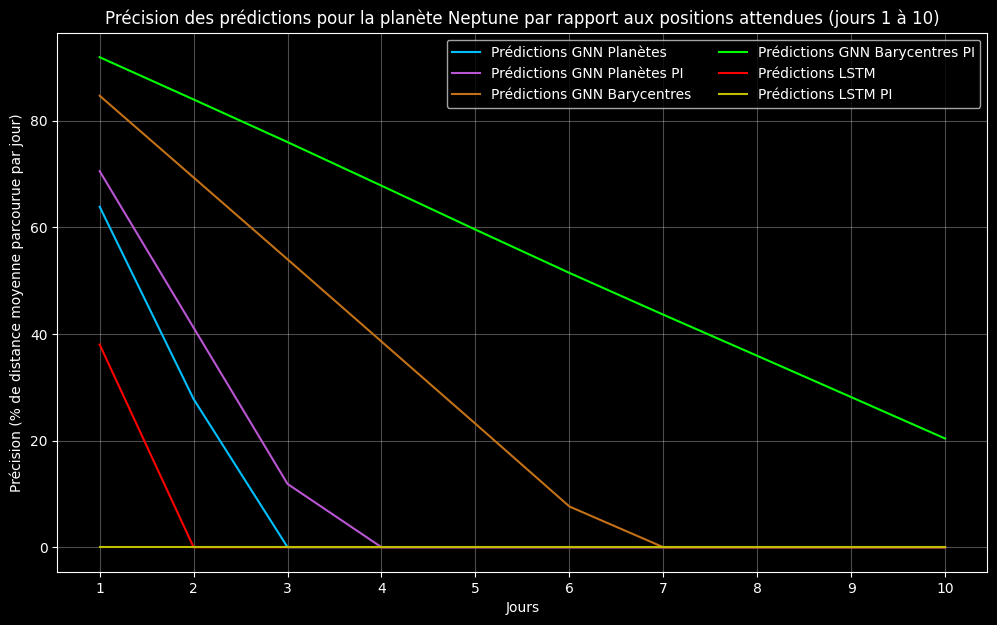

In [58]:
START_DATETIME_JD: float = 2460676.5
LSTM_PREDICTIONS_DAY_OFFSET: int = 14
UA_TO_THOUSAND_KM_CONVERSION_RATE: float = 1.495978707e5

def calc_distance(pos_1: np.ndarray, pos_2: np.ndarray) -> float:
    return float(np.linalg.norm(pos_2 - pos_1) * UA_TO_THOUSAND_KM_CONVERSION_RATE)

def extract_position_from_target_df(df_target: pd.DataFrame, day: int) -> np.ndarray:
    return np.array(df_target.loc[df_target["datetime_jd"] == START_DATETIME_JD + day + 1, ["x","y","z"]])

def calc_distance_from_target(df_predictions: pd.DataFrame, df_target: pd.DataFrame, day: int, target_day_offset: int = 0) -> float:
    predicted_position: np.ndarray = np.array(df_predictions.loc[df_predictions["day"] == day, ["x","y","z"]])
    target_position: np.ndarray = extract_position_from_target_df(df_target=df_target, day=day + target_day_offset)
    return calc_distance(pos_1=target_position, pos_2=predicted_position)

def calc_average_daily_distance(df: pd.DataFrame, num_days: int, day_offset: int = 0) -> float:
    distance_traveled_by_day: list = [
        calc_distance(
            pos_1=extract_position_from_target_df(df_target=df, day=day - 1), 
            pos_2=extract_position_from_target_df(df_target=df, day=day)) 
        for day in range(1 + day_offset, num_days + day_offset)
        ]
    return float(np.mean(np.array(distance_traveled_by_day)))

def calc_precision(df: pd.DataFrame, day: int, max_distance: float) -> float:
    distance_from_target: float = float(df.loc[df["day"] == day, ["distance_from_target"]].values[0])
    return 100.0 * max(0, 1.0 - distance_from_target / max_distance)

def plot_distance_by_days(num_days: int) -> None:
    for planet_name in planet_names:
        df_planet_target: pd.DataFrame = df_body_coordinates[
            (df_body_coordinates["datetime_jd"] >= START_DATETIME_JD) & 
            (df_body_coordinates["datetime_jd"] < START_DATETIME_JD + num_days + 1) & 
            (df_body_coordinates["body_name"] == planet_name)
            ]
        avg_daily_distance = calc_average_daily_distance(df=df_planet_target, num_days=num_days)

        df_planet_target_lstm: pd.DataFrame = df_body_coordinates[
            (df_body_coordinates["datetime_jd"] >= START_DATETIME_JD + LSTM_PREDICTIONS_DAY_OFFSET) & 
            (df_body_coordinates["datetime_jd"] < START_DATETIME_JD + LSTM_PREDICTIONS_DAY_OFFSET + num_days + 1) & 
            (df_body_coordinates["body_name"] == planet_name)
            ]
        avg_daily_distance_lstm = calc_average_daily_distance(df=df_planet_target_lstm, num_days=num_days, day_offset=LSTM_PREDICTIONS_DAY_OFFSET)
        
        df_planet_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_body_coordinates_vanilla_2025[
            (df_predictions_body_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_body_coordinates_vanilla_2025["planet_name"] == planet_name)]
        df_planet_coordinates_prediction_vanilla["distance_from_target"] = [
            calc_distance_from_target(df_predictions=df_planet_coordinates_prediction_vanilla, df_target=df_planet_target, day=day) for day in range(num_days)
            ]
        df_planet_coordinates_prediction_vanilla["precision"] = [
            calc_precision(df=df_planet_coordinates_prediction_vanilla, day=day, max_distance=avg_daily_distance) for day in range(num_days)
        ]
        
        df_planet_coordinates_prediction_pi: pd.DataFrame = df_predictions_body_coordinates_pi_2025[
            (df_predictions_body_coordinates_pi_2025["day"] < num_days) & (df_predictions_body_coordinates_pi_2025["planet_name"] == planet_name)]
        df_planet_coordinates_prediction_pi["distance_from_target"] = [
            calc_distance_from_target(df_predictions=df_planet_coordinates_prediction_pi, df_target=df_planet_target, day=day) for day in range(num_days)
            ]
        df_planet_coordinates_prediction_pi["precision"] = [
            calc_precision(df=df_planet_coordinates_prediction_pi, day=day, max_distance=avg_daily_distance) for day in range(num_days)
        ]
        
        df_centroid_coordinates_prediction_vanilla: pd.DataFrame = df_predictions_planetery_centroid_coordinates_vanilla_2025[
            (df_predictions_planetery_centroid_coordinates_vanilla_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_vanilla_2025["planet_name"] == planet_name)]
        df_centroid_coordinates_prediction_vanilla["distance_from_target"] = [
            calc_distance_from_target(df_predictions=df_centroid_coordinates_prediction_vanilla, df_target=df_planet_target, day=day) for day in range(num_days)
            ]
        df_centroid_coordinates_prediction_vanilla["precision"] = [
            calc_precision(df=df_centroid_coordinates_prediction_vanilla, day=day, max_distance=avg_daily_distance) for day in range(num_days)
        ]
        
        df_centroid_coordinates_prediction_pi: pd.DataFrame = df_predictions_planetery_centroid_coordinates_pi_2025[
            (df_predictions_planetery_centroid_coordinates_pi_2025["day"] < num_days) & (df_predictions_planetery_centroid_coordinates_pi_2025["planet_name"] == planet_name)]
        df_centroid_coordinates_prediction_pi["distance_from_target"] = [
            calc_distance_from_target(df_predictions=df_centroid_coordinates_prediction_pi, df_target=df_planet_target, day=day) for day in range(num_days)
            ]
        df_centroid_coordinates_prediction_pi["precision"] = [
            calc_precision(df=df_centroid_coordinates_prediction_pi, day=day, max_distance=avg_daily_distance) for day in range(num_days)
        ]

        df_lstm_prediction_vanilla: pd.DataFrame = df_predictions_lstm_vanilla_2025[
            (df_predictions_lstm_vanilla_2025["day"] < num_days) & (df_predictions_lstm_vanilla_2025["planet_name"] == planet_name)]
        df_lstm_prediction_vanilla["distance_from_target"] = [
            calc_distance_from_target(
                df_predictions=df_lstm_prediction_vanilla, 
                df_target=df_planet_target_lstm, 
                day=day, 
                target_day_offset=LSTM_PREDICTIONS_DAY_OFFSET) 
            for day in range(num_days)
            ]
        df_lstm_prediction_vanilla["precision"] = [
            calc_precision(df=df_lstm_prediction_vanilla, day=day, max_distance=avg_daily_distance_lstm) for day in range(num_days)
        ]

        df_lstm_prediction_pi: pd.DataFrame = df_predictions_lstm_pi_2025[
            (df_predictions_lstm_pi_2025["day"] < num_days) & (df_predictions_lstm_pi_2025["planet_name"] == planet_name)]
        df_lstm_prediction_pi["distance_from_target"] = [
            calc_distance_from_target(
                df_predictions=df_lstm_prediction_pi, 
                df_target=df_planet_target_lstm, 
                day=day, 
                target_day_offset=LSTM_PREDICTIONS_DAY_OFFSET) 
            for day in range(num_days)
            ]
        df_lstm_prediction_pi["precision"] = [
            calc_precision(df=df_lstm_prediction_pi, day=day, max_distance=avg_daily_distance_lstm) for day in range(num_days)
        ]
        
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(df_planet_coordinates_prediction_vanilla["day"] + 1, df_planet_coordinates_prediction_vanilla["distance_from_target"], color="#00BFFF", label="Prédictions GNN Planètes")
        ax.plot(df_planet_coordinates_prediction_pi["day"] + 1, df_planet_coordinates_prediction_pi["distance_from_target"], color="#BA55D3", label="Prédictions GNN Planètes PI")
        ax.plot(df_centroid_coordinates_prediction_vanilla["day"] + 1, df_centroid_coordinates_prediction_vanilla["distance_from_target"], color="#C27116", label="Prédictions GNN Barycentres")
        ax.plot(df_centroid_coordinates_prediction_pi["day"] + 1, df_centroid_coordinates_prediction_pi["distance_from_target"], color="#00FF00", label="Prédictions GNN Barycentres PI")
        ax.plot(df_lstm_prediction_vanilla["day"] + 1, df_lstm_prediction_vanilla["distance_from_target"], color="r", label="Prédictions LSTM")
        ax.plot(df_lstm_prediction_pi["day"] + 1, df_lstm_prediction_pi["distance_from_target"], color="y", label="Prédictions LSTM PI")
        ax.set_aspect("auto", adjustable="box")
        ax.set_xticks(np.arange(1, 11, 1))
        ax.set_xlabel("Jours")
        ax.set_ylabel("Distance (1000 km)")
        ax.set_title(f"Écart des prédictions pour la planète {planet_name} par rapport aux positions attendues (jours 1 à {num_days})")
        ax.grid(True, alpha=0.3)
        ax.legend(ncol=2)
        plt.show()

        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(df_planet_coordinates_prediction_vanilla["day"] + 1, df_planet_coordinates_prediction_vanilla["precision"], color="#00BFFF", label="Prédictions GNN Planètes")
        ax.plot(df_planet_coordinates_prediction_pi["day"] + 1, df_planet_coordinates_prediction_pi["precision"], color="#BA55D3", label="Prédictions GNN Planètes PI")
        ax.plot(df_centroid_coordinates_prediction_vanilla["day"] + 1, df_centroid_coordinates_prediction_vanilla["precision"], color="#C27116", label="Prédictions GNN Barycentres")
        ax.plot(df_centroid_coordinates_prediction_pi["day"] + 1, df_centroid_coordinates_prediction_pi["precision"], color="#00FF00", label="Prédictions GNN Barycentres PI")
        ax.plot(df_lstm_prediction_vanilla["day"] + 1, df_lstm_prediction_vanilla["precision"], color="r", label="Prédictions LSTM")
        ax.plot(df_lstm_prediction_pi["day"] + 1, df_lstm_prediction_pi["precision"], color="y", label="Prédictions LSTM PI")
        ax.set_aspect("auto", adjustable="box")
        ax.set_xticks(np.arange(1, 11, 1))
        ax.set_xlabel("Jours")
        ax.set_ylabel("Précision (% de distance moyenne parcourue par jour)")
        ax.set_title(f"Précision des prédictions pour la planète {planet_name} par rapport aux positions attendues (jours 1 à {num_days})")
        ax.grid(True, alpha=0.3)
        ax.legend(ncol=2)
        plt.show()

plot_distance_by_days(num_days=10)